In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import cv2
import gc
from tqdm import tqdm
%matplotlib inline

import glob
import os

##
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import json
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 14
import seaborn as sns
import cv2 
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, Activation
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy,categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
start = dt.datetime.now()
import ast

In [2]:
## No of classes

In [3]:
print(len(os.listdir('./data/train_simplified')))
print(len(os.listdir('./data/train_raw')))

340
340


In [4]:
csv_files = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\train_simplified'
split_data = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K'

In [5]:
### I dont have the too much of GPU to process such large dataset 

In [6]:
nrows = 30000
files = os.listdir(csv_files)

In [6]:
## I intensionally commented the for loop since I dont want to execute it again

for file in tqdm(files, total=340):
    source_file_path = os.path.join(csv, file)
    df = pd.read_csv(source_file_path, usecols = ['countrycode', 'drawing', 'key_id', 'recognized'],
                     nrows = nrows)
    df1 = df.head(int(nrows/2))
    df1_train = df1.head(int(nrows/2/100*90))
    df1_valid = df1.tail(int(nrows/2/100*10))
    
    df2 = df.tail(int(nrows/2))
    df2_train = df2.head(int(nrows/2/100*90))
    df2_valid = df2.tail(int(nrows/2/100*10))
    
    path = os.path.join(split_data,'data_1', 'train')
    os.makedirs(path, exist_ok = True)
    df1_train.to_csv(os.path.join(path, file), index= False)
    path = os.path.join(split_data,'data_1', 'valid')
    os.makedirs(path, exist_ok = True)    
    df1_valid.to_csv(os.path.join(path, file), index= False)
    
    
    path = os.path.join(split_data,'data_2', 'train')
    os.makedirs(path, exist_ok = True)
    df2_train.to_csv(os.path.join(path, file), index= False)
    path = os.path.join(split_data,'data_2', 'valid')
    os.makedirs(path, exist_ok = True)   
    df2_valid.to_csv(os.path.join(path, file), index= False)
    

##Creating a subset of data with 30K datapoints in each class

#####Commented the writing to csv files below since I dont want to execute it again and again
for file in tqdm(files, total=340):
    source_file_path = os.path.join(csv_files, file)
    df = pd.read_csv(source_file_path, usecols = ['countrycode', 'drawing', 'key_id', 'recognized'],
                     nrows = nrows)
    df1 = df.head(int(nrows/2))
    df1_train = df1.head(int(nrows/2/100*90))
    df1_valid = df1.tail(int(nrows/2/100*10))
    
    df2 = df.tail(int(nrows/2))
    df2_train = df2.head(int(nrows/2/100*90))
    df2_valid = df2.tail(int(nrows/2/100*10))
    
    df_train = pd.concat([df1_train, df2_train])
    df_valid = pd.concat([df1_valid, df2_valid])
    
    path = os.path.join(split_data, 'train')
    os.makedirs(path, exist_ok = True)
    #df_train.to_csv(os.path.join(path, file), index= False)
    path = os.path.join(split_data,'valid')
    os.makedirs(path, exist_ok = True)    
    #df_valid.to_csv(os.path.join(path, file), index= False)
    

In [50]:
INPUT_PATH = './data/30K'

# Exploring train csv files 

df_train = pd.read_csv('./data/train_simplified/airplane.csv', index_col = 'key_id', nrows = 5)
df_train.head(5)

countrycode  \
key_id                         
5152802093400064          US   
6622904974311424          CA   
6577010312740864          US   
5643224746033152          US   
6670046841536512          IL   

                                                            drawing  \
key_id                                                                
5152802093400064  [[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...   
6622904974311424  [[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4...   
6577010312740864  [[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...   
5643224746033152  [[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...   
6670046841536512  [[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...   

                  recognized                   timestamp      word  
key_id                                                              
5152802093400064        True  2017-03-08 21:12:07.266040  airplane  
6622904974311424       False  2017-03-06 21:39:04.690130  airplane  
6577010312740864        True  2017-03-23 02:08:35.229980  airplane  
5643224746033152        True  2017-03-10 00:35:17.531970  airplane  
6670046841536512        True  2017-01-23 18:11:11.658170  airplane

In [123]:
words = df_train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in df_train[0:5]['drawing'].values]
len(drawings)

5

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'airplane')

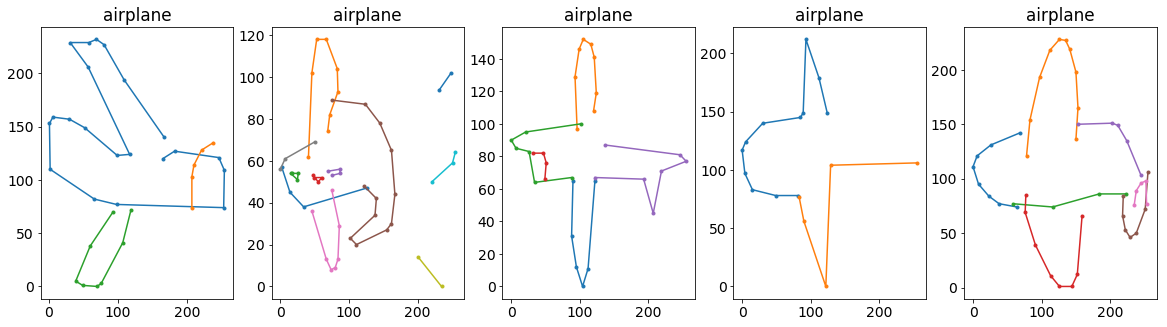

In [136]:
fig, ax =plt.subplots(1,5,figsize=(20,5))
fig.suptitle('')
for i, drawing in enumerate(drawings):
    for x,y in drawing:
        ax[i].plot(x,y, marker='.')


    ax[i].set_title(words[i])

Text(0.5, 1.0, 'airplane')

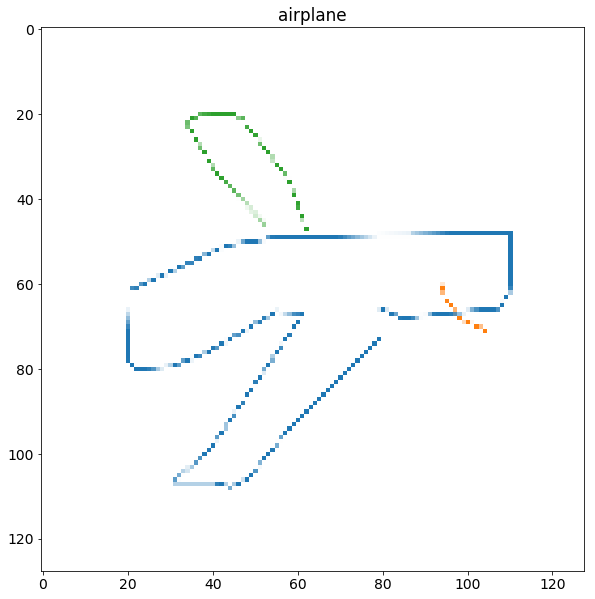

In [142]:
i = 0

def draw2img(drawing, Xsize=256, Ysize=256, lw = 4):
    '''
    converts drawing to image
    '''
    fig, ax = plt.subplots()
    for x,y in drawing:
        ax.plot(x, y ,linewidth=lw) #  marker='.', See which line width is better, <4 might be good
    ax.axis('off')
    fig.canvas.draw()    
    X = np.array(fig.canvas.renderer._renderer)
    plt.close(fig)
    # image resizing. Original X is of various size due to strokes variable's length
    return (cv2.resize(X, (Xsize,Ysize)) / 255.)[::-1]

image = draw2img(drawings[i], 128, 128)
plt.imshow(image)
plt.title(words[i])


In [9]:
##files = glob.glob(r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K\data_1\train\*.csv')
##len(files)

In [40]:

DP_DIR = r'./data/30K_zip'
INPUT_DIR = './data/'
##INPUT_DIR = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K'

BASE_SIZE = 256
SIZE = 64
NCSVS = 100
NCATS = 340

np.random.seed(seed=1987)
tf.set_random_seed(seed=1987)

def f2cat(filename: str) -> str:
    return filename.split('.')[0]

#def list_all_categories():
#    files = os.listdir(os.path.join(INPUT_DIR, 'train_simplified'))
#    return ([f2cat(f) for f in files])

class Simplified():
    def __init__(self, input_path = './data'):
        self.input_path = input_path
    
    def list_all_categoris(self):
        files = os.listdir(os.path.join(self.input_path, 'train_simplified'))
        return ([f2cat(f) for f in files])
    
    def read_training_csv(self, category, nrows= None, ncols = None, drawing_transform = False):
        
        df = pd.read_csv(os.path.join(self.input_path, 'train_simplified',category+ '.csv' ), 
                         nrows= nrows,usecols = ncols)
        if drawing_transform:
            df['drawing'] = df['drawing'].apply(json.loads)
        
        return df


In [41]:
s = Simplified('./data')
NCSVS = 100
categories = s.list_all_categoris()
print(len(categories))

340


In [41]:
nrows =30000
##path = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K'
path = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K1111'
os.makedirs(path, exist_ok = True)

for y, category in tqdm(enumerate(categories)):
    df = s.read_training_csv(category, nrows= nrows)
    df['y'] = y
    df['cv'] = (df.key_id // 10 ** 7) % NCSVS
    for k in range(NCSVS):
        filename = 'train_k{}.csv'.format(k)
        chunk = df[df['cv']== k]
        chunk = chunk.drop(['cv'], axis =1)
        if y == 0:
            chunk.to_csv(os.path.join(path,filename), index = False)
        else:
            chunk.to_csv(os.path.join(path,filename),mode = 'a', header = False, index = False)


0it [00:00, ?it/s]
1it [00:02,  2.73s/it]
2it [00:05,  2.86s/it]
3it [00:09,  2.98s/it]
4it [00:12,  3.10s/it]
5it [00:15,  3.09s/it]
6it [00:18,  3.14s/it]
7it [00:21,  3.07s/it]
8it [00:24,  3.10s/it]
9it [00:28,  3.10s/it]
10it [00:31,  3.17s/it]
11it [00:34,  3.12s/it]
12it [00:38,  3.36s/it]
13it [00:41,  3.18s/it]
14it [00:44,  3.22s/it]
15it [00:47,  3.20s/it]
16it [00:50,  3.11s/it]
17it [00:53,  3.23s/it]
18it [00:57,  3.33s/it]
19it [01:01,  3.42s/it]
20it [01:04,  3.43s/it]
21it [01:07,  3.33s/it]
22it [01:11,  3.42s/it]
23it [01:14,  3.49s/it]
24it [01:20,  4.00s/it]
25it [01:23,  3.78s/it]
26it [01:27,  3.87s/it]
27it [01:30,  3.71s/it]
28it [01:33,  3.41s/it]
29it [01:37,  3.59s/it]
30it [01:40,  3.50s/it]
31it [01:44,  3.65s/it]
32it [01:48,  3.59s/it]
33it [01:53,  4.07s/it]
34it [01:57,  4.00s/it]
35it [02:00,  3.78s/it]
36it [02:03,  3.42s/it]
37it [02:06,  3.39s/it]
38it [02:09,  3.21s/it]
39it [02:13,  3.52s/it]
40it [02:18,  4.00s/it]
41it [02:21,  3.65s/it]
42it 

In [42]:
from sklearn.utils import shuffle
path = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K'
path_new = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K_zip1111'
##path_new = r'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data\30K_zip'
os.makedirs(path_new, exist_ok = True)

for k in tqdm(range(NCSVS)):
    filename = 'train_k{}.csv'.format(k)
    df = pd.read_csv(os.path.join(path,filename))
    df = shuffle(df)
    ##Uncomment to populate .gz file
    ##df.to_csv(os.path.join(path_new,filename + '.gz'), compression='gzip',index = False)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [47:55<00:00, 28.73s/it]

In [9]:


def apk(actual, predicted, k=3):
    """

    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):

        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

In [10]:
apk(actual= [1,2,3], predicted = [2,1,3])

1.0

In [11]:
def mapk(actual, predicted, k=3):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual,predicted)])

In [12]:
def preds2catids(predictions):
    return pd.DataFrame(np.argsort(-predictions, axis=1)[:, :3], columns=['a', 'b', 'c'])

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [13]:
STEPS = 800
EPOCHS = 16
size = 64
batchsize = 680

In [14]:
model = MobileNet(input_shape = (size, size,1), alpha = 1.0, weights = None, classes = NCATS)

model.compile(optimizer = Adam(lr = .002), loss = 'categorical_crossentropy' , 
              metrics = [ categorical_crossentropy,categorical_accuracy,top_3_accuracy])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 65, 65, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32)        128       
__________

_________________________________________________________________
conv_pw_9_relu (ReLU)        (None, 4, 4, 512)         0         
_________________________________________________________________
conv_dw_10 (DepthwiseConv2D) (None, 4, 4, 512)         4608      
_________________________________________________________________
conv_dw_10_bn (BatchNormaliz (None, 4, 4, 512)         2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 4, 4, 512)         0         
_________________________________________________________________
conv_pw_10 (Conv2D)          (None, 4, 4, 512)         262144    
_________________________________________________________________
conv_pw_10_bn (BatchNormaliz (None, 4, 4, 512)         2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 4, 4, 512)         0         
_________________________________________________________________
conv_dw_11

Training with Image Generator

In [15]:
## Drawing Grey Scale Images
def draw_cv2(raw_strokes, size = 64, lw =6 , time_color = True):
    img = np.zeros((BASE_SIZE,BASE_SIZE), np.uint8)
    for t,stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            if time_color:
                color = 255 - min(10,t)*13
            else:
                color = 255
            _ = cv2.line(img, (stroke[0][i],stroke[1][i]),
                        (stroke[0][i+1],stroke[1][i+1]),color, lw)
    if size != BASE_SIZE:
        return cv2.resize(img, (size,size))
    else:
        return img


## Drawing RGB Images
## def draw_cv2_color later on 

In [16]:
def image_generator_xd(size, batchsize, ks, lw=6, time_color=True):
    
    while True:
        for k in np.random.permutation(ks):
            filename = os.path.join(DP_DIR, 'train_k{}.csv.gz'.format(k))
            for df in pd.read_csv(filename, chunksize = batchsize):
                df['drawing'] = df['drawing'].apply(json.loads)
                x = np.zeros((len(df), SIZE, SIZE, 1))
                for i, raw_strokes in enumerate(df['drawing'].values):
                    x[i,:,:,0] = draw_cv2(raw_strokes, size=size, lw=lw,time_color=time_color)
                x= preprocess_input(x).astype(np.float32)
                y = keras.utils.to_categorical(df['y'], num_classes = NCATS)
                yield x,y    
                
###to check memory size                
def df_to_image_array_xd(df, size, lw=6, time_color=True):
    df['drawing'] = df['drawing'].apply(json.loads)
    x = np.zeros((len(df), size, size, 1))
    for i, raw_strokes in enumerate(df.drawing.values):
        x[i, :, :, 0] = draw_cv2(raw_strokes, size=size, lw=lw, time_color=time_color)
    x = preprocess_input(x).astype(np.float32)
    return x

In [25]:
nrows = 30000

valid_df = pd.read_csv(os.path.join(DP_DIR, 'train_k{}.csv.gz'.format(NCSVS - 1)), nrows=nrows)
x_valid = df_to_image_array_xd(valid_df, size)
y_valid = keras.utils.to_categorical(valid_df.y, num_classes=NCATS)
print(x_valid.shape, y_valid.shape)
print('Validation array memory {:.2f} GB'.format(x_valid.nbytes / 1024.**3 ))



(30000, 64, 64, 1) (30000, 340)
Validation array memory 0.46 GB


In [26]:
## Here range(NCSVS - 1) is used so that traink_99 is not used for training
train_datagen = image_generator_xd(size=size, batchsize=batchsize, ks=range(NCSVS - 1))

In [19]:
x, y = next(train_datagen)

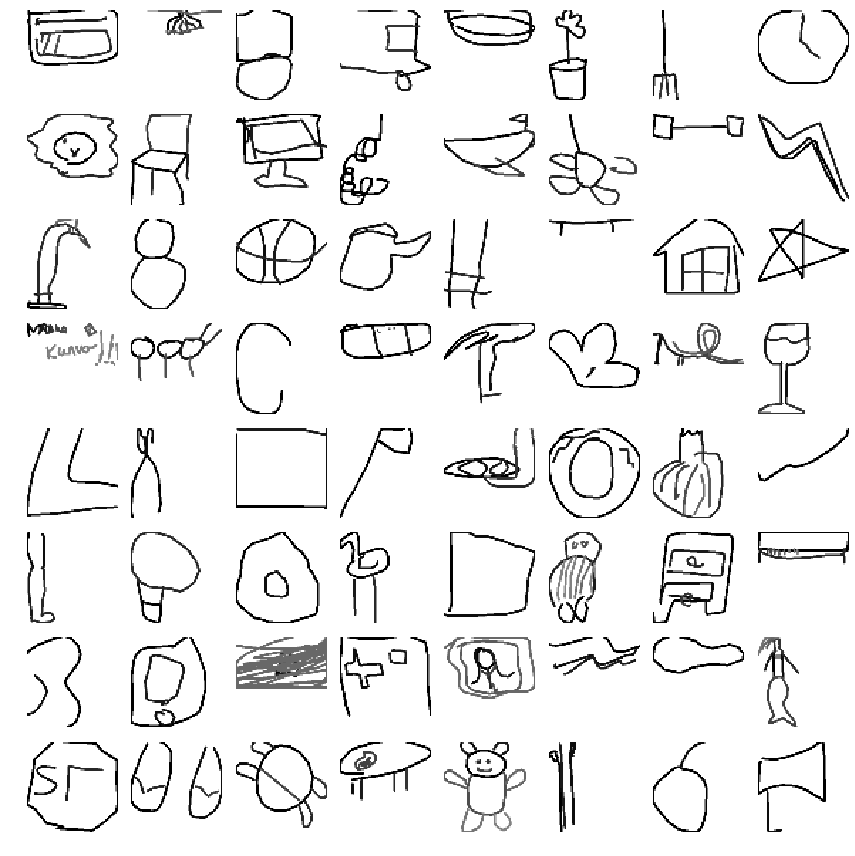

In [20]:

n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    (-x[i]+1)/2
    ax.imshow((-x[i, :, :, 0] + 1)/2, cmap=plt.cm.gray)
    ax.axis('off')
plt.tight_layout()
fig.savefig('gs.png', dpi=300)
plt.show();

In [27]:
hists = []

In [28]:
callbacks = [ ReduceLROnPlateau(monitor = 'val_top_3_accuracy', factor=0.75, patience=3, min_delta=0.001,
                          mode='max', min_lr=1e-5, verbose=1),
              ModelCheckpoint('model.h5', monitor='val_top_3_accuracy', mode='max', save_best_only=True,
                    save_weights_only=True)]


hist = model.fit_generator(
    train_datagen, steps_per_epoch=STEPS, epochs=70, verbose=1,
    validation_data=(x_valid, y_valid),
    callbacks = callbacks
)
hists.append(hist)

Epoch 1/70


 70/800 [=>............................] - ETA: 5:29:44 - loss: 6.0332 - categorical_crossentropy: 6.0332 - categorical_accuracy: 0.0074 - top_3_accuracy: 0.014 - ETA: 2:47:24 - loss: 5.9955 - categorical_crossentropy: 5.9955 - categorical_accuracy: 0.0059 - top_3_accuracy: 0.017 - ETA: 1:53:22 - loss: 6.0064 - categorical_crossentropy: 6.0064 - categorical_accuracy: 0.0044 - top_3_accuracy: 0.014 - ETA: 1:26:21 - loss: 5.9868 - categorical_crossentropy: 5.9868 - categorical_accuracy: 0.0048 - top_3_accuracy: 0.015 - ETA: 1:10:06 - loss: 5.9987 - categorical_crossentropy: 5.9987 - categorical_accuracy: 0.0044 - top_3_accuracy: 0.015 - ETA: 59:16 - loss: 5.9871 - categorical_crossentropy: 5.9871 - categorical_accuracy: 0.0044 - top_3_accuracy: 0.0152  - ETA: 51:34 - loss: 5.9847 - categorical_crossentropy: 5.9847 - categorical_accuracy: 0.0042 - top_3_accuracy: 0.015 - ETA: 45:45 - loss: 5.9777 - categorical_crossentropy: 5.9777 - categorical_accuracy: 0.0046 - top_3_accuracy: 0.016 - E

141/800 [====>.........................] - ETA: 9:14 - loss: 5.3492 - categorical_crossentropy: 5.3492 - categorical_accuracy: 0.0256 - top_3_accuracy: 0.06 - ETA: 9:10 - loss: 5.3415 - categorical_crossentropy: 5.3415 - categorical_accuracy: 0.0259 - top_3_accuracy: 0.06 - ETA: 9:06 - loss: 5.3352 - categorical_crossentropy: 5.3352 - categorical_accuracy: 0.0261 - top_3_accuracy: 0.06 - ETA: 9:02 - loss: 5.3283 - categorical_crossentropy: 5.3283 - categorical_accuracy: 0.0263 - top_3_accuracy: 0.06 - ETA: 8:58 - loss: 5.3215 - categorical_crossentropy: 5.3215 - categorical_accuracy: 0.0266 - top_3_accuracy: 0.06 - ETA: 8:54 - loss: 5.3142 - categorical_crossentropy: 5.3142 - categorical_accuracy: 0.0272 - top_3_accuracy: 0.06 - ETA: 8:50 - loss: 5.3062 - categorical_crossentropy: 5.3062 - categorical_accuracy: 0.0276 - top_3_accuracy: 0.06 - ETA: 8:46 - loss: 5.2983 - categorical_crossentropy: 5.2983 - categorical_accuracy: 0.0281 - top_3_accuracy: 0.07 - ETA: 8:43 - loss: 5.2919 - ca

212/800 [======>.......................] - ETA: 6:25 - loss: 4.8071 - categorical_crossentropy: 4.8071 - categorical_accuracy: 0.0700 - top_3_accuracy: 0.14 - ETA: 6:23 - loss: 4.7984 - categorical_crossentropy: 4.7984 - categorical_accuracy: 0.0709 - top_3_accuracy: 0.15 - ETA: 6:22 - loss: 4.7909 - categorical_crossentropy: 4.7909 - categorical_accuracy: 0.0717 - top_3_accuracy: 0.15 - ETA: 6:20 - loss: 4.7838 - categorical_crossentropy: 4.7838 - categorical_accuracy: 0.0725 - top_3_accuracy: 0.15 - ETA: 6:19 - loss: 4.7760 - categorical_crossentropy: 4.7760 - categorical_accuracy: 0.0734 - top_3_accuracy: 0.15 - ETA: 6:18 - loss: 4.7695 - categorical_crossentropy: 4.7695 - categorical_accuracy: 0.0742 - top_3_accuracy: 0.15 - ETA: 6:16 - loss: 4.7620 - categorical_crossentropy: 4.7620 - categorical_accuracy: 0.0750 - top_3_accuracy: 0.15 - ETA: 6:15 - loss: 4.7547 - categorical_crossentropy: 4.7547 - categorical_accuracy: 0.0759 - top_3_accuracy: 0.15 - ETA: 6:19 - loss: 4.7472 - ca

283/800 [=========>....................] - ETA: 5:39 - loss: 4.3241 - categorical_crossentropy: 4.3241 - categorical_accuracy: 0.1285 - top_3_accuracy: 0.24 - ETA: 5:40 - loss: 4.3185 - categorical_crossentropy: 4.3185 - categorical_accuracy: 0.1292 - top_3_accuracy: 0.24 - ETA: 5:39 - loss: 4.3121 - categorical_crossentropy: 4.3121 - categorical_accuracy: 0.1300 - top_3_accuracy: 0.24 - ETA: 5:37 - loss: 4.3065 - categorical_crossentropy: 4.3065 - categorical_accuracy: 0.1308 - top_3_accuracy: 0.24 - ETA: 5:36 - loss: 4.3008 - categorical_crossentropy: 4.3008 - categorical_accuracy: 0.1316 - top_3_accuracy: 0.24 - ETA: 5:35 - loss: 4.2948 - categorical_crossentropy: 4.2948 - categorical_accuracy: 0.1324 - top_3_accuracy: 0.25 - ETA: 5:34 - loss: 4.2892 - categorical_crossentropy: 4.2892 - categorical_accuracy: 0.1333 - top_3_accuracy: 0.25 - ETA: 5:33 - loss: 4.2836 - categorical_crossentropy: 4.2836 - categorical_accuracy: 0.1339 - top_3_accuracy: 0.25 - ETA: 5:32 - loss: 4.2777 - ca

354/800 [============>.................] - ETA: 5:12 - loss: 3.9521 - categorical_crossentropy: 3.9521 - categorical_accuracy: 0.1818 - top_3_accuracy: 0.32 - ETA: 5:11 - loss: 3.9475 - categorical_crossentropy: 3.9475 - categorical_accuracy: 0.1825 - top_3_accuracy: 0.32 - ETA: 5:10 - loss: 3.9430 - categorical_crossentropy: 3.9430 - categorical_accuracy: 0.1831 - top_3_accuracy: 0.32 - ETA: 5:09 - loss: 3.9391 - categorical_crossentropy: 3.9391 - categorical_accuracy: 0.1836 - top_3_accuracy: 0.32 - ETA: 5:08 - loss: 3.9348 - categorical_crossentropy: 3.9348 - categorical_accuracy: 0.1842 - top_3_accuracy: 0.32 - ETA: 5:08 - loss: 3.9302 - categorical_crossentropy: 3.9302 - categorical_accuracy: 0.1849 - top_3_accuracy: 0.32 - ETA: 5:09 - loss: 3.9259 - categorical_crossentropy: 3.9259 - categorical_accuracy: 0.1855 - top_3_accuracy: 0.32 - ETA: 5:09 - loss: 3.9216 - categorical_crossentropy: 3.9216 - categorical_accuracy: 0.1862 - top_3_accuracy: 0.32 - ETA: 5:10 - loss: 3.9169 - ca

425/800 [==============>...............] - ETA: 4:21 - loss: 3.6691 - categorical_crossentropy: 3.6691 - categorical_accuracy: 0.2255 - top_3_accuracy: 0.37 - ETA: 4:20 - loss: 3.6653 - categorical_crossentropy: 3.6653 - categorical_accuracy: 0.2261 - top_3_accuracy: 0.38 - ETA: 4:20 - loss: 3.6618 - categorical_crossentropy: 3.6618 - categorical_accuracy: 0.2266 - top_3_accuracy: 0.38 - ETA: 4:19 - loss: 3.6585 - categorical_crossentropy: 3.6585 - categorical_accuracy: 0.2272 - top_3_accuracy: 0.38 - ETA: 4:18 - loss: 3.6549 - categorical_crossentropy: 3.6549 - categorical_accuracy: 0.2277 - top_3_accuracy: 0.38 - ETA: 4:17 - loss: 3.6516 - categorical_crossentropy: 3.6516 - categorical_accuracy: 0.2283 - top_3_accuracy: 0.38 - ETA: 4:16 - loss: 3.6482 - categorical_crossentropy: 3.6482 - categorical_accuracy: 0.2288 - top_3_accuracy: 0.38 - ETA: 4:16 - loss: 3.6446 - categorical_crossentropy: 3.6446 - categorical_accuracy: 0.2294 - top_3_accuracy: 0.38 - ETA: 4:15 - loss: 3.6415 - ca

496/800 [=================>............] - ETA: 3:28 - loss: 3.4475 - categorical_crossentropy: 3.4475 - categorical_accuracy: 0.2611 - top_3_accuracy: 0.42 - ETA: 3:28 - loss: 3.4450 - categorical_crossentropy: 3.4450 - categorical_accuracy: 0.2615 - top_3_accuracy: 0.42 - ETA: 3:27 - loss: 3.4423 - categorical_crossentropy: 3.4423 - categorical_accuracy: 0.2620 - top_3_accuracy: 0.42 - ETA: 3:26 - loss: 3.4396 - categorical_crossentropy: 3.4396 - categorical_accuracy: 0.2624 - top_3_accuracy: 0.42 - ETA: 3:26 - loss: 3.4369 - categorical_crossentropy: 3.4369 - categorical_accuracy: 0.2628 - top_3_accuracy: 0.42 - ETA: 3:25 - loss: 3.4344 - categorical_crossentropy: 3.4344 - categorical_accuracy: 0.2633 - top_3_accuracy: 0.42 - ETA: 3:24 - loss: 3.4320 - categorical_crossentropy: 3.4320 - categorical_accuracy: 0.2637 - top_3_accuracy: 0.42 - ETA: 3:24 - loss: 3.4294 - categorical_crossentropy: 3.4294 - categorical_accuracy: 0.2642 - top_3_accuracy: 0.42 - ETA: 3:23 - loss: 3.4265 - ca

567/800 [====================>.........] - ETA: 2:44 - loss: 3.2689 - categorical_crossentropy: 3.2689 - categorical_accuracy: 0.2907 - top_3_accuracy: 0.46 - ETA: 2:44 - loss: 3.2669 - categorical_crossentropy: 3.2669 - categorical_accuracy: 0.2911 - top_3_accuracy: 0.46 - ETA: 2:43 - loss: 3.2648 - categorical_crossentropy: 3.2648 - categorical_accuracy: 0.2915 - top_3_accuracy: 0.46 - ETA: 2:42 - loss: 3.2626 - categorical_crossentropy: 3.2626 - categorical_accuracy: 0.2919 - top_3_accuracy: 0.46 - ETA: 2:42 - loss: 3.2607 - categorical_crossentropy: 3.2607 - categorical_accuracy: 0.2922 - top_3_accuracy: 0.46 - ETA: 2:41 - loss: 3.2585 - categorical_crossentropy: 3.2585 - categorical_accuracy: 0.2926 - top_3_accuracy: 0.46 - ETA: 2:40 - loss: 3.2565 - categorical_crossentropy: 3.2565 - categorical_accuracy: 0.2929 - top_3_accuracy: 0.46 - ETA: 2:40 - loss: 3.2542 - categorical_crossentropy: 3.2542 - categorical_accuracy: 0.2933 - top_3_accuracy: 0.46 - ETA: 2:39 - loss: 3.2523 - ca

638/800 [======================>.......] - ETA: 2:02 - loss: 3.1246 - categorical_crossentropy: 3.1246 - categorical_accuracy: 0.3154 - top_3_accuracy: 0.49 - ETA: 2:01 - loss: 3.1227 - categorical_crossentropy: 3.1227 - categorical_accuracy: 0.3157 - top_3_accuracy: 0.49 - ETA: 2:01 - loss: 3.1208 - categorical_crossentropy: 3.1208 - categorical_accuracy: 0.3160 - top_3_accuracy: 0.49 - ETA: 2:00 - loss: 3.1191 - categorical_crossentropy: 3.1191 - categorical_accuracy: 0.3163 - top_3_accuracy: 0.49 - ETA: 1:59 - loss: 3.1172 - categorical_crossentropy: 3.1172 - categorical_accuracy: 0.3166 - top_3_accuracy: 0.49 - ETA: 1:59 - loss: 3.1150 - categorical_crossentropy: 3.1150 - categorical_accuracy: 0.3170 - top_3_accuracy: 0.49 - ETA: 1:58 - loss: 3.1133 - categorical_crossentropy: 3.1133 - categorical_accuracy: 0.3173 - top_3_accuracy: 0.49 - ETA: 1:58 - loss: 3.1112 - categorical_crossentropy: 3.1112 - categorical_accuracy: 0.3176 - top_3_accuracy: 0.49 - ETA: 1:57 - loss: 3.1091 - ca

709/800 [=========================>....] - ETA: 1:22 - loss: 3.0111 - categorical_crossentropy: 3.0111 - categorical_accuracy: 0.3348 - top_3_accuracy: 0.51 - ETA: 1:22 - loss: 3.0094 - categorical_crossentropy: 3.0094 - categorical_accuracy: 0.3351 - top_3_accuracy: 0.51 - ETA: 1:21 - loss: 3.0080 - categorical_crossentropy: 3.0080 - categorical_accuracy: 0.3354 - top_3_accuracy: 0.51 - ETA: 1:21 - loss: 3.0064 - categorical_crossentropy: 3.0064 - categorical_accuracy: 0.3356 - top_3_accuracy: 0.51 - ETA: 1:20 - loss: 3.0050 - categorical_crossentropy: 3.0050 - categorical_accuracy: 0.3359 - top_3_accuracy: 0.51 - ETA: 1:19 - loss: 3.0034 - categorical_crossentropy: 3.0034 - categorical_accuracy: 0.3362 - top_3_accuracy: 0.51 - ETA: 1:19 - loss: 3.0020 - categorical_crossentropy: 3.0020 - categorical_accuracy: 0.3364 - top_3_accuracy: 0.51 - ETA: 1:18 - loss: 3.0007 - categorical_crossentropy: 3.0007 - categorical_accuracy: 0.3367 - top_3_accuracy: 0.51 - ETA: 1:18 - loss: 2.9992 - ca

780/800 [============================>.] - ETA: 45s - loss: 2.9064 - categorical_crossentropy: 2.9064 - categorical_accuracy: 0.3534 - top_3_accuracy: 0.537 - ETA: 45s - loss: 2.9048 - categorical_crossentropy: 2.9048 - categorical_accuracy: 0.3537 - top_3_accuracy: 0.538 - ETA: 44s - loss: 2.9034 - categorical_crossentropy: 2.9034 - categorical_accuracy: 0.3539 - top_3_accuracy: 0.538 - ETA: 43s - loss: 2.9018 - categorical_crossentropy: 2.9018 - categorical_accuracy: 0.3542 - top_3_accuracy: 0.538 - ETA: 43s - loss: 2.9004 - categorical_crossentropy: 2.9004 - categorical_accuracy: 0.3545 - top_3_accuracy: 0.539 - ETA: 42s - loss: 2.8990 - categorical_crossentropy: 2.8990 - categorical_accuracy: 0.3547 - top_3_accuracy: 0.539 - ETA: 42s - loss: 2.8975 - categorical_crossentropy: 2.8975 - categorical_accuracy: 0.3550 - top_3_accuracy: 0.539 - ETA: 41s - loss: 2.8961 - categorical_crossentropy: 2.8961 - categorical_accuracy: 0.3552 - top_3_accuracy: 0.540 - ETA: 41s - loss: 2.8947 - cat

800/800 [==============================] - ETA: 9s - loss: 2.8120 - categorical_crossentropy: 2.8120 - categorical_accuracy: 0.3702 - top_3_accuracy: 0.55 - ETA: 8s - loss: 2.8108 - categorical_crossentropy: 2.8108 - categorical_accuracy: 0.3704 - top_3_accuracy: 0.55 - ETA: 8s - loss: 2.8096 - categorical_crossentropy: 2.8096 - categorical_accuracy: 0.3706 - top_3_accuracy: 0.55 - ETA: 7s - loss: 2.8083 - categorical_crossentropy: 2.8083 - categorical_accuracy: 0.3709 - top_3_accuracy: 0.55 - ETA: 7s - loss: 2.8070 - categorical_crossentropy: 2.8070 - categorical_accuracy: 0.3711 - top_3_accuracy: 0.55 - ETA: 6s - loss: 2.8056 - categorical_crossentropy: 2.8056 - categorical_accuracy: 0.3714 - top_3_accuracy: 0.55 - ETA: 6s - loss: 2.8044 - categorical_crossentropy: 2.8044 - categorical_accuracy: 0.3716 - top_3_accuracy: 0.55 - ETA: 5s - loss: 2.8032 - categorical_crossentropy: 2.8032 - categorical_accuracy: 0.3718 - top_3_accuracy: 0.55 - ETA: 5s - loss: 2.8018 - categorical_crossent

 71/800 [=>............................] - ETA: 5:16 - loss: 1.7535 - categorical_crossentropy: 1.7535 - categorical_accuracy: 0.5353 - top_3_accuracy: 0.76 - ETA: 5:16 - loss: 1.7101 - categorical_crossentropy: 1.7101 - categorical_accuracy: 0.5463 - top_3_accuracy: 0.77 - ETA: 5:16 - loss: 1.7614 - categorical_crossentropy: 1.7614 - categorical_accuracy: 0.5466 - top_3_accuracy: 0.76 - ETA: 6:19 - loss: 1.7938 - categorical_crossentropy: 1.7938 - categorical_accuracy: 0.5426 - top_3_accuracy: 0.76 - ETA: 8:16 - loss: 1.8255 - categorical_crossentropy: 1.8255 - categorical_accuracy: 0.5397 - top_3_accuracy: 0.75 - ETA: 9:38 - loss: 1.8102 - categorical_crossentropy: 1.8102 - categorical_accuracy: 0.5397 - top_3_accuracy: 0.75 - ETA: 10:36 - loss: 1.8065 - categorical_crossentropy: 1.8065 - categorical_accuracy: 0.5410 - top_3_accuracy: 0.759 - ETA: 10:53 - loss: 1.8182 - categorical_crossentropy: 1.8182 - categorical_accuracy: 0.5410 - top_3_accuracy: 0.756 - ETA: 10:14 - loss: 1.8167

142/800 [====>.........................] - ETA: 7:32 - loss: 1.8278 - categorical_crossentropy: 1.8278 - categorical_accuracy: 0.5486 - top_3_accuracy: 0.75 - ETA: 7:29 - loss: 1.8259 - categorical_crossentropy: 1.8259 - categorical_accuracy: 0.5492 - top_3_accuracy: 0.75 - ETA: 7:26 - loss: 1.8265 - categorical_crossentropy: 1.8265 - categorical_accuracy: 0.5489 - top_3_accuracy: 0.75 - ETA: 7:24 - loss: 1.8262 - categorical_crossentropy: 1.8262 - categorical_accuracy: 0.5487 - top_3_accuracy: 0.75 - ETA: 7:21 - loss: 1.8265 - categorical_crossentropy: 1.8265 - categorical_accuracy: 0.5488 - top_3_accuracy: 0.75 - ETA: 7:19 - loss: 1.8262 - categorical_crossentropy: 1.8262 - categorical_accuracy: 0.5489 - top_3_accuracy: 0.75 - ETA: 7:16 - loss: 1.8259 - categorical_crossentropy: 1.8259 - categorical_accuracy: 0.5491 - top_3_accuracy: 0.75 - ETA: 7:14 - loss: 1.8245 - categorical_crossentropy: 1.8245 - categorical_accuracy: 0.5492 - top_3_accuracy: 0.75 - ETA: 7:12 - loss: 1.8211 - ca

213/800 [======>.......................] - ETA: 6:14 - loss: 1.8056 - categorical_crossentropy: 1.8056 - categorical_accuracy: 0.5549 - top_3_accuracy: 0.76 - ETA: 6:12 - loss: 1.8038 - categorical_crossentropy: 1.8038 - categorical_accuracy: 0.5553 - top_3_accuracy: 0.76 - ETA: 6:11 - loss: 1.8033 - categorical_crossentropy: 1.8033 - categorical_accuracy: 0.5554 - top_3_accuracy: 0.76 - ETA: 6:10 - loss: 1.8026 - categorical_crossentropy: 1.8026 - categorical_accuracy: 0.5556 - top_3_accuracy: 0.76 - ETA: 6:09 - loss: 1.8024 - categorical_crossentropy: 1.8024 - categorical_accuracy: 0.5558 - top_3_accuracy: 0.76 - ETA: 6:08 - loss: 1.8015 - categorical_crossentropy: 1.8015 - categorical_accuracy: 0.5561 - top_3_accuracy: 0.76 - ETA: 6:06 - loss: 1.8001 - categorical_crossentropy: 1.8001 - categorical_accuracy: 0.5564 - top_3_accuracy: 0.76 - ETA: 6:05 - loss: 1.7992 - categorical_crossentropy: 1.7992 - categorical_accuracy: 0.5565 - top_3_accuracy: 0.76 - ETA: 6:04 - loss: 1.7992 - ca

284/800 [=========>....................] - ETA: 5:03 - loss: 1.7791 - categorical_crossentropy: 1.7791 - categorical_accuracy: 0.5618 - top_3_accuracy: 0.76 - ETA: 5:02 - loss: 1.7783 - categorical_crossentropy: 1.7783 - categorical_accuracy: 0.5619 - top_3_accuracy: 0.76 - ETA: 5:01 - loss: 1.7779 - categorical_crossentropy: 1.7779 - categorical_accuracy: 0.5621 - top_3_accuracy: 0.76 - ETA: 5:01 - loss: 1.7781 - categorical_crossentropy: 1.7781 - categorical_accuracy: 0.5620 - top_3_accuracy: 0.76 - ETA: 5:00 - loss: 1.7773 - categorical_crossentropy: 1.7773 - categorical_accuracy: 0.5621 - top_3_accuracy: 0.76 - ETA: 4:59 - loss: 1.7768 - categorical_crossentropy: 1.7768 - categorical_accuracy: 0.5621 - top_3_accuracy: 0.76 - ETA: 4:58 - loss: 1.7765 - categorical_crossentropy: 1.7765 - categorical_accuracy: 0.5622 - top_3_accuracy: 0.76 - ETA: 4:57 - loss: 1.7762 - categorical_crossentropy: 1.7762 - categorical_accuracy: 0.5623 - top_3_accuracy: 0.76 - ETA: 4:57 - loss: 1.7764 - ca

355/800 [============>.................] - ETA: 4:14 - loss: 1.7617 - categorical_crossentropy: 1.7617 - categorical_accuracy: 0.5649 - top_3_accuracy: 0.76 - ETA: 4:13 - loss: 1.7616 - categorical_crossentropy: 1.7616 - categorical_accuracy: 0.5649 - top_3_accuracy: 0.76 - ETA: 4:12 - loss: 1.7618 - categorical_crossentropy: 1.7618 - categorical_accuracy: 0.5648 - top_3_accuracy: 0.76 - ETA: 4:12 - loss: 1.7614 - categorical_crossentropy: 1.7614 - categorical_accuracy: 0.5649 - top_3_accuracy: 0.76 - ETA: 4:11 - loss: 1.7611 - categorical_crossentropy: 1.7611 - categorical_accuracy: 0.5650 - top_3_accuracy: 0.76 - ETA: 4:10 - loss: 1.7614 - categorical_crossentropy: 1.7614 - categorical_accuracy: 0.5650 - top_3_accuracy: 0.76 - ETA: 4:10 - loss: 1.7615 - categorical_crossentropy: 1.7615 - categorical_accuracy: 0.5650 - top_3_accuracy: 0.76 - ETA: 4:09 - loss: 1.7610 - categorical_crossentropy: 1.7610 - categorical_accuracy: 0.5651 - top_3_accuracy: 0.76 - ETA: 4:08 - loss: 1.7610 - ca

426/800 [==============>...............] - ETA: 3:31 - loss: 1.7410 - categorical_crossentropy: 1.7410 - categorical_accuracy: 0.5698 - top_3_accuracy: 0.77 - ETA: 3:30 - loss: 1.7403 - categorical_crossentropy: 1.7403 - categorical_accuracy: 0.5700 - top_3_accuracy: 0.77 - ETA: 3:30 - loss: 1.7398 - categorical_crossentropy: 1.7398 - categorical_accuracy: 0.5701 - top_3_accuracy: 0.77 - ETA: 3:29 - loss: 1.7398 - categorical_crossentropy: 1.7398 - categorical_accuracy: 0.5701 - top_3_accuracy: 0.77 - ETA: 3:29 - loss: 1.7396 - categorical_crossentropy: 1.7396 - categorical_accuracy: 0.5701 - top_3_accuracy: 0.77 - ETA: 3:28 - loss: 1.7396 - categorical_crossentropy: 1.7396 - categorical_accuracy: 0.5701 - top_3_accuracy: 0.77 - ETA: 3:28 - loss: 1.7394 - categorical_crossentropy: 1.7394 - categorical_accuracy: 0.5702 - top_3_accuracy: 0.77 - ETA: 3:27 - loss: 1.7393 - categorical_crossentropy: 1.7393 - categorical_accuracy: 0.5702 - top_3_accuracy: 0.77 - ETA: 3:27 - loss: 1.7386 - ca

497/800 [=================>............] - ETA: 2:53 - loss: 1.7248 - categorical_crossentropy: 1.7248 - categorical_accuracy: 0.5729 - top_3_accuracy: 0.77 - ETA: 2:53 - loss: 1.7249 - categorical_crossentropy: 1.7249 - categorical_accuracy: 0.5728 - top_3_accuracy: 0.77 - ETA: 2:52 - loss: 1.7249 - categorical_crossentropy: 1.7249 - categorical_accuracy: 0.5729 - top_3_accuracy: 0.77 - ETA: 2:52 - loss: 1.7249 - categorical_crossentropy: 1.7249 - categorical_accuracy: 0.5729 - top_3_accuracy: 0.77 - ETA: 2:51 - loss: 1.7247 - categorical_crossentropy: 1.7247 - categorical_accuracy: 0.5729 - top_3_accuracy: 0.77 - ETA: 2:50 - loss: 1.7244 - categorical_crossentropy: 1.7244 - categorical_accuracy: 0.5729 - top_3_accuracy: 0.77 - ETA: 2:50 - loss: 1.7242 - categorical_crossentropy: 1.7242 - categorical_accuracy: 0.5730 - top_3_accuracy: 0.77 - ETA: 2:49 - loss: 1.7240 - categorical_crossentropy: 1.7240 - categorical_accuracy: 0.5731 - top_3_accuracy: 0.77 - ETA: 2:49 - loss: 1.7237 - ca

568/800 [====================>.........] - ETA: 2:16 - loss: 1.7112 - categorical_crossentropy: 1.7112 - categorical_accuracy: 0.5757 - top_3_accuracy: 0.77 - ETA: 2:15 - loss: 1.7109 - categorical_crossentropy: 1.7109 - categorical_accuracy: 0.5758 - top_3_accuracy: 0.77 - ETA: 2:15 - loss: 1.7107 - categorical_crossentropy: 1.7107 - categorical_accuracy: 0.5759 - top_3_accuracy: 0.77 - ETA: 2:14 - loss: 1.7105 - categorical_crossentropy: 1.7105 - categorical_accuracy: 0.5759 - top_3_accuracy: 0.77 - ETA: 2:14 - loss: 1.7104 - categorical_crossentropy: 1.7104 - categorical_accuracy: 0.5760 - top_3_accuracy: 0.77 - ETA: 2:13 - loss: 1.7104 - categorical_crossentropy: 1.7104 - categorical_accuracy: 0.5760 - top_3_accuracy: 0.77 - ETA: 2:12 - loss: 1.7103 - categorical_crossentropy: 1.7103 - categorical_accuracy: 0.5760 - top_3_accuracy: 0.77 - ETA: 2:12 - loss: 1.7100 - categorical_crossentropy: 1.7100 - categorical_accuracy: 0.5761 - top_3_accuracy: 0.77 - ETA: 2:11 - loss: 1.7100 - ca

639/800 [======================>.......] - ETA: 1:41 - loss: 1.6970 - categorical_crossentropy: 1.6970 - categorical_accuracy: 0.5790 - top_3_accuracy: 0.78 - ETA: 1:40 - loss: 1.6968 - categorical_crossentropy: 1.6968 - categorical_accuracy: 0.5790 - top_3_accuracy: 0.78 - ETA: 1:40 - loss: 1.6967 - categorical_crossentropy: 1.6967 - categorical_accuracy: 0.5790 - top_3_accuracy: 0.78 - ETA: 1:40 - loss: 1.6966 - categorical_crossentropy: 1.6966 - categorical_accuracy: 0.5790 - top_3_accuracy: 0.78 - ETA: 1:39 - loss: 1.6965 - categorical_crossentropy: 1.6965 - categorical_accuracy: 0.5791 - top_3_accuracy: 0.78 - ETA: 1:39 - loss: 1.6964 - categorical_crossentropy: 1.6964 - categorical_accuracy: 0.5791 - top_3_accuracy: 0.78 - ETA: 1:38 - loss: 1.6963 - categorical_crossentropy: 1.6963 - categorical_accuracy: 0.5791 - top_3_accuracy: 0.78 - ETA: 1:38 - loss: 1.6962 - categorical_crossentropy: 1.6962 - categorical_accuracy: 0.5792 - top_3_accuracy: 0.78 - ETA: 1:37 - loss: 1.6961 - ca

710/800 [=========================>....] - ETA: 1:08 - loss: 1.6831 - categorical_crossentropy: 1.6831 - categorical_accuracy: 0.5823 - top_3_accuracy: 0.78 - ETA: 1:08 - loss: 1.6828 - categorical_crossentropy: 1.6828 - categorical_accuracy: 0.5824 - top_3_accuracy: 0.78 - ETA: 1:07 - loss: 1.6825 - categorical_crossentropy: 1.6825 - categorical_accuracy: 0.5824 - top_3_accuracy: 0.78 - ETA: 1:07 - loss: 1.6823 - categorical_crossentropy: 1.6823 - categorical_accuracy: 0.5825 - top_3_accuracy: 0.78 - ETA: 1:07 - loss: 1.6821 - categorical_crossentropy: 1.6821 - categorical_accuracy: 0.5826 - top_3_accuracy: 0.78 - ETA: 1:06 - loss: 1.6822 - categorical_crossentropy: 1.6822 - categorical_accuracy: 0.5826 - top_3_accuracy: 0.78 - ETA: 1:06 - loss: 1.6820 - categorical_crossentropy: 1.6820 - categorical_accuracy: 0.5826 - top_3_accuracy: 0.78 - ETA: 1:05 - loss: 1.6815 - categorical_crossentropy: 1.6815 - categorical_accuracy: 0.5827 - top_3_accuracy: 0.78 - ETA: 1:05 - loss: 1.6813 - ca

781/800 [============================>.] - ETA: 37s - loss: 1.6700 - categorical_crossentropy: 1.6700 - categorical_accuracy: 0.5854 - top_3_accuracy: 0.784 - ETA: 37s - loss: 1.6700 - categorical_crossentropy: 1.6700 - categorical_accuracy: 0.5854 - top_3_accuracy: 0.784 - ETA: 36s - loss: 1.6700 - categorical_crossentropy: 1.6700 - categorical_accuracy: 0.5854 - top_3_accuracy: 0.784 - ETA: 36s - loss: 1.6699 - categorical_crossentropy: 1.6699 - categorical_accuracy: 0.5854 - top_3_accuracy: 0.784 - ETA: 36s - loss: 1.6696 - categorical_crossentropy: 1.6696 - categorical_accuracy: 0.5855 - top_3_accuracy: 0.784 - ETA: 35s - loss: 1.6694 - categorical_crossentropy: 1.6694 - categorical_accuracy: 0.5856 - top_3_accuracy: 0.784 - ETA: 35s - loss: 1.6693 - categorical_crossentropy: 1.6693 - categorical_accuracy: 0.5856 - top_3_accuracy: 0.784 - ETA: 34s - loss: 1.6691 - categorical_crossentropy: 1.6691 - categorical_accuracy: 0.5857 - top_3_accuracy: 0.784 - ETA: 34s - loss: 1.6689 - cat

800/800 [==============================] - ETA: 7s - loss: 1.6570 - categorical_crossentropy: 1.6570 - categorical_accuracy: 0.5885 - top_3_accuracy: 0.78 - ETA: 7s - loss: 1.6569 - categorical_crossentropy: 1.6569 - categorical_accuracy: 0.5885 - top_3_accuracy: 0.78 - ETA: 6s - loss: 1.6568 - categorical_crossentropy: 1.6568 - categorical_accuracy: 0.5885 - top_3_accuracy: 0.78 - ETA: 6s - loss: 1.6566 - categorical_crossentropy: 1.6566 - categorical_accuracy: 0.5886 - top_3_accuracy: 0.78 - ETA: 5s - loss: 1.6563 - categorical_crossentropy: 1.6563 - categorical_accuracy: 0.5887 - top_3_accuracy: 0.78 - ETA: 5s - loss: 1.6562 - categorical_crossentropy: 1.6562 - categorical_accuracy: 0.5887 - top_3_accuracy: 0.78 - ETA: 5s - loss: 1.6561 - categorical_crossentropy: 1.6561 - categorical_accuracy: 0.5887 - top_3_accuracy: 0.78 - ETA: 4s - loss: 1.6559 - categorical_crossentropy: 1.6559 - categorical_accuracy: 0.5888 - top_3_accuracy: 0.78 - ETA: 4s - loss: 1.6557 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 1.7190 - categorical_crossentropy: 1.7190 - categorical_accuracy: 0.5853 - top_3_accuracy: 0.77 - ETA: 4:53 - loss: 1.6160 - categorical_crossentropy: 1.6160 - categorical_accuracy: 0.6007 - top_3_accuracy: 0.79 - ETA: 4:50 - loss: 1.5973 - categorical_crossentropy: 1.5973 - categorical_accuracy: 0.6025 - top_3_accuracy: 0.80 - ETA: 4:50 - loss: 1.6173 - categorical_crossentropy: 1.6173 - categorical_accuracy: 0.6037 - top_3_accuracy: 0.80 - ETA: 4:50 - loss: 1.5734 - categorical_crossentropy: 1.5734 - categorical_accuracy: 0.6135 - top_3_accuracy: 0.80 - ETA: 4:48 - loss: 1.5752 - categorical_crossentropy: 1.5752 - categorical_accuracy: 0.6167 - top_3_accuracy: 0.80 - ETA: 4:47 - loss: 1.5523 - categorical_crossentropy: 1.5523 - categorical_accuracy: 0.6174 - top_3_accuracy: 0.80 - ETA: 4:47 - loss: 1.5512 - categorical_crossentropy: 1.5512 - categorical_accuracy: 0.6178 - top_3_accuracy: 0.81 - ETA: 4:47 - loss: 1.5380 - ca

142/800 [====>.........................] - ETA: 4:32 - loss: 1.5047 - categorical_crossentropy: 1.5047 - categorical_accuracy: 0.6215 - top_3_accuracy: 0.81 - ETA: 4:31 - loss: 1.5066 - categorical_crossentropy: 1.5066 - categorical_accuracy: 0.6211 - top_3_accuracy: 0.81 - ETA: 4:31 - loss: 1.5054 - categorical_crossentropy: 1.5054 - categorical_accuracy: 0.6212 - top_3_accuracy: 0.81 - ETA: 4:30 - loss: 1.5048 - categorical_crossentropy: 1.5048 - categorical_accuracy: 0.6215 - top_3_accuracy: 0.81 - ETA: 4:30 - loss: 1.5050 - categorical_crossentropy: 1.5050 - categorical_accuracy: 0.6215 - top_3_accuracy: 0.81 - ETA: 4:30 - loss: 1.5054 - categorical_crossentropy: 1.5054 - categorical_accuracy: 0.6213 - top_3_accuracy: 0.81 - ETA: 4:29 - loss: 1.5044 - categorical_crossentropy: 1.5044 - categorical_accuracy: 0.6216 - top_3_accuracy: 0.81 - ETA: 4:29 - loss: 1.5034 - categorical_crossentropy: 1.5034 - categorical_accuracy: 0.6218 - top_3_accuracy: 0.81 - ETA: 4:28 - loss: 1.5035 - ca

213/800 [======>.......................] - ETA: 4:03 - loss: 1.4989 - categorical_crossentropy: 1.4989 - categorical_accuracy: 0.6235 - top_3_accuracy: 0.81 - ETA: 4:02 - loss: 1.4984 - categorical_crossentropy: 1.4984 - categorical_accuracy: 0.6236 - top_3_accuracy: 0.81 - ETA: 4:02 - loss: 1.4991 - categorical_crossentropy: 1.4991 - categorical_accuracy: 0.6234 - top_3_accuracy: 0.81 - ETA: 4:01 - loss: 1.4989 - categorical_crossentropy: 1.4989 - categorical_accuracy: 0.6235 - top_3_accuracy: 0.81 - ETA: 4:01 - loss: 1.4980 - categorical_crossentropy: 1.4980 - categorical_accuracy: 0.6238 - top_3_accuracy: 0.81 - ETA: 4:01 - loss: 1.4993 - categorical_crossentropy: 1.4993 - categorical_accuracy: 0.6236 - top_3_accuracy: 0.81 - ETA: 4:00 - loss: 1.4991 - categorical_crossentropy: 1.4991 - categorical_accuracy: 0.6236 - top_3_accuracy: 0.81 - ETA: 4:00 - loss: 1.4983 - categorical_crossentropy: 1.4983 - categorical_accuracy: 0.6237 - top_3_accuracy: 0.81 - ETA: 4:00 - loss: 1.4980 - ca

284/800 [=========>....................] - ETA: 3:38 - loss: 1.4915 - categorical_crossentropy: 1.4915 - categorical_accuracy: 0.6260 - top_3_accuracy: 0.81 - ETA: 3:38 - loss: 1.4914 - categorical_crossentropy: 1.4914 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:38 - loss: 1.4911 - categorical_crossentropy: 1.4911 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:37 - loss: 1.4915 - categorical_crossentropy: 1.4915 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:37 - loss: 1.4914 - categorical_crossentropy: 1.4914 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:36 - loss: 1.4917 - categorical_crossentropy: 1.4917 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:36 - loss: 1.4914 - categorical_crossentropy: 1.4914 - categorical_accuracy: 0.6261 - top_3_accuracy: 0.81 - ETA: 3:36 - loss: 1.4909 - categorical_crossentropy: 1.4909 - categorical_accuracy: 0.6262 - top_3_accuracy: 0.81 - ETA: 3:35 - loss: 1.4914 - ca

355/800 [============>.................] - ETA: 3:12 - loss: 1.4883 - categorical_crossentropy: 1.4883 - categorical_accuracy: 0.6267 - top_3_accuracy: 0.81 - ETA: 3:11 - loss: 1.4882 - categorical_crossentropy: 1.4882 - categorical_accuracy: 0.6268 - top_3_accuracy: 0.81 - ETA: 3:11 - loss: 1.4881 - categorical_crossentropy: 1.4881 - categorical_accuracy: 0.6267 - top_3_accuracy: 0.81 - ETA: 3:11 - loss: 1.4872 - categorical_crossentropy: 1.4872 - categorical_accuracy: 0.6269 - top_3_accuracy: 0.81 - ETA: 3:10 - loss: 1.4868 - categorical_crossentropy: 1.4868 - categorical_accuracy: 0.6270 - top_3_accuracy: 0.81 - ETA: 3:10 - loss: 1.4871 - categorical_crossentropy: 1.4871 - categorical_accuracy: 0.6270 - top_3_accuracy: 0.81 - ETA: 3:10 - loss: 1.4873 - categorical_crossentropy: 1.4873 - categorical_accuracy: 0.6270 - top_3_accuracy: 0.81 - ETA: 3:09 - loss: 1.4872 - categorical_crossentropy: 1.4872 - categorical_accuracy: 0.6270 - top_3_accuracy: 0.81 - ETA: 3:09 - loss: 1.4869 - ca

426/800 [==============>...............] - ETA: 2:47 - loss: 1.4797 - categorical_crossentropy: 1.4797 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:46 - loss: 1.4797 - categorical_crossentropy: 1.4797 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:46 - loss: 1.4796 - categorical_crossentropy: 1.4796 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:45 - loss: 1.4792 - categorical_crossentropy: 1.4792 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:45 - loss: 1.4793 - categorical_crossentropy: 1.4793 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:45 - loss: 1.4792 - categorical_crossentropy: 1.4792 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:44 - loss: 1.4794 - categorical_crossentropy: 1.4794 - categorical_accuracy: 0.6290 - top_3_accuracy: 0.81 - ETA: 2:44 - loss: 1.4790 - categorical_crossentropy: 1.4790 - categorical_accuracy: 0.6291 - top_3_accuracy: 0.81 - ETA: 2:44 - loss: 1.4791 - ca

497/800 [=================>............] - ETA: 2:20 - loss: 1.4752 - categorical_crossentropy: 1.4752 - categorical_accuracy: 0.6302 - top_3_accuracy: 0.81 - ETA: 2:19 - loss: 1.4753 - categorical_crossentropy: 1.4753 - categorical_accuracy: 0.6302 - top_3_accuracy: 0.81 - ETA: 2:19 - loss: 1.4754 - categorical_crossentropy: 1.4754 - categorical_accuracy: 0.6302 - top_3_accuracy: 0.81 - ETA: 2:19 - loss: 1.4755 - categorical_crossentropy: 1.4755 - categorical_accuracy: 0.6302 - top_3_accuracy: 0.81 - ETA: 2:18 - loss: 1.4752 - categorical_crossentropy: 1.4752 - categorical_accuracy: 0.6303 - top_3_accuracy: 0.81 - ETA: 2:18 - loss: 1.4754 - categorical_crossentropy: 1.4754 - categorical_accuracy: 0.6303 - top_3_accuracy: 0.81 - ETA: 2:17 - loss: 1.4750 - categorical_crossentropy: 1.4750 - categorical_accuracy: 0.6304 - top_3_accuracy: 0.81 - ETA: 2:17 - loss: 1.4750 - categorical_crossentropy: 1.4750 - categorical_accuracy: 0.6304 - top_3_accuracy: 0.81 - ETA: 2:17 - loss: 1.4748 - ca

568/800 [====================>.........] - ETA: 1:53 - loss: 1.4686 - categorical_crossentropy: 1.4686 - categorical_accuracy: 0.6316 - top_3_accuracy: 0.81 - ETA: 1:53 - loss: 1.4685 - categorical_crossentropy: 1.4685 - categorical_accuracy: 0.6317 - top_3_accuracy: 0.81 - ETA: 1:52 - loss: 1.4683 - categorical_crossentropy: 1.4683 - categorical_accuracy: 0.6317 - top_3_accuracy: 0.81 - ETA: 1:52 - loss: 1.4680 - categorical_crossentropy: 1.4680 - categorical_accuracy: 0.6317 - top_3_accuracy: 0.81 - ETA: 1:52 - loss: 1.4680 - categorical_crossentropy: 1.4680 - categorical_accuracy: 0.6317 - top_3_accuracy: 0.81 - ETA: 1:51 - loss: 1.4678 - categorical_crossentropy: 1.4678 - categorical_accuracy: 0.6318 - top_3_accuracy: 0.82 - ETA: 1:51 - loss: 1.4681 - categorical_crossentropy: 1.4681 - categorical_accuracy: 0.6318 - top_3_accuracy: 0.81 - ETA: 1:51 - loss: 1.4677 - categorical_crossentropy: 1.4677 - categorical_accuracy: 0.6319 - top_3_accuracy: 0.82 - ETA: 1:50 - loss: 1.4679 - ca

639/800 [======================>.......] - ETA: 1:26 - loss: 1.4627 - categorical_crossentropy: 1.4627 - categorical_accuracy: 0.6331 - top_3_accuracy: 0.82 - ETA: 1:26 - loss: 1.4629 - categorical_crossentropy: 1.4629 - categorical_accuracy: 0.6330 - top_3_accuracy: 0.82 - ETA: 1:26 - loss: 1.4627 - categorical_crossentropy: 1.4627 - categorical_accuracy: 0.6331 - top_3_accuracy: 0.82 - ETA: 1:25 - loss: 1.4625 - categorical_crossentropy: 1.4625 - categorical_accuracy: 0.6332 - top_3_accuracy: 0.82 - ETA: 1:25 - loss: 1.4624 - categorical_crossentropy: 1.4624 - categorical_accuracy: 0.6332 - top_3_accuracy: 0.82 - ETA: 1:25 - loss: 1.4622 - categorical_crossentropy: 1.4622 - categorical_accuracy: 0.6332 - top_3_accuracy: 0.82 - ETA: 1:24 - loss: 1.4622 - categorical_crossentropy: 1.4622 - categorical_accuracy: 0.6332 - top_3_accuracy: 0.82 - ETA: 1:24 - loss: 1.4622 - categorical_crossentropy: 1.4622 - categorical_accuracy: 0.6332 - top_3_accuracy: 0.82 - ETA: 1:23 - loss: 1.4622 - ca

710/800 [=========================>....] - ETA: 1:00 - loss: 1.4582 - categorical_crossentropy: 1.4582 - categorical_accuracy: 0.6344 - top_3_accuracy: 0.82 - ETA: 59s - loss: 1.4580 - categorical_crossentropy: 1.4580 - categorical_accuracy: 0.6345 - top_3_accuracy: 0.8216 - ETA: 59s - loss: 1.4578 - categorical_crossentropy: 1.4578 - categorical_accuracy: 0.6345 - top_3_accuracy: 0.821 - ETA: 59s - loss: 1.4577 - categorical_crossentropy: 1.4577 - categorical_accuracy: 0.6345 - top_3_accuracy: 0.821 - ETA: 58s - loss: 1.4576 - categorical_crossentropy: 1.4576 - categorical_accuracy: 0.6346 - top_3_accuracy: 0.821 - ETA: 58s - loss: 1.4575 - categorical_crossentropy: 1.4575 - categorical_accuracy: 0.6346 - top_3_accuracy: 0.821 - ETA: 58s - loss: 1.4574 - categorical_crossentropy: 1.4574 - categorical_accuracy: 0.6346 - top_3_accuracy: 0.821 - ETA: 57s - loss: 1.4571 - categorical_crossentropy: 1.4571 - categorical_accuracy: 0.6347 - top_3_accuracy: 0.821 - ETA: 57s - loss: 1.4573 - ca

781/800 [============================>.] - ETA: 33s - loss: 1.4537 - categorical_crossentropy: 1.4537 - categorical_accuracy: 0.6356 - top_3_accuracy: 0.822 - ETA: 33s - loss: 1.4538 - categorical_crossentropy: 1.4538 - categorical_accuracy: 0.6356 - top_3_accuracy: 0.822 - ETA: 32s - loss: 1.4537 - categorical_crossentropy: 1.4537 - categorical_accuracy: 0.6356 - top_3_accuracy: 0.822 - ETA: 32s - loss: 1.4536 - categorical_crossentropy: 1.4536 - categorical_accuracy: 0.6357 - top_3_accuracy: 0.822 - ETA: 32s - loss: 1.4536 - categorical_crossentropy: 1.4536 - categorical_accuracy: 0.6357 - top_3_accuracy: 0.822 - ETA: 31s - loss: 1.4534 - categorical_crossentropy: 1.4534 - categorical_accuracy: 0.6357 - top_3_accuracy: 0.822 - ETA: 31s - loss: 1.4534 - categorical_crossentropy: 1.4534 - categorical_accuracy: 0.6357 - top_3_accuracy: 0.822 - ETA: 30s - loss: 1.4532 - categorical_crossentropy: 1.4532 - categorical_accuracy: 0.6358 - top_3_accuracy: 0.822 - ETA: 30s - loss: 1.4532 - cat

800/800 [==============================] - ETA: 6s - loss: 1.4489 - categorical_crossentropy: 1.4489 - categorical_accuracy: 0.6366 - top_3_accuracy: 0.82 - ETA: 6s - loss: 1.4487 - categorical_crossentropy: 1.4487 - categorical_accuracy: 0.6366 - top_3_accuracy: 0.82 - ETA: 6s - loss: 1.4487 - categorical_crossentropy: 1.4487 - categorical_accuracy: 0.6366 - top_3_accuracy: 0.82 - ETA: 5s - loss: 1.4487 - categorical_crossentropy: 1.4487 - categorical_accuracy: 0.6366 - top_3_accuracy: 0.82 - ETA: 5s - loss: 1.4484 - categorical_crossentropy: 1.4484 - categorical_accuracy: 0.6367 - top_3_accuracy: 0.82 - ETA: 4s - loss: 1.4482 - categorical_crossentropy: 1.4482 - categorical_accuracy: 0.6367 - top_3_accuracy: 0.82 - ETA: 4s - loss: 1.4480 - categorical_crossentropy: 1.4480 - categorical_accuracy: 0.6368 - top_3_accuracy: 0.82 - ETA: 4s - loss: 1.4480 - categorical_crossentropy: 1.4480 - categorical_accuracy: 0.6368 - top_3_accuracy: 0.82 - ETA: 3s - loss: 1.4480 - categorical_crossent

 71/800 [=>............................] - ETA: 4:50 - loss: 1.2705 - categorical_crossentropy: 1.2705 - categorical_accuracy: 0.6706 - top_3_accuracy: 0.85 - ETA: 4:52 - loss: 1.3071 - categorical_crossentropy: 1.3071 - categorical_accuracy: 0.6684 - top_3_accuracy: 0.84 - ETA: 4:51 - loss: 1.3195 - categorical_crossentropy: 1.3195 - categorical_accuracy: 0.6696 - top_3_accuracy: 0.84 - ETA: 4:51 - loss: 1.3212 - categorical_crossentropy: 1.3212 - categorical_accuracy: 0.6618 - top_3_accuracy: 0.84 - ETA: 4:53 - loss: 1.3204 - categorical_crossentropy: 1.3204 - categorical_accuracy: 0.6579 - top_3_accuracy: 0.84 - ETA: 5:28 - loss: 1.3056 - categorical_crossentropy: 1.3056 - categorical_accuracy: 0.6585 - top_3_accuracy: 0.84 - ETA: 5:22 - loss: 1.2961 - categorical_crossentropy: 1.2961 - categorical_accuracy: 0.6615 - top_3_accuracy: 0.84 - ETA: 5:21 - loss: 1.3095 - categorical_crossentropy: 1.3095 - categorical_accuracy: 0.6593 - top_3_accuracy: 0.84 - ETA: 5:17 - loss: 1.3174 - ca

142/800 [====>.........................] - ETA: 4:35 - loss: 1.3603 - categorical_crossentropy: 1.3603 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:35 - loss: 1.3606 - categorical_crossentropy: 1.3606 - categorical_accuracy: 0.6564 - top_3_accuracy: 0.83 - ETA: 4:35 - loss: 1.3611 - categorical_crossentropy: 1.3611 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:34 - loss: 1.3607 - categorical_crossentropy: 1.3607 - categorical_accuracy: 0.6563 - top_3_accuracy: 0.83 - ETA: 4:34 - loss: 1.3606 - categorical_crossentropy: 1.3606 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:34 - loss: 1.3615 - categorical_crossentropy: 1.3615 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:33 - loss: 1.3615 - categorical_crossentropy: 1.3615 - categorical_accuracy: 0.6565 - top_3_accuracy: 0.83 - ETA: 4:33 - loss: 1.3602 - categorical_crossentropy: 1.3602 - categorical_accuracy: 0.6565 - top_3_accuracy: 0.83 - ETA: 4:33 - loss: 1.3588 - ca

213/800 [======>.......................] - ETA: 4:10 - loss: 1.3579 - categorical_crossentropy: 1.3579 - categorical_accuracy: 0.6557 - top_3_accuracy: 0.83 - ETA: 4:10 - loss: 1.3572 - categorical_crossentropy: 1.3572 - categorical_accuracy: 0.6558 - top_3_accuracy: 0.83 - ETA: 4:09 - loss: 1.3562 - categorical_crossentropy: 1.3562 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:09 - loss: 1.3561 - categorical_crossentropy: 1.3561 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 4:09 - loss: 1.3570 - categorical_crossentropy: 1.3570 - categorical_accuracy: 0.6559 - top_3_accuracy: 0.83 - ETA: 4:08 - loss: 1.3569 - categorical_crossentropy: 1.3569 - categorical_accuracy: 0.6557 - top_3_accuracy: 0.83 - ETA: 4:08 - loss: 1.3570 - categorical_crossentropy: 1.3570 - categorical_accuracy: 0.6557 - top_3_accuracy: 0.83 - ETA: 4:07 - loss: 1.3568 - categorical_crossentropy: 1.3568 - categorical_accuracy: 0.6557 - top_3_accuracy: 0.83 - ETA: 4:07 - loss: 1.3571 - ca

284/800 [=========>....................] - ETA: 3:43 - loss: 1.3728 - categorical_crossentropy: 1.3728 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 3:42 - loss: 1.3732 - categorical_crossentropy: 1.3732 - categorical_accuracy: 0.6512 - top_3_accuracy: 0.83 - ETA: 3:42 - loss: 1.3728 - categorical_crossentropy: 1.3728 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 3:41 - loss: 1.3727 - categorical_crossentropy: 1.3727 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 3:41 - loss: 1.3728 - categorical_crossentropy: 1.3728 - categorical_accuracy: 0.6515 - top_3_accuracy: 0.83 - ETA: 3:41 - loss: 1.3724 - categorical_crossentropy: 1.3724 - categorical_accuracy: 0.6515 - top_3_accuracy: 0.83 - ETA: 3:40 - loss: 1.3719 - categorical_crossentropy: 1.3719 - categorical_accuracy: 0.6515 - top_3_accuracy: 0.83 - ETA: 3:40 - loss: 1.3716 - categorical_crossentropy: 1.3716 - categorical_accuracy: 0.6517 - top_3_accuracy: 0.83 - ETA: 3:40 - loss: 1.3713 - ca

355/800 [============>.................] - ETA: 3:16 - loss: 1.3703 - categorical_crossentropy: 1.3703 - categorical_accuracy: 0.6529 - top_3_accuracy: 0.83 - ETA: 3:15 - loss: 1.3706 - categorical_crossentropy: 1.3706 - categorical_accuracy: 0.6529 - top_3_accuracy: 0.83 - ETA: 3:15 - loss: 1.3704 - categorical_crossentropy: 1.3704 - categorical_accuracy: 0.6530 - top_3_accuracy: 0.83 - ETA: 3:15 - loss: 1.3706 - categorical_crossentropy: 1.3706 - categorical_accuracy: 0.6529 - top_3_accuracy: 0.83 - ETA: 3:14 - loss: 1.3707 - categorical_crossentropy: 1.3707 - categorical_accuracy: 0.6530 - top_3_accuracy: 0.83 - ETA: 3:14 - loss: 1.3709 - categorical_crossentropy: 1.3709 - categorical_accuracy: 0.6530 - top_3_accuracy: 0.83 - ETA: 3:13 - loss: 1.3708 - categorical_crossentropy: 1.3708 - categorical_accuracy: 0.6529 - top_3_accuracy: 0.83 - ETA: 3:13 - loss: 1.3711 - categorical_crossentropy: 1.3711 - categorical_accuracy: 0.6529 - top_3_accuracy: 0.83 - ETA: 3:13 - loss: 1.3709 - ca

426/800 [==============>...............] - ETA: 2:50 - loss: 1.3632 - categorical_crossentropy: 1.3632 - categorical_accuracy: 0.6550 - top_3_accuracy: 0.83 - ETA: 2:50 - loss: 1.3629 - categorical_crossentropy: 1.3629 - categorical_accuracy: 0.6551 - top_3_accuracy: 0.83 - ETA: 2:49 - loss: 1.3627 - categorical_crossentropy: 1.3627 - categorical_accuracy: 0.6552 - top_3_accuracy: 0.83 - ETA: 2:49 - loss: 1.3629 - categorical_crossentropy: 1.3629 - categorical_accuracy: 0.6552 - top_3_accuracy: 0.83 - ETA: 2:48 - loss: 1.3630 - categorical_crossentropy: 1.3630 - categorical_accuracy: 0.6552 - top_3_accuracy: 0.83 - ETA: 2:48 - loss: 1.3630 - categorical_crossentropy: 1.3630 - categorical_accuracy: 0.6552 - top_3_accuracy: 0.83 - ETA: 2:48 - loss: 1.3632 - categorical_crossentropy: 1.3632 - categorical_accuracy: 0.6551 - top_3_accuracy: 0.83 - ETA: 2:47 - loss: 1.3636 - categorical_crossentropy: 1.3636 - categorical_accuracy: 0.6550 - top_3_accuracy: 0.83 - ETA: 2:47 - loss: 1.3633 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 1.3597 - categorical_crossentropy: 1.3597 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 2:22 - loss: 1.3595 - categorical_crossentropy: 1.3595 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 2:22 - loss: 1.3593 - categorical_crossentropy: 1.3593 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 2:22 - loss: 1.3592 - categorical_crossentropy: 1.3592 - categorical_accuracy: 0.6561 - top_3_accuracy: 0.83 - ETA: 2:21 - loss: 1.3591 - categorical_crossentropy: 1.3591 - categorical_accuracy: 0.6562 - top_3_accuracy: 0.83 - ETA: 2:21 - loss: 1.3589 - categorical_crossentropy: 1.3589 - categorical_accuracy: 0.6562 - top_3_accuracy: 0.83 - ETA: 2:20 - loss: 1.3587 - categorical_crossentropy: 1.3587 - categorical_accuracy: 0.6563 - top_3_accuracy: 0.83 - ETA: 2:20 - loss: 1.3585 - categorical_crossentropy: 1.3585 - categorical_accuracy: 0.6563 - top_3_accuracy: 0.83 - ETA: 2:20 - loss: 1.3584 - ca

568/800 [====================>.........] - ETA: 1:55 - loss: 1.3810 - categorical_crossentropy: 1.3810 - categorical_accuracy: 0.6516 - top_3_accuracy: 0.83 - ETA: 1:55 - loss: 1.3811 - categorical_crossentropy: 1.3811 - categorical_accuracy: 0.6516 - top_3_accuracy: 0.83 - ETA: 1:55 - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 1:54 - loss: 1.3816 - categorical_crossentropy: 1.3816 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 1:54 - loss: 1.3818 - categorical_crossentropy: 1.3818 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 1:54 - loss: 1.3819 - categorical_crossentropy: 1.3819 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 1:53 - loss: 1.3821 - categorical_crossentropy: 1.3821 - categorical_accuracy: 0.6514 - top_3_accuracy: 0.83 - ETA: 1:53 - loss: 1.3824 - categorical_crossentropy: 1.3824 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 1:52 - loss: 1.3827 - ca

639/800 [======================>.......] - ETA: 1:28 - loss: 1.3849 - categorical_crossentropy: 1.3849 - categorical_accuracy: 0.6508 - top_3_accuracy: 0.83 - ETA: 1:28 - loss: 1.3849 - categorical_crossentropy: 1.3849 - categorical_accuracy: 0.6508 - top_3_accuracy: 0.83 - ETA: 1:27 - loss: 1.3847 - categorical_crossentropy: 1.3847 - categorical_accuracy: 0.6508 - top_3_accuracy: 0.83 - ETA: 1:27 - loss: 1.3845 - categorical_crossentropy: 1.3845 - categorical_accuracy: 0.6509 - top_3_accuracy: 0.83 - ETA: 1:27 - loss: 1.3844 - categorical_crossentropy: 1.3844 - categorical_accuracy: 0.6509 - top_3_accuracy: 0.83 - ETA: 1:26 - loss: 1.3841 - categorical_crossentropy: 1.3841 - categorical_accuracy: 0.6510 - top_3_accuracy: 0.83 - ETA: 1:26 - loss: 1.3840 - categorical_crossentropy: 1.3840 - categorical_accuracy: 0.6509 - top_3_accuracy: 0.83 - ETA: 1:26 - loss: 1.3839 - categorical_crossentropy: 1.3839 - categorical_accuracy: 0.6509 - top_3_accuracy: 0.83 - ETA: 1:25 - loss: 1.3841 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 1:01 - loss: 1.3816 - categorical_crossentropy: 1.3816 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 1:00 - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 1:00 - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.83 - ETA: 59s - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.8339 - ETA: 59s - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.833 - ETA: 59s - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.833 - ETA: 58s - loss: 1.3815 - categorical_crossentropy: 1.3815 - categorical_accuracy: 0.6513 - top_3_accuracy: 0.833 - ETA: 58s - loss: 1.3815 - ca

781/800 [============================>.] - ETA: 34s - loss: 1.3782 - categorical_crossentropy: 1.3782 - categorical_accuracy: 0.6523 - top_3_accuracy: 0.834 - ETA: 33s - loss: 1.3781 - categorical_crossentropy: 1.3781 - categorical_accuracy: 0.6523 - top_3_accuracy: 0.834 - ETA: 33s - loss: 1.3781 - categorical_crossentropy: 1.3781 - categorical_accuracy: 0.6523 - top_3_accuracy: 0.834 - ETA: 33s - loss: 1.3780 - categorical_crossentropy: 1.3780 - categorical_accuracy: 0.6523 - top_3_accuracy: 0.834 - ETA: 32s - loss: 1.3778 - categorical_crossentropy: 1.3778 - categorical_accuracy: 0.6524 - top_3_accuracy: 0.834 - ETA: 32s - loss: 1.3778 - categorical_crossentropy: 1.3778 - categorical_accuracy: 0.6524 - top_3_accuracy: 0.834 - ETA: 31s - loss: 1.3777 - categorical_crossentropy: 1.3777 - categorical_accuracy: 0.6524 - top_3_accuracy: 0.834 - ETA: 31s - loss: 1.3776 - categorical_crossentropy: 1.3776 - categorical_accuracy: 0.6525 - top_3_accuracy: 0.834 - ETA: 31s - loss: 1.3775 - cat

800/800 [==============================] - ETA: 6s - loss: 1.3725 - categorical_crossentropy: 1.3725 - categorical_accuracy: 0.6538 - top_3_accuracy: 0.83 - ETA: 6s - loss: 1.3724 - categorical_crossentropy: 1.3724 - categorical_accuracy: 0.6538 - top_3_accuracy: 0.83 - ETA: 6s - loss: 1.3724 - categorical_crossentropy: 1.3724 - categorical_accuracy: 0.6538 - top_3_accuracy: 0.83 - ETA: 5s - loss: 1.3724 - categorical_crossentropy: 1.3724 - categorical_accuracy: 0.6538 - top_3_accuracy: 0.83 - ETA: 5s - loss: 1.3722 - categorical_crossentropy: 1.3722 - categorical_accuracy: 0.6539 - top_3_accuracy: 0.83 - ETA: 5s - loss: 1.3722 - categorical_crossentropy: 1.3722 - categorical_accuracy: 0.6539 - top_3_accuracy: 0.83 - ETA: 4s - loss: 1.3719 - categorical_crossentropy: 1.3719 - categorical_accuracy: 0.6539 - top_3_accuracy: 0.83 - ETA: 4s - loss: 1.3718 - categorical_crossentropy: 1.3718 - categorical_accuracy: 0.6540 - top_3_accuracy: 0.83 - ETA: 3s - loss: 1.3718 - categorical_crossent

 71/800 [=>............................] - ETA: 5:07 - loss: 1.2194 - categorical_crossentropy: 1.2194 - categorical_accuracy: 0.6853 - top_3_accuracy: 0.84 - ETA: 5:05 - loss: 1.2468 - categorical_crossentropy: 1.2468 - categorical_accuracy: 0.6765 - top_3_accuracy: 0.85 - ETA: 5:06 - loss: 1.2951 - categorical_crossentropy: 1.2951 - categorical_accuracy: 0.6623 - top_3_accuracy: 0.84 - ETA: 5:07 - loss: 1.2896 - categorical_crossentropy: 1.2896 - categorical_accuracy: 0.6658 - top_3_accuracy: 0.84 - ETA: 5:08 - loss: 1.3011 - categorical_crossentropy: 1.3011 - categorical_accuracy: 0.6656 - top_3_accuracy: 0.84 - ETA: 5:08 - loss: 1.2894 - categorical_crossentropy: 1.2894 - categorical_accuracy: 0.6681 - top_3_accuracy: 0.84 - ETA: 5:07 - loss: 1.2859 - categorical_crossentropy: 1.2859 - categorical_accuracy: 0.6674 - top_3_accuracy: 0.84 - ETA: 5:07 - loss: 1.2985 - categorical_crossentropy: 1.2985 - categorical_accuracy: 0.6665 - top_3_accuracy: 0.83 - ETA: 5:07 - loss: 1.3028 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 1.2942 - categorical_crossentropy: 1.2942 - categorical_accuracy: 0.6719 - top_3_accuracy: 0.84 - ETA: 4:43 - loss: 1.2956 - categorical_crossentropy: 1.2956 - categorical_accuracy: 0.6715 - top_3_accuracy: 0.84 - ETA: 4:43 - loss: 1.2948 - categorical_crossentropy: 1.2948 - categorical_accuracy: 0.6721 - top_3_accuracy: 0.84 - ETA: 4:42 - loss: 1.2948 - categorical_crossentropy: 1.2948 - categorical_accuracy: 0.6721 - top_3_accuracy: 0.84 - ETA: 4:42 - loss: 1.2951 - categorical_crossentropy: 1.2951 - categorical_accuracy: 0.6721 - top_3_accuracy: 0.84 - ETA: 4:41 - loss: 1.2945 - categorical_crossentropy: 1.2945 - categorical_accuracy: 0.6721 - top_3_accuracy: 0.84 - ETA: 4:41 - loss: 1.2939 - categorical_crossentropy: 1.2939 - categorical_accuracy: 0.6720 - top_3_accuracy: 0.84 - ETA: 4:41 - loss: 1.2938 - categorical_crossentropy: 1.2938 - categorical_accuracy: 0.6722 - top_3_accuracy: 0.84 - ETA: 4:40 - loss: 1.2923 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 1.3108 - categorical_crossentropy: 1.3108 - categorical_accuracy: 0.6667 - top_3_accuracy: 0.84 - ETA: 4:15 - loss: 1.3101 - categorical_crossentropy: 1.3101 - categorical_accuracy: 0.6667 - top_3_accuracy: 0.84 - ETA: 4:14 - loss: 1.3092 - categorical_crossentropy: 1.3092 - categorical_accuracy: 0.6670 - top_3_accuracy: 0.84 - ETA: 4:14 - loss: 1.3093 - categorical_crossentropy: 1.3093 - categorical_accuracy: 0.6672 - top_3_accuracy: 0.84 - ETA: 4:14 - loss: 1.3096 - categorical_crossentropy: 1.3096 - categorical_accuracy: 0.6671 - top_3_accuracy: 0.84 - ETA: 4:13 - loss: 1.3098 - categorical_crossentropy: 1.3098 - categorical_accuracy: 0.6670 - top_3_accuracy: 0.84 - ETA: 4:13 - loss: 1.3098 - categorical_crossentropy: 1.3098 - categorical_accuracy: 0.6669 - top_3_accuracy: 0.84 - ETA: 4:13 - loss: 1.3093 - categorical_crossentropy: 1.3093 - categorical_accuracy: 0.6669 - top_3_accuracy: 0.84 - ETA: 4:12 - loss: 1.3100 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 1.3019 - categorical_crossentropy: 1.3019 - categorical_accuracy: 0.6689 - top_3_accuracy: 0.84 - ETA: 3:47 - loss: 1.3014 - categorical_crossentropy: 1.3014 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:47 - loss: 1.3018 - categorical_crossentropy: 1.3018 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:46 - loss: 1.3016 - categorical_crossentropy: 1.3016 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:46 - loss: 1.3014 - categorical_crossentropy: 1.3014 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:46 - loss: 1.3010 - categorical_crossentropy: 1.3010 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:45 - loss: 1.3016 - categorical_crossentropy: 1.3016 - categorical_accuracy: 0.6689 - top_3_accuracy: 0.84 - ETA: 3:45 - loss: 1.3019 - categorical_crossentropy: 1.3019 - categorical_accuracy: 0.6689 - top_3_accuracy: 0.84 - ETA: 3:45 - loss: 1.3022 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 1.3017 - categorical_crossentropy: 1.3017 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:22 - loss: 1.3016 - categorical_crossentropy: 1.3016 - categorical_accuracy: 0.6691 - top_3_accuracy: 0.84 - ETA: 3:21 - loss: 1.3019 - categorical_crossentropy: 1.3019 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:21 - loss: 1.3018 - categorical_crossentropy: 1.3018 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:20 - loss: 1.3018 - categorical_crossentropy: 1.3018 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:20 - loss: 1.3017 - categorical_crossentropy: 1.3017 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:20 - loss: 1.3018 - categorical_crossentropy: 1.3018 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:19 - loss: 1.3017 - categorical_crossentropy: 1.3017 - categorical_accuracy: 0.6690 - top_3_accuracy: 0.84 - ETA: 3:19 - loss: 1.3013 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 1.2950 - categorical_crossentropy: 1.2950 - categorical_accuracy: 0.6707 - top_3_accuracy: 0.84 - ETA: 2:53 - loss: 1.2949 - categorical_crossentropy: 1.2949 - categorical_accuracy: 0.6707 - top_3_accuracy: 0.84 - ETA: 2:53 - loss: 1.2949 - categorical_crossentropy: 1.2949 - categorical_accuracy: 0.6707 - top_3_accuracy: 0.84 - ETA: 2:53 - loss: 1.2945 - categorical_crossentropy: 1.2945 - categorical_accuracy: 0.6707 - top_3_accuracy: 0.84 - ETA: 2:52 - loss: 1.2944 - categorical_crossentropy: 1.2944 - categorical_accuracy: 0.6708 - top_3_accuracy: 0.84 - ETA: 2:52 - loss: 1.2947 - categorical_crossentropy: 1.2947 - categorical_accuracy: 0.6708 - top_3_accuracy: 0.84 - ETA: 2:51 - loss: 1.2945 - categorical_crossentropy: 1.2945 - categorical_accuracy: 0.6709 - top_3_accuracy: 0.84 - ETA: 2:51 - loss: 1.2943 - categorical_crossentropy: 1.2943 - categorical_accuracy: 0.6709 - top_3_accuracy: 0.84 - ETA: 2:51 - loss: 1.2941 - ca

497/800 [=================>............] - ETA: 2:27 - loss: 1.2913 - categorical_crossentropy: 1.2913 - categorical_accuracy: 0.6723 - top_3_accuracy: 0.84 - ETA: 2:26 - loss: 1.2912 - categorical_crossentropy: 1.2912 - categorical_accuracy: 0.6722 - top_3_accuracy: 0.84 - ETA: 2:26 - loss: 1.2907 - categorical_crossentropy: 1.2907 - categorical_accuracy: 0.6723 - top_3_accuracy: 0.84 - ETA: 2:26 - loss: 1.2905 - categorical_crossentropy: 1.2905 - categorical_accuracy: 0.6724 - top_3_accuracy: 0.84 - ETA: 2:25 - loss: 1.2903 - categorical_crossentropy: 1.2903 - categorical_accuracy: 0.6724 - top_3_accuracy: 0.84 - ETA: 2:25 - loss: 1.2901 - categorical_crossentropy: 1.2901 - categorical_accuracy: 0.6725 - top_3_accuracy: 0.84 - ETA: 2:24 - loss: 1.2901 - categorical_crossentropy: 1.2901 - categorical_accuracy: 0.6724 - top_3_accuracy: 0.84 - ETA: 2:24 - loss: 1.2899 - categorical_crossentropy: 1.2899 - categorical_accuracy: 0.6724 - top_3_accuracy: 0.84 - ETA: 2:24 - loss: 1.2899 - ca

568/800 [====================>.........] - ETA: 1:59 - loss: 1.2875 - categorical_crossentropy: 1.2875 - categorical_accuracy: 0.6734 - top_3_accuracy: 0.84 - ETA: 1:58 - loss: 1.2873 - categorical_crossentropy: 1.2873 - categorical_accuracy: 0.6734 - top_3_accuracy: 0.84 - ETA: 1:58 - loss: 1.2871 - categorical_crossentropy: 1.2871 - categorical_accuracy: 0.6735 - top_3_accuracy: 0.84 - ETA: 1:58 - loss: 1.2867 - categorical_crossentropy: 1.2867 - categorical_accuracy: 0.6736 - top_3_accuracy: 0.84 - ETA: 1:57 - loss: 1.2866 - categorical_crossentropy: 1.2866 - categorical_accuracy: 0.6736 - top_3_accuracy: 0.84 - ETA: 1:57 - loss: 1.2868 - categorical_crossentropy: 1.2868 - categorical_accuracy: 0.6736 - top_3_accuracy: 0.84 - ETA: 1:56 - loss: 1.2868 - categorical_crossentropy: 1.2868 - categorical_accuracy: 0.6735 - top_3_accuracy: 0.84 - ETA: 1:56 - loss: 1.2869 - categorical_crossentropy: 1.2869 - categorical_accuracy: 0.6735 - top_3_accuracy: 0.84 - ETA: 1:56 - loss: 1.2868 - ca

639/800 [======================>.......] - ETA: 1:31 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:30 - loss: 1.2829 - categorical_crossentropy: 1.2829 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:30 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:30 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:29 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:29 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:28 - loss: 1.2829 - categorical_crossentropy: 1.2829 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:28 - loss: 1.2830 - categorical_crossentropy: 1.2830 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.84 - ETA: 1:28 - loss: 1.2829 - ca

710/800 [=========================>....] - ETA: 1:03 - loss: 1.2815 - categorical_crossentropy: 1.2815 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:02 - loss: 1.2814 - categorical_crossentropy: 1.2814 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:02 - loss: 1.2812 - categorical_crossentropy: 1.2812 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:01 - loss: 1.2814 - categorical_crossentropy: 1.2814 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:01 - loss: 1.2813 - categorical_crossentropy: 1.2813 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:01 - loss: 1.2814 - categorical_crossentropy: 1.2814 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:00 - loss: 1.2813 - categorical_crossentropy: 1.2813 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:00 - loss: 1.2814 - categorical_crossentropy: 1.2814 - categorical_accuracy: 0.6748 - top_3_accuracy: 0.85 - ETA: 1:00 - loss: 1.2814 - ca

781/800 [============================>.] - ETA: 35s - loss: 1.2790 - categorical_crossentropy: 1.2790 - categorical_accuracy: 0.6754 - top_3_accuracy: 0.850 - ETA: 34s - loss: 1.2792 - categorical_crossentropy: 1.2792 - categorical_accuracy: 0.6754 - top_3_accuracy: 0.850 - ETA: 34s - loss: 1.2792 - categorical_crossentropy: 1.2792 - categorical_accuracy: 0.6754 - top_3_accuracy: 0.850 - ETA: 34s - loss: 1.2791 - categorical_crossentropy: 1.2791 - categorical_accuracy: 0.6754 - top_3_accuracy: 0.850 - ETA: 33s - loss: 1.2790 - categorical_crossentropy: 1.2790 - categorical_accuracy: 0.6755 - top_3_accuracy: 0.850 - ETA: 33s - loss: 1.2790 - categorical_crossentropy: 1.2790 - categorical_accuracy: 0.6755 - top_3_accuracy: 0.850 - ETA: 32s - loss: 1.2790 - categorical_crossentropy: 1.2790 - categorical_accuracy: 0.6755 - top_3_accuracy: 0.850 - ETA: 32s - loss: 1.2789 - categorical_crossentropy: 1.2789 - categorical_accuracy: 0.6755 - top_3_accuracy: 0.850 - ETA: 32s - loss: 1.2788 - cat

800/800 [==============================] - ETA: 7s - loss: 1.2762 - categorical_crossentropy: 1.2762 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 6s - loss: 1.2763 - categorical_crossentropy: 1.2763 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 6s - loss: 1.2764 - categorical_crossentropy: 1.2764 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 5s - loss: 1.2762 - categorical_crossentropy: 1.2762 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 5s - loss: 1.2764 - categorical_crossentropy: 1.2764 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 5s - loss: 1.2764 - categorical_crossentropy: 1.2764 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 4s - loss: 1.2763 - categorical_crossentropy: 1.2763 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 4s - loss: 1.2762 - categorical_crossentropy: 1.2762 - categorical_accuracy: 0.6762 - top_3_accuracy: 0.85 - ETA: 3s - loss: 1.2763 - categorical_crossent

 71/800 [=>............................] - ETA: 4:53 - loss: 1.2697 - categorical_crossentropy: 1.2697 - categorical_accuracy: 0.6824 - top_3_accuracy: 0.84 - ETA: 5:06 - loss: 1.2769 - categorical_crossentropy: 1.2769 - categorical_accuracy: 0.6743 - top_3_accuracy: 0.85 - ETA: 5:05 - loss: 1.2433 - categorical_crossentropy: 1.2433 - categorical_accuracy: 0.6809 - top_3_accuracy: 0.85 - ETA: 5:05 - loss: 1.2046 - categorical_crossentropy: 1.2046 - categorical_accuracy: 0.6919 - top_3_accuracy: 0.86 - ETA: 5:08 - loss: 1.2266 - categorical_crossentropy: 1.2266 - categorical_accuracy: 0.6847 - top_3_accuracy: 0.85 - ETA: 5:07 - loss: 1.2268 - categorical_crossentropy: 1.2268 - categorical_accuracy: 0.6858 - top_3_accuracy: 0.85 - ETA: 5:06 - loss: 1.2397 - categorical_crossentropy: 1.2397 - categorical_accuracy: 0.6840 - top_3_accuracy: 0.85 - ETA: 5:05 - loss: 1.2530 - categorical_crossentropy: 1.2530 - categorical_accuracy: 0.6840 - top_3_accuracy: 0.85 - ETA: 5:05 - loss: 1.2588 - ca

142/800 [====>.........................] - ETA: 4:55 - loss: 1.2327 - categorical_crossentropy: 1.2327 - categorical_accuracy: 0.6875 - top_3_accuracy: 0.85 - ETA: 4:55 - loss: 1.2317 - categorical_crossentropy: 1.2317 - categorical_accuracy: 0.6877 - top_3_accuracy: 0.85 - ETA: 4:54 - loss: 1.2324 - categorical_crossentropy: 1.2324 - categorical_accuracy: 0.6875 - top_3_accuracy: 0.85 - ETA: 4:54 - loss: 1.2333 - categorical_crossentropy: 1.2333 - categorical_accuracy: 0.6874 - top_3_accuracy: 0.85 - ETA: 4:53 - loss: 1.2333 - categorical_crossentropy: 1.2333 - categorical_accuracy: 0.6874 - top_3_accuracy: 0.85 - ETA: 4:53 - loss: 1.2330 - categorical_crossentropy: 1.2330 - categorical_accuracy: 0.6875 - top_3_accuracy: 0.85 - ETA: 4:53 - loss: 1.2329 - categorical_crossentropy: 1.2329 - categorical_accuracy: 0.6875 - top_3_accuracy: 0.85 - ETA: 4:52 - loss: 1.2319 - categorical_crossentropy: 1.2319 - categorical_accuracy: 0.6876 - top_3_accuracy: 0.85 - ETA: 4:52 - loss: 1.2329 - ca

213/800 [======>.......................] - ETA: 4:24 - loss: 1.2277 - categorical_crossentropy: 1.2277 - categorical_accuracy: 0.6888 - top_3_accuracy: 0.85 - ETA: 4:23 - loss: 1.2286 - categorical_crossentropy: 1.2286 - categorical_accuracy: 0.6886 - top_3_accuracy: 0.85 - ETA: 4:23 - loss: 1.2280 - categorical_crossentropy: 1.2280 - categorical_accuracy: 0.6886 - top_3_accuracy: 0.85 - ETA: 4:23 - loss: 1.2287 - categorical_crossentropy: 1.2287 - categorical_accuracy: 0.6884 - top_3_accuracy: 0.85 - ETA: 4:22 - loss: 1.2285 - categorical_crossentropy: 1.2285 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 4:22 - loss: 1.2288 - categorical_crossentropy: 1.2288 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 4:21 - loss: 1.2287 - categorical_crossentropy: 1.2287 - categorical_accuracy: 0.6884 - top_3_accuracy: 0.85 - ETA: 4:21 - loss: 1.2285 - categorical_crossentropy: 1.2285 - categorical_accuracy: 0.6884 - top_3_accuracy: 0.85 - ETA: 4:20 - loss: 1.2288 - ca

284/800 [=========>....................] - ETA: 3:57 - loss: 1.2287 - categorical_crossentropy: 1.2287 - categorical_accuracy: 0.6886 - top_3_accuracy: 0.85 - ETA: 3:57 - loss: 1.2288 - categorical_crossentropy: 1.2288 - categorical_accuracy: 0.6886 - top_3_accuracy: 0.85 - ETA: 3:56 - loss: 1.2291 - categorical_crossentropy: 1.2291 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 3:56 - loss: 1.2290 - categorical_crossentropy: 1.2290 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 3:55 - loss: 1.2292 - categorical_crossentropy: 1.2292 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 3:55 - loss: 1.2293 - categorical_crossentropy: 1.2293 - categorical_accuracy: 0.6885 - top_3_accuracy: 0.85 - ETA: 3:54 - loss: 1.2293 - categorical_crossentropy: 1.2293 - categorical_accuracy: 0.6884 - top_3_accuracy: 0.85 - ETA: 3:54 - loss: 1.2296 - categorical_crossentropy: 1.2296 - categorical_accuracy: 0.6884 - top_3_accuracy: 0.85 - ETA: 3:54 - loss: 1.2293 - ca

355/800 [============>.................] - ETA: 3:27 - loss: 1.2259 - categorical_crossentropy: 1.2259 - categorical_accuracy: 0.6891 - top_3_accuracy: 0.85 - ETA: 3:27 - loss: 1.2257 - categorical_crossentropy: 1.2257 - categorical_accuracy: 0.6892 - top_3_accuracy: 0.85 - ETA: 3:27 - loss: 1.2255 - categorical_crossentropy: 1.2255 - categorical_accuracy: 0.6892 - top_3_accuracy: 0.85 - ETA: 3:26 - loss: 1.2252 - categorical_crossentropy: 1.2252 - categorical_accuracy: 0.6893 - top_3_accuracy: 0.85 - ETA: 3:26 - loss: 1.2250 - categorical_crossentropy: 1.2250 - categorical_accuracy: 0.6893 - top_3_accuracy: 0.85 - ETA: 3:25 - loss: 1.2246 - categorical_crossentropy: 1.2246 - categorical_accuracy: 0.6894 - top_3_accuracy: 0.85 - ETA: 3:25 - loss: 1.2246 - categorical_crossentropy: 1.2246 - categorical_accuracy: 0.6895 - top_3_accuracy: 0.85 - ETA: 3:24 - loss: 1.2248 - categorical_crossentropy: 1.2248 - categorical_accuracy: 0.6895 - top_3_accuracy: 0.85 - ETA: 3:24 - loss: 1.2252 - ca

426/800 [==============>...............] - ETA: 2:58 - loss: 1.2210 - categorical_crossentropy: 1.2210 - categorical_accuracy: 0.6899 - top_3_accuracy: 0.85 - ETA: 2:58 - loss: 1.2207 - categorical_crossentropy: 1.2207 - categorical_accuracy: 0.6899 - top_3_accuracy: 0.85 - ETA: 2:57 - loss: 1.2208 - categorical_crossentropy: 1.2208 - categorical_accuracy: 0.6899 - top_3_accuracy: 0.85 - ETA: 2:57 - loss: 1.2207 - categorical_crossentropy: 1.2207 - categorical_accuracy: 0.6899 - top_3_accuracy: 0.85 - ETA: 2:56 - loss: 1.2204 - categorical_crossentropy: 1.2204 - categorical_accuracy: 0.6900 - top_3_accuracy: 0.85 - ETA: 2:56 - loss: 1.2200 - categorical_crossentropy: 1.2200 - categorical_accuracy: 0.6900 - top_3_accuracy: 0.85 - ETA: 2:56 - loss: 1.2201 - categorical_crossentropy: 1.2201 - categorical_accuracy: 0.6900 - top_3_accuracy: 0.85 - ETA: 2:55 - loss: 1.2201 - categorical_crossentropy: 1.2201 - categorical_accuracy: 0.6900 - top_3_accuracy: 0.85 - ETA: 2:55 - loss: 1.2202 - ca

497/800 [=================>............] - ETA: 2:30 - loss: 1.2184 - categorical_crossentropy: 1.2184 - categorical_accuracy: 0.6906 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.2182 - categorical_crossentropy: 1.2182 - categorical_accuracy: 0.6906 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.2183 - categorical_crossentropy: 1.2183 - categorical_accuracy: 0.6906 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.2182 - categorical_crossentropy: 1.2182 - categorical_accuracy: 0.6906 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.2181 - categorical_crossentropy: 1.2181 - categorical_accuracy: 0.6906 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.2180 - categorical_crossentropy: 1.2180 - categorical_accuracy: 0.6907 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.2179 - categorical_crossentropy: 1.2179 - categorical_accuracy: 0.6907 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.2178 - categorical_crossentropy: 1.2178 - categorical_accuracy: 0.6907 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.2178 - ca

568/800 [====================>.........] - ETA: 2:02 - loss: 1.2161 - categorical_crossentropy: 1.2161 - categorical_accuracy: 0.6909 - top_3_accuracy: 0.86 - ETA: 2:01 - loss: 1.2157 - categorical_crossentropy: 1.2157 - categorical_accuracy: 0.6910 - top_3_accuracy: 0.86 - ETA: 2:01 - loss: 1.2157 - categorical_crossentropy: 1.2157 - categorical_accuracy: 0.6910 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.2157 - categorical_crossentropy: 1.2157 - categorical_accuracy: 0.6910 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.2156 - categorical_crossentropy: 1.2156 - categorical_accuracy: 0.6911 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.2155 - categorical_crossentropy: 1.2155 - categorical_accuracy: 0.6911 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.2153 - categorical_crossentropy: 1.2153 - categorical_accuracy: 0.6911 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.2152 - categorical_crossentropy: 1.2152 - categorical_accuracy: 0.6911 - top_3_accuracy: 0.86 - ETA: 1:58 - loss: 1.2151 - ca

639/800 [======================>.......] - ETA: 1:33 - loss: 1.2141 - categorical_crossentropy: 1.2141 - categorical_accuracy: 0.6917 - top_3_accuracy: 0.86 - ETA: 1:33 - loss: 1.2141 - categorical_crossentropy: 1.2141 - categorical_accuracy: 0.6917 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.2140 - categorical_crossentropy: 1.2140 - categorical_accuracy: 0.6917 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.2140 - categorical_crossentropy: 1.2140 - categorical_accuracy: 0.6918 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.2140 - categorical_crossentropy: 1.2140 - categorical_accuracy: 0.6918 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.2141 - categorical_crossentropy: 1.2141 - categorical_accuracy: 0.6918 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.2142 - categorical_crossentropy: 1.2142 - categorical_accuracy: 0.6918 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.2141 - categorical_crossentropy: 1.2141 - categorical_accuracy: 0.6918 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.2139 - ca

710/800 [=========================>....] - ETA: 1:04 - loss: 1.2138 - categorical_crossentropy: 1.2138 - categorical_accuracy: 0.6919 - top_3_accuracy: 0.86 - ETA: 1:04 - loss: 1.2136 - categorical_crossentropy: 1.2136 - categorical_accuracy: 0.6919 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.2138 - categorical_crossentropy: 1.2138 - categorical_accuracy: 0.6919 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.2136 - categorical_crossentropy: 1.2136 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.2134 - categorical_crossentropy: 1.2134 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.2134 - categorical_crossentropy: 1.2134 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.2133 - categorical_crossentropy: 1.2133 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 1:01 - loss: 1.2134 - categorical_crossentropy: 1.2134 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 1:01 - loss: 1.2134 - ca

781/800 [============================>.] - ETA: 36s - loss: 1.2129 - categorical_crossentropy: 1.2129 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 35s - loss: 1.2128 - categorical_crossentropy: 1.2128 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 35s - loss: 1.2128 - categorical_crossentropy: 1.2128 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 34s - loss: 1.2128 - categorical_crossentropy: 1.2128 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 34s - loss: 1.2129 - categorical_crossentropy: 1.2129 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 33s - loss: 1.2129 - categorical_crossentropy: 1.2129 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 33s - loss: 1.2129 - categorical_crossentropy: 1.2129 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 33s - loss: 1.2130 - categorical_crossentropy: 1.2130 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.860 - ETA: 32s - loss: 1.2130 - cat

800/800 [==============================] - ETA: 7s - loss: 1.2112 - categorical_crossentropy: 1.2112 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.2112 - categorical_crossentropy: 1.2112 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.2112 - categorical_crossentropy: 1.2112 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.2113 - categorical_crossentropy: 1.2113 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 5s - loss: 1.2114 - categorical_crossentropy: 1.2114 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 5s - loss: 1.2114 - categorical_crossentropy: 1.2114 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.2113 - categorical_crossentropy: 1.2113 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.2114 - categorical_crossentropy: 1.2114 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.2112 - categorical_crossent

 71/800 [=>............................] - ETA: 5:15 - loss: 1.3509 - categorical_crossentropy: 1.3509 - categorical_accuracy: 0.6882 - top_3_accuracy: 0.83 - ETA: 5:14 - loss: 1.3034 - categorical_crossentropy: 1.3034 - categorical_accuracy: 0.6926 - top_3_accuracy: 0.85 - ETA: 5:13 - loss: 1.2581 - categorical_crossentropy: 1.2581 - categorical_accuracy: 0.6956 - top_3_accuracy: 0.85 - ETA: 5:12 - loss: 1.2262 - categorical_crossentropy: 1.2262 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.85 - ETA: 5:10 - loss: 1.2139 - categorical_crossentropy: 1.2139 - categorical_accuracy: 0.6935 - top_3_accuracy: 0.86 - ETA: 5:12 - loss: 1.2161 - categorical_crossentropy: 1.2161 - categorical_accuracy: 0.6904 - top_3_accuracy: 0.86 - ETA: 5:12 - loss: 1.2292 - categorical_crossentropy: 1.2292 - categorical_accuracy: 0.6876 - top_3_accuracy: 0.86 - ETA: 5:11 - loss: 1.2230 - categorical_crossentropy: 1.2230 - categorical_accuracy: 0.6893 - top_3_accuracy: 0.86 - ETA: 5:12 - loss: 1.2006 - ca

142/800 [====>.........................] - ETA: 4:46 - loss: 1.2162 - categorical_crossentropy: 1.2162 - categorical_accuracy: 0.6916 - top_3_accuracy: 0.86 - ETA: 4:46 - loss: 1.2146 - categorical_crossentropy: 1.2146 - categorical_accuracy: 0.6919 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2120 - categorical_crossentropy: 1.2120 - categorical_accuracy: 0.6922 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2141 - categorical_crossentropy: 1.2141 - categorical_accuracy: 0.6920 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2124 - categorical_crossentropy: 1.2124 - categorical_accuracy: 0.6923 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2122 - categorical_crossentropy: 1.2122 - categorical_accuracy: 0.6925 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2117 - categorical_crossentropy: 1.2117 - categorical_accuracy: 0.6924 - top_3_accuracy: 0.86 - ETA: 4:44 - loss: 1.2123 - categorical_crossentropy: 1.2123 - categorical_accuracy: 0.6921 - top_3_accuracy: 0.86 - ETA: 4:44 - loss: 1.2113 - ca

213/800 [======>.......................] - ETA: 4:23 - loss: 1.2032 - categorical_crossentropy: 1.2032 - categorical_accuracy: 0.6955 - top_3_accuracy: 0.86 - ETA: 4:23 - loss: 1.2025 - categorical_crossentropy: 1.2025 - categorical_accuracy: 0.6957 - top_3_accuracy: 0.86 - ETA: 4:22 - loss: 1.2022 - categorical_crossentropy: 1.2022 - categorical_accuracy: 0.6957 - top_3_accuracy: 0.86 - ETA: 4:22 - loss: 1.2028 - categorical_crossentropy: 1.2028 - categorical_accuracy: 0.6955 - top_3_accuracy: 0.86 - ETA: 4:21 - loss: 1.2032 - categorical_crossentropy: 1.2032 - categorical_accuracy: 0.6955 - top_3_accuracy: 0.86 - ETA: 4:21 - loss: 1.2032 - categorical_crossentropy: 1.2032 - categorical_accuracy: 0.6955 - top_3_accuracy: 0.86 - ETA: 4:21 - loss: 1.2041 - categorical_crossentropy: 1.2041 - categorical_accuracy: 0.6952 - top_3_accuracy: 0.86 - ETA: 4:20 - loss: 1.2048 - categorical_crossentropy: 1.2048 - categorical_accuracy: 0.6952 - top_3_accuracy: 0.86 - ETA: 4:20 - loss: 1.2044 - ca

284/800 [=========>....................] - ETA: 3:58 - loss: 1.1988 - categorical_crossentropy: 1.1988 - categorical_accuracy: 0.6956 - top_3_accuracy: 0.86 - ETA: 3:57 - loss: 1.1984 - categorical_crossentropy: 1.1984 - categorical_accuracy: 0.6957 - top_3_accuracy: 0.86 - ETA: 3:57 - loss: 1.1976 - categorical_crossentropy: 1.1976 - categorical_accuracy: 0.6958 - top_3_accuracy: 0.86 - ETA: 3:57 - loss: 1.1979 - categorical_crossentropy: 1.1979 - categorical_accuracy: 0.6958 - top_3_accuracy: 0.86 - ETA: 3:56 - loss: 1.1980 - categorical_crossentropy: 1.1980 - categorical_accuracy: 0.6958 - top_3_accuracy: 0.86 - ETA: 3:56 - loss: 1.1977 - categorical_crossentropy: 1.1977 - categorical_accuracy: 0.6958 - top_3_accuracy: 0.86 - ETA: 3:55 - loss: 1.1971 - categorical_crossentropy: 1.1971 - categorical_accuracy: 0.6959 - top_3_accuracy: 0.86 - ETA: 3:55 - loss: 1.1971 - categorical_crossentropy: 1.1971 - categorical_accuracy: 0.6958 - top_3_accuracy: 0.86 - ETA: 3:54 - loss: 1.1967 - ca

355/800 [============>.................] - ETA: 3:28 - loss: 1.1937 - categorical_crossentropy: 1.1937 - categorical_accuracy: 0.6965 - top_3_accuracy: 0.86 - ETA: 3:28 - loss: 1.1937 - categorical_crossentropy: 1.1937 - categorical_accuracy: 0.6964 - top_3_accuracy: 0.86 - ETA: 3:27 - loss: 1.1938 - categorical_crossentropy: 1.1938 - categorical_accuracy: 0.6964 - top_3_accuracy: 0.86 - ETA: 3:27 - loss: 1.1943 - categorical_crossentropy: 1.1943 - categorical_accuracy: 0.6963 - top_3_accuracy: 0.86 - ETA: 3:26 - loss: 1.1945 - categorical_crossentropy: 1.1945 - categorical_accuracy: 0.6963 - top_3_accuracy: 0.86 - ETA: 3:26 - loss: 1.1945 - categorical_crossentropy: 1.1945 - categorical_accuracy: 0.6963 - top_3_accuracy: 0.86 - ETA: 3:26 - loss: 1.1943 - categorical_crossentropy: 1.1943 - categorical_accuracy: 0.6964 - top_3_accuracy: 0.86 - ETA: 3:25 - loss: 1.1937 - categorical_crossentropy: 1.1937 - categorical_accuracy: 0.6965 - top_3_accuracy: 0.86 - ETA: 3:25 - loss: 1.1934 - ca

426/800 [==============>...............] - ETA: 3:00 - loss: 1.1890 - categorical_crossentropy: 1.1890 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 3:00 - loss: 1.1890 - categorical_crossentropy: 1.1890 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 2:59 - loss: 1.1894 - categorical_crossentropy: 1.1894 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 2:59 - loss: 1.1893 - categorical_crossentropy: 1.1893 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 2:58 - loss: 1.1891 - categorical_crossentropy: 1.1891 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 2:58 - loss: 1.1892 - categorical_crossentropy: 1.1892 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 2:57 - loss: 1.1891 - categorical_crossentropy: 1.1891 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 2:57 - loss: 1.1894 - categorical_crossentropy: 1.1894 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 2:57 - loss: 1.1893 - ca

497/800 [=================>............] - ETA: 2:31 - loss: 1.1876 - categorical_crossentropy: 1.1876 - categorical_accuracy: 0.6983 - top_3_accuracy: 0.86 - ETA: 2:30 - loss: 1.1876 - categorical_crossentropy: 1.1876 - categorical_accuracy: 0.6983 - top_3_accuracy: 0.86 - ETA: 2:30 - loss: 1.1874 - categorical_crossentropy: 1.1874 - categorical_accuracy: 0.6984 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.1872 - categorical_crossentropy: 1.1872 - categorical_accuracy: 0.6984 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.1872 - categorical_crossentropy: 1.1872 - categorical_accuracy: 0.6984 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.1871 - categorical_crossentropy: 1.1871 - categorical_accuracy: 0.6984 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.1875 - categorical_crossentropy: 1.1875 - categorical_accuracy: 0.6983 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.1876 - categorical_crossentropy: 1.1876 - categorical_accuracy: 0.6983 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.1874 - ca

568/800 [====================>.........] - ETA: 2:02 - loss: 1.1835 - categorical_crossentropy: 1.1835 - categorical_accuracy: 0.6993 - top_3_accuracy: 0.86 - ETA: 2:02 - loss: 1.1834 - categorical_crossentropy: 1.1834 - categorical_accuracy: 0.6993 - top_3_accuracy: 0.86 - ETA: 2:02 - loss: 1.1833 - categorical_crossentropy: 1.1833 - categorical_accuracy: 0.6993 - top_3_accuracy: 0.86 - ETA: 2:01 - loss: 1.1836 - categorical_crossentropy: 1.1836 - categorical_accuracy: 0.6993 - top_3_accuracy: 0.86 - ETA: 2:01 - loss: 1.1836 - categorical_crossentropy: 1.1836 - categorical_accuracy: 0.6994 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.1833 - categorical_crossentropy: 1.1833 - categorical_accuracy: 0.6994 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.1834 - categorical_crossentropy: 1.1834 - categorical_accuracy: 0.6994 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.1832 - categorical_crossentropy: 1.1832 - categorical_accuracy: 0.6994 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.1833 - ca

639/800 [======================>.......] - ETA: 1:34 - loss: 1.1814 - categorical_crossentropy: 1.1814 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:33 - loss: 1.1812 - categorical_crossentropy: 1.1812 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:33 - loss: 1.1814 - categorical_crossentropy: 1.1814 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.1815 - categorical_crossentropy: 1.1815 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.1815 - categorical_crossentropy: 1.1815 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.1815 - categorical_crossentropy: 1.1815 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.1815 - categorical_crossentropy: 1.1815 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.1813 - categorical_crossentropy: 1.1813 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.1813 - ca

710/800 [=========================>....] - ETA: 1:05 - loss: 1.1802 - categorical_crossentropy: 1.1802 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:05 - loss: 1.1802 - categorical_crossentropy: 1.1802 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:04 - loss: 1.1801 - categorical_crossentropy: 1.1801 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:04 - loss: 1.1801 - categorical_crossentropy: 1.1801 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1801 - categorical_crossentropy: 1.1801 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1800 - categorical_crossentropy: 1.1800 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1801 - categorical_crossentropy: 1.1801 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.1801 - categorical_crossentropy: 1.1801 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.1801 - ca

781/800 [============================>.] - ETA: 36s - loss: 1.1785 - categorical_crossentropy: 1.1785 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 35s - loss: 1.1786 - categorical_crossentropy: 1.1786 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 35s - loss: 1.1784 - categorical_crossentropy: 1.1784 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 35s - loss: 1.1783 - categorical_crossentropy: 1.1783 - categorical_accuracy: 0.6999 - top_3_accuracy: 0.866 - ETA: 34s - loss: 1.1782 - categorical_crossentropy: 1.1782 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 34s - loss: 1.1783 - categorical_crossentropy: 1.1783 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 33s - loss: 1.1783 - categorical_crossentropy: 1.1783 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 33s - loss: 1.1783 - categorical_crossentropy: 1.1783 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.866 - ETA: 33s - loss: 1.1782 - cat

800/800 [==============================] - ETA: 7s - loss: 1.1775 - categorical_crossentropy: 1.1775 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.1777 - categorical_crossentropy: 1.1777 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.1777 - categorical_crossentropy: 1.1777 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 6s - loss: 1.1778 - categorical_crossentropy: 1.1778 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 5s - loss: 1.1777 - categorical_crossentropy: 1.1777 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 5s - loss: 1.1778 - categorical_crossentropy: 1.1778 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.1777 - categorical_crossentropy: 1.1777 - categorical_accuracy: 0.7001 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.1778 - categorical_crossentropy: 1.1778 - categorical_accuracy: 0.7000 - top_3_accuracy: 0.86 - ETA: 4s - loss: 1.1777 - categorical_crossent

 71/800 [=>............................] - ETA: 5:13 - loss: 1.1666 - categorical_crossentropy: 1.1666 - categorical_accuracy: 0.7088 - top_3_accuracy: 0.86 - ETA: 5:24 - loss: 1.1299 - categorical_crossentropy: 1.1299 - categorical_accuracy: 0.7096 - top_3_accuracy: 0.87 - ETA: 5:21 - loss: 1.1078 - categorical_crossentropy: 1.1078 - categorical_accuracy: 0.7127 - top_3_accuracy: 0.88 - ETA: 5:21 - loss: 1.1356 - categorical_crossentropy: 1.1356 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.87 - ETA: 5:19 - loss: 1.1386 - categorical_crossentropy: 1.1386 - categorical_accuracy: 0.7071 - top_3_accuracy: 0.87 - ETA: 5:21 - loss: 1.1443 - categorical_crossentropy: 1.1443 - categorical_accuracy: 0.7076 - top_3_accuracy: 0.87 - ETA: 5:20 - loss: 1.1445 - categorical_crossentropy: 1.1445 - categorical_accuracy: 0.7050 - top_3_accuracy: 0.87 - ETA: 5:19 - loss: 1.1511 - categorical_crossentropy: 1.1511 - categorical_accuracy: 0.7035 - top_3_accuracy: 0.87 - ETA: 5:20 - loss: 1.1547 - ca

142/800 [====>.........................] - ETA: 4:53 - loss: 1.1499 - categorical_crossentropy: 1.1499 - categorical_accuracy: 0.7059 - top_3_accuracy: 0.86 - ETA: 4:53 - loss: 1.1487 - categorical_crossentropy: 1.1487 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.86 - ETA: 4:52 - loss: 1.1498 - categorical_crossentropy: 1.1498 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 4:52 - loss: 1.1511 - categorical_crossentropy: 1.1511 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 4:51 - loss: 1.1520 - categorical_crossentropy: 1.1520 - categorical_accuracy: 0.7058 - top_3_accuracy: 0.86 - ETA: 4:51 - loss: 1.1515 - categorical_crossentropy: 1.1515 - categorical_accuracy: 0.7058 - top_3_accuracy: 0.86 - ETA: 4:50 - loss: 1.1520 - categorical_crossentropy: 1.1520 - categorical_accuracy: 0.7056 - top_3_accuracy: 0.86 - ETA: 4:50 - loss: 1.1530 - categorical_crossentropy: 1.1530 - categorical_accuracy: 0.7050 - top_3_accuracy: 0.86 - ETA: 4:50 - loss: 1.1533 - ca

213/800 [======>.......................] - ETA: 4:27 - loss: 1.1527 - categorical_crossentropy: 1.1527 - categorical_accuracy: 0.7058 - top_3_accuracy: 0.86 - ETA: 4:26 - loss: 1.1529 - categorical_crossentropy: 1.1529 - categorical_accuracy: 0.7058 - top_3_accuracy: 0.86 - ETA: 4:26 - loss: 1.1525 - categorical_crossentropy: 1.1525 - categorical_accuracy: 0.7059 - top_3_accuracy: 0.86 - ETA: 4:25 - loss: 1.1520 - categorical_crossentropy: 1.1520 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 4:25 - loss: 1.1525 - categorical_crossentropy: 1.1525 - categorical_accuracy: 0.7059 - top_3_accuracy: 0.86 - ETA: 4:24 - loss: 1.1527 - categorical_crossentropy: 1.1527 - categorical_accuracy: 0.7058 - top_3_accuracy: 0.86 - ETA: 4:24 - loss: 1.1535 - categorical_crossentropy: 1.1535 - categorical_accuracy: 0.7057 - top_3_accuracy: 0.86 - ETA: 4:24 - loss: 1.1526 - categorical_crossentropy: 1.1526 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 4:23 - loss: 1.1523 - ca

284/800 [=========>....................] - ETA: 3:57 - loss: 1.1530 - categorical_crossentropy: 1.1530 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 3:57 - loss: 1.1525 - categorical_crossentropy: 1.1525 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 3:56 - loss: 1.1525 - categorical_crossentropy: 1.1525 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 3:56 - loss: 1.1525 - categorical_crossentropy: 1.1525 - categorical_accuracy: 0.7060 - top_3_accuracy: 0.86 - ETA: 3:55 - loss: 1.1518 - categorical_crossentropy: 1.1518 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 3:55 - loss: 1.1518 - categorical_crossentropy: 1.1518 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 3:55 - loss: 1.1519 - categorical_crossentropy: 1.1519 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 3:54 - loss: 1.1520 - categorical_crossentropy: 1.1520 - categorical_accuracy: 0.7061 - top_3_accuracy: 0.86 - ETA: 3:54 - loss: 1.1513 - ca

355/800 [============>.................] - ETA: 3:28 - loss: 1.1488 - categorical_crossentropy: 1.1488 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 3:27 - loss: 1.1490 - categorical_crossentropy: 1.1490 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 3:27 - loss: 1.1493 - categorical_crossentropy: 1.1493 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 3:27 - loss: 1.1492 - categorical_crossentropy: 1.1492 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 3:26 - loss: 1.1492 - categorical_crossentropy: 1.1492 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 3:26 - loss: 1.1494 - categorical_crossentropy: 1.1494 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 3:25 - loss: 1.1495 - categorical_crossentropy: 1.1495 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 3:25 - loss: 1.1496 - categorical_crossentropy: 1.1496 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 3:25 - loss: 1.1500 - ca

426/800 [==============>...............] - ETA: 2:59 - loss: 1.1500 - categorical_crossentropy: 1.1500 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:59 - loss: 1.1498 - categorical_crossentropy: 1.1498 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:59 - loss: 1.1500 - categorical_crossentropy: 1.1500 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:58 - loss: 1.1500 - categorical_crossentropy: 1.1500 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:58 - loss: 1.1495 - categorical_crossentropy: 1.1495 - categorical_accuracy: 0.7066 - top_3_accuracy: 0.87 - ETA: 2:57 - loss: 1.1494 - categorical_crossentropy: 1.1494 - categorical_accuracy: 0.7066 - top_3_accuracy: 0.87 - ETA: 2:57 - loss: 1.1493 - categorical_crossentropy: 1.1493 - categorical_accuracy: 0.7066 - top_3_accuracy: 0.87 - ETA: 2:56 - loss: 1.1495 - categorical_crossentropy: 1.1495 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:56 - loss: 1.1496 - ca

497/800 [=================>............] - ETA: 2:30 - loss: 1.1497 - categorical_crossentropy: 1.1497 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:30 - loss: 1.1496 - categorical_crossentropy: 1.1496 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:29 - loss: 1.1496 - categorical_crossentropy: 1.1496 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:29 - loss: 1.1495 - categorical_crossentropy: 1.1495 - categorical_accuracy: 0.7063 - top_3_accuracy: 0.87 - ETA: 2:29 - loss: 1.1493 - categorical_crossentropy: 1.1493 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:28 - loss: 1.1494 - categorical_crossentropy: 1.1494 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:28 - loss: 1.1494 - categorical_crossentropy: 1.1494 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:27 - loss: 1.1495 - categorical_crossentropy: 1.1495 - categorical_accuracy: 0.7063 - top_3_accuracy: 0.87 - ETA: 2:27 - loss: 1.1493 - ca

568/800 [====================>.........] - ETA: 2:02 - loss: 1.1506 - categorical_crossentropy: 1.1506 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:01 - loss: 1.1506 - categorical_crossentropy: 1.1506 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:01 - loss: 1.1505 - categorical_crossentropy: 1.1505 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 2:00 - loss: 1.1504 - categorical_crossentropy: 1.1504 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:00 - loss: 1.1503 - categorical_crossentropy: 1.1503 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 2:00 - loss: 1.1504 - categorical_crossentropy: 1.1504 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 1:59 - loss: 1.1506 - categorical_crossentropy: 1.1506 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.87 - ETA: 1:59 - loss: 1.1503 - categorical_crossentropy: 1.1503 - categorical_accuracy: 0.7065 - top_3_accuracy: 0.87 - ETA: 1:58 - loss: 1.1502 - ca

639/800 [======================>.......] - ETA: 1:33 - loss: 1.1485 - categorical_crossentropy: 1.1485 - categorical_accuracy: 0.7069 - top_3_accuracy: 0.87 - ETA: 1:32 - loss: 1.1485 - categorical_crossentropy: 1.1485 - categorical_accuracy: 0.7069 - top_3_accuracy: 0.87 - ETA: 1:32 - loss: 1.1485 - categorical_crossentropy: 1.1485 - categorical_accuracy: 0.7069 - top_3_accuracy: 0.87 - ETA: 1:32 - loss: 1.1485 - categorical_crossentropy: 1.1485 - categorical_accuracy: 0.7069 - top_3_accuracy: 0.87 - ETA: 1:32 - loss: 1.1482 - categorical_crossentropy: 1.1482 - categorical_accuracy: 0.7070 - top_3_accuracy: 0.87 - ETA: 1:31 - loss: 1.1481 - categorical_crossentropy: 1.1481 - categorical_accuracy: 0.7070 - top_3_accuracy: 0.87 - ETA: 1:31 - loss: 1.1481 - categorical_crossentropy: 1.1481 - categorical_accuracy: 0.7070 - top_3_accuracy: 0.87 - ETA: 1:30 - loss: 1.1483 - categorical_crossentropy: 1.1483 - categorical_accuracy: 0.7069 - top_3_accuracy: 0.87 - ETA: 1:30 - loss: 1.1482 - ca

710/800 [=========================>....] - ETA: 1:04 - loss: 1.1459 - categorical_crossentropy: 1.1459 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:04 - loss: 1.1459 - categorical_crossentropy: 1.1459 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:03 - loss: 1.1459 - categorical_crossentropy: 1.1459 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:03 - loss: 1.1459 - categorical_crossentropy: 1.1459 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:03 - loss: 1.1458 - categorical_crossentropy: 1.1458 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:02 - loss: 1.1457 - categorical_crossentropy: 1.1457 - categorical_accuracy: 0.7074 - top_3_accuracy: 0.87 - ETA: 1:02 - loss: 1.1456 - categorical_crossentropy: 1.1456 - categorical_accuracy: 0.7075 - top_3_accuracy: 0.87 - ETA: 1:01 - loss: 1.1456 - categorical_crossentropy: 1.1456 - categorical_accuracy: 0.7075 - top_3_accuracy: 0.87 - ETA: 1:01 - loss: 1.1457 - ca

781/800 [============================>.] - ETA: 35s - loss: 1.1443 - categorical_crossentropy: 1.1443 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.871 - ETA: 35s - loss: 1.1441 - categorical_crossentropy: 1.1441 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.871 - ETA: 35s - loss: 1.1442 - categorical_crossentropy: 1.1442 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.871 - ETA: 34s - loss: 1.1440 - categorical_crossentropy: 1.1440 - categorical_accuracy: 0.7078 - top_3_accuracy: 0.871 - ETA: 34s - loss: 1.1440 - categorical_crossentropy: 1.1440 - categorical_accuracy: 0.7078 - top_3_accuracy: 0.871 - ETA: 33s - loss: 1.1439 - categorical_crossentropy: 1.1439 - categorical_accuracy: 0.7078 - top_3_accuracy: 0.871 - ETA: 33s - loss: 1.1440 - categorical_crossentropy: 1.1440 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.871 - ETA: 33s - loss: 1.1439 - categorical_crossentropy: 1.1439 - categorical_accuracy: 0.7077 - top_3_accuracy: 0.871 - ETA: 32s - loss: 1.1439 - cat

800/800 [==============================] - ETA: 7s - loss: 1.1425 - categorical_crossentropy: 1.1425 - categorical_accuracy: 0.7080 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1424 - categorical_crossentropy: 1.1424 - categorical_accuracy: 0.7081 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1423 - categorical_crossentropy: 1.1423 - categorical_accuracy: 0.7080 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1423 - categorical_crossentropy: 1.1423 - categorical_accuracy: 0.7080 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.1422 - categorical_crossentropy: 1.1422 - categorical_accuracy: 0.7081 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.1422 - categorical_crossentropy: 1.1422 - categorical_accuracy: 0.7081 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1422 - categorical_crossentropy: 1.1422 - categorical_accuracy: 0.7081 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1422 - categorical_crossentropy: 1.1422 - categorical_accuracy: 0.7081 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1421 - categorical_crossent

 71/800 [=>............................] - ETA: 5:17 - loss: 1.2961 - categorical_crossentropy: 1.2961 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.85 - ETA: 5:17 - loss: 1.1744 - categorical_crossentropy: 1.1744 - categorical_accuracy: 0.7110 - top_3_accuracy: 0.87 - ETA: 5:17 - loss: 1.1551 - categorical_crossentropy: 1.1551 - categorical_accuracy: 0.7162 - top_3_accuracy: 0.87 - ETA: 5:17 - loss: 1.1537 - categorical_crossentropy: 1.1537 - categorical_accuracy: 0.7132 - top_3_accuracy: 0.87 - ETA: 5:15 - loss: 1.1665 - categorical_crossentropy: 1.1665 - categorical_accuracy: 0.7115 - top_3_accuracy: 0.87 - ETA: 5:14 - loss: 1.1668 - categorical_crossentropy: 1.1668 - categorical_accuracy: 0.7083 - top_3_accuracy: 0.87 - ETA: 5:16 - loss: 1.1595 - categorical_crossentropy: 1.1595 - categorical_accuracy: 0.7092 - top_3_accuracy: 0.87 - ETA: 5:16 - loss: 1.1689 - categorical_crossentropy: 1.1689 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.87 - ETA: 5:14 - loss: 1.1661 - ca

142/800 [====>.........................] - ETA: 4:51 - loss: 1.1270 - categorical_crossentropy: 1.1270 - categorical_accuracy: 0.7119 - top_3_accuracy: 0.87 - ETA: 4:48 - loss: 1.2007 - categorical_crossentropy: 1.2007 - categorical_accuracy: 0.7022 - top_3_accuracy: 0.86 - ETA: 4:48 - loss: 1.1991 - categorical_crossentropy: 1.1991 - categorical_accuracy: 0.7025 - top_3_accuracy: 0.86 - ETA: 4:47 - loss: 1.1989 - categorical_crossentropy: 1.1989 - categorical_accuracy: 0.7022 - top_3_accuracy: 0.86 - ETA: 4:47 - loss: 1.2009 - categorical_crossentropy: 1.2009 - categorical_accuracy: 0.7015 - top_3_accuracy: 0.86 - ETA: 4:47 - loss: 1.2033 - categorical_crossentropy: 1.2033 - categorical_accuracy: 0.7006 - top_3_accuracy: 0.86 - ETA: 4:46 - loss: 1.2079 - categorical_crossentropy: 1.2079 - categorical_accuracy: 0.6995 - top_3_accuracy: 0.86 - ETA: 4:46 - loss: 1.2113 - categorical_crossentropy: 1.2113 - categorical_accuracy: 0.6989 - top_3_accuracy: 0.86 - ETA: 4:45 - loss: 1.2147 - ca

213/800 [======>.......................] - ETA: 4:21 - loss: 1.2344 - categorical_crossentropy: 1.2344 - categorical_accuracy: 0.6893 - top_3_accuracy: 0.85 - ETA: 4:20 - loss: 1.2346 - categorical_crossentropy: 1.2346 - categorical_accuracy: 0.6892 - top_3_accuracy: 0.85 - ETA: 4:20 - loss: 1.2343 - categorical_crossentropy: 1.2343 - categorical_accuracy: 0.6891 - top_3_accuracy: 0.85 - ETA: 4:19 - loss: 1.2339 - categorical_crossentropy: 1.2339 - categorical_accuracy: 0.6891 - top_3_accuracy: 0.85 - ETA: 4:19 - loss: 1.2343 - categorical_crossentropy: 1.2343 - categorical_accuracy: 0.6890 - top_3_accuracy: 0.85 - ETA: 4:19 - loss: 1.2341 - categorical_crossentropy: 1.2341 - categorical_accuracy: 0.6890 - top_3_accuracy: 0.85 - ETA: 4:18 - loss: 1.2339 - categorical_crossentropy: 1.2339 - categorical_accuracy: 0.6890 - top_3_accuracy: 0.85 - ETA: 4:18 - loss: 1.2338 - categorical_crossentropy: 1.2338 - categorical_accuracy: 0.6890 - top_3_accuracy: 0.85 - ETA: 4:17 - loss: 1.2337 - ca

284/800 [=========>....................] - ETA: 3:52 - loss: 1.2088 - categorical_crossentropy: 1.2088 - categorical_accuracy: 0.6939 - top_3_accuracy: 0.86 - ETA: 3:52 - loss: 1.2087 - categorical_crossentropy: 1.2087 - categorical_accuracy: 0.6939 - top_3_accuracy: 0.86 - ETA: 3:51 - loss: 1.2080 - categorical_crossentropy: 1.2080 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.86 - ETA: 3:51 - loss: 1.2079 - categorical_crossentropy: 1.2079 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.86 - ETA: 3:51 - loss: 1.2076 - categorical_crossentropy: 1.2076 - categorical_accuracy: 0.6942 - top_3_accuracy: 0.86 - ETA: 3:50 - loss: 1.2078 - categorical_crossentropy: 1.2078 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.86 - ETA: 3:50 - loss: 1.2081 - categorical_crossentropy: 1.2081 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.86 - ETA: 3:50 - loss: 1.2079 - categorical_crossentropy: 1.2079 - categorical_accuracy: 0.6941 - top_3_accuracy: 0.86 - ETA: 3:49 - loss: 1.2080 - ca

355/800 [============>.................] - ETA: 3:26 - loss: 1.1913 - categorical_crossentropy: 1.1913 - categorical_accuracy: 0.6976 - top_3_accuracy: 0.86 - ETA: 3:26 - loss: 1.1911 - categorical_crossentropy: 1.1911 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 3:25 - loss: 1.1911 - categorical_crossentropy: 1.1911 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 3:25 - loss: 1.1908 - categorical_crossentropy: 1.1908 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 3:25 - loss: 1.1911 - categorical_crossentropy: 1.1911 - categorical_accuracy: 0.6976 - top_3_accuracy: 0.86 - ETA: 3:24 - loss: 1.1907 - categorical_crossentropy: 1.1907 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 3:24 - loss: 1.1905 - categorical_crossentropy: 1.1905 - categorical_accuracy: 0.6977 - top_3_accuracy: 0.86 - ETA: 3:23 - loss: 1.1902 - categorical_crossentropy: 1.1902 - categorical_accuracy: 0.6978 - top_3_accuracy: 0.86 - ETA: 3:23 - loss: 1.1901 - ca

426/800 [==============>...............] - ETA: 2:58 - loss: 1.1794 - categorical_crossentropy: 1.1794 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 2:57 - loss: 1.1792 - categorical_crossentropy: 1.1792 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.86 - ETA: 2:57 - loss: 1.1792 - categorical_crossentropy: 1.1792 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.86 - ETA: 2:56 - loss: 1.1791 - categorical_crossentropy: 1.1791 - categorical_accuracy: 0.6998 - top_3_accuracy: 0.86 - ETA: 2:56 - loss: 1.1791 - categorical_crossentropy: 1.1791 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 2:56 - loss: 1.1793 - categorical_crossentropy: 1.1793 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 2:55 - loss: 1.1794 - categorical_crossentropy: 1.1794 - categorical_accuracy: 0.6997 - top_3_accuracy: 0.86 - ETA: 2:55 - loss: 1.1800 - categorical_crossentropy: 1.1800 - categorical_accuracy: 0.6996 - top_3_accuracy: 0.86 - ETA: 2:54 - loss: 1.1802 - ca

497/800 [=================>............] - ETA: 2:29 - loss: 1.1745 - categorical_crossentropy: 1.1745 - categorical_accuracy: 0.7007 - top_3_accuracy: 0.86 - ETA: 2:29 - loss: 1.1742 - categorical_crossentropy: 1.1742 - categorical_accuracy: 0.7007 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.1744 - categorical_crossentropy: 1.1744 - categorical_accuracy: 0.7007 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.1740 - categorical_crossentropy: 1.1740 - categorical_accuracy: 0.7008 - top_3_accuracy: 0.86 - ETA: 2:28 - loss: 1.1737 - categorical_crossentropy: 1.1737 - categorical_accuracy: 0.7009 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.1735 - categorical_crossentropy: 1.1735 - categorical_accuracy: 0.7009 - top_3_accuracy: 0.86 - ETA: 2:27 - loss: 1.1735 - categorical_crossentropy: 1.1735 - categorical_accuracy: 0.7010 - top_3_accuracy: 0.86 - ETA: 2:26 - loss: 1.1732 - categorical_crossentropy: 1.1732 - categorical_accuracy: 0.7010 - top_3_accuracy: 0.86 - ETA: 2:26 - loss: 1.1730 - ca

568/800 [====================>.........] - ETA: 2:01 - loss: 1.1667 - categorical_crossentropy: 1.1667 - categorical_accuracy: 0.7024 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.1668 - categorical_crossentropy: 1.1668 - categorical_accuracy: 0.7024 - top_3_accuracy: 0.86 - ETA: 2:00 - loss: 1.1667 - categorical_crossentropy: 1.1667 - categorical_accuracy: 0.7024 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.1664 - categorical_crossentropy: 1.1664 - categorical_accuracy: 0.7025 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.1661 - categorical_crossentropy: 1.1661 - categorical_accuracy: 0.7025 - top_3_accuracy: 0.86 - ETA: 1:59 - loss: 1.1659 - categorical_crossentropy: 1.1659 - categorical_accuracy: 0.7025 - top_3_accuracy: 0.86 - ETA: 1:58 - loss: 1.1658 - categorical_crossentropy: 1.1658 - categorical_accuracy: 0.7026 - top_3_accuracy: 0.86 - ETA: 1:58 - loss: 1.1657 - categorical_crossentropy: 1.1657 - categorical_accuracy: 0.7026 - top_3_accuracy: 0.86 - ETA: 1:57 - loss: 1.1657 - ca

639/800 [======================>.......] - ETA: 1:32 - loss: 1.1605 - categorical_crossentropy: 1.1605 - categorical_accuracy: 0.7038 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.1604 - categorical_crossentropy: 1.1604 - categorical_accuracy: 0.7038 - top_3_accuracy: 0.86 - ETA: 1:32 - loss: 1.1603 - categorical_crossentropy: 1.1603 - categorical_accuracy: 0.7039 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.1601 - categorical_crossentropy: 1.1601 - categorical_accuracy: 0.7040 - top_3_accuracy: 0.86 - ETA: 1:31 - loss: 1.1600 - categorical_crossentropy: 1.1600 - categorical_accuracy: 0.7040 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.1599 - categorical_crossentropy: 1.1599 - categorical_accuracy: 0.7040 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.1596 - categorical_crossentropy: 1.1596 - categorical_accuracy: 0.7041 - top_3_accuracy: 0.86 - ETA: 1:30 - loss: 1.1597 - categorical_crossentropy: 1.1597 - categorical_accuracy: 0.7041 - top_3_accuracy: 0.86 - ETA: 1:29 - loss: 1.1594 - ca

710/800 [=========================>....] - ETA: 1:04 - loss: 1.1551 - categorical_crossentropy: 1.1551 - categorical_accuracy: 0.7052 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1550 - categorical_crossentropy: 1.1550 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1548 - categorical_crossentropy: 1.1548 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.86 - ETA: 1:03 - loss: 1.1547 - categorical_crossentropy: 1.1547 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.1547 - categorical_crossentropy: 1.1547 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.86 - ETA: 1:02 - loss: 1.1547 - categorical_crossentropy: 1.1547 - categorical_accuracy: 0.7053 - top_3_accuracy: 0.86 - ETA: 1:01 - loss: 1.1546 - categorical_crossentropy: 1.1546 - categorical_accuracy: 0.7054 - top_3_accuracy: 0.87 - ETA: 1:01 - loss: 1.1544 - categorical_crossentropy: 1.1544 - categorical_accuracy: 0.7054 - top_3_accuracy: 0.87 - ETA: 1:01 - loss: 1.1545 - ca

781/800 [============================>.] - ETA: 35s - loss: 1.1508 - categorical_crossentropy: 1.1508 - categorical_accuracy: 0.7063 - top_3_accuracy: 0.870 - ETA: 35s - loss: 1.1509 - categorical_crossentropy: 1.1509 - categorical_accuracy: 0.7063 - top_3_accuracy: 0.870 - ETA: 35s - loss: 1.1508 - categorical_crossentropy: 1.1508 - categorical_accuracy: 0.7063 - top_3_accuracy: 0.870 - ETA: 34s - loss: 1.1508 - categorical_crossentropy: 1.1508 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.870 - ETA: 34s - loss: 1.1507 - categorical_crossentropy: 1.1507 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.870 - ETA: 33s - loss: 1.1507 - categorical_crossentropy: 1.1507 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.870 - ETA: 33s - loss: 1.1507 - categorical_crossentropy: 1.1507 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.870 - ETA: 33s - loss: 1.1505 - categorical_crossentropy: 1.1505 - categorical_accuracy: 0.7064 - top_3_accuracy: 0.870 - ETA: 32s - loss: 1.1504 - cat

800/800 [==============================] - ETA: 7s - loss: 1.1468 - categorical_crossentropy: 1.1468 - categorical_accuracy: 0.7072 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1467 - categorical_crossentropy: 1.1467 - categorical_accuracy: 0.7072 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1464 - categorical_crossentropy: 1.1464 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.1465 - categorical_crossentropy: 1.1465 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.1465 - categorical_crossentropy: 1.1465 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.1464 - categorical_crossentropy: 1.1464 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1465 - categorical_crossentropy: 1.1465 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1463 - categorical_crossentropy: 1.1463 - categorical_accuracy: 0.7073 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.1463 - categorical_crossent

 71/800 [=>............................] - ETA: 5:07 - loss: 1.1353 - categorical_crossentropy: 1.1353 - categorical_accuracy: 0.7029 - top_3_accuracy: 0.87 - ETA: 5:15 - loss: 1.0928 - categorical_crossentropy: 1.0928 - categorical_accuracy: 0.7162 - top_3_accuracy: 0.87 - ETA: 5:19 - loss: 1.1013 - categorical_crossentropy: 1.1013 - categorical_accuracy: 0.7230 - top_3_accuracy: 0.87 - ETA: 5:18 - loss: 1.1395 - categorical_crossentropy: 1.1395 - categorical_accuracy: 0.7107 - top_3_accuracy: 0.87 - ETA: 5:21 - loss: 1.1336 - categorical_crossentropy: 1.1336 - categorical_accuracy: 0.7115 - top_3_accuracy: 0.87 - ETA: 5:17 - loss: 1.1166 - categorical_crossentropy: 1.1166 - categorical_accuracy: 0.7125 - top_3_accuracy: 0.87 - ETA: 5:19 - loss: 1.1083 - categorical_crossentropy: 1.1083 - categorical_accuracy: 0.7122 - top_3_accuracy: 0.87 - ETA: 5:18 - loss: 1.0992 - categorical_crossentropy: 1.0992 - categorical_accuracy: 0.7153 - top_3_accuracy: 0.87 - ETA: 5:18 - loss: 1.0976 - ca

142/800 [====>.........................] - ETA: 4:51 - loss: 1.1139 - categorical_crossentropy: 1.1139 - categorical_accuracy: 0.7134 - top_3_accuracy: 0.87 - ETA: 4:51 - loss: 1.1130 - categorical_crossentropy: 1.1130 - categorical_accuracy: 0.7135 - top_3_accuracy: 0.87 - ETA: 4:50 - loss: 1.1123 - categorical_crossentropy: 1.1123 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:50 - loss: 1.1132 - categorical_crossentropy: 1.1132 - categorical_accuracy: 0.7134 - top_3_accuracy: 0.87 - ETA: 4:50 - loss: 1.1133 - categorical_crossentropy: 1.1133 - categorical_accuracy: 0.7137 - top_3_accuracy: 0.87 - ETA: 4:49 - loss: 1.1129 - categorical_crossentropy: 1.1129 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 4:49 - loss: 1.1134 - categorical_crossentropy: 1.1134 - categorical_accuracy: 0.7137 - top_3_accuracy: 0.87 - ETA: 4:48 - loss: 1.1125 - categorical_crossentropy: 1.1125 - categorical_accuracy: 0.7135 - top_3_accuracy: 0.87 - ETA: 4:48 - loss: 1.1120 - ca

213/800 [======>.......................] - ETA: 4:23 - loss: 1.1080 - categorical_crossentropy: 1.1080 - categorical_accuracy: 0.7145 - top_3_accuracy: 0.87 - ETA: 4:22 - loss: 1.1066 - categorical_crossentropy: 1.1066 - categorical_accuracy: 0.7147 - top_3_accuracy: 0.87 - ETA: 4:22 - loss: 1.1062 - categorical_crossentropy: 1.1062 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 4:21 - loss: 1.1063 - categorical_crossentropy: 1.1063 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 4:21 - loss: 1.1059 - categorical_crossentropy: 1.1059 - categorical_accuracy: 0.7150 - top_3_accuracy: 0.87 - ETA: 4:21 - loss: 1.1051 - categorical_crossentropy: 1.1051 - categorical_accuracy: 0.7153 - top_3_accuracy: 0.87 - ETA: 4:20 - loss: 1.1048 - categorical_crossentropy: 1.1048 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 4:20 - loss: 1.1054 - categorical_crossentropy: 1.1054 - categorical_accuracy: 0.7153 - top_3_accuracy: 0.87 - ETA: 4:19 - loss: 1.1055 - ca

284/800 [=========>....................] - ETA: 4:08 - loss: 1.1137 - categorical_crossentropy: 1.1137 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:08 - loss: 1.1136 - categorical_crossentropy: 1.1136 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:08 - loss: 1.1133 - categorical_crossentropy: 1.1133 - categorical_accuracy: 0.7137 - top_3_accuracy: 0.87 - ETA: 4:07 - loss: 1.1136 - categorical_crossentropy: 1.1136 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:07 - loss: 1.1134 - categorical_crossentropy: 1.1134 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:07 - loss: 1.1133 - categorical_crossentropy: 1.1133 - categorical_accuracy: 0.7137 - top_3_accuracy: 0.87 - ETA: 4:06 - loss: 1.1136 - categorical_crossentropy: 1.1136 - categorical_accuracy: 0.7135 - top_3_accuracy: 0.87 - ETA: 4:06 - loss: 1.1133 - categorical_crossentropy: 1.1133 - categorical_accuracy: 0.7136 - top_3_accuracy: 0.87 - ETA: 4:05 - loss: 1.1129 - ca

355/800 [============>.................] - ETA: 3:42 - loss: 1.1115 - categorical_crossentropy: 1.1115 - categorical_accuracy: 0.7137 - top_3_accuracy: 0.87 - ETA: 3:42 - loss: 1.1111 - categorical_crossentropy: 1.1111 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 3:41 - loss: 1.1110 - categorical_crossentropy: 1.1110 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 3:41 - loss: 1.1111 - categorical_crossentropy: 1.1111 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 3:41 - loss: 1.1109 - categorical_crossentropy: 1.1109 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 3:41 - loss: 1.1111 - categorical_crossentropy: 1.1111 - categorical_accuracy: 0.7139 - top_3_accuracy: 0.87 - ETA: 3:40 - loss: 1.1109 - categorical_crossentropy: 1.1109 - categorical_accuracy: 0.7140 - top_3_accuracy: 0.87 - ETA: 3:40 - loss: 1.1108 - categorical_crossentropy: 1.1108 - categorical_accuracy: 0.7140 - top_3_accuracy: 0.87 - ETA: 3:39 - loss: 1.1108 - ca

426/800 [==============>...............] - ETA: 3:14 - loss: 1.1090 - categorical_crossentropy: 1.1090 - categorical_accuracy: 0.7147 - top_3_accuracy: 0.87 - ETA: 3:14 - loss: 1.1088 - categorical_crossentropy: 1.1088 - categorical_accuracy: 0.7147 - top_3_accuracy: 0.87 - ETA: 3:13 - loss: 1.1089 - categorical_crossentropy: 1.1089 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 3:13 - loss: 1.1092 - categorical_crossentropy: 1.1092 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 3:12 - loss: 1.1094 - categorical_crossentropy: 1.1094 - categorical_accuracy: 0.7147 - top_3_accuracy: 0.87 - ETA: 3:12 - loss: 1.1096 - categorical_crossentropy: 1.1096 - categorical_accuracy: 0.7147 - top_3_accuracy: 0.87 - ETA: 3:12 - loss: 1.1090 - categorical_crossentropy: 1.1090 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 3:11 - loss: 1.1091 - categorical_crossentropy: 1.1091 - categorical_accuracy: 0.7148 - top_3_accuracy: 0.87 - ETA: 3:11 - loss: 1.1090 - ca

497/800 [=================>............] - ETA: 2:44 - loss: 1.1055 - categorical_crossentropy: 1.1055 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:44 - loss: 1.1057 - categorical_crossentropy: 1.1057 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:43 - loss: 1.1056 - categorical_crossentropy: 1.1056 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:43 - loss: 1.1054 - categorical_crossentropy: 1.1054 - categorical_accuracy: 0.7156 - top_3_accuracy: 0.87 - ETA: 2:43 - loss: 1.1057 - categorical_crossentropy: 1.1057 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:42 - loss: 1.1056 - categorical_crossentropy: 1.1056 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:42 - loss: 1.1057 - categorical_crossentropy: 1.1057 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:41 - loss: 1.1056 - categorical_crossentropy: 1.1056 - categorical_accuracy: 0.7155 - top_3_accuracy: 0.87 - ETA: 2:41 - loss: 1.1055 - ca

568/800 [====================>.........] - ETA: 2:15 - loss: 1.1050 - categorical_crossentropy: 1.1050 - categorical_accuracy: 0.7158 - top_3_accuracy: 0.87 - ETA: 2:14 - loss: 1.1048 - categorical_crossentropy: 1.1048 - categorical_accuracy: 0.7158 - top_3_accuracy: 0.87 - ETA: 2:14 - loss: 1.1047 - categorical_crossentropy: 1.1047 - categorical_accuracy: 0.7158 - top_3_accuracy: 0.87 - ETA: 2:13 - loss: 1.1046 - categorical_crossentropy: 1.1046 - categorical_accuracy: 0.7158 - top_3_accuracy: 0.87 - ETA: 2:13 - loss: 1.1046 - categorical_crossentropy: 1.1046 - categorical_accuracy: 0.7158 - top_3_accuracy: 0.87 - ETA: 2:12 - loss: 1.1049 - categorical_crossentropy: 1.1049 - categorical_accuracy: 0.7157 - top_3_accuracy: 0.87 - ETA: 2:12 - loss: 1.1048 - categorical_crossentropy: 1.1048 - categorical_accuracy: 0.7157 - top_3_accuracy: 0.87 - ETA: 2:12 - loss: 1.1048 - categorical_crossentropy: 1.1048 - categorical_accuracy: 0.7157 - top_3_accuracy: 0.87 - ETA: 2:11 - loss: 1.1048 - ca

639/800 [======================>.......] - ETA: 1:43 - loss: 1.1041 - categorical_crossentropy: 1.1041 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:43 - loss: 1.1041 - categorical_crossentropy: 1.1041 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:43 - loss: 1.1039 - categorical_crossentropy: 1.1039 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:42 - loss: 1.1042 - categorical_crossentropy: 1.1042 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:42 - loss: 1.1042 - categorical_crossentropy: 1.1042 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:41 - loss: 1.1042 - categorical_crossentropy: 1.1042 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:41 - loss: 1.1041 - categorical_crossentropy: 1.1041 - categorical_accuracy: 0.7164 - top_3_accuracy: 0.87 - ETA: 1:40 - loss: 1.1041 - categorical_crossentropy: 1.1041 - categorical_accuracy: 0.7163 - top_3_accuracy: 0.87 - ETA: 1:40 - loss: 1.1040 - ca

710/800 [=========================>....] - ETA: 1:12 - loss: 1.1027 - categorical_crossentropy: 1.1027 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:12 - loss: 1.1026 - categorical_crossentropy: 1.1026 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:11 - loss: 1.1027 - categorical_crossentropy: 1.1027 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:11 - loss: 1.1025 - categorical_crossentropy: 1.1025 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:10 - loss: 1.1025 - categorical_crossentropy: 1.1025 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:10 - loss: 1.1025 - categorical_crossentropy: 1.1025 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:09 - loss: 1.1026 - categorical_crossentropy: 1.1026 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:09 - loss: 1.1026 - categorical_crossentropy: 1.1026 - categorical_accuracy: 0.7167 - top_3_accuracy: 0.87 - ETA: 1:08 - loss: 1.1026 - ca

781/800 [============================>.] - ETA: 40s - loss: 1.0996 - categorical_crossentropy: 1.0996 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 40s - loss: 1.0997 - categorical_crossentropy: 1.0997 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 39s - loss: 1.0997 - categorical_crossentropy: 1.0997 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 39s - loss: 1.0996 - categorical_crossentropy: 1.0996 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 38s - loss: 1.0996 - categorical_crossentropy: 1.0996 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 38s - loss: 1.0996 - categorical_crossentropy: 1.0996 - categorical_accuracy: 0.7177 - top_3_accuracy: 0.878 - ETA: 37s - loss: 1.0998 - categorical_crossentropy: 1.0998 - categorical_accuracy: 0.7177 - top_3_accuracy: 0.878 - ETA: 37s - loss: 1.0999 - categorical_crossentropy: 1.0999 - categorical_accuracy: 0.7176 - top_3_accuracy: 0.878 - ETA: 36s - loss: 1.1000 - cat

800/800 [==============================] - ETA: 8s - loss: 1.0991 - categorical_crossentropy: 1.0991 - categorical_accuracy: 0.7179 - top_3_accuracy: 0.87 - ETA: 7s - loss: 1.0990 - categorical_crossentropy: 1.0990 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 7s - loss: 1.0990 - categorical_crossentropy: 1.0990 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.0989 - categorical_crossentropy: 1.0989 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 6s - loss: 1.0989 - categorical_crossentropy: 1.0989 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.0988 - categorical_crossentropy: 1.0988 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.0989 - categorical_crossentropy: 1.0989 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 5s - loss: 1.0990 - categorical_crossentropy: 1.0990 - categorical_accuracy: 0.7180 - top_3_accuracy: 0.87 - ETA: 4s - loss: 1.0988 - categorical_crossent

 71/800 [=>............................] - ETA: 5:33 - loss: 1.1384 - categorical_crossentropy: 1.1384 - categorical_accuracy: 0.6971 - top_3_accuracy: 0.86 - ETA: 5:38 - loss: 1.1316 - categorical_crossentropy: 1.1316 - categorical_accuracy: 0.7088 - top_3_accuracy: 0.87 - ETA: 5:39 - loss: 1.0856 - categorical_crossentropy: 1.0856 - categorical_accuracy: 0.7284 - top_3_accuracy: 0.88 - ETA: 5:39 - loss: 1.0684 - categorical_crossentropy: 1.0684 - categorical_accuracy: 0.7279 - top_3_accuracy: 0.88 - ETA: 5:40 - loss: 1.0705 - categorical_crossentropy: 1.0705 - categorical_accuracy: 0.7241 - top_3_accuracy: 0.88 - ETA: 5:40 - loss: 1.0711 - categorical_crossentropy: 1.0711 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 5:40 - loss: 1.0695 - categorical_crossentropy: 1.0695 - categorical_accuracy: 0.7212 - top_3_accuracy: 0.88 - ETA: 6:23 - loss: 1.0705 - categorical_crossentropy: 1.0705 - categorical_accuracy: 0.7235 - top_3_accuracy: 0.88 - ETA: 6:20 - loss: 1.0649 - ca

142/800 [====>.........................] - ETA: 5:27 - loss: 1.0809 - categorical_crossentropy: 1.0809 - categorical_accuracy: 0.7219 - top_3_accuracy: 0.88 - ETA: 5:26 - loss: 1.0818 - categorical_crossentropy: 1.0818 - categorical_accuracy: 0.7219 - top_3_accuracy: 0.88 - ETA: 5:26 - loss: 1.0831 - categorical_crossentropy: 1.0831 - categorical_accuracy: 0.7219 - top_3_accuracy: 0.88 - ETA: 5:25 - loss: 1.0829 - categorical_crossentropy: 1.0829 - categorical_accuracy: 0.7217 - top_3_accuracy: 0.88 - ETA: 5:25 - loss: 1.0837 - categorical_crossentropy: 1.0837 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 5:25 - loss: 1.0836 - categorical_crossentropy: 1.0836 - categorical_accuracy: 0.7219 - top_3_accuracy: 0.88 - ETA: 5:25 - loss: 1.0836 - categorical_crossentropy: 1.0836 - categorical_accuracy: 0.7218 - top_3_accuracy: 0.88 - ETA: 5:24 - loss: 1.0837 - categorical_crossentropy: 1.0837 - categorical_accuracy: 0.7221 - top_3_accuracy: 0.88 - ETA: 5:24 - loss: 1.0834 - ca

213/800 [======>.......................] - ETA: 5:03 - loss: 1.0822 - categorical_crossentropy: 1.0822 - categorical_accuracy: 0.7203 - top_3_accuracy: 0.88 - ETA: 5:03 - loss: 1.0817 - categorical_crossentropy: 1.0817 - categorical_accuracy: 0.7205 - top_3_accuracy: 0.88 - ETA: 5:02 - loss: 1.0819 - categorical_crossentropy: 1.0819 - categorical_accuracy: 0.7204 - top_3_accuracy: 0.88 - ETA: 5:02 - loss: 1.0821 - categorical_crossentropy: 1.0821 - categorical_accuracy: 0.7204 - top_3_accuracy: 0.88 - ETA: 5:01 - loss: 1.0820 - categorical_crossentropy: 1.0820 - categorical_accuracy: 0.7205 - top_3_accuracy: 0.88 - ETA: 5:01 - loss: 1.0817 - categorical_crossentropy: 1.0817 - categorical_accuracy: 0.7206 - top_3_accuracy: 0.88 - ETA: 5:01 - loss: 1.0816 - categorical_crossentropy: 1.0816 - categorical_accuracy: 0.7206 - top_3_accuracy: 0.88 - ETA: 5:00 - loss: 1.0813 - categorical_crossentropy: 1.0813 - categorical_accuracy: 0.7207 - top_3_accuracy: 0.88 - ETA: 5:00 - loss: 1.0808 - ca

284/800 [=========>....................] - ETA: 4:34 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:34 - loss: 1.0825 - categorical_crossentropy: 1.0825 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:33 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:33 - loss: 1.0826 - categorical_crossentropy: 1.0826 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:33 - loss: 1.0822 - categorical_crossentropy: 1.0822 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:32 - loss: 1.0825 - categorical_crossentropy: 1.0825 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:32 - loss: 1.0829 - categorical_crossentropy: 1.0829 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:31 - loss: 1.0829 - categorical_crossentropy: 1.0829 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:31 - loss: 1.0827 - ca

355/800 [============>.................] - ETA: 4:05 - loss: 1.0828 - categorical_crossentropy: 1.0828 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:04 - loss: 1.0824 - categorical_crossentropy: 1.0824 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:04 - loss: 1.0826 - categorical_crossentropy: 1.0826 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:03 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:03 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:02 - loss: 1.0825 - categorical_crossentropy: 1.0825 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:02 - loss: 1.0824 - categorical_crossentropy: 1.0824 - categorical_accuracy: 0.7215 - top_3_accuracy: 0.88 - ETA: 4:01 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7216 - top_3_accuracy: 0.88 - ETA: 4:00 - loss: 1.0824 - ca

426/800 [==============>...............] - ETA: 3:31 - loss: 1.0830 - categorical_crossentropy: 1.0830 - categorical_accuracy: 0.7219 - top_3_accuracy: 0.88 - ETA: 3:31 - loss: 1.0827 - categorical_crossentropy: 1.0827 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 3:31 - loss: 1.0825 - categorical_crossentropy: 1.0825 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 3:30 - loss: 1.0822 - categorical_crossentropy: 1.0822 - categorical_accuracy: 0.7221 - top_3_accuracy: 0.88 - ETA: 3:30 - loss: 1.0822 - categorical_crossentropy: 1.0822 - categorical_accuracy: 0.7221 - top_3_accuracy: 0.88 - ETA: 3:29 - loss: 1.0824 - categorical_crossentropy: 1.0824 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 3:29 - loss: 1.0821 - categorical_crossentropy: 1.0821 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 3:28 - loss: 1.0821 - categorical_crossentropy: 1.0821 - categorical_accuracy: 0.7220 - top_3_accuracy: 0.88 - ETA: 3:28 - loss: 1.0820 - ca

497/800 [=================>............] - ETA: 2:59 - loss: 1.0816 - categorical_crossentropy: 1.0816 - categorical_accuracy: 0.7225 - top_3_accuracy: 0.88 - ETA: 2:59 - loss: 1.0815 - categorical_crossentropy: 1.0815 - categorical_accuracy: 0.7226 - top_3_accuracy: 0.88 - ETA: 2:58 - loss: 1.0815 - categorical_crossentropy: 1.0815 - categorical_accuracy: 0.7225 - top_3_accuracy: 0.88 - ETA: 2:58 - loss: 1.0813 - categorical_crossentropy: 1.0813 - categorical_accuracy: 0.7226 - top_3_accuracy: 0.88 - ETA: 2:57 - loss: 1.0813 - categorical_crossentropy: 1.0813 - categorical_accuracy: 0.7226 - top_3_accuracy: 0.88 - ETA: 2:57 - loss: 1.0812 - categorical_crossentropy: 1.0812 - categorical_accuracy: 0.7226 - top_3_accuracy: 0.88 - ETA: 2:56 - loss: 1.0813 - categorical_crossentropy: 1.0813 - categorical_accuracy: 0.7227 - top_3_accuracy: 0.88 - ETA: 2:56 - loss: 1.0815 - categorical_crossentropy: 1.0815 - categorical_accuracy: 0.7226 - top_3_accuracy: 0.88 - ETA: 2:55 - loss: 1.0813 - ca

568/800 [====================>.........] - ETA: 2:26 - loss: 1.0789 - categorical_crossentropy: 1.0789 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0790 - categorical_crossentropy: 1.0790 - categorical_accuracy: 0.7231 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0789 - categorical_crossentropy: 1.0789 - categorical_accuracy: 0.7231 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0789 - categorical_crossentropy: 1.0789 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0788 - categorical_crossentropy: 1.0788 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0786 - categorical_crossentropy: 1.0786 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 2:23 - loss: 1.0784 - categorical_crossentropy: 1.0784 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 2:23 - loss: 1.0788 - categorical_crossentropy: 1.0788 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 2:22 - loss: 1.0790 - ca

639/800 [======================>.......] - ETA: 1:53 - loss: 1.0779 - categorical_crossentropy: 1.0779 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:52 - loss: 1.0777 - categorical_crossentropy: 1.0777 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:52 - loss: 1.0777 - categorical_crossentropy: 1.0777 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:51 - loss: 1.0778 - categorical_crossentropy: 1.0778 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:51 - loss: 1.0779 - categorical_crossentropy: 1.0779 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0779 - categorical_crossentropy: 1.0779 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0777 - categorical_crossentropy: 1.0777 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0775 - ca

710/800 [=========================>....] - ETA: 1:18 - loss: 1.0771 - categorical_crossentropy: 1.0771 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:18 - loss: 1.0770 - categorical_crossentropy: 1.0770 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:17 - loss: 1.0771 - categorical_crossentropy: 1.0771 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:17 - loss: 1.0771 - categorical_crossentropy: 1.0771 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0771 - categorical_crossentropy: 1.0771 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0770 - categorical_crossentropy: 1.0770 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0769 - categorical_crossentropy: 1.0769 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0768 - categorical_crossentropy: 1.0768 - categorical_accuracy: 0.7234 - top_3_accuracy: 0.88 - ETA: 1:14 - loss: 1.0769 - ca

781/800 [============================>.] - ETA: 43s - loss: 1.0776 - categorical_crossentropy: 1.0776 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.881 - ETA: 43s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 42s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 42s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 41s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 41s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 40s - loss: 1.0774 - categorical_crossentropy: 1.0774 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 40s - loss: 1.0773 - categorical_crossentropy: 1.0773 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.881 - ETA: 39s - loss: 1.0774 - cat

800/800 [==============================] - ETA: 8s - loss: 1.0778 - categorical_crossentropy: 1.0778 - categorical_accuracy: 0.7232 - top_3_accuracy: 0.88 - ETA: 8s - loss: 1.0777 - categorical_crossentropy: 1.0777 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0776 - categorical_crossentropy: 1.0776 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0776 - categorical_crossentropy: 1.0776 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7233 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7234 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0775 - categorical_crossentropy: 1.0775 - categorical_accuracy: 0.7234 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0773 - categorical_crossentropy: 1.0773 - categorical_accuracy: 0.7234 - top_3_accuracy: 0.88 - ETA: 4s - loss: 1.0774 - categorical_crossent

 71/800 [=>............................] - ETA: 5:39 - loss: 1.0897 - categorical_crossentropy: 1.0897 - categorical_accuracy: 0.7206 - top_3_accuracy: 0.89 - ETA: 5:42 - loss: 1.0628 - categorical_crossentropy: 1.0628 - categorical_accuracy: 0.7338 - top_3_accuracy: 0.89 - ETA: 5:38 - loss: 1.0473 - categorical_crossentropy: 1.0473 - categorical_accuracy: 0.7333 - top_3_accuracy: 0.88 - ETA: 5:41 - loss: 1.0465 - categorical_crossentropy: 1.0465 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.88 - ETA: 5:41 - loss: 1.0586 - categorical_crossentropy: 1.0586 - categorical_accuracy: 0.7268 - top_3_accuracy: 0.88 - ETA: 5:40 - loss: 1.0689 - categorical_crossentropy: 1.0689 - categorical_accuracy: 0.7243 - top_3_accuracy: 0.88 - ETA: 5:42 - loss: 1.0579 - categorical_crossentropy: 1.0579 - categorical_accuracy: 0.7252 - top_3_accuracy: 0.88 - ETA: 5:45 - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7239 - top_3_accuracy: 0.88 - ETA: 5:45 - loss: 1.0484 - ca

142/800 [====>.........................] - ETA: 5:21 - loss: 1.0496 - categorical_crossentropy: 1.0496 - categorical_accuracy: 0.7278 - top_3_accuracy: 0.88 - ETA: 5:21 - loss: 1.0504 - categorical_crossentropy: 1.0504 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.88 - ETA: 5:20 - loss: 1.0506 - categorical_crossentropy: 1.0506 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 5:20 - loss: 1.0517 - categorical_crossentropy: 1.0517 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.88 - ETA: 5:19 - loss: 1.0527 - categorical_crossentropy: 1.0527 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 5:19 - loss: 1.0543 - categorical_crossentropy: 1.0543 - categorical_accuracy: 0.7273 - top_3_accuracy: 0.88 - ETA: 5:19 - loss: 1.0543 - categorical_crossentropy: 1.0543 - categorical_accuracy: 0.7272 - top_3_accuracy: 0.88 - ETA: 5:18 - loss: 1.0551 - categorical_crossentropy: 1.0551 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 5:18 - loss: 1.0567 - ca

213/800 [======>.......................] - ETA: 5:07 - loss: 1.0617 - categorical_crossentropy: 1.0617 - categorical_accuracy: 0.7263 - top_3_accuracy: 0.88 - ETA: 5:06 - loss: 1.0625 - categorical_crossentropy: 1.0625 - categorical_accuracy: 0.7261 - top_3_accuracy: 0.88 - ETA: 5:06 - loss: 1.0629 - categorical_crossentropy: 1.0629 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 5:06 - loss: 1.0629 - categorical_crossentropy: 1.0629 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 5:05 - loss: 1.0627 - categorical_crossentropy: 1.0627 - categorical_accuracy: 0.7259 - top_3_accuracy: 0.88 - ETA: 5:05 - loss: 1.0634 - categorical_crossentropy: 1.0634 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 5:04 - loss: 1.0633 - categorical_crossentropy: 1.0633 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 5:04 - loss: 1.0636 - categorical_crossentropy: 1.0636 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 5:04 - loss: 1.0633 - ca

284/800 [=========>....................] - ETA: 4:37 - loss: 1.0662 - categorical_crossentropy: 1.0662 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 4:37 - loss: 1.0660 - categorical_crossentropy: 1.0660 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 4:36 - loss: 1.0660 - categorical_crossentropy: 1.0660 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 4:36 - loss: 1.0668 - categorical_crossentropy: 1.0668 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 4:35 - loss: 1.0661 - categorical_crossentropy: 1.0661 - categorical_accuracy: 0.7259 - top_3_accuracy: 0.88 - ETA: 4:35 - loss: 1.0662 - categorical_crossentropy: 1.0662 - categorical_accuracy: 0.7259 - top_3_accuracy: 0.88 - ETA: 4:34 - loss: 1.0668 - categorical_crossentropy: 1.0668 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 4:34 - loss: 1.0665 - categorical_crossentropy: 1.0665 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 4:33 - loss: 1.0669 - ca

355/800 [============>.................] - ETA: 4:05 - loss: 1.0640 - categorical_crossentropy: 1.0640 - categorical_accuracy: 0.7261 - top_3_accuracy: 0.88 - ETA: 4:05 - loss: 1.0639 - categorical_crossentropy: 1.0639 - categorical_accuracy: 0.7261 - top_3_accuracy: 0.88 - ETA: 4:05 - loss: 1.0640 - categorical_crossentropy: 1.0640 - categorical_accuracy: 0.7261 - top_3_accuracy: 0.88 - ETA: 4:05 - loss: 1.0643 - categorical_crossentropy: 1.0643 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 4:04 - loss: 1.0642 - categorical_crossentropy: 1.0642 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 4:04 - loss: 1.0642 - categorical_crossentropy: 1.0642 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 4:03 - loss: 1.0644 - categorical_crossentropy: 1.0644 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 4:03 - loss: 1.0645 - categorical_crossentropy: 1.0645 - categorical_accuracy: 0.7260 - top_3_accuracy: 0.88 - ETA: 4:02 - loss: 1.0645 - ca

426/800 [==============>...............] - ETA: 3:33 - loss: 1.0653 - categorical_crossentropy: 1.0653 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 3:33 - loss: 1.0652 - categorical_crossentropy: 1.0652 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 3:32 - loss: 1.0656 - categorical_crossentropy: 1.0656 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:32 - loss: 1.0654 - categorical_crossentropy: 1.0654 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:31 - loss: 1.0655 - categorical_crossentropy: 1.0655 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:30 - loss: 1.0655 - categorical_crossentropy: 1.0655 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:30 - loss: 1.0657 - categorical_crossentropy: 1.0657 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:30 - loss: 1.0656 - categorical_crossentropy: 1.0656 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 3:29 - loss: 1.0656 - ca

497/800 [=================>............] - ETA: 2:59 - loss: 1.0665 - categorical_crossentropy: 1.0665 - categorical_accuracy: 0.7255 - top_3_accuracy: 0.88 - ETA: 2:59 - loss: 1.0663 - categorical_crossentropy: 1.0663 - categorical_accuracy: 0.7255 - top_3_accuracy: 0.88 - ETA: 2:58 - loss: 1.0659 - categorical_crossentropy: 1.0659 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:58 - loss: 1.0659 - categorical_crossentropy: 1.0659 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:57 - loss: 1.0658 - categorical_crossentropy: 1.0658 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:57 - loss: 1.0661 - categorical_crossentropy: 1.0661 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:56 - loss: 1.0661 - categorical_crossentropy: 1.0661 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:56 - loss: 1.0662 - categorical_crossentropy: 1.0662 - categorical_accuracy: 0.7256 - top_3_accuracy: 0.88 - ETA: 2:56 - loss: 1.0662 - ca

568/800 [====================>.........] - ETA: 2:26 - loss: 1.0669 - categorical_crossentropy: 1.0669 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0669 - categorical_crossentropy: 1.0669 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0671 - categorical_crossentropy: 1.0671 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0671 - categorical_crossentropy: 1.0671 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0668 - categorical_crossentropy: 1.0668 - categorical_accuracy: 0.7257 - top_3_accuracy: 0.88 - ETA: 2:23 - loss: 1.0665 - categorical_crossentropy: 1.0665 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 2:23 - loss: 1.0664 - categorical_crossentropy: 1.0664 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 2:22 - loss: 1.0662 - categorical_crossentropy: 1.0662 - categorical_accuracy: 0.7258 - top_3_accuracy: 0.88 - ETA: 2:22 - loss: 1.0664 - ca

639/800 [======================>.......] - ETA: 1:51 - loss: 1.0652 - categorical_crossentropy: 1.0652 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:51 - loss: 1.0652 - categorical_crossentropy: 1.0652 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0653 - categorical_crossentropy: 1.0653 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0654 - categorical_crossentropy: 1.0654 - categorical_accuracy: 0.7261 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0652 - categorical_crossentropy: 1.0652 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0650 - categorical_crossentropy: 1.0650 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0651 - categorical_crossentropy: 1.0651 - categorical_accuracy: 0.7262 - top_3_accuracy: 0.88 - ETA: 1:48 - loss: 1.0651 - categorical_crossentropy: 1.0651 - categorical_accuracy: 0.7263 - top_3_accuracy: 0.88 - ETA: 1:48 - loss: 1.0650 - ca

710/800 [=========================>....] - ETA: 1:17 - loss: 1.0631 - categorical_crossentropy: 1.0631 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:17 - loss: 1.0632 - categorical_crossentropy: 1.0632 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0632 - categorical_crossentropy: 1.0632 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0633 - categorical_crossentropy: 1.0633 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0635 - categorical_crossentropy: 1.0635 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0636 - categorical_crossentropy: 1.0636 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:14 - loss: 1.0636 - categorical_crossentropy: 1.0636 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:14 - loss: 1.0636 - categorical_crossentropy: 1.0636 - categorical_accuracy: 0.7269 - top_3_accuracy: 0.88 - ETA: 1:13 - loss: 1.0635 - ca

781/800 [============================>.] - ETA: 43s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 42s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 42s - loss: 1.0611 - categorical_crossentropy: 1.0611 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 41s - loss: 1.0611 - categorical_crossentropy: 1.0611 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 41s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 40s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 40s - loss: 1.0610 - categorical_crossentropy: 1.0610 - categorical_accuracy: 0.7275 - top_3_accuracy: 0.884 - ETA: 39s - loss: 1.0610 - categorical_crossentropy: 1.0610 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.884 - ETA: 39s - loss: 1.0612 - cat

800/800 [==============================] - ETA: 8s - loss: 1.0614 - categorical_crossentropy: 1.0614 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 8s - loss: 1.0613 - categorical_crossentropy: 1.0613 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0613 - categorical_crossentropy: 1.0613 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7276 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7277 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0611 - categorical_crossentropy: 1.0611 - categorical_accuracy: 0.7277 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7277 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0612 - categorical_crossentropy: 1.0612 - categorical_accuracy: 0.7277 - top_3_accuracy: 0.88 - ETA: 4s - loss: 1.0614 - categorical_crossent

 71/800 [=>............................] - ETA: 5:39 - loss: 1.0738 - categorical_crossentropy: 1.0738 - categorical_accuracy: 0.7324 - top_3_accuracy: 0.88 - ETA: 5:38 - loss: 1.0598 - categorical_crossentropy: 1.0598 - categorical_accuracy: 0.7316 - top_3_accuracy: 0.87 - ETA: 5:38 - loss: 1.0634 - categorical_crossentropy: 1.0634 - categorical_accuracy: 0.7284 - top_3_accuracy: 0.87 - ETA: 6:15 - loss: 1.0688 - categorical_crossentropy: 1.0688 - categorical_accuracy: 0.7254 - top_3_accuracy: 0.88 - ETA: 6:12 - loss: 1.0664 - categorical_crossentropy: 1.0664 - categorical_accuracy: 0.7238 - top_3_accuracy: 0.88 - ETA: 6:11 - loss: 1.0823 - categorical_crossentropy: 1.0823 - categorical_accuracy: 0.7243 - top_3_accuracy: 0.88 - ETA: 6:06 - loss: 1.0741 - categorical_crossentropy: 1.0741 - categorical_accuracy: 0.7254 - top_3_accuracy: 0.88 - ETA: 6:03 - loss: 1.0767 - categorical_crossentropy: 1.0767 - categorical_accuracy: 0.7239 - top_3_accuracy: 0.88 - ETA: 6:00 - loss: 1.0830 - ca

142/800 [====>.........................] - ETA: 5:35 - loss: 1.0467 - categorical_crossentropy: 1.0467 - categorical_accuracy: 0.7294 - top_3_accuracy: 0.88 - ETA: 5:35 - loss: 1.0478 - categorical_crossentropy: 1.0478 - categorical_accuracy: 0.7293 - top_3_accuracy: 0.88 - ETA: 5:34 - loss: 1.0505 - categorical_crossentropy: 1.0505 - categorical_accuracy: 0.7291 - top_3_accuracy: 0.88 - ETA: 5:33 - loss: 1.0497 - categorical_crossentropy: 1.0497 - categorical_accuracy: 0.7293 - top_3_accuracy: 0.88 - ETA: 5:33 - loss: 1.0505 - categorical_crossentropy: 1.0505 - categorical_accuracy: 0.7289 - top_3_accuracy: 0.88 - ETA: 5:32 - loss: 1.0508 - categorical_crossentropy: 1.0508 - categorical_accuracy: 0.7290 - top_3_accuracy: 0.88 - ETA: 5:31 - loss: 1.0505 - categorical_crossentropy: 1.0505 - categorical_accuracy: 0.7289 - top_3_accuracy: 0.88 - ETA: 5:31 - loss: 1.0499 - categorical_crossentropy: 1.0499 - categorical_accuracy: 0.7288 - top_3_accuracy: 0.88 - ETA: 5:30 - loss: 1.0495 - ca

213/800 [======>.......................] - ETA: 5:10 - loss: 1.0484 - categorical_crossentropy: 1.0484 - categorical_accuracy: 0.7296 - top_3_accuracy: 0.88 - ETA: 5:10 - loss: 1.0482 - categorical_crossentropy: 1.0482 - categorical_accuracy: 0.7298 - top_3_accuracy: 0.88 - ETA: 5:10 - loss: 1.0488 - categorical_crossentropy: 1.0488 - categorical_accuracy: 0.7298 - top_3_accuracy: 0.88 - ETA: 5:09 - loss: 1.0486 - categorical_crossentropy: 1.0486 - categorical_accuracy: 0.7298 - top_3_accuracy: 0.88 - ETA: 5:09 - loss: 1.0493 - categorical_crossentropy: 1.0493 - categorical_accuracy: 0.7297 - top_3_accuracy: 0.88 - ETA: 5:08 - loss: 1.0494 - categorical_crossentropy: 1.0494 - categorical_accuracy: 0.7296 - top_3_accuracy: 0.88 - ETA: 5:08 - loss: 1.0488 - categorical_crossentropy: 1.0488 - categorical_accuracy: 0.7297 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 1.0485 - categorical_crossentropy: 1.0485 - categorical_accuracy: 0.7299 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 1.0496 - ca

284/800 [=========>....................] - ETA: 4:42 - loss: 1.0495 - categorical_crossentropy: 1.0495 - categorical_accuracy: 0.7303 - top_3_accuracy: 0.88 - ETA: 4:42 - loss: 1.0491 - categorical_crossentropy: 1.0491 - categorical_accuracy: 0.7305 - top_3_accuracy: 0.88 - ETA: 4:41 - loss: 1.0490 - categorical_crossentropy: 1.0490 - categorical_accuracy: 0.7306 - top_3_accuracy: 0.88 - ETA: 4:41 - loss: 1.0493 - categorical_crossentropy: 1.0493 - categorical_accuracy: 0.7305 - top_3_accuracy: 0.88 - ETA: 4:40 - loss: 1.0495 - categorical_crossentropy: 1.0495 - categorical_accuracy: 0.7305 - top_3_accuracy: 0.88 - ETA: 4:40 - loss: 1.0496 - categorical_crossentropy: 1.0496 - categorical_accuracy: 0.7304 - top_3_accuracy: 0.88 - ETA: 4:39 - loss: 1.0498 - categorical_crossentropy: 1.0498 - categorical_accuracy: 0.7303 - top_3_accuracy: 0.88 - ETA: 4:39 - loss: 1.0505 - categorical_crossentropy: 1.0505 - categorical_accuracy: 0.7301 - top_3_accuracy: 0.88 - ETA: 4:38 - loss: 1.0503 - ca

355/800 [============>.................] - ETA: 4:09 - loss: 1.0460 - categorical_crossentropy: 1.0460 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.88 - ETA: 4:09 - loss: 1.0464 - categorical_crossentropy: 1.0464 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 4:08 - loss: 1.0465 - categorical_crossentropy: 1.0465 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 4:08 - loss: 1.0464 - categorical_crossentropy: 1.0464 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 4:08 - loss: 1.0465 - categorical_crossentropy: 1.0465 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.88 - ETA: 4:07 - loss: 1.0467 - categorical_crossentropy: 1.0467 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.88 - ETA: 4:07 - loss: 1.0469 - categorical_crossentropy: 1.0469 - categorical_accuracy: 0.7308 - top_3_accuracy: 0.88 - ETA: 4:06 - loss: 1.0468 - categorical_crossentropy: 1.0468 - categorical_accuracy: 0.7308 - top_3_accuracy: 0.88 - ETA: 4:06 - loss: 1.0466 - ca

426/800 [==============>...............] - ETA: 3:37 - loss: 1.0445 - categorical_crossentropy: 1.0445 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:36 - loss: 1.0446 - categorical_crossentropy: 1.0446 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:36 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:35 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:35 - loss: 1.0451 - categorical_crossentropy: 1.0451 - categorical_accuracy: 0.7312 - top_3_accuracy: 0.88 - ETA: 3:34 - loss: 1.0452 - categorical_crossentropy: 1.0452 - categorical_accuracy: 0.7312 - top_3_accuracy: 0.88 - ETA: 3:34 - loss: 1.0454 - categorical_crossentropy: 1.0454 - categorical_accuracy: 0.7311 - top_3_accuracy: 0.88 - ETA: 3:33 - loss: 1.0453 - categorical_crossentropy: 1.0453 - categorical_accuracy: 0.7312 - top_3_accuracy: 0.88 - ETA: 3:33 - loss: 1.0455 - ca

497/800 [=================>............] - ETA: 3:02 - loss: 1.0432 - categorical_crossentropy: 1.0432 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 3:02 - loss: 1.0434 - categorical_crossentropy: 1.0434 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 3:01 - loss: 1.0438 - categorical_crossentropy: 1.0438 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:01 - loss: 1.0439 - categorical_crossentropy: 1.0439 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:00 - loss: 1.0440 - categorical_crossentropy: 1.0440 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 3:00 - loss: 1.0439 - categorical_crossentropy: 1.0439 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 2:59 - loss: 1.0441 - categorical_crossentropy: 1.0441 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 2:59 - loss: 1.0440 - categorical_crossentropy: 1.0440 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 2:58 - loss: 1.0441 - ca

568/800 [====================>.........] - ETA: 2:28 - loss: 1.0454 - categorical_crossentropy: 1.0454 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 2:27 - loss: 1.0453 - categorical_crossentropy: 1.0453 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:27 - loss: 1.0452 - categorical_crossentropy: 1.0452 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:26 - loss: 1.0452 - categorical_crossentropy: 1.0452 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:26 - loss: 1.0450 - categorical_crossentropy: 1.0450 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0449 - categorical_crossentropy: 1.0449 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:25 - loss: 1.0449 - categorical_crossentropy: 1.0449 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0449 - categorical_crossentropy: 1.0449 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 2:24 - loss: 1.0449 - ca

639/800 [======================>.......] - ETA: 1:53 - loss: 1.0449 - categorical_crossentropy: 1.0449 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:52 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:52 - loss: 1.0446 - categorical_crossentropy: 1.0446 - categorical_accuracy: 0.7315 - top_3_accuracy: 0.88 - ETA: 1:51 - loss: 1.0449 - categorical_crossentropy: 1.0449 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:51 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7315 - top_3_accuracy: 0.88 - ETA: 1:50 - loss: 1.0448 - categorical_crossentropy: 1.0448 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0447 - categorical_crossentropy: 1.0447 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:49 - loss: 1.0446 - ca

710/800 [=========================>....] - ETA: 1:18 - loss: 1.0439 - categorical_crossentropy: 1.0439 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:18 - loss: 1.0439 - categorical_crossentropy: 1.0439 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:17 - loss: 1.0440 - categorical_crossentropy: 1.0440 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0442 - categorical_crossentropy: 1.0442 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:16 - loss: 1.0442 - categorical_crossentropy: 1.0442 - categorical_accuracy: 0.7314 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0443 - categorical_crossentropy: 1.0443 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 1:15 - loss: 1.0445 - categorical_crossentropy: 1.0445 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 1:14 - loss: 1.0446 - categorical_crossentropy: 1.0446 - categorical_accuracy: 0.7313 - top_3_accuracy: 0.88 - ETA: 1:14 - loss: 1.0445 - ca

781/800 [============================>.] - ETA: 42s - loss: 1.0461 - categorical_crossentropy: 1.0461 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 42s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 41s - loss: 1.0463 - categorical_crossentropy: 1.0463 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.886 - ETA: 41s - loss: 1.0463 - categorical_crossentropy: 1.0463 - categorical_accuracy: 0.7309 - top_3_accuracy: 0.886 - ETA: 40s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 40s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 39s - loss: 1.0461 - categorical_crossentropy: 1.0461 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 39s - loss: 1.0461 - categorical_crossentropy: 1.0461 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.886 - ETA: 38s - loss: 1.0463 - cat

799/800 [============================>.] - ETA: 8s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7311 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 7s - loss: 1.0464 - categorical_crossentropy: 1.0464 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0462 - categorical_crossentropy: 1.0462 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 6s - loss: 1.0465 - categorical_crossentropy: 1.0465 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0463 - categorical_crossentropy: 1.0463 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 5s - loss: 1.0463 - categorical_crossentropy: 1.0463 - categorical_accuracy: 0.7310 - top_3_accuracy: 0.88 - ETA: 4s - loss: 1.0461 - categorical_crossent

 71/800 [=>............................] - ETA: 4:42 - loss: 1.0234 - categorical_crossentropy: 1.0234 - categorical_accuracy: 0.7382 - top_3_accuracy: 0.87 - ETA: 4:47 - loss: 1.0203 - categorical_crossentropy: 1.0203 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.88 - ETA: 4:44 - loss: 1.0153 - categorical_crossentropy: 1.0153 - categorical_accuracy: 0.7363 - top_3_accuracy: 0.88 - ETA: 4:46 - loss: 1.0339 - categorical_crossentropy: 1.0339 - categorical_accuracy: 0.7364 - top_3_accuracy: 0.88 - ETA: 4:44 - loss: 1.0515 - categorical_crossentropy: 1.0515 - categorical_accuracy: 0.7288 - top_3_accuracy: 0.88 - ETA: 4:45 - loss: 1.0377 - categorical_crossentropy: 1.0377 - categorical_accuracy: 0.7301 - top_3_accuracy: 0.88 - ETA: 4:45 - loss: 1.0437 - categorical_crossentropy: 1.0437 - categorical_accuracy: 0.7271 - top_3_accuracy: 0.88 - ETA: 4:44 - loss: 1.0379 - categorical_crossentropy: 1.0379 - categorical_accuracy: 0.7305 - top_3_accuracy: 0.88 - ETA: 4:44 - loss: 1.0331 - ca

142/800 [====>.........................] - ETA: 4:23 - loss: 1.0171 - categorical_crossentropy: 1.0171 - categorical_accuracy: 0.7410 - top_3_accuracy: 0.88 - ETA: 4:23 - loss: 1.0154 - categorical_crossentropy: 1.0154 - categorical_accuracy: 0.7414 - top_3_accuracy: 0.88 - ETA: 4:22 - loss: 1.0149 - categorical_crossentropy: 1.0149 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.88 - ETA: 4:22 - loss: 1.0147 - categorical_crossentropy: 1.0147 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.88 - ETA: 4:22 - loss: 1.0151 - categorical_crossentropy: 1.0151 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.88 - ETA: 4:21 - loss: 1.0147 - categorical_crossentropy: 1.0147 - categorical_accuracy: 0.7414 - top_3_accuracy: 0.88 - ETA: 4:21 - loss: 1.0141 - categorical_crossentropy: 1.0141 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.88 - ETA: 4:20 - loss: 1.0146 - categorical_crossentropy: 1.0146 - categorical_accuracy: 0.7414 - top_3_accuracy: 0.88 - ETA: 4:20 - loss: 1.0151 - ca

213/800 [======>.......................] - ETA: 4:01 - loss: 1.0138 - categorical_crossentropy: 1.0138 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 4:01 - loss: 1.0140 - categorical_crossentropy: 1.0140 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 4:00 - loss: 1.0149 - categorical_crossentropy: 1.0149 - categorical_accuracy: 0.7408 - top_3_accuracy: 0.89 - ETA: 4:00 - loss: 1.0146 - categorical_crossentropy: 1.0146 - categorical_accuracy: 0.7409 - top_3_accuracy: 0.89 - ETA: 4:00 - loss: 1.0148 - categorical_crossentropy: 1.0148 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 3:59 - loss: 1.0153 - categorical_crossentropy: 1.0153 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 3:59 - loss: 1.0151 - categorical_crossentropy: 1.0151 - categorical_accuracy: 0.7408 - top_3_accuracy: 0.89 - ETA: 3:58 - loss: 1.0153 - categorical_crossentropy: 1.0153 - categorical_accuracy: 0.7408 - top_3_accuracy: 0.89 - ETA: 3:58 - loss: 1.0155 - ca

284/800 [=========>....................] - ETA: 3:34 - loss: 1.0125 - categorical_crossentropy: 1.0125 - categorical_accuracy: 0.7410 - top_3_accuracy: 0.89 - ETA: 3:34 - loss: 1.0126 - categorical_crossentropy: 1.0126 - categorical_accuracy: 0.7410 - top_3_accuracy: 0.89 - ETA: 3:33 - loss: 1.0128 - categorical_crossentropy: 1.0128 - categorical_accuracy: 0.7409 - top_3_accuracy: 0.89 - ETA: 3:33 - loss: 1.0127 - categorical_crossentropy: 1.0127 - categorical_accuracy: 0.7409 - top_3_accuracy: 0.89 - ETA: 3:33 - loss: 1.0126 - categorical_crossentropy: 1.0126 - categorical_accuracy: 0.7409 - top_3_accuracy: 0.89 - ETA: 3:32 - loss: 1.0125 - categorical_crossentropy: 1.0125 - categorical_accuracy: 0.7409 - top_3_accuracy: 0.89 - ETA: 3:32 - loss: 1.0120 - categorical_crossentropy: 1.0120 - categorical_accuracy: 0.7410 - top_3_accuracy: 0.89 - ETA: 3:32 - loss: 1.0114 - categorical_crossentropy: 1.0114 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 3:31 - loss: 1.0113 - ca

355/800 [============>.................] - ETA: 3:09 - loss: 1.0070 - categorical_crossentropy: 1.0070 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 3:08 - loss: 1.0071 - categorical_crossentropy: 1.0071 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 3:08 - loss: 1.0069 - categorical_crossentropy: 1.0069 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 3:08 - loss: 1.0067 - categorical_crossentropy: 1.0067 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 3:08 - loss: 1.0067 - categorical_crossentropy: 1.0067 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 3:07 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 3:07 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 3:07 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 3:06 - loss: 1.0070 - ca

426/800 [==============>...............] - ETA: 2:43 - loss: 1.0081 - categorical_crossentropy: 1.0081 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:43 - loss: 1.0080 - categorical_crossentropy: 1.0080 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:43 - loss: 1.0084 - categorical_crossentropy: 1.0084 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:42 - loss: 1.0085 - categorical_crossentropy: 1.0085 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 2:42 - loss: 1.0084 - categorical_crossentropy: 1.0084 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 2:42 - loss: 1.0087 - categorical_crossentropy: 1.0087 - categorical_accuracy: 0.7410 - top_3_accuracy: 0.89 - ETA: 2:41 - loss: 1.0085 - categorical_crossentropy: 1.0085 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 2:41 - loss: 1.0087 - categorical_crossentropy: 1.0087 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 2:40 - loss: 1.0087 - ca

497/800 [=================>............] - ETA: 2:18 - loss: 1.0083 - categorical_crossentropy: 1.0083 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:17 - loss: 1.0082 - categorical_crossentropy: 1.0082 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:17 - loss: 1.0083 - categorical_crossentropy: 1.0083 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:17 - loss: 1.0083 - categorical_crossentropy: 1.0083 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:16 - loss: 1.0085 - categorical_crossentropy: 1.0085 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 2:16 - loss: 1.0086 - categorical_crossentropy: 1.0086 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:15 - loss: 1.0086 - categorical_crossentropy: 1.0086 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 2:15 - loss: 1.0086 - categorical_crossentropy: 1.0086 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 2:15 - loss: 1.0084 - ca

568/800 [====================>.........] - ETA: 1:52 - loss: 1.0069 - categorical_crossentropy: 1.0069 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:52 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:52 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:51 - loss: 1.0067 - categorical_crossentropy: 1.0067 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:51 - loss: 1.0067 - categorical_crossentropy: 1.0067 - categorical_accuracy: 0.7421 - top_3_accuracy: 0.89 - ETA: 1:50 - loss: 1.0066 - categorical_crossentropy: 1.0066 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:50 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:50 - loss: 1.0070 - categorical_crossentropy: 1.0070 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 1:49 - loss: 1.0070 - ca

639/800 [======================>.......] - ETA: 1:26 - loss: 1.0061 - categorical_crossentropy: 1.0061 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:26 - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:25 - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7421 - top_3_accuracy: 0.89 - ETA: 1:25 - loss: 1.0064 - categorical_crossentropy: 1.0064 - categorical_accuracy: 0.7421 - top_3_accuracy: 0.89 - ETA: 1:24 - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7421 - top_3_accuracy: 0.89 - ETA: 1:24 - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:24 - loss: 1.0064 - categorical_crossentropy: 1.0064 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:23 - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:23 - loss: 1.0061 - ca

710/800 [=========================>....] - ETA: 1:00 - loss: 1.0065 - categorical_crossentropy: 1.0065 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.89 - ETA: 59s - loss: 1.0064 - categorical_crossentropy: 1.0064 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.8918 - ETA: 59s - loss: 1.0064 - categorical_crossentropy: 1.0064 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 59s - loss: 1.0066 - categorical_crossentropy: 1.0066 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 58s - loss: 1.0066 - categorical_crossentropy: 1.0066 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 58s - loss: 1.0066 - categorical_crossentropy: 1.0066 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 57s - loss: 1.0065 - categorical_crossentropy: 1.0065 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 57s - loss: 1.0063 - categorical_crossentropy: 1.0063 - categorical_accuracy: 0.7420 - top_3_accuracy: 0.891 - ETA: 57s - loss: 1.0062 - ca

781/800 [============================>.] - ETA: 33s - loss: 1.0045 - categorical_crossentropy: 1.0045 - categorical_accuracy: 0.7424 - top_3_accuracy: 0.892 - ETA: 33s - loss: 1.0043 - categorical_crossentropy: 1.0043 - categorical_accuracy: 0.7424 - top_3_accuracy: 0.892 - ETA: 32s - loss: 1.0042 - categorical_crossentropy: 1.0042 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 32s - loss: 1.0041 - categorical_crossentropy: 1.0041 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 31s - loss: 1.0042 - categorical_crossentropy: 1.0042 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 31s - loss: 1.0041 - categorical_crossentropy: 1.0041 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 31s - loss: 1.0042 - categorical_crossentropy: 1.0042 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 30s - loss: 1.0042 - categorical_crossentropy: 1.0042 - categorical_accuracy: 0.7425 - top_3_accuracy: 0.892 - ETA: 30s - loss: 1.0041 - cat

800/800 [==============================] - ETA: 6s - loss: 1.0021 - categorical_crossentropy: 1.0021 - categorical_accuracy: 0.7428 - top_3_accuracy: 0.89 - ETA: 6s - loss: 1.0020 - categorical_crossentropy: 1.0020 - categorical_accuracy: 0.7428 - top_3_accuracy: 0.89 - ETA: 6s - loss: 1.0018 - categorical_crossentropy: 1.0018 - categorical_accuracy: 0.7429 - top_3_accuracy: 0.89 - ETA: 5s - loss: 1.0016 - categorical_crossentropy: 1.0016 - categorical_accuracy: 0.7429 - top_3_accuracy: 0.89 - ETA: 5s - loss: 1.0015 - categorical_crossentropy: 1.0015 - categorical_accuracy: 0.7429 - top_3_accuracy: 0.89 - ETA: 4s - loss: 1.0014 - categorical_crossentropy: 1.0014 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 4s - loss: 1.0013 - categorical_crossentropy: 1.0013 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 4s - loss: 1.0013 - categorical_crossentropy: 1.0013 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 3s - loss: 1.0015 - categorical_crossent

 71/800 [=>............................] - ETA: 5:05 - loss: 1.0061 - categorical_crossentropy: 1.0061 - categorical_accuracy: 0.7279 - top_3_accuracy: 0.90 - ETA: 5:00 - loss: 0.9852 - categorical_crossentropy: 0.9852 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.90 - ETA: 5:01 - loss: 0.9920 - categorical_crossentropy: 0.9920 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 5:05 - loss: 1.0218 - categorical_crossentropy: 1.0218 - categorical_accuracy: 0.7360 - top_3_accuracy: 0.88 - ETA: 5:02 - loss: 1.0167 - categorical_crossentropy: 1.0167 - categorical_accuracy: 0.7344 - top_3_accuracy: 0.88 - ETA: 5:04 - loss: 1.0081 - categorical_crossentropy: 1.0081 - categorical_accuracy: 0.7380 - top_3_accuracy: 0.88 - ETA: 5:04 - loss: 1.0182 - categorical_crossentropy: 1.0182 - categorical_accuracy: 0.7384 - top_3_accuracy: 0.88 - ETA: 5:03 - loss: 1.0143 - categorical_crossentropy: 1.0143 - categorical_accuracy: 0.7403 - top_3_accuracy: 0.88 - ETA: 5:03 - loss: 1.0107 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.9962 - categorical_crossentropy: 0.9962 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 4:38 - loss: 0.9958 - categorical_crossentropy: 0.9958 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 4:38 - loss: 0.9965 - categorical_crossentropy: 0.9965 - categorical_accuracy: 0.7464 - top_3_accuracy: 0.89 - ETA: 4:38 - loss: 0.9963 - categorical_crossentropy: 0.9963 - categorical_accuracy: 0.7464 - top_3_accuracy: 0.89 - ETA: 4:37 - loss: 0.9964 - categorical_crossentropy: 0.9964 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 4:37 - loss: 0.9975 - categorical_crossentropy: 0.9975 - categorical_accuracy: 0.7462 - top_3_accuracy: 0.89 - ETA: 4:36 - loss: 0.9978 - categorical_crossentropy: 0.9978 - categorical_accuracy: 0.7462 - top_3_accuracy: 0.89 - ETA: 4:36 - loss: 0.9981 - categorical_crossentropy: 0.9981 - categorical_accuracy: 0.7463 - top_3_accuracy: 0.89 - ETA: 4:36 - loss: 0.9986 - ca

213/800 [======>.......................] - ETA: 4:11 - loss: 1.0341 - categorical_crossentropy: 1.0341 - categorical_accuracy: 0.7354 - top_3_accuracy: 0.88 - ETA: 4:11 - loss: 1.0347 - categorical_crossentropy: 1.0347 - categorical_accuracy: 0.7354 - top_3_accuracy: 0.88 - ETA: 4:10 - loss: 1.0344 - categorical_crossentropy: 1.0344 - categorical_accuracy: 0.7355 - top_3_accuracy: 0.88 - ETA: 4:10 - loss: 1.0345 - categorical_crossentropy: 1.0345 - categorical_accuracy: 0.7355 - top_3_accuracy: 0.88 - ETA: 4:09 - loss: 1.0339 - categorical_crossentropy: 1.0339 - categorical_accuracy: 0.7354 - top_3_accuracy: 0.88 - ETA: 4:09 - loss: 1.0345 - categorical_crossentropy: 1.0345 - categorical_accuracy: 0.7352 - top_3_accuracy: 0.88 - ETA: 4:09 - loss: 1.0342 - categorical_crossentropy: 1.0342 - categorical_accuracy: 0.7354 - top_3_accuracy: 0.88 - ETA: 4:08 - loss: 1.0339 - categorical_crossentropy: 1.0339 - categorical_accuracy: 0.7354 - top_3_accuracy: 0.88 - ETA: 4:08 - loss: 1.0339 - ca

284/800 [=========>....................] - ETA: 3:44 - loss: 1.0270 - categorical_crossentropy: 1.0270 - categorical_accuracy: 0.7368 - top_3_accuracy: 0.88 - ETA: 3:44 - loss: 1.0270 - categorical_crossentropy: 1.0270 - categorical_accuracy: 0.7369 - top_3_accuracy: 0.88 - ETA: 3:43 - loss: 1.0272 - categorical_crossentropy: 1.0272 - categorical_accuracy: 0.7369 - top_3_accuracy: 0.88 - ETA: 3:43 - loss: 1.0272 - categorical_crossentropy: 1.0272 - categorical_accuracy: 0.7370 - top_3_accuracy: 0.88 - ETA: 3:42 - loss: 1.0269 - categorical_crossentropy: 1.0269 - categorical_accuracy: 0.7371 - top_3_accuracy: 0.88 - ETA: 3:42 - loss: 1.0267 - categorical_crossentropy: 1.0267 - categorical_accuracy: 0.7371 - top_3_accuracy: 0.88 - ETA: 3:42 - loss: 1.0261 - categorical_crossentropy: 1.0261 - categorical_accuracy: 0.7372 - top_3_accuracy: 0.88 - ETA: 3:41 - loss: 1.0259 - categorical_crossentropy: 1.0259 - categorical_accuracy: 0.7373 - top_3_accuracy: 0.88 - ETA: 3:41 - loss: 1.0260 - ca

355/800 [============>.................] - ETA: 3:17 - loss: 1.0186 - categorical_crossentropy: 1.0186 - categorical_accuracy: 0.7395 - top_3_accuracy: 0.88 - ETA: 3:17 - loss: 1.0188 - categorical_crossentropy: 1.0188 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:17 - loss: 1.0187 - categorical_crossentropy: 1.0187 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:16 - loss: 1.0187 - categorical_crossentropy: 1.0187 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:16 - loss: 1.0186 - categorical_crossentropy: 1.0186 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:15 - loss: 1.0185 - categorical_crossentropy: 1.0185 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:15 - loss: 1.0184 - categorical_crossentropy: 1.0184 - categorical_accuracy: 0.7394 - top_3_accuracy: 0.88 - ETA: 3:15 - loss: 1.0182 - categorical_crossentropy: 1.0182 - categorical_accuracy: 0.7395 - top_3_accuracy: 0.88 - ETA: 3:14 - loss: 1.0185 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 1.0140 - categorical_crossentropy: 1.0140 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 1.0139 - categorical_crossentropy: 1.0139 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 1.0139 - categorical_crossentropy: 1.0139 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 1.0139 - categorical_crossentropy: 1.0139 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:49 - loss: 1.0135 - categorical_crossentropy: 1.0135 - categorical_accuracy: 0.7408 - top_3_accuracy: 0.89 - ETA: 2:49 - loss: 1.0136 - categorical_crossentropy: 1.0136 - categorical_accuracy: 0.7408 - top_3_accuracy: 0.89 - ETA: 2:48 - loss: 1.0136 - categorical_crossentropy: 1.0136 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:48 - loss: 1.0136 - categorical_crossentropy: 1.0136 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.89 - ETA: 2:48 - loss: 1.0134 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 1.0130 - categorical_crossentropy: 1.0130 - categorical_accuracy: 0.7406 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 1.0132 - categorical_crossentropy: 1.0132 - categorical_accuracy: 0.7406 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 1.0132 - categorical_crossentropy: 1.0132 - categorical_accuracy: 0.7405 - top_3_accuracy: 0.89 - ETA: 2:22 - loss: 1.0135 - categorical_crossentropy: 1.0135 - categorical_accuracy: 0.7404 - top_3_accuracy: 0.89 - ETA: 2:22 - loss: 1.0132 - categorical_crossentropy: 1.0132 - categorical_accuracy: 0.7405 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 1.0131 - categorical_crossentropy: 1.0131 - categorical_accuracy: 0.7405 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 1.0132 - categorical_crossentropy: 1.0132 - categorical_accuracy: 0.7405 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 1.0130 - categorical_crossentropy: 1.0130 - categorical_accuracy: 0.7405 - top_3_accuracy: 0.89 - ETA: 2:20 - loss: 1.0132 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 1.0093 - categorical_crossentropy: 1.0093 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 1.0092 - categorical_crossentropy: 1.0092 - categorical_accuracy: 0.7416 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 1.0094 - categorical_crossentropy: 1.0094 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 1.0096 - categorical_crossentropy: 1.0096 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 1.0098 - categorical_crossentropy: 1.0098 - categorical_accuracy: 0.7414 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 1.0096 - categorical_crossentropy: 1.0096 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 1.0097 - categorical_crossentropy: 1.0097 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 1:53 - loss: 1.0095 - categorical_crossentropy: 1.0095 - categorical_accuracy: 0.7415 - top_3_accuracy: 0.89 - ETA: 1:53 - loss: 1.0092 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 1.0089 - categorical_crossentropy: 1.0089 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 1.0090 - categorical_crossentropy: 1.0090 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 1.0089 - categorical_crossentropy: 1.0089 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 1.0089 - categorical_crossentropy: 1.0089 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 1.0088 - categorical_crossentropy: 1.0088 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 1.0087 - categorical_crossentropy: 1.0087 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 1.0086 - categorical_crossentropy: 1.0086 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 1:26 - loss: 1.0086 - categorical_crossentropy: 1.0086 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 1:26 - loss: 1.0085 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 1.0073 - categorical_crossentropy: 1.0073 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 1.0073 - categorical_crossentropy: 1.0073 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 1.0071 - categorical_crossentropy: 1.0071 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 1.0070 - categorical_crossentropy: 1.0070 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7423 - top_3_accuracy: 0.89 - ETA: 59s - loss: 1.0067 - categorical_crossentropy: 1.0067 - categorical_accuracy: 0.7423 - top_3_accuracy: 0.8912 - ETA: 59s - loss: 1.0068 - categorical_crossentropy: 1.0068 - categorical_accuracy: 0.7422 - top_3_accuracy: 0.891 - ETA: 58s - loss: 1.0067 - ca

781/800 [============================>.] - ETA: 34s - loss: 1.0039 - categorical_crossentropy: 1.0039 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 34s - loss: 1.0039 - categorical_crossentropy: 1.0039 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 33s - loss: 1.0038 - categorical_crossentropy: 1.0038 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 33s - loss: 1.0038 - categorical_crossentropy: 1.0038 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 33s - loss: 1.0037 - categorical_crossentropy: 1.0037 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 32s - loss: 1.0037 - categorical_crossentropy: 1.0037 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 32s - loss: 1.0038 - categorical_crossentropy: 1.0038 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 31s - loss: 1.0038 - categorical_crossentropy: 1.0038 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.891 - ETA: 31s - loss: 1.0040 - cat

800/800 [==============================] - ETA: 6s - loss: 1.0007 - categorical_crossentropy: 1.0007 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.89 - ETA: 6s - loss: 1.0006 - categorical_crossentropy: 1.0006 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.89 - ETA: 6s - loss: 1.0007 - categorical_crossentropy: 1.0007 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.89 - ETA: 5s - loss: 1.0006 - categorical_crossentropy: 1.0006 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.89 - ETA: 5s - loss: 1.0006 - categorical_crossentropy: 1.0006 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.89 - ETA: 5s - loss: 1.0005 - categorical_crossentropy: 1.0005 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 4s - loss: 1.0005 - categorical_crossentropy: 1.0005 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 4s - loss: 1.0004 - categorical_crossentropy: 1.0004 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 3s - loss: 1.0005 - categorical_crossent

 71/800 [=>............................] - ETA: 5:25 - loss: 1.0284 - categorical_crossentropy: 1.0284 - categorical_accuracy: 0.7279 - top_3_accuracy: 0.88 - ETA: 5:16 - loss: 1.0195 - categorical_crossentropy: 1.0195 - categorical_accuracy: 0.7441 - top_3_accuracy: 0.88 - ETA: 5:12 - loss: 1.0342 - categorical_crossentropy: 1.0342 - categorical_accuracy: 0.7407 - top_3_accuracy: 0.88 - ETA: 5:10 - loss: 1.0384 - categorical_crossentropy: 1.0384 - categorical_accuracy: 0.7357 - top_3_accuracy: 0.88 - ETA: 5:11 - loss: 1.0235 - categorical_crossentropy: 1.0235 - categorical_accuracy: 0.7406 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 1.0276 - categorical_crossentropy: 1.0276 - categorical_accuracy: 0.7392 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 1.0229 - categorical_crossentropy: 1.0229 - categorical_accuracy: 0.7433 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 1.0377 - categorical_crossentropy: 1.0377 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.88 - ETA: 5:06 - loss: 1.0388 - ca

142/800 [====>.........................] - ETA: 4:53 - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7485 - top_3_accuracy: 0.89 - ETA: 4:53 - loss: 0.9866 - categorical_crossentropy: 0.9866 - categorical_accuracy: 0.7488 - top_3_accuracy: 0.89 - ETA: 4:52 - loss: 0.9874 - categorical_crossentropy: 0.9874 - categorical_accuracy: 0.7486 - top_3_accuracy: 0.89 - ETA: 4:52 - loss: 0.9865 - categorical_crossentropy: 0.9865 - categorical_accuracy: 0.7486 - top_3_accuracy: 0.89 - ETA: 4:51 - loss: 0.9885 - categorical_crossentropy: 0.9885 - categorical_accuracy: 0.7480 - top_3_accuracy: 0.89 - ETA: 4:51 - loss: 0.9884 - categorical_crossentropy: 0.9884 - categorical_accuracy: 0.7481 - top_3_accuracy: 0.89 - ETA: 4:50 - loss: 0.9870 - categorical_crossentropy: 0.9870 - categorical_accuracy: 0.7484 - top_3_accuracy: 0.89 - ETA: 4:49 - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7481 - top_3_accuracy: 0.89 - ETA: 4:49 - loss: 0.9867 - ca

213/800 [======>.......................] - ETA: 4:20 - loss: 0.9824 - categorical_crossentropy: 0.9824 - categorical_accuracy: 0.7480 - top_3_accuracy: 0.89 - ETA: 4:19 - loss: 0.9837 - categorical_crossentropy: 0.9837 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 4:19 - loss: 0.9836 - categorical_crossentropy: 0.9836 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 4:18 - loss: 0.9837 - categorical_crossentropy: 0.9837 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 4:18 - loss: 0.9838 - categorical_crossentropy: 0.9838 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9836 - categorical_crossentropy: 0.9836 - categorical_accuracy: 0.7479 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9837 - categorical_crossentropy: 0.9837 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9843 - categorical_crossentropy: 0.9843 - categorical_accuracy: 0.7477 - top_3_accuracy: 0.89 - ETA: 4:16 - loss: 0.9837 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.9875 - categorical_crossentropy: 0.9875 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 3:50 - loss: 0.9883 - categorical_crossentropy: 0.9883 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 3:50 - loss: 0.9888 - categorical_crossentropy: 0.9888 - categorical_accuracy: 0.7473 - top_3_accuracy: 0.89 - ETA: 3:49 - loss: 0.9887 - categorical_crossentropy: 0.9887 - categorical_accuracy: 0.7473 - top_3_accuracy: 0.89 - ETA: 3:49 - loss: 0.9884 - categorical_crossentropy: 0.9884 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 3:49 - loss: 0.9880 - categorical_crossentropy: 0.9880 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9879 - categorical_crossentropy: 0.9879 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9878 - categorical_crossentropy: 0.9878 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 3:47 - loss: 0.9879 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.9874 - categorical_crossentropy: 0.9874 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:22 - loss: 0.9876 - categorical_crossentropy: 0.9876 - categorical_accuracy: 0.7469 - top_3_accuracy: 0.89 - ETA: 3:21 - loss: 0.9878 - categorical_crossentropy: 0.9878 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:21 - loss: 0.9883 - categorical_crossentropy: 0.9883 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 3:21 - loss: 0.9885 - categorical_crossentropy: 0.9885 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9884 - categorical_crossentropy: 0.9884 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9882 - categorical_crossentropy: 0.9882 - categorical_accuracy: 0.7469 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9883 - categorical_crossentropy: 0.9883 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9887 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.9862 - categorical_crossentropy: 0.9862 - categorical_accuracy: 0.7472 - top_3_accuracy: 0.89 - ETA: 2:54 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7472 - top_3_accuracy: 0.89 - ETA: 2:54 - loss: 0.9857 - categorical_crossentropy: 0.9857 - categorical_accuracy: 0.7473 - top_3_accuracy: 0.89 - ETA: 2:53 - loss: 0.9855 - categorical_crossentropy: 0.9855 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 2:53 - loss: 0.9854 - categorical_crossentropy: 0.9854 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9851 - categorical_crossentropy: 0.9851 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9849 - categorical_crossentropy: 0.9849 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9849 - categorical_crossentropy: 0.9849 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 2:51 - loss: 0.9851 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.9858 - categorical_crossentropy: 0.9858 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 2:26 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 2:25 - loss: 0.9863 - categorical_crossentropy: 0.9863 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 2:25 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9860 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.9848 - categorical_crossentropy: 0.9848 - categorical_accuracy: 0.7472 - top_3_accuracy: 0.89 - ETA: 1:57 - loss: 0.9849 - categorical_crossentropy: 0.9849 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 1:57 - loss: 0.9850 - categorical_crossentropy: 0.9850 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 1:57 - loss: 0.9850 - categorical_crossentropy: 0.9850 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9854 - categorical_crossentropy: 0.9854 - categorical_accuracy: 0.7470 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9855 - categorical_crossentropy: 0.9855 - categorical_accuracy: 0.7470 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9854 - categorical_crossentropy: 0.9854 - categorical_accuracy: 0.7470 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9855 - categorical_crossentropy: 0.9855 - categorical_accuracy: 0.7469 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9854 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.9858 - categorical_crossentropy: 0.9858 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 0.9857 - categorical_crossentropy: 0.9857 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9860 - categorical_crossentropy: 0.9860 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9862 - categorical_crossentropy: 0.9862 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9860 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.9837 - categorical_crossentropy: 0.9837 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 1:02 - loss: 0.9836 - categorical_crossentropy: 0.9836 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9834 - categorical_crossentropy: 0.9834 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9835 - categorical_crossentropy: 0.9835 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9835 - categorical_crossentropy: 0.9835 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9832 - categorical_crossentropy: 0.9832 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9831 - categorical_crossentropy: 0.9831 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 59s - loss: 0.9830 - categorical_crossentropy: 0.9830 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.8954 - ETA: 59s - loss: 0.9829 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.9828 - categorical_crossentropy: 0.9828 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 34s - loss: 0.9827 - categorical_crossentropy: 0.9827 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 33s - loss: 0.9827 - categorical_crossentropy: 0.9827 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 33s - loss: 0.9829 - categorical_crossentropy: 0.9829 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 33s - loss: 0.9828 - categorical_crossentropy: 0.9828 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 32s - loss: 0.9828 - categorical_crossentropy: 0.9828 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.895 - ETA: 32s - loss: 0.9829 - categorical_crossentropy: 0.9829 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 31s - loss: 0.9829 - categorical_crossentropy: 0.9829 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.895 - ETA: 31s - loss: 0.9828 - cat

800/800 [==============================] - ETA: 7s - loss: 0.9818 - categorical_crossentropy: 0.9818 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9817 - categorical_crossentropy: 0.9817 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9817 - categorical_crossentropy: 0.9817 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9816 - categorical_crossentropy: 0.9816 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9814 - categorical_crossentropy: 0.9814 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9813 - categorical_crossentropy: 0.9813 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9814 - categorical_crossentropy: 0.9814 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9814 - categorical_crossentropy: 0.9814 - categorical_accuracy: 0.7476 - top_3_accuracy: 0.89 - ETA: 3s - loss: 0.9815 - categorical_crossent

 71/800 [=>............................] - ETA: 4:56 - loss: 1.0363 - categorical_crossentropy: 1.0363 - categorical_accuracy: 0.7441 - top_3_accuracy: 0.87 - ETA: 5:00 - loss: 0.9365 - categorical_crossentropy: 0.9365 - categorical_accuracy: 0.7522 - top_3_accuracy: 0.90 - ETA: 4:57 - loss: 0.9711 - categorical_crossentropy: 0.9711 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 4:59 - loss: 0.9658 - categorical_crossentropy: 0.9658 - categorical_accuracy: 0.7463 - top_3_accuracy: 0.89 - ETA: 4:57 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 5:04 - loss: 0.9647 - categorical_crossentropy: 0.9647 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 5:06 - loss: 0.9649 - categorical_crossentropy: 0.9649 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 5:05 - loss: 0.9679 - categorical_crossentropy: 0.9679 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.89 - ETA: 5:05 - loss: 0.9730 - ca

142/800 [====>.........................] - ETA: 4:38 - loss: 0.9870 - categorical_crossentropy: 0.9870 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 4:38 - loss: 0.9868 - categorical_crossentropy: 0.9868 - categorical_accuracy: 0.7475 - top_3_accuracy: 0.89 - ETA: 4:37 - loss: 0.9874 - categorical_crossentropy: 0.9874 - categorical_accuracy: 0.7472 - top_3_accuracy: 0.89 - ETA: 4:37 - loss: 0.9873 - categorical_crossentropy: 0.9873 - categorical_accuracy: 0.7470 - top_3_accuracy: 0.89 - ETA: 4:37 - loss: 0.9869 - categorical_crossentropy: 0.9869 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 4:36 - loss: 0.9863 - categorical_crossentropy: 0.9863 - categorical_accuracy: 0.7469 - top_3_accuracy: 0.89 - ETA: 4:36 - loss: 0.9845 - categorical_crossentropy: 0.9845 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:35 - loss: 0.9850 - categorical_crossentropy: 0.9850 - categorical_accuracy: 0.7470 - top_3_accuracy: 0.89 - ETA: 4:35 - loss: 0.9841 - ca

213/800 [======>.......................] - ETA: 4:11 - loss: 0.9841 - categorical_crossentropy: 0.9841 - categorical_accuracy: 0.7474 - top_3_accuracy: 0.89 - ETA: 4:11 - loss: 0.9848 - categorical_crossentropy: 0.9848 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:11 - loss: 0.9851 - categorical_crossentropy: 0.9851 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:10 - loss: 0.9853 - categorical_crossentropy: 0.9853 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:10 - loss: 0.9850 - categorical_crossentropy: 0.9850 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:10 - loss: 0.9845 - categorical_crossentropy: 0.9845 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:09 - loss: 0.9847 - categorical_crossentropy: 0.9847 - categorical_accuracy: 0.7471 - top_3_accuracy: 0.89 - ETA: 4:09 - loss: 0.9838 - categorical_crossentropy: 0.9838 - categorical_accuracy: 0.7473 - top_3_accuracy: 0.89 - ETA: 4:09 - loss: 0.9843 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.9852 - categorical_crossentropy: 0.9852 - categorical_accuracy: 0.7466 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9858 - categorical_crossentropy: 0.9858 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 3:45 - loss: 0.9854 - categorical_crossentropy: 0.9854 - categorical_accuracy: 0.7466 - top_3_accuracy: 0.89 - ETA: 3:45 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7465 - top_3_accuracy: 0.89 - ETA: 3:45 - loss: 0.9857 - categorical_crossentropy: 0.9857 - categorical_accuracy: 0.7464 - top_3_accuracy: 0.89 - ETA: 3:44 - loss: 0.9859 - categorical_crossentropy: 0.9859 - categorical_accuracy: 0.7463 - top_3_accuracy: 0.89 - ETA: 3:44 - loss: 0.9852 - categorical_crossentropy: 0.9852 - categorical_accuracy: 0.7464 - top_3_accuracy: 0.89 - ETA: 3:44 - loss: 0.9847 - ca

356/800 [============>.................] - ETA: 3:19 - loss: 0.9834 - categorical_crossentropy: 0.9834 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9836 - categorical_crossentropy: 0.9836 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9832 - categorical_crossentropy: 0.9832 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9832 - categorical_crossentropy: 0.9832 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9832 - categorical_crossentropy: 0.9832 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:17 - loss: 0.9831 - categorical_crossentropy: 0.9831 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:17 - loss: 0.9832 - categorical_crossentropy: 0.9832 - categorical_accuracy: 0.7468 - top_3_accuracy: 0.89 - ETA: 3:16 - loss: 0.9835 - categorical_crossentropy: 0.9835 - categorical_accuracy: 0.7467 - top_3_accuracy: 0.89 - ETA: 3:16 - loss: 0.9836 - ca

427/800 [===============>..............] - ETA: 2:51 - loss: 1.0009 - categorical_crossentropy: 1.0009 - categorical_accuracy: 0.7413 - top_3_accuracy: 0.89 - ETA: 2:51 - loss: 1.0012 - categorical_crossentropy: 1.0012 - categorical_accuracy: 0.7413 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 1.0012 - categorical_crossentropy: 1.0012 - categorical_accuracy: 0.7413 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 1.0015 - categorical_crossentropy: 1.0015 - categorical_accuracy: 0.7413 - top_3_accuracy: 0.89 - ETA: 2:49 - loss: 1.0019 - categorical_crossentropy: 1.0019 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:49 - loss: 1.0019 - categorical_crossentropy: 1.0019 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:49 - loss: 1.0020 - categorical_crossentropy: 1.0020 - categorical_accuracy: 0.7412 - top_3_accuracy: 0.89 - ETA: 2:48 - loss: 1.0021 - categorical_crossentropy: 1.0021 - categorical_accuracy: 0.7411 - top_3_accuracy: 0.89 - ETA: 2:48 - loss: 1.0020 - ca

498/800 [=================>............] - ETA: 2:24 - loss: 0.9998 - categorical_crossentropy: 0.9998 - categorical_accuracy: 0.7417 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9997 - categorical_crossentropy: 0.9997 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9994 - categorical_crossentropy: 0.9994 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9992 - categorical_crossentropy: 0.9992 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 2:22 - loss: 0.9991 - categorical_crossentropy: 0.9991 - categorical_accuracy: 0.7418 - top_3_accuracy: 0.89 - ETA: 2:22 - loss: 0.9990 - categorical_crossentropy: 0.9990 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 0.9988 - categorical_crossentropy: 0.9988 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 0.9988 - categorical_crossentropy: 0.9988 - categorical_accuracy: 0.7419 - top_3_accuracy: 0.89 - ETA: 2:21 - loss: 0.9987 - ca

569/800 [====================>.........] - ETA: 1:56 - loss: 0.9957 - categorical_crossentropy: 0.9957 - categorical_accuracy: 0.7427 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9955 - categorical_crossentropy: 0.9955 - categorical_accuracy: 0.7428 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9952 - categorical_crossentropy: 0.9952 - categorical_accuracy: 0.7428 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9951 - categorical_crossentropy: 0.9951 - categorical_accuracy: 0.7428 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9950 - categorical_crossentropy: 0.9950 - categorical_accuracy: 0.7429 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 0.9948 - categorical_crossentropy: 0.9948 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 0.9948 - categorical_crossentropy: 0.9948 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 1:54 - loss: 0.9945 - categorical_crossentropy: 0.9945 - categorical_accuracy: 0.7430 - top_3_accuracy: 0.89 - ETA: 1:53 - loss: 0.9943 - ca

640/800 [=======================>......] - ETA: 1:29 - loss: 0.9934 - categorical_crossentropy: 0.9934 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9934 - categorical_crossentropy: 0.9934 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9933 - categorical_crossentropy: 0.9933 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9933 - categorical_crossentropy: 0.9933 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9934 - categorical_crossentropy: 0.9934 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9934 - categorical_crossentropy: 0.9934 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9934 - categorical_crossentropy: 0.9934 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:26 - loss: 0.9933 - categorical_crossentropy: 0.9933 - categorical_accuracy: 0.7434 - top_3_accuracy: 0.89 - ETA: 1:26 - loss: 0.9932 - ca

711/800 [=========================>....] - ETA: 1:02 - loss: 0.9903 - categorical_crossentropy: 0.9903 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9903 - categorical_crossentropy: 0.9903 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9904 - categorical_crossentropy: 0.9904 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9905 - categorical_crossentropy: 0.9905 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9905 - categorical_crossentropy: 0.9905 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9904 - categorical_crossentropy: 0.9904 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.89 - ETA: 59s - loss: 0.9904 - categorical_crossentropy: 0.9904 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.8941 - ETA: 59s - loss: 0.9903 - categorical_crossentropy: 0.9903 - categorical_accuracy: 0.7443 - top_3_accuracy: 0.894 - ETA: 58s - loss: 0.9903 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.9887 - categorical_crossentropy: 0.9887 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 33s - loss: 0.9886 - categorical_crossentropy: 0.9886 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 33s - loss: 0.9886 - categorical_crossentropy: 0.9886 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 33s - loss: 0.9885 - categorical_crossentropy: 0.9885 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 32s - loss: 0.9883 - categorical_crossentropy: 0.9883 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 32s - loss: 0.9884 - categorical_crossentropy: 0.9884 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 32s - loss: 0.9883 - categorical_crossentropy: 0.9883 - categorical_accuracy: 0.7450 - top_3_accuracy: 0.894 - ETA: 31s - loss: 0.9882 - categorical_crossentropy: 0.9882 - categorical_accuracy: 0.7451 - top_3_accuracy: 0.894 - ETA: 31s - loss: 0.9880 - cat

800/800 [==============================] - ETA: 6s - loss: 0.9873 - categorical_crossentropy: 0.9873 - categorical_accuracy: 0.7454 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9873 - categorical_crossentropy: 0.9873 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7455 - top_3_accuracy: 0.89 - ETA: 3s - loss: 0.9872 - categorical_crossentropy: 0.9872 - categorical_accuracy: 0.7454 - top_3_accuracy: 0.89 - ETA: 3s - loss: 0.9872 - categorical_crossent

 71/800 [=>............................] - ETA: 4:55 - loss: 0.9772 - categorical_crossentropy: 0.9772 - categorical_accuracy: 0.7338 - top_3_accuracy: 0.89 - ETA: 5:00 - loss: 0.9513 - categorical_crossentropy: 0.9513 - categorical_accuracy: 0.7515 - top_3_accuracy: 0.89 - ETA: 5:01 - loss: 0.9530 - categorical_crossentropy: 0.9530 - categorical_accuracy: 0.7539 - top_3_accuracy: 0.89 - ETA: 5:02 - loss: 0.9374 - categorical_crossentropy: 0.9374 - categorical_accuracy: 0.7566 - top_3_accuracy: 0.90 - ETA: 5:02 - loss: 0.9589 - categorical_crossentropy: 0.9589 - categorical_accuracy: 0.7488 - top_3_accuracy: 0.90 - ETA: 5:02 - loss: 0.9511 - categorical_crossentropy: 0.9511 - categorical_accuracy: 0.7478 - top_3_accuracy: 0.89 - ETA: 5:02 - loss: 0.9520 - categorical_crossentropy: 0.9520 - categorical_accuracy: 0.7498 - top_3_accuracy: 0.89 - ETA: 5:02 - loss: 0.9551 - categorical_crossentropy: 0.9551 - categorical_accuracy: 0.7518 - top_3_accuracy: 0.89 - ETA: 5:01 - loss: 0.9670 - ca

142/800 [====>.........................] - ETA: 4:42 - loss: 0.9583 - categorical_crossentropy: 0.9583 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 4:42 - loss: 0.9585 - categorical_crossentropy: 0.9585 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 4:42 - loss: 0.9586 - categorical_crossentropy: 0.9586 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 4:41 - loss: 0.9586 - categorical_crossentropy: 0.9586 - categorical_accuracy: 0.7515 - top_3_accuracy: 0.89 - ETA: 4:41 - loss: 0.9590 - categorical_crossentropy: 0.9590 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 4:40 - loss: 0.9593 - categorical_crossentropy: 0.9593 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 4:40 - loss: 0.9585 - categorical_crossentropy: 0.9585 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 4:39 - loss: 0.9581 - categorical_crossentropy: 0.9581 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 4:39 - loss: 0.9576 - ca

213/800 [======>.......................] - ETA: 4:18 - loss: 0.9622 - categorical_crossentropy: 0.9622 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 4:18 - loss: 0.9620 - categorical_crossentropy: 0.9620 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 4:18 - loss: 0.9612 - categorical_crossentropy: 0.9612 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9615 - categorical_crossentropy: 0.9615 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9617 - categorical_crossentropy: 0.9617 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 4:16 - loss: 0.9609 - categorical_crossentropy: 0.9609 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 4:16 - loss: 0.9600 - categorical_crossentropy: 0.9600 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 4:15 - loss: 0.9601 - categorical_crossentropy: 0.9601 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 4:15 - loss: 0.9609 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.9625 - categorical_crossentropy: 0.9625 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:49 - loss: 0.9624 - categorical_crossentropy: 0.9624 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 3:49 - loss: 0.9616 - categorical_crossentropy: 0.9616 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9616 - categorical_crossentropy: 0.9616 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9615 - categorical_crossentropy: 0.9615 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9607 - categorical_crossentropy: 0.9607 - categorical_accuracy: 0.7515 - top_3_accuracy: 0.89 - ETA: 3:47 - loss: 0.9616 - categorical_crossentropy: 0.9616 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 3:47 - loss: 0.9618 - categorical_crossentropy: 0.9618 - categorical_accuracy: 0.7514 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9617 - ca

355/800 [============>.................] - ETA: 3:21 - loss: 0.9649 - categorical_crossentropy: 0.9649 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:21 - loss: 0.9649 - categorical_crossentropy: 0.9649 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9651 - categorical_crossentropy: 0.9651 - categorical_accuracy: 0.7511 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9648 - categorical_crossentropy: 0.9648 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9646 - categorical_crossentropy: 0.9646 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9647 - categorical_crossentropy: 0.9647 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9649 - categorical_crossentropy: 0.9649 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9653 - categorical_crossentropy: 0.9653 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9654 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.9674 - categorical_crossentropy: 0.9674 - categorical_accuracy: 0.7507 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9678 - categorical_crossentropy: 0.9678 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9677 - categorical_crossentropy: 0.9677 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:52 - loss: 0.9679 - categorical_crossentropy: 0.9679 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:51 - loss: 0.9681 - categorical_crossentropy: 0.9681 - categorical_accuracy: 0.7505 - top_3_accuracy: 0.89 - ETA: 2:51 - loss: 0.9681 - categorical_crossentropy: 0.9681 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 0.9682 - categorical_crossentropy: 0.9682 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 0.9680 - categorical_crossentropy: 0.9680 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:50 - loss: 0.9681 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.9675 - categorical_crossentropy: 0.9675 - categorical_accuracy: 0.7508 - top_3_accuracy: 0.89 - ETA: 2:26 - loss: 0.9673 - categorical_crossentropy: 0.9673 - categorical_accuracy: 0.7508 - top_3_accuracy: 0.89 - ETA: 2:25 - loss: 0.9672 - categorical_crossentropy: 0.9672 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:25 - loss: 0.9674 - categorical_crossentropy: 0.9674 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9674 - categorical_crossentropy: 0.9674 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9674 - categorical_crossentropy: 0.9674 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:24 - loss: 0.9673 - categorical_crossentropy: 0.9673 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9672 - categorical_crossentropy: 0.9672 - categorical_accuracy: 0.7510 - top_3_accuracy: 0.89 - ETA: 2:23 - loss: 0.9671 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:58 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:57 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:57 - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9672 - categorical_crossentropy: 0.9672 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:56 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7512 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7513 - top_3_accuracy: 0.89 - ETA: 1:55 - loss: 0.9667 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7515 - top_3_accuracy: 0.89 - ETA: 1:30 - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:30 - loss: 0.9666 - categorical_crossentropy: 0.9666 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:29 - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:28 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7516 - top_3_accuracy: 0.89 - ETA: 1:27 - loss: 0.9670 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7518 - top_3_accuracy: 0.89 - ETA: 1:02 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 1:02 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7518 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 1:01 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7517 - top_3_accuracy: 0.89 - ETA: 1:00 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7518 - top_3_accuracy: 0.89 - ETA: 59s - loss: 0.9669 - cat

781/800 [============================>.] - ETA: 35s - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 34s - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 34s - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 33s - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 33s - loss: 0.9667 - categorical_crossentropy: 0.9667 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 33s - loss: 0.9666 - categorical_crossentropy: 0.9666 - categorical_accuracy: 0.7521 - top_3_accuracy: 0.897 - ETA: 32s - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.897 - ETA: 32s - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7521 - top_3_accuracy: 0.897 - ETA: 31s - loss: 0.9666 - cat

800/800 [==============================] - ETA: 7s - loss: 0.9660 - categorical_crossentropy: 0.9660 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9660 - categorical_crossentropy: 0.9660 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9659 - categorical_crossentropy: 0.9659 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9659 - categorical_crossentropy: 0.9659 - categorical_accuracy: 0.7520 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9657 - categorical_crossentropy: 0.9657 - categorical_accuracy: 0.7521 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9657 - categorical_crossentropy: 0.9657 - categorical_accuracy: 0.7521 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9656 - categorical_crossentropy: 0.9656 - categorical_accuracy: 0.7521 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9656 - categorical_crossentropy: 0.9656 - categorical_accuracy: 0.7522 - top_3_accuracy: 0.89 - ETA: 3s - loss: 0.9656 - categorical_crossent

 71/800 [=>............................] - ETA: 5:01 - loss: 0.9393 - categorical_crossentropy: 0.9393 - categorical_accuracy: 0.7382 - top_3_accuracy: 0.90 - ETA: 5:03 - loss: 0.9738 - categorical_crossentropy: 0.9738 - categorical_accuracy: 0.7353 - top_3_accuracy: 0.90 - ETA: 5:04 - loss: 0.9798 - categorical_crossentropy: 0.9798 - categorical_accuracy: 0.7358 - top_3_accuracy: 0.89 - ETA: 5:04 - loss: 0.9918 - categorical_crossentropy: 0.9918 - categorical_accuracy: 0.7349 - top_3_accuracy: 0.89 - ETA: 5:04 - loss: 0.9956 - categorical_crossentropy: 0.9956 - categorical_accuracy: 0.7350 - top_3_accuracy: 0.89 - ETA: 5:02 - loss: 0.9974 - categorical_crossentropy: 0.9974 - categorical_accuracy: 0.7365 - top_3_accuracy: 0.89 - ETA: 5:03 - loss: 0.9994 - categorical_crossentropy: 0.9994 - categorical_accuracy: 0.7374 - top_3_accuracy: 0.89 - ETA: 5:03 - loss: 1.0122 - categorical_crossentropy: 1.0122 - categorical_accuracy: 0.7360 - top_3_accuracy: 0.89 - ETA: 5:02 - loss: 1.0087 - ca

142/800 [====>.........................] - ETA: 4:50 - loss: 0.9657 - categorical_crossentropy: 0.9657 - categorical_accuracy: 0.7489 - top_3_accuracy: 0.89 - ETA: 4:50 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7488 - top_3_accuracy: 0.89 - ETA: 4:49 - loss: 0.9663 - categorical_crossentropy: 0.9663 - categorical_accuracy: 0.7492 - top_3_accuracy: 0.89 - ETA: 4:49 - loss: 0.9673 - categorical_crossentropy: 0.9673 - categorical_accuracy: 0.7491 - top_3_accuracy: 0.89 - ETA: 4:48 - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7492 - top_3_accuracy: 0.89 - ETA: 4:47 - loss: 0.9673 - categorical_crossentropy: 0.9673 - categorical_accuracy: 0.7491 - top_3_accuracy: 0.89 - ETA: 4:47 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7492 - top_3_accuracy: 0.89 - ETA: 4:47 - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7495 - top_3_accuracy: 0.89 - ETA: 4:46 - loss: 0.9675 - ca

213/800 [======>.......................] - ETA: 4:18 - loss: 0.9669 - categorical_crossentropy: 0.9669 - categorical_accuracy: 0.7508 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9676 - categorical_crossentropy: 0.9676 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9679 - categorical_crossentropy: 0.9679 - categorical_accuracy: 0.7504 - top_3_accuracy: 0.89 - ETA: 4:16 - loss: 0.9678 - categorical_crossentropy: 0.9678 - categorical_accuracy: 0.7504 - top_3_accuracy: 0.89 - ETA: 4:16 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 4:15 - loss: 0.9665 - categorical_crossentropy: 0.9665 - categorical_accuracy: 0.7507 - top_3_accuracy: 0.89 - ETA: 4:15 - loss: 0.9663 - categorical_crossentropy: 0.9663 - categorical_accuracy: 0.7507 - top_3_accuracy: 0.89 - ETA: 4:15 - loss: 0.9671 - categorical_crossentropy: 0.9671 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 4:14 - loss: 0.9669 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.9698 - categorical_crossentropy: 0.9698 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9699 - categorical_crossentropy: 0.9699 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 3:48 - loss: 0.9696 - categorical_crossentropy: 0.9696 - categorical_accuracy: 0.7498 - top_3_accuracy: 0.89 - ETA: 3:47 - loss: 0.9694 - categorical_crossentropy: 0.9694 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 3:47 - loss: 0.9695 - categorical_crossentropy: 0.9695 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9696 - categorical_crossentropy: 0.9696 - categorical_accuracy: 0.7497 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7495 - top_3_accuracy: 0.89 - ETA: 3:46 - loss: 0.9708 - categorical_crossentropy: 0.9708 - categorical_accuracy: 0.7494 - top_3_accuracy: 0.89 - ETA: 3:45 - loss: 0.9715 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.9704 - categorical_crossentropy: 0.9704 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:20 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9703 - categorical_crossentropy: 0.9703 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:19 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:18 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 3:17 - loss: 0.9707 - ca

426/800 [==============>...............] - ETA: 2:59 - loss: 0.9704 - categorical_crossentropy: 0.9704 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:58 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:58 - loss: 0.9706 - categorical_crossentropy: 0.9706 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:58 - loss: 0.9704 - categorical_crossentropy: 0.9704 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:57 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 2:57 - loss: 0.9702 - categorical_crossentropy: 0.9702 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 2:56 - loss: 0.9703 - categorical_crossentropy: 0.9703 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 2:56 - loss: 0.9703 - categorical_crossentropy: 0.9703 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:56 - loss: 0.9703 - ca

497/800 [=================>............] - ETA: 2:32 - loss: 0.9710 - categorical_crossentropy: 0.9710 - categorical_accuracy: 0.7498 - top_3_accuracy: 0.89 - ETA: 2:31 - loss: 0.9711 - categorical_crossentropy: 0.9711 - categorical_accuracy: 0.7498 - top_3_accuracy: 0.89 - ETA: 2:31 - loss: 0.9709 - categorical_crossentropy: 0.9709 - categorical_accuracy: 0.7498 - top_3_accuracy: 0.89 - ETA: 2:30 - loss: 0.9704 - categorical_crossentropy: 0.9704 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:30 - loss: 0.9703 - categorical_crossentropy: 0.9703 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 2:30 - loss: 0.9704 - categorical_crossentropy: 0.9704 - categorical_accuracy: 0.7500 - top_3_accuracy: 0.89 - ETA: 2:29 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:29 - loss: 0.9705 - categorical_crossentropy: 0.9705 - categorical_accuracy: 0.7499 - top_3_accuracy: 0.89 - ETA: 2:28 - loss: 0.9708 - ca

568/800 [====================>.........] - ETA: 2:03 - loss: 0.9683 - categorical_crossentropy: 0.9683 - categorical_accuracy: 0.7506 - top_3_accuracy: 0.89 - ETA: 2:03 - loss: 0.9682 - categorical_crossentropy: 0.9682 - categorical_accuracy: 0.7507 - top_3_accuracy: 0.89 - ETA: 2:03 - loss: 0.9679 - categorical_crossentropy: 0.9679 - categorical_accuracy: 0.7507 - top_3_accuracy: 0.89 - ETA: 2:03 - loss: 0.9675 - categorical_crossentropy: 0.9675 - categorical_accuracy: 0.7508 - top_3_accuracy: 0.89 - ETA: 2:02 - loss: 0.9672 - categorical_crossentropy: 0.9672 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:02 - loss: 0.9670 - categorical_crossentropy: 0.9670 - categorical_accuracy: 0.7509 - top_3_accuracy: 0.89 - ETA: 2:02 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7510 - top_3_accuracy: 0.89 - ETA: 2:01 - loss: 0.9668 - categorical_crossentropy: 0.9668 - categorical_accuracy: 0.7510 - top_3_accuracy: 0.89 - ETA: 2:01 - loss: 0.9666 - ca

639/800 [======================>.......] - ETA: 1:35 - loss: 0.9604 - categorical_crossentropy: 0.9604 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:35 - loss: 0.9605 - categorical_crossentropy: 0.9605 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:34 - loss: 0.9604 - categorical_crossentropy: 0.9604 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:34 - loss: 0.9603 - categorical_crossentropy: 0.9603 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:33 - loss: 0.9604 - categorical_crossentropy: 0.9604 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:33 - loss: 0.9603 - categorical_crossentropy: 0.9603 - categorical_accuracy: 0.7523 - top_3_accuracy: 0.89 - ETA: 1:33 - loss: 0.9601 - categorical_crossentropy: 0.9601 - categorical_accuracy: 0.7524 - top_3_accuracy: 0.89 - ETA: 1:32 - loss: 0.9600 - categorical_crossentropy: 0.9600 - categorical_accuracy: 0.7524 - top_3_accuracy: 0.89 - ETA: 1:32 - loss: 0.9602 - ca

710/800 [=========================>....] - ETA: 1:06 - loss: 0.9549 - categorical_crossentropy: 0.9549 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:06 - loss: 0.9549 - categorical_crossentropy: 0.9549 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:05 - loss: 0.9550 - categorical_crossentropy: 0.9550 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:05 - loss: 0.9548 - categorical_crossentropy: 0.9548 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:04 - loss: 0.9547 - categorical_crossentropy: 0.9547 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:04 - loss: 0.9547 - categorical_crossentropy: 0.9547 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:04 - loss: 0.9546 - categorical_crossentropy: 0.9546 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:03 - loss: 0.9546 - categorical_crossentropy: 0.9546 - categorical_accuracy: 0.7535 - top_3_accuracy: 0.89 - ETA: 1:03 - loss: 0.9546 - ca

781/800 [============================>.] - ETA: 37s - loss: 0.9539 - categorical_crossentropy: 0.9539 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 36s - loss: 0.9538 - categorical_crossentropy: 0.9538 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 36s - loss: 0.9538 - categorical_crossentropy: 0.9538 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 35s - loss: 0.9538 - categorical_crossentropy: 0.9538 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 35s - loss: 0.9537 - categorical_crossentropy: 0.9537 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 34s - loss: 0.9538 - categorical_crossentropy: 0.9538 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.899 - ETA: 34s - loss: 0.9536 - categorical_crossentropy: 0.9536 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.899 - ETA: 34s - loss: 0.9537 - categorical_crossentropy: 0.9537 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.899 - ETA: 33s - loss: 0.9538 - cat

800/800 [==============================] - ETA: 7s - loss: 0.9542 - categorical_crossentropy: 0.9542 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 7s - loss: 0.9541 - categorical_crossentropy: 0.9541 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9541 - categorical_crossentropy: 0.9541 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 6s - loss: 0.9542 - categorical_crossentropy: 0.9542 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9542 - categorical_crossentropy: 0.9542 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.89 - ETA: 5s - loss: 0.9541 - categorical_crossentropy: 0.9541 - categorical_accuracy: 0.7537 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9540 - categorical_crossentropy: 0.9540 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9540 - categorical_crossentropy: 0.9540 - categorical_accuracy: 0.7538 - top_3_accuracy: 0.89 - ETA: 4s - loss: 0.9539 - categorical_crossent

 71/800 [=>............................] - ETA: 2:49 - loss: 0.9343 - categorical_crossentropy: 0.9343 - categorical_accuracy: 0.7628 - top_3_accuracy: 0.90 - ETA: 3:46 - loss: 0.9747 - categorical_crossentropy: 0.9747 - categorical_accuracy: 0.7490 - top_3_accuracy: 0.89 - ETA: 4:07 - loss: 0.9529 - categorical_crossentropy: 0.9529 - categorical_accuracy: 0.7489 - top_3_accuracy: 0.89 - ETA: 4:17 - loss: 0.9530 - categorical_crossentropy: 0.9530 - categorical_accuracy: 0.7469 - top_3_accuracy: 0.89 - ETA: 4:22 - loss: 0.9510 - categorical_crossentropy: 0.9510 - categorical_accuracy: 0.7502 - top_3_accuracy: 0.90 - ETA: 4:24 - loss: 0.9321 - categorical_crossentropy: 0.9321 - categorical_accuracy: 0.7570 - top_3_accuracy: 0.90 - ETA: 4:28 - loss: 0.9438 - categorical_crossentropy: 0.9438 - categorical_accuracy: 0.7539 - top_3_accuracy: 0.90 - ETA: 4:30 - loss: 0.9374 - categorical_crossentropy: 0.9374 - categorical_accuracy: 0.7544 - top_3_accuracy: 0.90 - ETA: 4:31 - loss: 0.9213 - ca

142/800 [====>.........................] - ETA: 4:21 - loss: 0.9132 - categorical_crossentropy: 0.9132 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 4:21 - loss: 0.9138 - categorical_crossentropy: 0.9138 - categorical_accuracy: 0.7644 - top_3_accuracy: 0.90 - ETA: 4:20 - loss: 0.9140 - categorical_crossentropy: 0.9140 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 4:20 - loss: 0.9139 - categorical_crossentropy: 0.9139 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.90 - ETA: 4:20 - loss: 0.9144 - categorical_crossentropy: 0.9144 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 4:19 - loss: 0.9146 - categorical_crossentropy: 0.9146 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.90 - ETA: 4:19 - loss: 0.9156 - categorical_crossentropy: 0.9156 - categorical_accuracy: 0.7641 - top_3_accuracy: 0.90 - ETA: 4:19 - loss: 0.9155 - categorical_crossentropy: 0.9155 - categorical_accuracy: 0.7641 - top_3_accuracy: 0.90 - ETA: 4:18 - loss: 0.9155 - ca

213/800 [======>.......................] - ETA: 3:57 - loss: 0.9073 - categorical_crossentropy: 0.9073 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 3:56 - loss: 0.9076 - categorical_crossentropy: 0.9076 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 3:56 - loss: 0.9077 - categorical_crossentropy: 0.9077 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 3:55 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7644 - top_3_accuracy: 0.90 - ETA: 3:55 - loss: 0.9072 - categorical_crossentropy: 0.9072 - categorical_accuracy: 0.7644 - top_3_accuracy: 0.90 - ETA: 3:55 - loss: 0.9068 - categorical_crossentropy: 0.9068 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 3:54 - loss: 0.9065 - categorical_crossentropy: 0.9065 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 3:54 - loss: 0.9059 - categorical_crossentropy: 0.9059 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 3:54 - loss: 0.9059 - ca

284/800 [=========>....................] - ETA: 3:31 - loss: 0.9168 - categorical_crossentropy: 0.9168 - categorical_accuracy: 0.7621 - top_3_accuracy: 0.90 - ETA: 3:30 - loss: 0.9169 - categorical_crossentropy: 0.9169 - categorical_accuracy: 0.7621 - top_3_accuracy: 0.90 - ETA: 3:30 - loss: 0.9171 - categorical_crossentropy: 0.9171 - categorical_accuracy: 0.7620 - top_3_accuracy: 0.90 - ETA: 3:30 - loss: 0.9177 - categorical_crossentropy: 0.9177 - categorical_accuracy: 0.7620 - top_3_accuracy: 0.90 - ETA: 3:29 - loss: 0.9183 - categorical_crossentropy: 0.9183 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 3:29 - loss: 0.9183 - categorical_crossentropy: 0.9183 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 3:29 - loss: 0.9178 - categorical_crossentropy: 0.9178 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 3:28 - loss: 0.9176 - categorical_crossentropy: 0.9176 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 3:28 - loss: 0.9183 - ca

355/800 [============>.................] - ETA: 3:07 - loss: 0.9271 - categorical_crossentropy: 0.9271 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.90 - ETA: 3:06 - loss: 0.9272 - categorical_crossentropy: 0.9272 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.90 - ETA: 3:06 - loss: 0.9271 - categorical_crossentropy: 0.9271 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.90 - ETA: 3:06 - loss: 0.9271 - categorical_crossentropy: 0.9271 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.90 - ETA: 3:05 - loss: 0.9278 - categorical_crossentropy: 0.9278 - categorical_accuracy: 0.7601 - top_3_accuracy: 0.90 - ETA: 3:05 - loss: 0.9277 - categorical_crossentropy: 0.9277 - categorical_accuracy: 0.7602 - top_3_accuracy: 0.90 - ETA: 3:04 - loss: 0.9277 - categorical_crossentropy: 0.9277 - categorical_accuracy: 0.7602 - top_3_accuracy: 0.90 - ETA: 3:04 - loss: 0.9279 - categorical_crossentropy: 0.9279 - categorical_accuracy: 0.7601 - top_3_accuracy: 0.90 - ETA: 3:04 - loss: 0.9281 - ca

426/800 [==============>...............] - ETA: 2:42 - loss: 0.9204 - categorical_crossentropy: 0.9204 - categorical_accuracy: 0.7616 - top_3_accuracy: 0.90 - ETA: 2:41 - loss: 0.9203 - categorical_crossentropy: 0.9203 - categorical_accuracy: 0.7616 - top_3_accuracy: 0.90 - ETA: 2:41 - loss: 0.9199 - categorical_crossentropy: 0.9199 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 2:40 - loss: 0.9196 - categorical_crossentropy: 0.9196 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 2:40 - loss: 0.9193 - categorical_crossentropy: 0.9193 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 2:40 - loss: 0.9189 - categorical_crossentropy: 0.9189 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 2:39 - loss: 0.9188 - categorical_crossentropy: 0.9188 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 2:39 - loss: 0.9185 - categorical_crossentropy: 0.9185 - categorical_accuracy: 0.7619 - top_3_accuracy: 0.90 - ETA: 2:39 - loss: 0.9186 - ca

497/800 [=================>............] - ETA: 2:16 - loss: 0.9115 - categorical_crossentropy: 0.9115 - categorical_accuracy: 0.7638 - top_3_accuracy: 0.90 - ETA: 2:16 - loss: 0.9112 - categorical_crossentropy: 0.9112 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:16 - loss: 0.9110 - categorical_crossentropy: 0.9110 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:15 - loss: 0.9107 - categorical_crossentropy: 0.9107 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 2:15 - loss: 0.9106 - categorical_crossentropy: 0.9106 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 2:15 - loss: 0.9105 - categorical_crossentropy: 0.9105 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 2:14 - loss: 0.9104 - categorical_crossentropy: 0.9104 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 2:14 - loss: 0.9102 - categorical_crossentropy: 0.9102 - categorical_accuracy: 0.7641 - top_3_accuracy: 0.90 - ETA: 2:13 - loss: 0.9100 - ca

568/800 [====================>.........] - ETA: 1:51 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 1:50 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:50 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:50 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:49 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:49 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:49 - loss: 0.9077 - categorical_crossentropy: 0.9077 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.90 - ETA: 1:48 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:48 - loss: 0.9075 - ca

639/800 [======================>.......] - ETA: 1:25 - loss: 0.9079 - categorical_crossentropy: 0.9079 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.90 - ETA: 1:25 - loss: 0.9078 - categorical_crossentropy: 0.9078 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.90 - ETA: 1:24 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:24 - loss: 0.9072 - categorical_crossentropy: 0.9072 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:24 - loss: 0.9072 - categorical_crossentropy: 0.9072 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:23 - loss: 0.9072 - categorical_crossentropy: 0.9072 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:23 - loss: 0.9072 - categorical_crossentropy: 0.9072 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:22 - loss: 0.9071 - categorical_crossentropy: 0.9071 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 1:22 - loss: 0.9072 - ca

710/800 [=========================>....] - ETA: 59s - loss: 0.9076 - categorical_crossentropy: 0.9076 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 59s - loss: 0.9077 - categorical_crossentropy: 0.9077 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.905 - ETA: 58s - loss: 0.9077 - categorical_crossentropy: 0.9077 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 58s - loss: 0.9079 - categorical_crossentropy: 0.9079 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 57s - loss: 0.9080 - categorical_crossentropy: 0.9080 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 57s - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 57s - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.905 - ETA: 56s - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7645 - top_3_accuracy: 0.905 - ETA: 56s - loss: 0.9083 - cat

781/800 [============================>.] - ETA: 33s - loss: 0.9134 - categorical_crossentropy: 0.9134 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 32s - loss: 0.9136 - categorical_crossentropy: 0.9136 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 32s - loss: 0.9137 - categorical_crossentropy: 0.9137 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 32s - loss: 0.9139 - categorical_crossentropy: 0.9139 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.904 - ETA: 31s - loss: 0.9140 - categorical_crossentropy: 0.9140 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.904 - ETA: 31s - loss: 0.9141 - categorical_crossentropy: 0.9141 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.904 - ETA: 30s - loss: 0.9139 - categorical_crossentropy: 0.9139 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.904 - ETA: 30s - loss: 0.9138 - categorical_crossentropy: 0.9138 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.904 - ETA: 30s - loss: 0.9140 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.9148 - categorical_crossentropy: 0.9148 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9148 - categorical_crossentropy: 0.9148 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9149 - categorical_crossentropy: 0.9149 - categorical_accuracy: 0.7629 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.9149 - categorical_crossent

 71/800 [=>............................] - ETA: 4:57 - loss: 0.8169 - categorical_crossentropy: 0.8169 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.8356 - categorical_crossentropy: 0.8356 - categorical_accuracy: 0.7699 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.8629 - categorical_crossentropy: 0.8629 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.91 - ETA: 5:02 - loss: 0.8683 - categorical_crossentropy: 0.8683 - categorical_accuracy: 0.7577 - top_3_accuracy: 0.91 - ETA: 5:02 - loss: 0.8807 - categorical_crossentropy: 0.8807 - categorical_accuracy: 0.7579 - top_3_accuracy: 0.91 - ETA: 5:02 - loss: 0.8704 - categorical_crossentropy: 0.8704 - categorical_accuracy: 0.7605 - top_3_accuracy: 0.91 - ETA: 5:00 - loss: 0.8738 - categorical_crossentropy: 0.8738 - categorical_accuracy: 0.7630 - top_3_accuracy: 0.91 - ETA: 5:00 - loss: 0.8713 - categorical_crossentropy: 0.8713 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.91 - ETA: 5:00 - loss: 0.8794 - ca

142/800 [====>.........................] - ETA: 4:37 - loss: 0.8858 - categorical_crossentropy: 0.8858 - categorical_accuracy: 0.7690 - top_3_accuracy: 0.90 - ETA: 4:36 - loss: 0.8865 - categorical_crossentropy: 0.8865 - categorical_accuracy: 0.7689 - top_3_accuracy: 0.90 - ETA: 4:36 - loss: 0.8860 - categorical_crossentropy: 0.8860 - categorical_accuracy: 0.7691 - top_3_accuracy: 0.90 - ETA: 4:36 - loss: 0.8853 - categorical_crossentropy: 0.8853 - categorical_accuracy: 0.7691 - top_3_accuracy: 0.90 - ETA: 4:35 - loss: 0.8856 - categorical_crossentropy: 0.8856 - categorical_accuracy: 0.7690 - top_3_accuracy: 0.90 - ETA: 4:35 - loss: 0.8871 - categorical_crossentropy: 0.8871 - categorical_accuracy: 0.7687 - top_3_accuracy: 0.90 - ETA: 4:35 - loss: 0.8874 - categorical_crossentropy: 0.8874 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 4:34 - loss: 0.8877 - categorical_crossentropy: 0.8877 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 4:34 - loss: 0.8865 - ca

213/800 [======>.......................] - ETA: 4:10 - loss: 0.8873 - categorical_crossentropy: 0.8873 - categorical_accuracy: 0.7688 - top_3_accuracy: 0.90 - ETA: 4:10 - loss: 0.8874 - categorical_crossentropy: 0.8874 - categorical_accuracy: 0.7687 - top_3_accuracy: 0.90 - ETA: 4:10 - loss: 0.8877 - categorical_crossentropy: 0.8877 - categorical_accuracy: 0.7687 - top_3_accuracy: 0.90 - ETA: 4:09 - loss: 0.8884 - categorical_crossentropy: 0.8884 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 4:09 - loss: 0.8884 - categorical_crossentropy: 0.8884 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 4:09 - loss: 0.8886 - categorical_crossentropy: 0.8886 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 4:08 - loss: 0.8885 - categorical_crossentropy: 0.8885 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 4:08 - loss: 0.8878 - categorical_crossentropy: 0.8878 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 4:07 - loss: 0.8886 - ca

284/800 [=========>....................] - ETA: 3:44 - loss: 0.8903 - categorical_crossentropy: 0.8903 - categorical_accuracy: 0.7681 - top_3_accuracy: 0.90 - ETA: 3:44 - loss: 0.8902 - categorical_crossentropy: 0.8902 - categorical_accuracy: 0.7681 - top_3_accuracy: 0.90 - ETA: 3:44 - loss: 0.8900 - categorical_crossentropy: 0.8900 - categorical_accuracy: 0.7682 - top_3_accuracy: 0.90 - ETA: 3:43 - loss: 0.8895 - categorical_crossentropy: 0.8895 - categorical_accuracy: 0.7682 - top_3_accuracy: 0.90 - ETA: 3:43 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7682 - top_3_accuracy: 0.90 - ETA: 3:42 - loss: 0.8895 - categorical_crossentropy: 0.8895 - categorical_accuracy: 0.7681 - top_3_accuracy: 0.90 - ETA: 3:42 - loss: 0.8898 - categorical_crossentropy: 0.8898 - categorical_accuracy: 0.7680 - top_3_accuracy: 0.90 - ETA: 3:42 - loss: 0.8898 - categorical_crossentropy: 0.8898 - categorical_accuracy: 0.7680 - top_3_accuracy: 0.90 - ETA: 3:41 - loss: 0.8902 - ca

355/800 [============>.................] - ETA: 3:17 - loss: 0.8942 - categorical_crossentropy: 0.8942 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.90 - ETA: 3:17 - loss: 0.8942 - categorical_crossentropy: 0.8942 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.90 - ETA: 3:17 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.90 - ETA: 3:16 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.90 - ETA: 3:16 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7670 - top_3_accuracy: 0.90 - ETA: 3:15 - loss: 0.8947 - categorical_crossentropy: 0.8947 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.90 - ETA: 3:15 - loss: 0.8949 - categorical_crossentropy: 0.8949 - categorical_accuracy: 0.7668 - top_3_accuracy: 0.90 - ETA: 3:15 - loss: 0.8951 - categorical_crossentropy: 0.8951 - categorical_accuracy: 0.7667 - top_3_accuracy: 0.90 - ETA: 3:14 - loss: 0.8953 - ca

426/800 [==============>...............] - ETA: 2:50 - loss: 0.9024 - categorical_crossentropy: 0.9024 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 2:50 - loss: 0.9025 - categorical_crossentropy: 0.9025 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 2:50 - loss: 0.9023 - categorical_crossentropy: 0.9023 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 2:49 - loss: 0.9025 - categorical_crossentropy: 0.9025 - categorical_accuracy: 0.7653 - top_3_accuracy: 0.90 - ETA: 2:49 - loss: 0.9027 - categorical_crossentropy: 0.9027 - categorical_accuracy: 0.7653 - top_3_accuracy: 0.90 - ETA: 2:48 - loss: 0.9029 - categorical_crossentropy: 0.9029 - categorical_accuracy: 0.7652 - top_3_accuracy: 0.90 - ETA: 2:48 - loss: 0.9032 - categorical_crossentropy: 0.9032 - categorical_accuracy: 0.7651 - top_3_accuracy: 0.90 - ETA: 2:48 - loss: 0.9034 - categorical_crossentropy: 0.9034 - categorical_accuracy: 0.7651 - top_3_accuracy: 0.90 - ETA: 2:47 - loss: 0.9037 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 0.9059 - categorical_crossentropy: 0.9059 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9061 - categorical_crossentropy: 0.9061 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9060 - categorical_crossentropy: 0.9060 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9063 - categorical_crossentropy: 0.9063 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:21 - loss: 0.9065 - categorical_crossentropy: 0.9065 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:21 - loss: 0.9067 - categorical_crossentropy: 0.9067 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:20 - loss: 0.9067 - categorical_crossentropy: 0.9067 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:20 - loss: 0.9067 - categorical_crossentropy: 0.9067 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 2:20 - loss: 0.9067 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.9103 - categorical_crossentropy: 0.9103 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9102 - categorical_crossentropy: 0.9102 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9102 - categorical_crossentropy: 0.9102 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:54 - loss: 0.9103 - categorical_crossentropy: 0.9103 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:54 - loss: 0.9105 - categorical_crossentropy: 0.9105 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:54 - loss: 0.9106 - categorical_crossentropy: 0.9106 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:53 - loss: 0.9106 - categorical_crossentropy: 0.9106 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 1:53 - loss: 0.9107 - categorical_crossentropy: 0.9107 - categorical_accuracy: 0.7635 - top_3_accuracy: 0.90 - ETA: 1:52 - loss: 0.9110 - ca

639/800 [======================>.......] - ETA: 1:28 - loss: 0.9119 - categorical_crossentropy: 0.9119 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9120 - categorical_crossentropy: 0.9120 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9121 - categorical_crossentropy: 0.9121 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9120 - categorical_crossentropy: 0.9120 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9120 - categorical_crossentropy: 0.9120 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:26 - loss: 0.9123 - categorical_crossentropy: 0.9123 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:26 - loss: 0.9123 - categorical_crossentropy: 0.9123 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:26 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:25 - loss: 0.9122 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9121 - categorical_crossentropy: 0.9121 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9119 - categorical_crossentropy: 0.9119 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 59s - loss: 0.9120 - categorical_crossentropy: 0.9120 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.9048 - ETA: 59s - loss: 0.9119 - categorical_crossentropy: 0.9119 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 59s - loss: 0.9120 - categorical_crossentropy: 0.9120 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 58s - loss: 0.9119 - categorical_crossentropy: 0.9119 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.904 - ETA: 58s - loss: 0.9118 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.9097 - categorical_crossentropy: 0.9097 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9096 - categorical_crossentropy: 0.9096 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9096 - categorical_crossentropy: 0.9096 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9097 - categorical_crossentropy: 0.9097 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 32s - loss: 0.9096 - categorical_crossentropy: 0.9096 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 32s - loss: 0.9096 - categorical_crossentropy: 0.9096 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 31s - loss: 0.9097 - categorical_crossentropy: 0.9097 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 31s - loss: 0.9097 - categorical_crossentropy: 0.9097 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.905 - ETA: 31s - loss: 0.9096 - cat

800/800 [==============================] - ETA: 6s - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7642 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9080 - categorical_crossentropy: 0.9080 - categorical_accuracy: 0.7643 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.9082 - categorical_crossent

 71/800 [=>............................] - ETA: 5:06 - loss: 0.9662 - categorical_crossentropy: 0.9662 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.88 - ETA: 5:07 - loss: 0.9321 - categorical_crossentropy: 0.9321 - categorical_accuracy: 0.7625 - top_3_accuracy: 0.89 - ETA: 5:09 - loss: 0.9123 - categorical_crossentropy: 0.9123 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.89 - ETA: 5:11 - loss: 0.9297 - categorical_crossentropy: 0.9297 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.89 - ETA: 5:09 - loss: 0.9262 - categorical_crossentropy: 0.9262 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 5:09 - loss: 0.9289 - categorical_crossentropy: 0.9289 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.90 - ETA: 5:08 - loss: 0.9309 - categorical_crossentropy: 0.9309 - categorical_accuracy: 0.7595 - top_3_accuracy: 0.90 - ETA: 5:08 - loss: 0.9267 - categorical_crossentropy: 0.9267 - categorical_accuracy: 0.7612 - top_3_accuracy: 0.90 - ETA: 5:08 - loss: 0.9179 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.8889 - categorical_crossentropy: 0.8889 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.8894 - categorical_crossentropy: 0.8894 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.8896 - categorical_crossentropy: 0.8896 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.8902 - categorical_crossentropy: 0.8902 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.8896 - categorical_crossentropy: 0.8896 - categorical_accuracy: 0.7658 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.8893 - categorical_crossentropy: 0.8893 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.8890 - categorical_crossentropy: 0.8890 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.8879 - categorical_crossentropy: 0.8879 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.8882 - ca

213/800 [======>.......................] - ETA: 4:16 - loss: 0.8942 - categorical_crossentropy: 0.8942 - categorical_accuracy: 0.7673 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7673 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8942 - categorical_crossentropy: 0.8942 - categorical_accuracy: 0.7674 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8939 - categorical_crossentropy: 0.8939 - categorical_accuracy: 0.7674 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7674 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8951 - categorical_crossentropy: 0.8951 - categorical_accuracy: 0.7673 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8954 - categorical_crossentropy: 0.8954 - categorical_accuracy: 0.7672 - top_3_accuracy: 0.90 - ETA: 4:13 - loss: 0.8951 - categorical_crossentropy: 0.8951 - categorical_accuracy: 0.7673 - top_3_accuracy: 0.90 - ETA: 4:13 - loss: 0.8956 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.9006 - categorical_crossentropy: 0.9006 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9006 - categorical_crossentropy: 0.9006 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 3:46 - loss: 0.9006 - categorical_crossentropy: 0.9006 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:46 - loss: 0.9005 - categorical_crossentropy: 0.9005 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:45 - loss: 0.9005 - categorical_crossentropy: 0.9005 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:45 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 3:45 - loss: 0.9002 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.8995 - categorical_crossentropy: 0.8995 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8996 - categorical_crossentropy: 0.8996 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8995 - categorical_crossentropy: 0.8995 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8994 - categorical_crossentropy: 0.8994 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8997 - categorical_crossentropy: 0.8997 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 3:18 - loss: 0.8998 - categorical_crossentropy: 0.8998 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 3:18 - loss: 0.8999 - categorical_crossentropy: 0.8999 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 3:17 - loss: 0.9001 - categorical_crossentropy: 0.9001 - categorical_accuracy: 0.7660 - top_3_accuracy: 0.90 - ETA: 3:17 - loss: 0.9005 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.9013 - categorical_crossentropy: 0.9013 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.9014 - categorical_crossentropy: 0.9014 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.9014 - categorical_crossentropy: 0.9014 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.9014 - categorical_crossentropy: 0.9014 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.9018 - categorical_crossentropy: 0.9018 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 2:50 - loss: 0.9018 - categorical_crossentropy: 0.9018 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 2:50 - loss: 0.9018 - categorical_crossentropy: 0.9018 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 2:50 - loss: 0.9017 - categorical_crossentropy: 0.9017 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 2:49 - loss: 0.9017 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9004 - categorical_crossentropy: 0.9004 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9004 - categorical_crossentropy: 0.9004 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9004 - categorical_crossentropy: 0.9004 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.9006 - categorical_crossentropy: 0.9006 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 2:22 - loss: 0.9008 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9000 - categorical_crossentropy: 0.9000 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9004 - categorical_crossentropy: 0.9004 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:54 - loss: 0.9000 - categorical_crossentropy: 0.9000 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:54 - loss: 0.9000 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9009 - categorical_crossentropy: 0.9009 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9009 - categorical_crossentropy: 0.9009 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9009 - categorical_crossentropy: 0.9009 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7664 - top_3_accuracy: 0.90 - ETA: 1:26 - loss: 0.9010 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.9004 - categorical_crossentropy: 0.9004 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9001 - categorical_crossentropy: 0.9001 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9001 - categorical_crossentropy: 0.9001 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 59s - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.9063 - ETA: 59s - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.906 - ETA: 59s - loss: 0.9003 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.9027 - categorical_crossentropy: 0.9027 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 34s - loss: 0.9028 - categorical_crossentropy: 0.9028 - categorical_accuracy: 0.7658 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9028 - categorical_crossentropy: 0.9028 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9028 - categorical_crossentropy: 0.9028 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 33s - loss: 0.9028 - categorical_crossentropy: 0.9028 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 32s - loss: 0.9027 - categorical_crossentropy: 0.9027 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 32s - loss: 0.9029 - categorical_crossentropy: 0.9029 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 31s - loss: 0.9030 - categorical_crossentropy: 0.9030 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.905 - ETA: 31s - loss: 0.9030 - cat

800/800 [==============================] - ETA: 7s - loss: 0.9036 - categorical_crossentropy: 0.9036 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9036 - categorical_crossentropy: 0.9036 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9035 - categorical_crossentropy: 0.9035 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9038 - categorical_crossentropy: 0.9038 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9038 - categorical_crossentropy: 0.9038 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.9039 - categorical_crossent

 71/800 [=>............................] - ETA: 4:55 - loss: 0.9021 - categorical_crossentropy: 0.9021 - categorical_accuracy: 0.7544 - top_3_accuracy: 0.90 - ETA: 5:00 - loss: 0.9177 - categorical_crossentropy: 0.9177 - categorical_accuracy: 0.7522 - top_3_accuracy: 0.90 - ETA: 5:01 - loss: 0.8824 - categorical_crossentropy: 0.8824 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.90 - ETA: 5:02 - loss: 0.8940 - categorical_crossentropy: 0.8940 - categorical_accuracy: 0.7673 - top_3_accuracy: 0.90 - ETA: 5:02 - loss: 0.8956 - categorical_crossentropy: 0.8956 - categorical_accuracy: 0.7635 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.9117 - categorical_crossentropy: 0.9117 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9184 - categorical_crossentropy: 0.9184 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 5:08 - loss: 0.9076 - categorical_crossentropy: 0.9076 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.9485 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.9138 - categorical_crossentropy: 0.9138 - categorical_accuracy: 0.7630 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9129 - categorical_crossentropy: 0.9129 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9135 - categorical_crossentropy: 0.9135 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.9118 - categorical_crossentropy: 0.9118 - categorical_accuracy: 0.7631 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.9124 - categorical_crossentropy: 0.9124 - categorical_accuracy: 0.7627 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.9130 - categorical_crossentropy: 0.9130 - categorical_accuracy: 0.7625 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.9131 - categorical_crossentropy: 0.9131 - categorical_accuracy: 0.7624 - top_3_accuracy: 0.90 - ETA: 4:41 - loss: 0.9123 - ca

213/800 [======>.......................] - ETA: 4:17 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.9115 - categorical_crossentropy: 0.9115 - categorical_accuracy: 0.7638 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.9114 - categorical_crossentropy: 0.9114 - categorical_accuracy: 0.7638 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.9125 - categorical_crossentropy: 0.9125 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.9124 - categorical_crossentropy: 0.9124 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.9128 - categorical_crossentropy: 0.9128 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.9132 - categorical_crossentropy: 0.9132 - categorical_accuracy: 0.7631 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.9136 - categorical_crossentropy: 0.9136 - categorical_accuracy: 0.7630 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.9138 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.9132 - categorical_crossentropy: 0.9132 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.9132 - categorical_crossentropy: 0.9132 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.9138 - categorical_crossentropy: 0.9138 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.9138 - categorical_crossentropy: 0.9138 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.9141 - categorical_crossentropy: 0.9141 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.9143 - categorical_crossentropy: 0.9143 - categorical_accuracy: 0.7631 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9141 - categorical_crossentropy: 0.9141 - categorical_accuracy: 0.7631 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9143 - categorical_crossentropy: 0.9143 - categorical_accuracy: 0.7631 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9139 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.9123 - categorical_crossentropy: 0.9123 - categorical_accuracy: 0.7636 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.9125 - categorical_crossentropy: 0.9125 - categorical_accuracy: 0.7635 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.9126 - categorical_crossentropy: 0.9126 - categorical_accuracy: 0.7635 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.9127 - categorical_crossentropy: 0.9127 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.9129 - categorical_crossentropy: 0.9129 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.9129 - categorical_crossentropy: 0.9129 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.9130 - categorical_crossentropy: 0.9130 - categorical_accuracy: 0.7634 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.9133 - categorical_crossentropy: 0.9133 - categorical_accuracy: 0.7633 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.9130 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.9115 - categorical_crossentropy: 0.9115 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.9116 - categorical_crossentropy: 0.9116 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.9115 - categorical_crossentropy: 0.9115 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.9117 - categorical_crossentropy: 0.9117 - categorical_accuracy: 0.7638 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.9117 - categorical_crossentropy: 0.9117 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.9117 - categorical_crossentropy: 0.9117 - categorical_accuracy: 0.7638 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.9121 - categorical_crossentropy: 0.9121 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.9122 - categorical_crossentropy: 0.9122 - categorical_accuracy: 0.7637 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.9121 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.9107 - categorical_crossentropy: 0.9107 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:26 - loss: 0.9108 - categorical_crossentropy: 0.9108 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.9108 - categorical_crossentropy: 0.9108 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.9106 - categorical_crossentropy: 0.9106 - categorical_accuracy: 0.7640 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9108 - categorical_crossentropy: 0.9108 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9109 - categorical_crossentropy: 0.9109 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.9108 - categorical_crossentropy: 0.9108 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.9107 - categorical_crossentropy: 0.9107 - categorical_accuracy: 0.7639 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.9109 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.9073 - categorical_crossentropy: 0.9073 - categorical_accuracy: 0.7646 - top_3_accuracy: 0.90 - ETA: 1:58 - loss: 0.9070 - categorical_crossentropy: 0.9070 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.9068 - categorical_crossentropy: 0.9068 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.9069 - categorical_crossentropy: 0.9069 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9068 - categorical_crossentropy: 0.9068 - categorical_accuracy: 0.7648 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9065 - categorical_crossentropy: 0.9065 - categorical_accuracy: 0.7648 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.9064 - categorical_crossentropy: 0.9064 - categorical_accuracy: 0.7649 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9066 - categorical_crossentropy: 0.9066 - categorical_accuracy: 0.7648 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.9066 - ca

640/800 [=======================>......] - ETA: 1:30 - loss: 0.9039 - categorical_crossentropy: 0.9039 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.9036 - categorical_crossentropy: 0.9036 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.9037 - categorical_crossentropy: 0.9037 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9035 - categorical_crossentropy: 0.9035 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.9034 - categorical_crossentropy: 0.9034 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9035 - categorical_crossentropy: 0.9035 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.9033 - ca

711/800 [=========================>....] - ETA: 1:02 - loss: 0.9011 - categorical_crossentropy: 0.9011 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9011 - categorical_crossentropy: 0.9011 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9010 - categorical_crossentropy: 0.9010 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.9010 - categorical_crossentropy: 0.9010 - categorical_accuracy: 0.7660 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9012 - categorical_crossentropy: 0.9012 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9011 - categorical_crossentropy: 0.9011 - categorical_accuracy: 0.7660 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.9011 - categorical_crossentropy: 0.9011 - categorical_accuracy: 0.7660 - top_3_accuracy: 0.90 - ETA: 59s - loss: 0.9009 - categorical_crossentropy: 0.9009 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.9062 - ETA: 59s - loss: 0.9011 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.906 - ETA: 34s - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.906 - ETA: 33s - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.906 - ETA: 33s - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.906 - ETA: 32s - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.906 - ETA: 32s - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.906 - ETA: 32s - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.906 - ETA: 31s - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7661 - top_3_accuracy: 0.906 - ETA: 31s - loss: 0.9006 - cat

800/800 [==============================] - ETA: 6s - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9000 - categorical_crossentropy: 0.9000 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.9000 - categorical_crossentropy: 0.9000 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.9000 - categorical_crossentropy: 0.9000 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8999 - categorical_crossentropy: 0.8999 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8998 - categorical_crossentropy: 0.8998 - categorical_accuracy: 0.7663 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8997 - categorical_crossent

 71/800 [=>............................] - ETA: 5:04 - loss: 0.8128 - categorical_crossentropy: 0.8128 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.8732 - categorical_crossentropy: 0.8732 - categorical_accuracy: 0.7757 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.8495 - categorical_crossentropy: 0.8495 - categorical_accuracy: 0.7789 - top_3_accuracy: 0.91 - ETA: 5:14 - loss: 0.8822 - categorical_crossentropy: 0.8822 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.9030 - categorical_crossentropy: 0.9030 - categorical_accuracy: 0.7715 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.8949 - categorical_crossentropy: 0.8949 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 5:13 - loss: 0.8706 - categorical_crossentropy: 0.8706 - categorical_accuracy: 0.7771 - top_3_accuracy: 0.91 - ETA: 5:13 - loss: 0.8704 - categorical_crossentropy: 0.8704 - categorical_accuracy: 0.7752 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8692 - ca

142/800 [====>.........................] - ETA: 4:47 - loss: 0.8918 - categorical_crossentropy: 0.8918 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8926 - categorical_crossentropy: 0.8926 - categorical_accuracy: 0.7694 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8919 - categorical_crossentropy: 0.8919 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8921 - categorical_crossentropy: 0.8921 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8930 - categorical_crossentropy: 0.8930 - categorical_accuracy: 0.7693 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8930 - categorical_crossentropy: 0.8930 - categorical_accuracy: 0.7693 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7691 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.8943 - categorical_crossentropy: 0.8943 - categorical_accuracy: 0.7691 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.8932 - ca

213/800 [======>.......................] - ETA: 4:18 - loss: 0.8842 - categorical_crossentropy: 0.8842 - categorical_accuracy: 0.7716 - top_3_accuracy: 0.90 - ETA: 4:18 - loss: 0.8845 - categorical_crossentropy: 0.8845 - categorical_accuracy: 0.7715 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.8844 - categorical_crossentropy: 0.8844 - categorical_accuracy: 0.7715 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.8845 - categorical_crossentropy: 0.8845 - categorical_accuracy: 0.7714 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8842 - categorical_crossentropy: 0.8842 - categorical_accuracy: 0.7714 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8839 - categorical_crossentropy: 0.8839 - categorical_accuracy: 0.7715 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8830 - categorical_crossentropy: 0.8830 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8829 - categorical_crossentropy: 0.8829 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8827 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.8785 - categorical_crossentropy: 0.8785 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:50 - loss: 0.8784 - categorical_crossentropy: 0.8784 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:50 - loss: 0.8781 - categorical_crossentropy: 0.8781 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.8780 - categorical_crossentropy: 0.8780 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.8781 - categorical_crossentropy: 0.8781 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.8780 - categorical_crossentropy: 0.8780 - categorical_accuracy: 0.7729 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.8784 - categorical_crossentropy: 0.8784 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.8780 - categorical_crossentropy: 0.8780 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.8783 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.8815 - categorical_crossentropy: 0.8815 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:22 - loss: 0.8816 - categorical_crossentropy: 0.8816 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 3:22 - loss: 0.8816 - categorical_crossentropy: 0.8816 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.8817 - categorical_crossentropy: 0.8817 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.8820 - categorical_crossentropy: 0.8820 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8820 - categorical_crossentropy: 0.8820 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8821 - categorical_crossentropy: 0.8821 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8820 - categorical_crossentropy: 0.8820 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8819 - ca

426/800 [==============>...............] - ETA: 2:55 - loss: 0.8861 - categorical_crossentropy: 0.8861 - categorical_accuracy: 0.7710 - top_3_accuracy: 0.90 - ETA: 2:54 - loss: 0.8862 - categorical_crossentropy: 0.8862 - categorical_accuracy: 0.7709 - top_3_accuracy: 0.90 - ETA: 2:54 - loss: 0.8861 - categorical_crossentropy: 0.8861 - categorical_accuracy: 0.7710 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8859 - categorical_crossentropy: 0.8859 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8859 - categorical_crossentropy: 0.8859 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8858 - categorical_crossentropy: 0.8858 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8860 - categorical_crossentropy: 0.8860 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8858 - categorical_crossentropy: 0.8858 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.8860 - ca

497/800 [=================>............] - ETA: 2:27 - loss: 0.8888 - categorical_crossentropy: 0.8888 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:26 - loss: 0.8888 - categorical_crossentropy: 0.8888 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:26 - loss: 0.8889 - categorical_crossentropy: 0.8889 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8890 - categorical_crossentropy: 0.8890 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8891 - categorical_crossentropy: 0.8891 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8891 - categorical_crossentropy: 0.8891 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8890 - categorical_crossentropy: 0.8890 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.8890 - ca

568/800 [====================>.........] - ETA: 1:59 - loss: 0.8886 - categorical_crossentropy: 0.8886 - categorical_accuracy: 0.7707 - top_3_accuracy: 0.90 - ETA: 1:58 - loss: 0.8885 - categorical_crossentropy: 0.8885 - categorical_accuracy: 0.7708 - top_3_accuracy: 0.90 - ETA: 1:58 - loss: 0.8885 - categorical_crossentropy: 0.8885 - categorical_accuracy: 0.7708 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8888 - categorical_crossentropy: 0.8888 - categorical_accuracy: 0.7708 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8891 - categorical_crossentropy: 0.8891 - categorical_accuracy: 0.7707 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7707 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8891 - categorical_crossentropy: 0.8891 - categorical_accuracy: 0.7707 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8891 - categorical_crossentropy: 0.8891 - categorical_accuracy: 0.7707 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.8889 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.8899 - categorical_crossentropy: 0.8899 - categorical_accuracy: 0.7703 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8900 - categorical_crossentropy: 0.8900 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8900 - categorical_crossentropy: 0.8900 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8901 - categorical_crossentropy: 0.8901 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8901 - categorical_crossentropy: 0.8901 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8902 - categorical_crossentropy: 0.8902 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8901 - categorical_crossentropy: 0.8901 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8903 - categorical_crossentropy: 0.8903 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.8905 - ca

710/800 [=========================>....] - ETA: 1:03 - loss: 0.8893 - categorical_crossentropy: 0.8893 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:02 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:02 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.8892 - categorical_crossentropy: 0.8892 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.8893 - categorical_crossentropy: 0.8893 - categorical_accuracy: 0.7702 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.8895 - categorical_crossentropy: 0.8895 - categorical_accuracy: 0.7701 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.8895 - categorical_crossentropy: 0.8895 - categorical_accuracy: 0.7701 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.8896 - categorical_crossentropy: 0.8896 - categorical_accuracy: 0.7701 - top_3_accuracy: 0.90 - ETA: 59s - loss: 0.8897 - cat

782/800 [============================>.] - ETA: 35s - loss: 0.8901 - categorical_crossentropy: 0.8901 - categorical_accuracy: 0.7698 - top_3_accuracy: 0.907 - ETA: 34s - loss: 0.8920 - categorical_crossentropy: 0.8920 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.907 - ETA: 33s - loss: 0.8920 - categorical_crossentropy: 0.8920 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.907 - ETA: 33s - loss: 0.8920 - categorical_crossentropy: 0.8920 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.907 - ETA: 33s - loss: 0.8921 - categorical_crossentropy: 0.8921 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.907 - ETA: 32s - loss: 0.8920 - categorical_crossentropy: 0.8920 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.907 - ETA: 32s - loss: 0.8920 - categorical_crossentropy: 0.8920 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.907 - ETA: 31s - loss: 0.8923 - categorical_crossentropy: 0.8923 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.907 - ETA: 31s - loss: 0.8925 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.8964 - categorical_crossentropy: 0.8964 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.8963 - categorical_crossentropy: 0.8963 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8962 - categorical_crossentropy: 0.8962 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8963 - categorical_crossentropy: 0.8963 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8963 - categorical_crossentropy: 0.8963 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8964 - categorical_crossentropy: 0.8964 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8964 - categorical_crossentropy: 0.8964 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8964 - categorical_crossentropy: 0.8964 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8964 - categorical_crossent

 71/800 [=>............................] - ETA: 5:16 - loss: 0.8488 - categorical_crossentropy: 0.8488 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8896 - categorical_crossentropy: 0.8896 - categorical_accuracy: 0.7706 - top_3_accuracy: 0.90 - ETA: 5:14 - loss: 0.8916 - categorical_crossentropy: 0.8916 - categorical_accuracy: 0.7662 - top_3_accuracy: 0.90 - ETA: 5:11 - loss: 0.9354 - categorical_crossentropy: 0.9354 - categorical_accuracy: 0.7621 - top_3_accuracy: 0.89 - ETA: 5:14 - loss: 0.9145 - categorical_crossentropy: 0.9145 - categorical_accuracy: 0.7650 - top_3_accuracy: 0.90 - ETA: 5:12 - loss: 0.9290 - categorical_crossentropy: 0.9290 - categorical_accuracy: 0.7632 - top_3_accuracy: 0.90 - ETA: 5:12 - loss: 0.9266 - categorical_crossentropy: 0.9266 - categorical_accuracy: 0.7624 - top_3_accuracy: 0.90 - ETA: 5:11 - loss: 0.9274 - categorical_crossentropy: 0.9274 - categorical_accuracy: 0.7618 - top_3_accuracy: 0.90 - ETA: 5:11 - loss: 0.9163 - ca

142/800 [====>.........................] - ETA: 4:45 - loss: 0.9110 - categorical_crossentropy: 0.9110 - categorical_accuracy: 0.7651 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.9108 - categorical_crossentropy: 0.9108 - categorical_accuracy: 0.7651 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.9114 - categorical_crossentropy: 0.9114 - categorical_accuracy: 0.7649 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.9110 - categorical_crossentropy: 0.9110 - categorical_accuracy: 0.7650 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.9106 - categorical_crossentropy: 0.9106 - categorical_accuracy: 0.7651 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9097 - categorical_crossentropy: 0.9097 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9100 - categorical_crossentropy: 0.9100 - categorical_accuracy: 0.7654 - top_3_accuracy: 0.90 - ETA: 4:43 - loss: 0.9101 - categorical_crossentropy: 0.9101 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 4:42 - loss: 0.9096 - ca

213/800 [======>.......................] - ETA: 4:18 - loss: 0.9071 - categorical_crossentropy: 0.9071 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 4:18 - loss: 0.9069 - categorical_crossentropy: 0.9069 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:18 - loss: 0.9075 - categorical_crossentropy: 0.9075 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.9073 - categorical_crossentropy: 0.9073 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:17 - loss: 0.9077 - categorical_crossentropy: 0.9077 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.9082 - categorical_crossentropy: 0.9082 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.9081 - categorical_crossentropy: 0.9081 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.9078 - categorical_crossentropy: 0.9078 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.9081 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.9104 - categorical_crossentropy: 0.9104 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.9101 - categorical_crossentropy: 0.9101 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.9096 - categorical_crossentropy: 0.9096 - categorical_accuracy: 0.7655 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.9091 - categorical_crossentropy: 0.9091 - categorical_accuracy: 0.7656 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.9090 - categorical_crossentropy: 0.9090 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.9087 - categorical_crossentropy: 0.9087 - categorical_accuracy: 0.7658 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9091 - categorical_crossentropy: 0.9091 - categorical_accuracy: 0.7658 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9088 - categorical_crossentropy: 0.9088 - categorical_accuracy: 0.7658 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.9089 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.9007 - categorical_crossentropy: 0.9007 - categorical_accuracy: 0.7677 - top_3_accuracy: 0.90 - ETA: 3:22 - loss: 0.9008 - categorical_crossentropy: 0.9008 - categorical_accuracy: 0.7677 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.9005 - categorical_crossentropy: 0.9005 - categorical_accuracy: 0.7678 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7678 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.9003 - categorical_crossentropy: 0.9003 - categorical_accuracy: 0.7678 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.9002 - categorical_crossentropy: 0.9002 - categorical_accuracy: 0.7678 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8998 - categorical_crossentropy: 0.8998 - categorical_accuracy: 0.7679 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8992 - categorical_crossentropy: 0.8992 - categorical_accuracy: 0.7681 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8990 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.8939 - categorical_crossentropy: 0.8939 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:54 - loss: 0.8938 - categorical_crossentropy: 0.8938 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8937 - categorical_crossentropy: 0.8937 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8937 - categorical_crossentropy: 0.8937 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8935 - categorical_crossentropy: 0.8935 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8938 - categorical_crossentropy: 0.8938 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8940 - categorical_crossentropy: 0.8940 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.8938 - categorical_crossentropy: 0.8938 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.8934 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.8936 - categorical_crossentropy: 0.8936 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 2:26 - loss: 0.8934 - categorical_crossentropy: 0.8934 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8933 - categorical_crossentropy: 0.8933 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8933 - categorical_crossentropy: 0.8933 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8933 - categorical_crossentropy: 0.8933 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8933 - categorical_crossentropy: 0.8933 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8934 - categorical_crossentropy: 0.8934 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.8932 - categorical_crossentropy: 0.8932 - categorical_accuracy: 0.7697 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.8932 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.8931 - categorical_crossentropy: 0.8931 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:58 - loss: 0.8932 - categorical_crossentropy: 0.8932 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8931 - categorical_crossentropy: 0.8931 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8931 - categorical_crossentropy: 0.8931 - categorical_accuracy: 0.7699 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8928 - categorical_crossentropy: 0.8928 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8929 - categorical_crossentropy: 0.8929 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8931 - categorical_crossentropy: 0.8931 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8932 - categorical_crossentropy: 0.8932 - categorical_accuracy: 0.7699 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.8930 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.8908 - categorical_crossentropy: 0.8908 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8909 - categorical_crossentropy: 0.8909 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8909 - categorical_crossentropy: 0.8909 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8911 - categorical_crossentropy: 0.8911 - categorical_accuracy: 0.7703 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8910 - categorical_crossentropy: 0.8910 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8908 - categorical_crossentropy: 0.8908 - categorical_accuracy: 0.7704 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8906 - categorical_crossentropy: 0.8906 - categorical_accuracy: 0.7705 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8906 - categorical_crossentropy: 0.8906 - categorical_accuracy: 0.7705 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.8904 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8873 - categorical_crossentropy: 0.8873 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:02 - loss: 0.8874 - categorical_crossentropy: 0.8874 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:02 - loss: 0.8872 - categorical_crossentropy: 0.8872 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.8872 - categorical_crossentropy: 0.8872 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:01 - loss: 0.8872 - categorical_crossentropy: 0.8872 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.8873 - categorical_crossentropy: 0.8873 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.8873 - categorical_crossentropy: 0.8873 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 1:00 - loss: 0.8872 - categorical_crossentropy: 0.8872 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 59s - loss: 0.8871 - cat

781/800 [============================>.] - ETA: 35s - loss: 0.8848 - categorical_crossentropy: 0.8848 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.908 - ETA: 34s - loss: 0.8847 - categorical_crossentropy: 0.8847 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.908 - ETA: 34s - loss: 0.8847 - categorical_crossentropy: 0.8847 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.908 - ETA: 33s - loss: 0.8847 - categorical_crossentropy: 0.8847 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.908 - ETA: 33s - loss: 0.8848 - categorical_crossentropy: 0.8848 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.908 - ETA: 33s - loss: 0.8847 - categorical_crossentropy: 0.8847 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.908 - ETA: 32s - loss: 0.8848 - categorical_crossentropy: 0.8848 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.908 - ETA: 32s - loss: 0.8848 - categorical_crossentropy: 0.8848 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.908 - ETA: 31s - loss: 0.8848 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8836 - categorical_crossentropy: 0.8836 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.8836 - categorical_crossentropy: 0.8836 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.8836 - categorical_crossentropy: 0.8836 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8836 - categorical_crossentropy: 0.8836 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8835 - categorical_crossentropy: 0.8835 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8834 - categorical_crossentropy: 0.8834 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8833 - categorical_crossentropy: 0.8833 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8831 - categorical_crossentropy: 0.8831 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8832 - categorical_crossent

 71/800 [=>............................] - ETA: 5:07 - loss: 0.8988 - categorical_crossentropy: 0.8988 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.89 - ETA: 5:06 - loss: 0.8744 - categorical_crossentropy: 0.8744 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8745 - categorical_crossentropy: 0.8745 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.90 - ETA: 5:08 - loss: 0.8854 - categorical_crossentropy: 0.8854 - categorical_accuracy: 0.7754 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9051 - categorical_crossentropy: 0.9051 - categorical_accuracy: 0.7709 - top_3_accuracy: 0.90 - ETA: 5:04 - loss: 0.9041 - categorical_crossentropy: 0.9041 - categorical_accuracy: 0.7743 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8969 - categorical_crossentropy: 0.8969 - categorical_accuracy: 0.7750 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8848 - categorical_crossentropy: 0.8848 - categorical_accuracy: 0.7750 - top_3_accuracy: 0.90 - ETA: 5:04 - loss: 0.8819 - ca

142/800 [====>.........................] - ETA: 4:45 - loss: 0.8634 - categorical_crossentropy: 0.8634 - categorical_accuracy: 0.7753 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8633 - categorical_crossentropy: 0.8633 - categorical_accuracy: 0.7753 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8622 - categorical_crossentropy: 0.8622 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:44 - loss: 0.8616 - categorical_crossentropy: 0.8616 - categorical_accuracy: 0.7758 - top_3_accuracy: 0.91 - ETA: 4:44 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7759 - top_3_accuracy: 0.91 - ETA: 4:44 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8607 - categorical_crossentropy: 0.8607 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8616 - ca

213/800 [======>.......................] - ETA: 4:18 - loss: 0.8655 - categorical_crossentropy: 0.8655 - categorical_accuracy: 0.7737 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8663 - categorical_crossentropy: 0.8663 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8664 - categorical_crossentropy: 0.8664 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8664 - categorical_crossentropy: 0.8664 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8663 - categorical_crossentropy: 0.8663 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8661 - categorical_crossentropy: 0.8661 - categorical_accuracy: 0.7736 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8665 - categorical_crossentropy: 0.8665 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8661 - ca

284/800 [=========>....................] - ETA: 3:50 - loss: 0.8714 - categorical_crossentropy: 0.8714 - categorical_accuracy: 0.7730 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.8716 - categorical_crossentropy: 0.8716 - categorical_accuracy: 0.7730 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.8715 - categorical_crossentropy: 0.8715 - categorical_accuracy: 0.7730 - top_3_accuracy: 0.90 - ETA: 3:49 - loss: 0.8713 - categorical_crossentropy: 0.8713 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.8712 - categorical_crossentropy: 0.8712 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 3:48 - loss: 0.8715 - categorical_crossentropy: 0.8715 - categorical_accuracy: 0.7730 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.8713 - categorical_crossentropy: 0.8713 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.8710 - categorical_crossentropy: 0.8710 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 3:47 - loss: 0.8709 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 3:22 - loss: 0.8749 - categorical_crossentropy: 0.8749 - categorical_accuracy: 0.7720 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.8748 - categorical_crossentropy: 0.8748 - categorical_accuracy: 0.7720 - top_3_accuracy: 0.90 - ETA: 3:21 - loss: 0.8748 - categorical_crossentropy: 0.8748 - categorical_accuracy: 0.7720 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8752 - categorical_crossentropy: 0.8752 - categorical_accuracy: 0.7720 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8755 - categorical_crossentropy: 0.8755 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 3:20 - loss: 0.8757 - categorical_crossentropy: 0.8757 - categorical_accuracy: 0.7719 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8760 - categorical_crossentropy: 0.8760 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 3:19 - loss: 0.8759 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.8778 - categorical_crossentropy: 0.8778 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 2:54 - loss: 0.8781 - categorical_crossentropy: 0.8781 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8782 - categorical_crossentropy: 0.8782 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 2:53 - loss: 0.8784 - categorical_crossentropy: 0.8784 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8783 - categorical_crossentropy: 0.8783 - categorical_accuracy: 0.7722 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8784 - categorical_crossentropy: 0.8784 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.90 - ETA: 2:52 - loss: 0.8783 - categorical_crossentropy: 0.8783 - categorical_accuracy: 0.7722 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.8785 - categorical_crossentropy: 0.8785 - categorical_accuracy: 0.7722 - top_3_accuracy: 0.90 - ETA: 2:51 - loss: 0.8786 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.8816 - categorical_crossentropy: 0.8816 - categorical_accuracy: 0.7714 - top_3_accuracy: 0.90 - ETA: 2:26 - loss: 0.8817 - categorical_crossentropy: 0.8817 - categorical_accuracy: 0.7714 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8820 - categorical_crossentropy: 0.8820 - categorical_accuracy: 0.7714 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8821 - categorical_crossentropy: 0.8821 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 2:25 - loss: 0.8822 - categorical_crossentropy: 0.8822 - categorical_accuracy: 0.7712 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8822 - categorical_crossentropy: 0.8822 - categorical_accuracy: 0.7712 - top_3_accuracy: 0.90 - ETA: 2:24 - loss: 0.8821 - categorical_crossentropy: 0.8821 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.8821 - categorical_crossentropy: 0.8821 - categorical_accuracy: 0.7712 - top_3_accuracy: 0.90 - ETA: 2:23 - loss: 0.8821 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.8796 - categorical_crossentropy: 0.8796 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 1:58 - loss: 0.8796 - categorical_crossentropy: 0.8796 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8794 - categorical_crossentropy: 0.8794 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8793 - categorical_crossentropy: 0.8793 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 1:57 - loss: 0.8792 - categorical_crossentropy: 0.8792 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8793 - categorical_crossentropy: 0.8793 - categorical_accuracy: 0.7717 - top_3_accuracy: 0.90 - ETA: 1:56 - loss: 0.8791 - categorical_crossentropy: 0.8791 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.8791 - categorical_crossentropy: 0.8791 - categorical_accuracy: 0.7718 - top_3_accuracy: 0.90 - ETA: 1:55 - loss: 0.8791 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.8754 - categorical_crossentropy: 0.8754 - categorical_accuracy: 0.7726 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8754 - categorical_crossentropy: 0.8754 - categorical_accuracy: 0.7726 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8754 - categorical_crossentropy: 0.8754 - categorical_accuracy: 0.7726 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8753 - categorical_crossentropy: 0.8753 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8755 - categorical_crossentropy: 0.8755 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8754 - categorical_crossentropy: 0.8754 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8753 - categorical_crossentropy: 0.8753 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8753 - categorical_crossentropy: 0.8753 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.8752 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8734 - categorical_crossentropy: 0.8734 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8734 - categorical_crossentropy: 0.8734 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8735 - categorical_crossentropy: 0.8735 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8735 - cat

781/800 [============================>.] - ETA: 34s - loss: 0.8741 - categorical_crossentropy: 0.8741 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.909 - ETA: 34s - loss: 0.8741 - categorical_crossentropy: 0.8741 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.909 - ETA: 34s - loss: 0.8741 - categorical_crossentropy: 0.8741 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.909 - ETA: 33s - loss: 0.8740 - categorical_crossentropy: 0.8740 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.909 - ETA: 33s - loss: 0.8740 - categorical_crossentropy: 0.8740 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.909 - ETA: 33s - loss: 0.8740 - categorical_crossentropy: 0.8740 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.909 - ETA: 32s - loss: 0.8739 - categorical_crossentropy: 0.8739 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.909 - ETA: 32s - loss: 0.8738 - categorical_crossentropy: 0.8738 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.909 - ETA: 31s - loss: 0.8738 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8748 - categorical_crossentropy: 0.8748 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.8748 - categorical_crossentropy: 0.8748 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 6s - loss: 0.8748 - categorical_crossentropy: 0.8748 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8746 - categorical_crossentropy: 0.8746 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 5s - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 4s - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.90 - ETA: 3s - loss: 0.8747 - categorical_crossent

 71/800 [=>............................] - ETA: 5:14 - loss: 0.8306 - categorical_crossentropy: 0.8306 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.92 - ETA: 5:15 - loss: 0.8387 - categorical_crossentropy: 0.8387 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.92 - ETA: 5:21 - loss: 0.8761 - categorical_crossentropy: 0.8761 - categorical_accuracy: 0.7706 - top_3_accuracy: 0.91 - ETA: 5:17 - loss: 0.8904 - categorical_crossentropy: 0.8904 - categorical_accuracy: 0.7699 - top_3_accuracy: 0.91 - ETA: 5:17 - loss: 0.8657 - categorical_crossentropy: 0.8657 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.91 - ETA: 5:14 - loss: 0.8636 - categorical_crossentropy: 0.8636 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.91 - ETA: 5:16 - loss: 0.8735 - categorical_crossentropy: 0.8735 - categorical_accuracy: 0.7687 - top_3_accuracy: 0.91 - ETA: 5:14 - loss: 0.8968 - categorical_crossentropy: 0.8968 - categorical_accuracy: 0.7669 - top_3_accuracy: 0.91 - ETA: 5:14 - loss: 0.9030 - ca

143/800 [====>.........................] - ETA: 4:47 - loss: 0.8873 - categorical_crossentropy: 0.8873 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8860 - categorical_crossentropy: 0.8860 - categorical_accuracy: 0.7701 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8857 - categorical_crossentropy: 0.8857 - categorical_accuracy: 0.7703 - top_3_accuracy: 0.90 - ETA: 4:46 - loss: 0.8868 - categorical_crossentropy: 0.8868 - categorical_accuracy: 0.7699 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8874 - categorical_crossentropy: 0.8874 - categorical_accuracy: 0.7698 - top_3_accuracy: 0.90 - ETA: 4:45 - loss: 0.8896 - categorical_crossentropy: 0.8896 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.8895 - categorical_crossentropy: 0.8895 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.8893 - categorical_crossentropy: 0.8893 - categorical_accuracy: 0.7695 - top_3_accuracy: 0.90 - ETA: 4:44 - loss: 0.8886 - ca

214/800 [=======>......................] - ETA: 4:17 - loss: 0.8801 - categorical_crossentropy: 0.8801 - categorical_accuracy: 0.7724 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8799 - categorical_crossentropy: 0.8799 - categorical_accuracy: 0.7725 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8796 - categorical_crossentropy: 0.8796 - categorical_accuracy: 0.7725 - top_3_accuracy: 0.90 - ETA: 4:16 - loss: 0.8799 - categorical_crossentropy: 0.8799 - categorical_accuracy: 0.7725 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8794 - categorical_crossentropy: 0.8794 - categorical_accuracy: 0.7725 - top_3_accuracy: 0.90 - ETA: 4:15 - loss: 0.8788 - categorical_crossentropy: 0.8788 - categorical_accuracy: 0.7726 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8789 - categorical_crossentropy: 0.8789 - categorical_accuracy: 0.7727 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8783 - categorical_crossentropy: 0.8783 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.90 - ETA: 4:14 - loss: 0.8779 - ca

285/800 [=========>....................] - ETA: 3:49 - loss: 0.8684 - categorical_crossentropy: 0.8684 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8683 - categorical_crossentropy: 0.8683 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8681 - categorical_crossentropy: 0.8681 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8680 - categorical_crossentropy: 0.8680 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8681 - categorical_crossentropy: 0.8681 - categorical_accuracy: 0.7749 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8681 - categorical_crossentropy: 0.8681 - categorical_accuracy: 0.7749 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8676 - categorical_crossentropy: 0.8676 - categorical_accuracy: 0.7750 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8676 - categorical_crossentropy: 0.8676 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8675 - ca

356/800 [============>.................] - ETA: 3:21 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8616 - categorical_crossentropy: 0.8616 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8616 - categorical_crossentropy: 0.8616 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8621 - categorical_crossentropy: 0.8621 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8622 - ca

427/800 [===============>..............] - ETA: 2:53 - loss: 0.8621 - categorical_crossentropy: 0.8621 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8616 - categorical_crossentropy: 0.8616 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8615 - ca

498/800 [=================>............] - ETA: 2:25 - loss: 0.8597 - categorical_crossentropy: 0.8597 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8598 - categorical_crossentropy: 0.8598 - categorical_accuracy: 0.7769 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8598 - categorical_crossentropy: 0.8598 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8598 - categorical_crossentropy: 0.8598 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8598 - categorical_crossentropy: 0.8598 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8599 - categorical_crossentropy: 0.8599 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8598 - categorical_crossentropy: 0.8598 - categorical_accuracy: 0.7769 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8597 - categorical_crossentropy: 0.8597 - categorical_accuracy: 0.7769 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8597 - ca

569/800 [====================>.........] - ETA: 1:58 - loss: 0.8576 - categorical_crossentropy: 0.8576 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8577 - categorical_crossentropy: 0.8577 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8576 - categorical_crossentropy: 0.8576 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8575 - categorical_crossentropy: 0.8575 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8576 - categorical_crossentropy: 0.8576 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8575 - categorical_crossentropy: 0.8575 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8575 - categorical_crossentropy: 0.8575 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8574 - categorical_crossentropy: 0.8574 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8574 - ca

640/800 [=======================>......] - ETA: 1:30 - loss: 0.8559 - categorical_crossentropy: 0.8559 - categorical_accuracy: 0.7777 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8559 - categorical_crossentropy: 0.8559 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8559 - categorical_crossentropy: 0.8559 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8560 - categorical_crossentropy: 0.8560 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8560 - categorical_crossentropy: 0.8560 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8560 - categorical_crossentropy: 0.8560 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8560 - categorical_crossentropy: 0.8560 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8561 - categorical_crossentropy: 0.8561 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8562 - ca

711/800 [=========================>....] - ETA: 1:02 - loss: 0.8589 - categorical_crossentropy: 0.8589 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8590 - categorical_crossentropy: 0.8590 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8593 - categorical_crossentropy: 0.8593 - categorical_accuracy: 0.7771 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8594 - categorical_crossentropy: 0.8594 - categorical_accuracy: 0.7771 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8594 - categorical_crossentropy: 0.8594 - categorical_accuracy: 0.7771 - top_3_accuracy: 0.9119 - ETA: 59s - loss: 0.8593 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.8610 - categorical_crossentropy: 0.8610 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.911 - ETA: 34s - loss: 0.8611 - categorical_crossentropy: 0.8611 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.911 - ETA: 33s - loss: 0.8612 - categorical_crossentropy: 0.8612 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 33s - loss: 0.8612 - categorical_crossentropy: 0.8612 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8613 - categorical_crossentropy: 0.8613 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8613 - categorical_crossentropy: 0.8613 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8614 - categorical_crossentropy: 0.8614 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 31s - loss: 0.8614 - categorical_crossentropy: 0.8614 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.911 - ETA: 31s - loss: 0.8614 - cat

800/800 [==============================] - ETA: 6s - loss: 0.8621 - categorical_crossentropy: 0.8621 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8621 - categorical_crossentropy: 0.8621 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8622 - categorical_crossentropy: 0.8622 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8622 - categorical_crossentropy: 0.8622 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8622 - categorical_crossentropy: 0.8622 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8621 - categorical_crossent

 71/800 [=>............................] - ETA: 5:08 - loss: 0.8520 - categorical_crossentropy: 0.8520 - categorical_accuracy: 0.7824 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8554 - categorical_crossentropy: 0.8554 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8687 - categorical_crossentropy: 0.8687 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8524 - categorical_crossentropy: 0.8524 - categorical_accuracy: 0.7783 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.8448 - categorical_crossentropy: 0.8448 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8779 - categorical_crossentropy: 0.8779 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8801 - categorical_crossentropy: 0.8801 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8874 - categorical_crossentropy: 0.8874 - categorical_accuracy: 0.7744 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8824 - ca

142/800 [====>.........................] - ETA: 4:48 - loss: 0.8656 - categorical_crossentropy: 0.8656 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 4:48 - loss: 0.8654 - categorical_crossentropy: 0.8654 - categorical_accuracy: 0.7759 - top_3_accuracy: 0.91 - ETA: 4:48 - loss: 0.8648 - categorical_crossentropy: 0.8648 - categorical_accuracy: 0.7758 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8647 - categorical_crossentropy: 0.8647 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8637 - categorical_crossentropy: 0.8637 - categorical_accuracy: 0.7759 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8633 - categorical_crossentropy: 0.8633 - categorical_accuracy: 0.7759 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8638 - categorical_crossentropy: 0.8638 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8635 - categorical_crossentropy: 0.8635 - categorical_accuracy: 0.7759 - top_3_accuracy: 0.91 - ETA: 4:45 - loss: 0.8623 - ca

213/800 [======>.......................] - ETA: 4:19 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8668 - categorical_crossentropy: 0.8668 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8669 - categorical_crossentropy: 0.8669 - categorical_accuracy: 0.7755 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8666 - categorical_crossentropy: 0.8666 - categorical_accuracy: 0.7756 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7757 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8668 - categorical_crossentropy: 0.8668 - categorical_accuracy: 0.7758 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8673 - categorical_crossentropy: 0.8673 - categorical_accuracy: 0.7755 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8670 - ca

284/800 [=========>....................] - ETA: 3:51 - loss: 0.8653 - categorical_crossentropy: 0.8653 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 3:51 - loss: 0.8653 - categorical_crossentropy: 0.8653 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8656 - categorical_crossentropy: 0.8656 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8658 - categorical_crossentropy: 0.8658 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8663 - categorical_crossentropy: 0.8663 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8662 - categorical_crossentropy: 0.8662 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8663 - categorical_crossentropy: 0.8663 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8661 - categorical_crossentropy: 0.8661 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8659 - ca

355/800 [============>.................] - ETA: 3:23 - loss: 0.8680 - categorical_crossentropy: 0.8680 - categorical_accuracy: 0.7748 - top_3_accuracy: 0.91 - ETA: 3:23 - loss: 0.8684 - categorical_crossentropy: 0.8684 - categorical_accuracy: 0.7747 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8687 - categorical_crossentropy: 0.8687 - categorical_accuracy: 0.7747 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8688 - categorical_crossentropy: 0.8688 - categorical_accuracy: 0.7747 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8688 - categorical_crossentropy: 0.8688 - categorical_accuracy: 0.7747 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8692 - categorical_crossentropy: 0.8692 - categorical_accuracy: 0.7746 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8691 - categorical_crossentropy: 0.8691 - categorical_accuracy: 0.7746 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8688 - categorical_crossentropy: 0.8688 - categorical_accuracy: 0.7746 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8687 - ca

426/800 [==============>...............] - ETA: 2:55 - loss: 0.8705 - categorical_crossentropy: 0.8705 - categorical_accuracy: 0.7742 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8705 - categorical_crossentropy: 0.8705 - categorical_accuracy: 0.7742 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8708 - categorical_crossentropy: 0.8708 - categorical_accuracy: 0.7741 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8711 - categorical_crossentropy: 0.8711 - categorical_accuracy: 0.7740 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8710 - categorical_crossentropy: 0.8710 - categorical_accuracy: 0.7741 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8713 - categorical_crossentropy: 0.8713 - categorical_accuracy: 0.7741 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8711 - categorical_crossentropy: 0.8711 - categorical_accuracy: 0.7741 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8711 - categorical_crossentropy: 0.8711 - categorical_accuracy: 0.7741 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8712 - ca

497/800 [=================>............] - ETA: 2:27 - loss: 0.8742 - categorical_crossentropy: 0.8742 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8742 - categorical_crossentropy: 0.8742 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8744 - categorical_crossentropy: 0.8744 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8742 - categorical_crossentropy: 0.8742 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8742 - categorical_crossentropy: 0.8742 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8743 - categorical_crossentropy: 0.8743 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8743 - categorical_crossentropy: 0.8743 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8744 - categorical_crossentropy: 0.8744 - categorical_accuracy: 0.7734 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8743 - ca

568/800 [====================>.........] - ETA: 1:59 - loss: 0.8759 - categorical_crossentropy: 0.8759 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8758 - categorical_crossentropy: 0.8758 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8761 - categorical_crossentropy: 0.8761 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8759 - categorical_crossentropy: 0.8759 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8758 - categorical_crossentropy: 0.8758 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8757 - categorical_crossentropy: 0.8757 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8758 - categorical_crossentropy: 0.8758 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8758 - categorical_crossentropy: 0.8758 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8759 - ca

639/800 [======================>.......] - ETA: 1:31 - loss: 0.8764 - categorical_crossentropy: 0.8764 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8763 - categorical_crossentropy: 0.8763 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:30 - loss: 0.8763 - categorical_crossentropy: 0.8763 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8763 - categorical_crossentropy: 0.8763 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8763 - categorical_crossentropy: 0.8763 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:29 - loss: 0.8764 - categorical_crossentropy: 0.8764 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8764 - categorical_crossentropy: 0.8764 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:28 - loss: 0.8763 - categorical_crossentropy: 0.8763 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 1:27 - loss: 0.8764 - ca

710/800 [=========================>....] - ETA: 1:03 - loss: 0.8756 - categorical_crossentropy: 0.8756 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8757 - categorical_crossentropy: 0.8757 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8758 - categorical_crossentropy: 0.8758 - categorical_accuracy: 0.7731 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8756 - categorical_crossentropy: 0.8756 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8756 - categorical_crossentropy: 0.8756 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8759 - categorical_crossentropy: 0.8759 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8757 - categorical_crossentropy: 0.8757 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8757 - categorical_crossentropy: 0.8757 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8757 - cat

781/800 [============================>.] - ETA: 35s - loss: 0.8750 - categorical_crossentropy: 0.8750 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 34s - loss: 0.8751 - categorical_crossentropy: 0.8751 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 34s - loss: 0.8750 - categorical_crossentropy: 0.8750 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 33s - loss: 0.8751 - categorical_crossentropy: 0.8751 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 33s - loss: 0.8752 - categorical_crossentropy: 0.8752 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 33s - loss: 0.8752 - categorical_crossentropy: 0.8752 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 32s - loss: 0.8751 - categorical_crossentropy: 0.8751 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 32s - loss: 0.8749 - categorical_crossentropy: 0.8749 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.910 - ETA: 31s - loss: 0.8749 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.8731 - categorical_crossentropy: 0.8731 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7737 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8733 - categorical_crossentropy: 0.8733 - categorical_accuracy: 0.7737 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8732 - categorical_crossentropy: 0.8732 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8731 - categorical_crossentropy: 0.8731 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8730 - categorical_crossentropy: 0.8730 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8730 - categorical_crossentropy: 0.8730 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8730 - categorical_crossentropy: 0.8730 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8730 - categorical_crossent

 71/800 [=>............................] - ETA: 5:02 - loss: 0.8917 - categorical_crossentropy: 0.8917 - categorical_accuracy: 0.7485 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.8414 - categorical_crossentropy: 0.8414 - categorical_accuracy: 0.7721 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.8401 - categorical_crossentropy: 0.8401 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.8629 - categorical_crossentropy: 0.8629 - categorical_accuracy: 0.7728 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.8806 - categorical_crossentropy: 0.8806 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8766 - categorical_crossentropy: 0.8766 - categorical_accuracy: 0.7689 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.8440 - categorical_crossentropy: 0.8440 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.8397 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.8497 - categorical_crossentropy: 0.8497 - categorical_accuracy: 0.7776 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8505 - categorical_crossentropy: 0.8505 - categorical_accuracy: 0.7774 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8503 - categorical_crossentropy: 0.8503 - categorical_accuracy: 0.7774 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8489 - categorical_crossentropy: 0.8489 - categorical_accuracy: 0.7778 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8494 - categorical_crossentropy: 0.8494 - categorical_accuracy: 0.7776 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8494 - categorical_crossentropy: 0.8494 - categorical_accuracy: 0.7777 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8497 - categorical_crossentropy: 0.8497 - categorical_accuracy: 0.7776 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8491 - categorical_crossentropy: 0.8491 - categorical_accuracy: 0.7779 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8496 - ca

213/800 [======>.......................] - ETA: 4:17 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8471 - categorical_crossentropy: 0.8471 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8463 - categorical_crossentropy: 0.8463 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8458 - categorical_crossentropy: 0.8458 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8458 - categorical_crossentropy: 0.8458 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8469 - categorical_crossentropy: 0.8469 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8470 - categorical_crossentropy: 0.8470 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8471 - categorical_crossentropy: 0.8471 - categorical_accuracy: 0.7791 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8467 - ca

284/800 [=========>....................] - ETA: 3:49 - loss: 0.8449 - categorical_crossentropy: 0.8449 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8448 - categorical_crossentropy: 0.8448 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8450 - categorical_crossentropy: 0.8450 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8449 - categorical_crossentropy: 0.8449 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8447 - categorical_crossentropy: 0.8447 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8446 - categorical_crossentropy: 0.8446 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8446 - categorical_crossentropy: 0.8446 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8443 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.8411 - categorical_crossentropy: 0.8411 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8410 - categorical_crossentropy: 0.8410 - categorical_accuracy: 0.7802 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8412 - categorical_crossentropy: 0.8412 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8411 - categorical_crossentropy: 0.8411 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8411 - categorical_crossentropy: 0.8411 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8412 - categorical_crossentropy: 0.8412 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8413 - categorical_crossentropy: 0.8413 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8415 - categorical_crossentropy: 0.8415 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8418 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8428 - categorical_crossentropy: 0.8428 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7802 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7802 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7801 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8432 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8473 - categorical_crossentropy: 0.8473 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8476 - categorical_crossentropy: 0.8476 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8476 - categorical_crossentropy: 0.8476 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7791 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8480 - categorical_crossentropy: 0.8480 - categorical_accuracy: 0.7791 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8482 - categorical_crossentropy: 0.8482 - categorical_accuracy: 0.7791 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8483 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8498 - categorical_crossentropy: 0.8498 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8497 - categorical_crossentropy: 0.8497 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8498 - categorical_crossentropy: 0.8498 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8500 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.8507 - categorical_crossentropy: 0.8507 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8509 - categorical_crossentropy: 0.8509 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8510 - categorical_crossentropy: 0.8510 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8510 - categorical_crossentropy: 0.8510 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8508 - categorical_crossentropy: 0.8508 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8509 - categorical_crossentropy: 0.8509 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8510 - categorical_crossentropy: 0.8510 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8509 - categorical_crossentropy: 0.8509 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8510 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8515 - categorical_crossentropy: 0.8515 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8516 - categorical_crossentropy: 0.8516 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8515 - categorical_crossentropy: 0.8515 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8516 - categorical_crossentropy: 0.8516 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8516 - categorical_crossentropy: 0.8516 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8516 - categorical_crossentropy: 0.8516 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8515 - categorical_crossentropy: 0.8515 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8515 - categorical_crossentropy: 0.8515 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8515 - cat

781/800 [============================>.] - ETA: 34s - loss: 0.8530 - categorical_crossentropy: 0.8530 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 34s - loss: 0.8531 - categorical_crossentropy: 0.8531 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 34s - loss: 0.8530 - categorical_crossentropy: 0.8530 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 33s - loss: 0.8531 - categorical_crossentropy: 0.8531 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 33s - loss: 0.8531 - categorical_crossentropy: 0.8531 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 32s - loss: 0.8531 - categorical_crossentropy: 0.8531 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 32s - loss: 0.8532 - categorical_crossentropy: 0.8532 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 32s - loss: 0.8532 - categorical_crossentropy: 0.8532 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.912 - ETA: 31s - loss: 0.8530 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8540 - categorical_crossentropy: 0.8540 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8543 - categorical_crossent

 71/800 [=>............................] - ETA: 5:07 - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.90 - ETA: 5:12 - loss: 0.8458 - categorical_crossentropy: 0.8458 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8346 - categorical_crossentropy: 0.8346 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8306 - categorical_crossentropy: 0.8306 - categorical_accuracy: 0.7790 - top_3_accuracy: 0.91 - ETA: 5:12 - loss: 0.8299 - categorical_crossentropy: 0.8299 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.8195 - categorical_crossentropy: 0.8195 - categorical_accuracy: 0.7831 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.8373 - categorical_crossentropy: 0.8373 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.8432 - categorical_crossentropy: 0.8432 - categorical_accuracy: 0.7798 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.8373 - ca

142/800 [====>.........................] - ETA: 4:47 - loss: 0.8444 - categorical_crossentropy: 0.8444 - categorical_accuracy: 0.7813 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8449 - categorical_crossentropy: 0.8449 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8450 - categorical_crossentropy: 0.8450 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8460 - categorical_crossentropy: 0.8460 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8474 - categorical_crossentropy: 0.8474 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8482 - categorical_crossentropy: 0.8482 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8502 - categorical_crossentropy: 0.8502 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8503 - categorical_crossentropy: 0.8503 - categorical_accuracy: 0.7798 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8498 - ca

213/800 [======>.......................] - ETA: 4:20 - loss: 0.8520 - categorical_crossentropy: 0.8520 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8528 - categorical_crossentropy: 0.8528 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8521 - categorical_crossentropy: 0.8521 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8522 - categorical_crossentropy: 0.8522 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8525 - categorical_crossentropy: 0.8525 - categorical_accuracy: 0.7784 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8521 - categorical_crossentropy: 0.8521 - categorical_accuracy: 0.7784 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8523 - ca

284/800 [=========>....................] - ETA: 3:51 - loss: 0.8615 - categorical_crossentropy: 0.8615 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:51 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:51 - loss: 0.8615 - categorical_crossentropy: 0.8615 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8614 - categorical_crossentropy: 0.8614 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8616 - categorical_crossentropy: 0.8616 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8621 - categorical_crossentropy: 0.8621 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8617 - ca

355/800 [============>.................] - ETA: 3:23 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:23 - loss: 0.8628 - categorical_crossentropy: 0.8628 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8631 - categorical_crossentropy: 0.8631 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8631 - categorical_crossentropy: 0.8631 - categorical_accuracy: 0.7762 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8635 - categorical_crossentropy: 0.8635 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8636 - categorical_crossentropy: 0.8636 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8638 - categorical_crossentropy: 0.8638 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8636 - categorical_crossentropy: 0.8636 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8638 - ca

426/800 [==============>...............] - ETA: 2:56 - loss: 0.8624 - categorical_crossentropy: 0.8624 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:55 - loss: 0.8628 - categorical_crossentropy: 0.8628 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:55 - loss: 0.8626 - categorical_crossentropy: 0.8626 - categorical_accuracy: 0.7761 - top_3_accuracy: 0.91 - ETA: 2:55 - loss: 0.8630 - categorical_crossentropy: 0.8630 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8629 - categorical_crossentropy: 0.8629 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8630 - categorical_crossentropy: 0.8630 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8633 - categorical_crossentropy: 0.8633 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8634 - categorical_crossentropy: 0.8634 - categorical_accuracy: 0.7760 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8639 - ca

497/800 [=================>............] - ETA: 2:28 - loss: 0.8622 - categorical_crossentropy: 0.8622 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 2:27 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:27 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8618 - ca

568/800 [====================>.........] - ETA: 1:59 - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:59 - loss: 0.8628 - categorical_crossentropy: 0.8628 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:59 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8624 - categorical_crossentropy: 0.8624 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8627 - ca

639/800 [======================>.......] - ETA: 1:31 - loss: 0.8620 - categorical_crossentropy: 0.8620 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 1:31 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8617 - categorical_crossentropy: 0.8617 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8619 - categorical_crossentropy: 0.8619 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8618 - categorical_crossentropy: 0.8618 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8617 - ca

710/800 [=========================>....] - ETA: 1:03 - loss: 0.8623 - categorical_crossentropy: 0.8623 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 1:03 - loss: 0.8624 - categorical_crossentropy: 0.8624 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8623 - categorical_crossentropy: 0.8623 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8623 - categorical_crossentropy: 0.8623 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8623 - categorical_crossentropy: 0.8623 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8626 - categorical_crossentropy: 0.8626 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7763 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8627 - ca

781/800 [============================>.] - ETA: 35s - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 34s - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 34s - loss: 0.8627 - categorical_crossentropy: 0.8627 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 34s - loss: 0.8626 - categorical_crossentropy: 0.8626 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 33s - loss: 0.8626 - categorical_crossentropy: 0.8626 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 33s - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8625 - categorical_crossentropy: 0.8625 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8624 - categorical_crossentropy: 0.8624 - categorical_accuracy: 0.7764 - top_3_accuracy: 0.911 - ETA: 32s - loss: 0.8624 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8603 - categorical_crossentropy: 0.8603 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8602 - categorical_crossentropy: 0.8602 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8601 - categorical_crossentropy: 0.8601 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8601 - categorical_crossentropy: 0.8601 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8602 - categorical_crossentropy: 0.8602 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8600 - categorical_crossentropy: 0.8600 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8600 - categorical_crossentropy: 0.8600 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8600 - categorical_crossentropy: 0.8600 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8599 - categorical_crossent

 71/800 [=>............................] - ETA: 5:14 - loss: 0.8429 - categorical_crossentropy: 0.8429 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.8521 - categorical_crossentropy: 0.8521 - categorical_accuracy: 0.7875 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.8308 - categorical_crossentropy: 0.8308 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.8181 - categorical_crossentropy: 0.8181 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.8052 - categorical_crossentropy: 0.8052 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.8038 - categorical_crossentropy: 0.8038 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.8245 - categorical_crossentropy: 0.8245 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.8192 - categorical_crossentropy: 0.8192 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.8155 - ca

142/800 [====>.........................] - ETA: 4:47 - loss: 0.8232 - categorical_crossentropy: 0.8232 - categorical_accuracy: 0.7859 - top_3_accuracy: 0.91 - ETA: 4:47 - loss: 0.8235 - categorical_crossentropy: 0.8235 - categorical_accuracy: 0.7857 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8242 - categorical_crossentropy: 0.8242 - categorical_accuracy: 0.7855 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8244 - categorical_crossentropy: 0.8244 - categorical_accuracy: 0.7854 - top_3_accuracy: 0.91 - ETA: 4:46 - loss: 0.8240 - categorical_crossentropy: 0.8240 - categorical_accuracy: 0.7855 - top_3_accuracy: 0.91 - ETA: 4:45 - loss: 0.8230 - categorical_crossentropy: 0.8230 - categorical_accuracy: 0.7856 - top_3_accuracy: 0.91 - ETA: 4:45 - loss: 0.8232 - categorical_crossentropy: 0.8232 - categorical_accuracy: 0.7857 - top_3_accuracy: 0.91 - ETA: 4:44 - loss: 0.8236 - categorical_crossentropy: 0.8236 - categorical_accuracy: 0.7856 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8237 - ca

213/800 [======>.......................] - ETA: 4:19 - loss: 0.8366 - categorical_crossentropy: 0.8366 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 4:19 - loss: 0.8362 - categorical_crossentropy: 0.8362 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8359 - categorical_crossentropy: 0.8359 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8351 - categorical_crossentropy: 0.8351 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 4:18 - loss: 0.8349 - categorical_crossentropy: 0.8349 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8351 - categorical_crossentropy: 0.8351 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 4:17 - loss: 0.8348 - categorical_crossentropy: 0.8348 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8349 - categorical_crossentropy: 0.8349 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8343 - ca

284/800 [=========>....................] - ETA: 3:51 - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:51 - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8419 - categorical_crossentropy: 0.8419 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:50 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:49 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8426 - ca

355/800 [============>.................] - ETA: 3:23 - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 3:22 - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8419 - categorical_crossentropy: 0.8419 - categorical_accuracy: 0.7810 - top_3_accuracy: 0.91 - ETA: 3:21 - loss: 0.8418 - categorical_crossentropy: 0.8418 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8416 - categorical_crossentropy: 0.8416 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8418 - ca

426/800 [==============>...............] - ETA: 2:55 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 2:54 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7813 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8419 - ca

497/800 [=================>............] - ETA: 2:27 - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 2:26 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8426 - ca

568/800 [====================>.........] - ETA: 1:59 - loss: 0.8459 - categorical_crossentropy: 0.8459 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8460 - categorical_crossentropy: 0.8460 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:58 - loss: 0.8460 - categorical_crossentropy: 0.8460 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8462 - categorical_crossentropy: 0.8462 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8462 - categorical_crossentropy: 0.8462 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8464 - categorical_crossentropy: 0.8464 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8466 - ca

639/800 [======================>.......] - ETA: 1:31 - loss: 0.8480 - categorical_crossentropy: 0.8480 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8481 - categorical_crossentropy: 0.8481 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:30 - loss: 0.8481 - categorical_crossentropy: 0.8481 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8481 - categorical_crossentropy: 0.8481 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8482 - categorical_crossentropy: 0.8482 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8484 - categorical_crossentropy: 0.8484 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8486 - ca

710/800 [=========================>....] - ETA: 1:03 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8501 - categorical_crossentropy: 0.8501 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7797 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8501 - categorical_crossentropy: 0.8501 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8501 - cat

781/800 [============================>.] - ETA: 35s - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 34s - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.912 - ETA: 34s - loss: 0.8522 - categorical_crossentropy: 0.8522 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.912 - ETA: 33s - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 33s - loss: 0.8522 - categorical_crossentropy: 0.8522 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 33s - loss: 0.8524 - categorical_crossentropy: 0.8524 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 32s - loss: 0.8524 - categorical_crossentropy: 0.8524 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 32s - loss: 0.8525 - categorical_crossentropy: 0.8525 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.912 - ETA: 31s - loss: 0.8525 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7787 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8541 - categorical_crossentropy: 0.8541 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8542 - categorical_crossentropy: 0.8542 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8541 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7897 - top_3_accuracy: 0.93 - ETA: 5:03 - loss: 0.8135 - categorical_crossentropy: 0.8135 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.8581 - categorical_crossentropy: 0.8581 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8673 - categorical_crossentropy: 0.8673 - categorical_accuracy: 0.7735 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.8571 - categorical_crossentropy: 0.8571 - categorical_accuracy: 0.7744 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8239 - categorical_crossentropy: 0.8239 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.8293 - categorical_crossentropy: 0.8293 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8355 - categorical_crossentropy: 0.8355 - categorical_accuracy: 0.7772 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8443 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.8551 - categorical_crossentropy: 0.8551 - categorical_accuracy: 0.7797 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8545 - categorical_crossentropy: 0.8545 - categorical_accuracy: 0.7798 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8537 - categorical_crossentropy: 0.8537 - categorical_accuracy: 0.7798 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8528 - categorical_crossentropy: 0.8528 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8528 - categorical_crossentropy: 0.8528 - categorical_accuracy: 0.7798 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8534 - categorical_crossentropy: 0.8534 - categorical_accuracy: 0.7797 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7792 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8552 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8488 - categorical_crossentropy: 0.8488 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8484 - categorical_crossentropy: 0.8484 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8487 - categorical_crossentropy: 0.8487 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8489 - categorical_crossentropy: 0.8489 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8485 - categorical_crossentropy: 0.8485 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8487 - categorical_crossentropy: 0.8487 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8482 - categorical_crossentropy: 0.8482 - categorical_accuracy: 0.7799 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8484 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.8462 - categorical_crossentropy: 0.8462 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8467 - categorical_crossentropy: 0.8467 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8464 - categorical_crossentropy: 0.8464 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8466 - categorical_crossentropy: 0.8466 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8466 - categorical_crossentropy: 0.8466 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8468 - categorical_crossentropy: 0.8468 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8465 - categorical_crossentropy: 0.8465 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8467 - categorical_crossentropy: 0.8467 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8470 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8455 - categorical_crossentropy: 0.8455 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8451 - categorical_crossentropy: 0.8451 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8450 - categorical_crossentropy: 0.8450 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8449 - categorical_crossentropy: 0.8449 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8444 - categorical_crossentropy: 0.8444 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8443 - categorical_crossentropy: 0.8443 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8442 - categorical_crossentropy: 0.8442 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8439 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.8432 - categorical_crossentropy: 0.8432 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:53 - loss: 0.8432 - categorical_crossentropy: 0.8432 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8429 - categorical_crossentropy: 0.8429 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8429 - categorical_crossentropy: 0.8429 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8428 - categorical_crossentropy: 0.8428 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7810 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8423 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.8451 - categorical_crossentropy: 0.8451 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:25 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7802 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8452 - categorical_crossentropy: 0.8452 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8454 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.8448 - categorical_crossentropy: 0.8448 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8449 - categorical_crossentropy: 0.8449 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8450 - categorical_crossentropy: 0.8450 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8448 - categorical_crossentropy: 0.8448 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8447 - categorical_crossentropy: 0.8447 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8445 - categorical_crossentropy: 0.8445 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8446 - categorical_crossentropy: 0.8446 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8444 - categorical_crossentropy: 0.8444 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8442 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.8440 - categorical_crossentropy: 0.8440 - categorical_accuracy: 0.7810 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8438 - categorical_crossentropy: 0.8438 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8437 - categorical_crossentropy: 0.8437 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8437 - categorical_crossentropy: 0.8437 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8435 - categorical_crossentropy: 0.8435 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8437 - categorical_crossentropy: 0.8437 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8436 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8431 - categorical_crossentropy: 0.8431 - categorical_accuracy: 0.7813 - top_3_accuracy: 0.91 - ETA: 1:02 - loss: 0.8432 - categorical_crossentropy: 0.8432 - categorical_accuracy: 0.7813 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8432 - categorical_crossentropy: 0.8432 - categorical_accuracy: 0.7813 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8434 - categorical_crossentropy: 0.8434 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8434 - categorical_crossentropy: 0.8434 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8435 - categorical_crossentropy: 0.8435 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8434 - categorical_crossentropy: 0.8434 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.9136 - ETA: 59s - loss: 0.8433 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 34s - loss: 0.8428 - categorical_crossentropy: 0.8428 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8427 - categorical_crossentropy: 0.8427 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.913 - ETA: 31s - loss: 0.8428 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8433 - categorical_crossentropy: 0.8433 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8429 - categorical_crossentropy: 0.8429 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8430 - categorical_crossentropy: 0.8430 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8431 - categorical_crossent

 71/800 [=>............................] - ETA: 5:01 - loss: 0.9366 - categorical_crossentropy: 0.9366 - categorical_accuracy: 0.7603 - top_3_accuracy: 0.89 - ETA: 5:04 - loss: 0.9095 - categorical_crossentropy: 0.9095 - categorical_accuracy: 0.7625 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9049 - categorical_crossentropy: 0.9049 - categorical_accuracy: 0.7686 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9039 - categorical_crossentropy: 0.9039 - categorical_accuracy: 0.7676 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.9044 - categorical_crossentropy: 0.9044 - categorical_accuracy: 0.7659 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9145 - categorical_crossentropy: 0.9145 - categorical_accuracy: 0.7657 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9052 - categorical_crossentropy: 0.9052 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.9102 - categorical_crossentropy: 0.9102 - categorical_accuracy: 0.7665 - top_3_accuracy: 0.90 - ETA: 5:07 - loss: 0.8992 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.8472 - categorical_crossentropy: 0.8472 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:44 - loss: 0.8467 - categorical_crossentropy: 0.8467 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8443 - categorical_crossentropy: 0.8443 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8437 - categorical_crossentropy: 0.8437 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8446 - categorical_crossentropy: 0.8446 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8452 - categorical_crossentropy: 0.8452 - categorical_accuracy: 0.7800 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7797 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8450 - ca

213/800 [======>.......................] - ETA: 4:16 - loss: 0.8455 - categorical_crossentropy: 0.8455 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8458 - categorical_crossentropy: 0.8458 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8440 - categorical_crossentropy: 0.8440 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8442 - categorical_crossentropy: 0.8442 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8439 - categorical_crossentropy: 0.8439 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8437 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.8416 - categorical_crossentropy: 0.8416 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8414 - categorical_crossentropy: 0.8414 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8412 - categorical_crossentropy: 0.8412 - categorical_accuracy: 0.7817 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8409 - categorical_crossentropy: 0.8409 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8407 - categorical_crossentropy: 0.8407 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8406 - categorical_crossentropy: 0.8406 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8403 - categorical_crossentropy: 0.8403 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8402 - categorical_crossentropy: 0.8402 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8405 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.8363 - categorical_crossentropy: 0.8363 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.91 - ETA: 3:20 - loss: 0.8359 - categorical_crossentropy: 0.8359 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8334 - categorical_crossentropy: 0.8334 - categorical_accuracy: 0.7836 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8330 - categorical_crossentropy: 0.8330 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8332 - categorical_crossentropy: 0.8332 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8329 - categorical_crossentropy: 0.8329 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8331 - categorical_crossentropy: 0.8331 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8331 - categorical_crossentropy: 0.8331 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8337 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.8386 - categorical_crossentropy: 0.8386 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.91 - ETA: 2:52 - loss: 0.8387 - categorical_crossentropy: 0.8387 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8386 - categorical_crossentropy: 0.8386 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8388 - categorical_crossentropy: 0.8388 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8388 - categorical_crossentropy: 0.8388 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8389 - categorical_crossentropy: 0.8389 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8389 - categorical_crossentropy: 0.8389 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8393 - categorical_crossentropy: 0.8393 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8394 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.8416 - categorical_crossentropy: 0.8416 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8415 - categorical_crossentropy: 0.8415 - categorical_accuracy: 0.7824 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8416 - categorical_crossentropy: 0.8416 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8415 - categorical_crossentropy: 0.8415 - categorical_accuracy: 0.7824 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8417 - categorical_crossentropy: 0.8417 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8417 - categorical_crossentropy: 0.8417 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8419 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.8418 - categorical_crossentropy: 0.8418 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 1:57 - loss: 0.8416 - categorical_crossentropy: 0.8416 - categorical_accuracy: 0.7821 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8418 - categorical_crossentropy: 0.8418 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8417 - categorical_crossentropy: 0.8417 - categorical_accuracy: 0.7821 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8415 - categorical_crossentropy: 0.8415 - categorical_accuracy: 0.7821 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8414 - categorical_crossentropy: 0.8414 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8412 - categorical_crossentropy: 0.8412 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8411 - categorical_crossentropy: 0.8411 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8412 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8382 - categorical_crossentropy: 0.8382 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8378 - categorical_crossentropy: 0.8378 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8377 - categorical_crossentropy: 0.8377 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8376 - categorical_crossentropy: 0.8376 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8375 - categorical_crossentropy: 0.8375 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8374 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8383 - categorical_crossentropy: 0.8383 - categorical_accuracy: 0.7831 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8384 - categorical_crossentropy: 0.8384 - categorical_accuracy: 0.7831 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8383 - categorical_crossentropy: 0.8383 - categorical_accuracy: 0.7831 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8384 - categorical_crossentropy: 0.8384 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8385 - categorical_crossentropy: 0.8385 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8385 - categorical_crossentropy: 0.8385 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8385 - categorical_crossentropy: 0.8385 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.9143 - ETA: 59s - loss: 0.8384 - categorical_crossentropy: 0.8384 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.914 - ETA: 59s - loss: 0.8386 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.8401 - categorical_crossentropy: 0.8401 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 34s - loss: 0.8401 - categorical_crossentropy: 0.8401 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 33s - loss: 0.8402 - categorical_crossentropy: 0.8402 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 33s - loss: 0.8402 - categorical_crossentropy: 0.8402 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 33s - loss: 0.8403 - categorical_crossentropy: 0.8403 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.914 - ETA: 32s - loss: 0.8403 - categorical_crossentropy: 0.8403 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.914 - ETA: 32s - loss: 0.8402 - categorical_crossentropy: 0.8402 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 31s - loss: 0.8402 - categorical_crossentropy: 0.8402 - categorical_accuracy: 0.7827 - top_3_accuracy: 0.914 - ETA: 31s - loss: 0.8401 - cat

800/800 [==============================] - ETA: 7s - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7822 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8423 - categorical_crossent

 71/800 [=>............................] - ETA: 4:57 - loss: 0.8944 - categorical_crossentropy: 0.8944 - categorical_accuracy: 0.7676 - top_3_accuracy: 0.90 - ETA: 5:00 - loss: 0.9354 - categorical_crossentropy: 0.9354 - categorical_accuracy: 0.7581 - top_3_accuracy: 0.90 - ETA: 5:01 - loss: 0.8917 - categorical_crossentropy: 0.8917 - categorical_accuracy: 0.7667 - top_3_accuracy: 0.91 - ETA: 4:59 - loss: 0.8907 - categorical_crossentropy: 0.8907 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.90 - ETA: 4:59 - loss: 0.8747 - categorical_crossentropy: 0.8747 - categorical_accuracy: 0.7738 - top_3_accuracy: 0.90 - ETA: 4:58 - loss: 0.8912 - categorical_crossentropy: 0.8912 - categorical_accuracy: 0.7725 - top_3_accuracy: 0.90 - ETA: 4:58 - loss: 0.8859 - categorical_crossentropy: 0.8859 - categorical_accuracy: 0.7733 - top_3_accuracy: 0.90 - ETA: 4:57 - loss: 0.8841 - categorical_crossentropy: 0.8841 - categorical_accuracy: 0.7715 - top_3_accuracy: 0.90 - ETA: 4:56 - loss: 0.8876 - ca

142/800 [====>.........................] - ETA: 4:42 - loss: 0.8671 - categorical_crossentropy: 0.8671 - categorical_accuracy: 0.7767 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8671 - categorical_crossentropy: 0.8671 - categorical_accuracy: 0.7766 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8667 - categorical_crossentropy: 0.8667 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8656 - categorical_crossentropy: 0.8656 - categorical_accuracy: 0.7770 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8649 - categorical_crossentropy: 0.8649 - categorical_accuracy: 0.7771 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8632 - categorical_crossentropy: 0.8632 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8631 - categorical_crossentropy: 0.8631 - categorical_accuracy: 0.7773 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8626 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.8587 - categorical_crossentropy: 0.8587 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8587 - categorical_crossentropy: 0.8587 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8582 - categorical_crossentropy: 0.8582 - categorical_accuracy: 0.7782 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7780 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8593 - categorical_crossentropy: 0.8593 - categorical_accuracy: 0.7779 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7780 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8597 - categorical_crossentropy: 0.8597 - categorical_accuracy: 0.7780 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8594 - categorical_crossentropy: 0.8594 - categorical_accuracy: 0.7781 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8599 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7783 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8591 - categorical_crossentropy: 0.8591 - categorical_accuracy: 0.7783 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8590 - categorical_crossentropy: 0.8590 - categorical_accuracy: 0.7783 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8582 - categorical_crossentropy: 0.8582 - categorical_accuracy: 0.7784 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8583 - categorical_crossentropy: 0.8583 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8584 - categorical_crossentropy: 0.8584 - categorical_accuracy: 0.7785 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8581 - categorical_crossentropy: 0.8581 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8583 - categorical_crossentropy: 0.8583 - categorical_accuracy: 0.7786 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8582 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.8543 - categorical_crossentropy: 0.8543 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8546 - categorical_crossentropy: 0.8546 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8551 - categorical_crossentropy: 0.8551 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8550 - categorical_crossentropy: 0.8550 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8550 - categorical_crossentropy: 0.8550 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8549 - categorical_crossentropy: 0.8549 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 3:15 - loss: 0.8553 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.8525 - categorical_crossentropy: 0.8525 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8523 - categorical_crossentropy: 0.8523 - categorical_accuracy: 0.7793 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8520 - categorical_crossentropy: 0.8520 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8520 - categorical_crossentropy: 0.8520 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8518 - categorical_crossentropy: 0.8518 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8517 - categorical_crossentropy: 0.8517 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8517 - categorical_crossentropy: 0.8517 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8515 - categorical_crossentropy: 0.8515 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8512 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.8509 - categorical_crossentropy: 0.8509 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8507 - categorical_crossentropy: 0.8507 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8505 - categorical_crossentropy: 0.8505 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8503 - categorical_crossentropy: 0.8503 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8503 - categorical_crossentropy: 0.8503 - categorical_accuracy: 0.7795 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8502 - categorical_crossentropy: 0.8502 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8502 - categorical_crossentropy: 0.8502 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8500 - categorical_crossentropy: 0.8500 - categorical_accuracy: 0.7796 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8501 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.8476 - categorical_crossentropy: 0.8476 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8474 - categorical_crossentropy: 0.8474 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8473 - categorical_crossentropy: 0.8473 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8474 - categorical_crossentropy: 0.8474 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8474 - categorical_crossentropy: 0.8474 - categorical_accuracy: 0.7803 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.8474 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.8463 - categorical_crossentropy: 0.8463 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8462 - categorical_crossentropy: 0.8462 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8461 - categorical_crossentropy: 0.8461 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8460 - categorical_crossentropy: 0.8460 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8460 - categorical_crossentropy: 0.8460 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8460 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7809 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8455 - categorical_crossentropy: 0.8455 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.9138 - ETA: 59s - loss: 0.8455 - categorical_crossentropy: 0.8455 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.913 - ETA: 59s - loss: 0.8456 - categorical_crossentropy: 0.8456 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.913 - ETA: 58s - loss: 0.8457 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8454 - categorical_crossentropy: 0.8454 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 31s - loss: 0.8453 - categorical_crossentropy: 0.8453 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.913 - ETA: 31s - loss: 0.8451 - cat

800/800 [==============================] - ETA: 6s - loss: 0.8424 - categorical_crossentropy: 0.8424 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8425 - categorical_crossentropy: 0.8425 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8420 - categorical_crossent

 71/800 [=>............................] - ETA: 5:00 - loss: 0.8611 - categorical_crossentropy: 0.8611 - categorical_accuracy: 0.7647 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7757 - top_3_accuracy: 0.90 - ETA: 5:03 - loss: 0.8366 - categorical_crossentropy: 0.8366 - categorical_accuracy: 0.7789 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8610 - categorical_crossentropy: 0.8610 - categorical_accuracy: 0.7768 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8615 - categorical_crossentropy: 0.8615 - categorical_accuracy: 0.7750 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8614 - categorical_crossentropy: 0.8614 - categorical_accuracy: 0.7767 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8490 - categorical_crossentropy: 0.8490 - categorical_accuracy: 0.7775 - top_3_accuracy: 0.91 - ETA: 5:02 - loss: 0.8535 - categorical_crossentropy: 0.8535 - categorical_accuracy: 0.7779 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8532 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.8334 - categorical_crossentropy: 0.8334 - categorical_accuracy: 0.7846 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8327 - categorical_crossentropy: 0.8327 - categorical_accuracy: 0.7849 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8326 - categorical_crossentropy: 0.8326 - categorical_accuracy: 0.7849 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8328 - categorical_crossentropy: 0.8328 - categorical_accuracy: 0.7850 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8333 - categorical_crossentropy: 0.8333 - categorical_accuracy: 0.7848 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8333 - categorical_crossentropy: 0.8333 - categorical_accuracy: 0.7847 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8349 - categorical_crossentropy: 0.8349 - categorical_accuracy: 0.7845 - top_3_accuracy: 0.91 - ETA: 4:37 - loss: 0.8356 - categorical_crossentropy: 0.8356 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 4:37 - loss: 0.8354 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.8372 - categorical_crossentropy: 0.8372 - categorical_accuracy: 0.7841 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8367 - categorical_crossentropy: 0.8367 - categorical_accuracy: 0.7840 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8370 - categorical_crossentropy: 0.8370 - categorical_accuracy: 0.7839 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8371 - categorical_crossentropy: 0.8371 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8372 - categorical_crossentropy: 0.8372 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8375 - categorical_crossentropy: 0.8375 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8372 - categorical_crossentropy: 0.8372 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8378 - categorical_crossentropy: 0.8378 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8379 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.8423 - categorical_crossentropy: 0.8423 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8426 - categorical_crossentropy: 0.8426 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8422 - categorical_crossentropy: 0.8422 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8417 - categorical_crossentropy: 0.8417 - categorical_accuracy: 0.7826 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8419 - categorical_crossentropy: 0.8419 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8421 - categorical_crossentropy: 0.8421 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 3:42 - loss: 0.8420 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.8462 - categorical_crossentropy: 0.8462 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8464 - categorical_crossentropy: 0.8464 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8463 - categorical_crossentropy: 0.8463 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8468 - categorical_crossentropy: 0.8468 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8470 - categorical_crossentropy: 0.8470 - categorical_accuracy: 0.7810 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8473 - categorical_crossentropy: 0.8473 - categorical_accuracy: 0.7810 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8469 - categorical_crossentropy: 0.8469 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8469 - categorical_crossentropy: 0.8469 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:15 - loss: 0.8470 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.8472 - categorical_crossentropy: 0.8472 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8471 - categorical_crossentropy: 0.8471 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8471 - categorical_crossentropy: 0.8471 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8471 - categorical_crossentropy: 0.8471 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8472 - categorical_crossentropy: 0.8472 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8472 - categorical_crossentropy: 0.8472 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8475 - categorical_crossentropy: 0.8475 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8476 - categorical_crossentropy: 0.8476 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8477 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.8477 - categorical_crossentropy: 0.8477 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8481 - categorical_crossentropy: 0.8481 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8481 - categorical_crossentropy: 0.8481 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8480 - categorical_crossentropy: 0.8480 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8479 - categorical_crossentropy: 0.8479 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8480 - categorical_crossentropy: 0.8480 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8482 - categorical_crossentropy: 0.8482 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 2:20 - loss: 0.8484 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.8484 - categorical_crossentropy: 0.8484 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8485 - categorical_crossentropy: 0.8485 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8487 - categorical_crossentropy: 0.8487 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.8483 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.8484 - categorical_crossentropy: 0.8484 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8483 - categorical_crossentropy: 0.8483 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8485 - categorical_crossentropy: 0.8485 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8486 - categorical_crossentropy: 0.8486 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8485 - categorical_crossentropy: 0.8485 - categorical_accuracy: 0.7807 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8485 - ca

711/800 [=========================>....] - ETA: 1:01 - loss: 0.8502 - categorical_crossentropy: 0.8502 - categorical_accuracy: 0.7804 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8501 - categorical_crossentropy: 0.8501 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8501 - categorical_crossentropy: 0.8501 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8498 - categorical_crossentropy: 0.8498 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.9132 - ETA: 59s - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 59s - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 58s - loss: 0.8499 - categorical_crossentropy: 0.8499 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 58s - loss: 0.8499 - ca

782/800 [============================>.] - ETA: 33s - loss: 0.8492 - categorical_crossentropy: 0.8492 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8492 - categorical_crossentropy: 0.8492 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.913 - ETA: 33s - loss: 0.8492 - categorical_crossentropy: 0.8492 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8493 - categorical_crossentropy: 0.8493 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8494 - categorical_crossentropy: 0.8494 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 32s - loss: 0.8493 - categorical_crossentropy: 0.8493 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 31s - loss: 0.8495 - categorical_crossentropy: 0.8495 - categorical_accuracy: 0.7805 - top_3_accuracy: 0.913 - ETA: 31s - loss: 0.8493 - categorical_crossentropy: 0.8493 - categorical_accuracy: 0.7806 - top_3_accuracy: 0.913 - ETA: 30s - loss: 0.8493 - cat

800/800 [==============================] - ETA: 6s - loss: 0.8479 - categorical_crossentropy: 0.8479 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8479 - categorical_crossentropy: 0.8479 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8478 - categorical_crossentropy: 0.8478 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8477 - categorical_crossentropy: 0.8477 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8477 - categorical_crossentropy: 0.8477 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8477 - categorical_crossentropy: 0.8477 - categorical_accuracy: 0.7808 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8476 - categorical_crossent

 71/800 [=>............................] - ETA: 5:11 - loss: 0.8526 - categorical_crossentropy: 0.8526 - categorical_accuracy: 0.7765 - top_3_accuracy: 0.91 - ETA: 5:08 - loss: 0.8445 - categorical_crossentropy: 0.8445 - categorical_accuracy: 0.7713 - top_3_accuracy: 0.91 - ETA: 5:07 - loss: 0.8871 - categorical_crossentropy: 0.8871 - categorical_accuracy: 0.7711 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8792 - categorical_crossentropy: 0.8792 - categorical_accuracy: 0.7706 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8879 - categorical_crossentropy: 0.8879 - categorical_accuracy: 0.7685 - top_3_accuracy: 0.90 - ETA: 5:06 - loss: 0.8859 - categorical_crossentropy: 0.8859 - categorical_accuracy: 0.7696 - top_3_accuracy: 0.90 - ETA: 5:04 - loss: 0.8798 - categorical_crossentropy: 0.8798 - categorical_accuracy: 0.7700 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8668 - categorical_crossentropy: 0.8668 - categorical_accuracy: 0.7732 - top_3_accuracy: 0.90 - ETA: 5:05 - loss: 0.8579 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.8256 - categorical_crossentropy: 0.8256 - categorical_accuracy: 0.7830 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8260 - categorical_crossentropy: 0.8260 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8260 - categorical_crossentropy: 0.8260 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.8268 - categorical_crossentropy: 0.8268 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8276 - categorical_crossentropy: 0.8276 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8283 - categorical_crossentropy: 0.8283 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8283 - categorical_crossentropy: 0.8283 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8285 - categorical_crossentropy: 0.8285 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8289 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.8353 - categorical_crossentropy: 0.8353 - categorical_accuracy: 0.7825 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8352 - categorical_crossentropy: 0.8352 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8356 - categorical_crossentropy: 0.8356 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8353 - categorical_crossentropy: 0.8353 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8353 - categorical_crossentropy: 0.8353 - categorical_accuracy: 0.7823 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8355 - categorical_crossentropy: 0.8355 - categorical_accuracy: 0.7821 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8358 - categorical_crossentropy: 0.8358 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8363 - categorical_crossentropy: 0.8363 - categorical_accuracy: 0.7820 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8359 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.8418 - categorical_crossentropy: 0.8418 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8418 - categorical_crossentropy: 0.8418 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8417 - categorical_crossentropy: 0.8417 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8420 - categorical_crossentropy: 0.8420 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8419 - categorical_crossentropy: 0.8419 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8419 - categorical_crossentropy: 0.8419 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8420 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.8438 - categorical_crossentropy: 0.8438 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8435 - categorical_crossentropy: 0.8435 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8434 - categorical_crossentropy: 0.8434 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8435 - categorical_crossentropy: 0.8435 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8435 - categorical_crossentropy: 0.8435 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8436 - categorical_crossentropy: 0.8436 - categorical_accuracy: 0.7811 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8435 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.8394 - categorical_crossentropy: 0.8394 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8396 - categorical_crossentropy: 0.8396 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8396 - categorical_crossentropy: 0.8396 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8396 - categorical_crossentropy: 0.8396 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8393 - categorical_crossentropy: 0.8393 - categorical_accuracy: 0.7818 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8390 - categorical_crossentropy: 0.8390 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8389 - categorical_crossentropy: 0.8389 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8387 - categorical_crossentropy: 0.8387 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8387 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.8342 - categorical_crossentropy: 0.8342 - categorical_accuracy: 0.7828 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8341 - categorical_crossentropy: 0.8341 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8340 - categorical_crossentropy: 0.8340 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8341 - categorical_crossentropy: 0.8341 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8343 - categorical_crossentropy: 0.8343 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8343 - categorical_crossentropy: 0.8343 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8342 - categorical_crossentropy: 0.8342 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8341 - categorical_crossentropy: 0.8341 - categorical_accuracy: 0.7829 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8339 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.8322 - categorical_crossentropy: 0.8322 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8321 - categorical_crossentropy: 0.8321 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8324 - categorical_crossentropy: 0.8324 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8324 - categorical_crossentropy: 0.8324 - categorical_accuracy: 0.7833 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8320 - categorical_crossentropy: 0.8320 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8321 - categorical_crossentropy: 0.8321 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8319 - categorical_crossentropy: 0.8319 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8320 - categorical_crossentropy: 0.8320 - categorical_accuracy: 0.7834 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8322 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 1:29 - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8300 - categorical_crossentropy: 0.8300 - categorical_accuracy: 0.7837 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8298 - categorical_crossentropy: 0.8298 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8298 - categorical_crossentropy: 0.8298 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8299 - categorical_crossentropy: 0.8299 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8299 - categorical_crossentropy: 0.8299 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8300 - categorical_crossentropy: 0.8300 - categorical_accuracy: 0.7838 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8301 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.8294 - categorical_crossentropy: 0.8294 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8297 - categorical_crossentropy: 0.8297 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8297 - categorical_crossentropy: 0.8297 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8295 - categorical_crossentropy: 0.8295 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8297 - categorical_crossentropy: 0.8297 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.9159 - ETA: 59s - loss: 0.8298 - categorical_crossentropy: 0.8298 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.915 - ETA: 58s - loss: 0.8298 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 34s - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 33s - loss: 0.8302 - categorical_crossentropy: 0.8302 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 33s - loss: 0.8302 - categorical_crossentropy: 0.8302 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 32s - loss: 0.8302 - categorical_crossentropy: 0.8302 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 32s - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 32s - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 31s - loss: 0.8301 - categorical_crossentropy: 0.8301 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.915 - ETA: 31s - loss: 0.8302 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8297 - categorical_crossentropy: 0.8297 - categorical_accuracy: 0.7843 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8294 - categorical_crossentropy: 0.8294 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8294 - categorical_crossentropy: 0.8294 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8294 - categorical_crossentropy: 0.8294 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8294 - categorical_crossentropy: 0.8294 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8293 - categorical_crossent

 71/800 [=>............................] - ETA: 4:50 - loss: 0.8321 - categorical_crossentropy: 0.8321 - categorical_accuracy: 0.7750 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.8412 - categorical_crossentropy: 0.8412 - categorical_accuracy: 0.7706 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.8343 - categorical_crossentropy: 0.8343 - categorical_accuracy: 0.7755 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.8108 - categorical_crossentropy: 0.8108 - categorical_accuracy: 0.7812 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.8204 - categorical_crossentropy: 0.8204 - categorical_accuracy: 0.7847 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.8195 - categorical_crossentropy: 0.8195 - categorical_accuracy: 0.7850 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.8103 - categorical_crossentropy: 0.8103 - categorical_accuracy: 0.7872 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.8102 - categorical_crossentropy: 0.8102 - categorical_accuracy: 0.7862 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.8183 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.8132 - categorical_crossentropy: 0.8132 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8133 - categorical_crossentropy: 0.8133 - categorical_accuracy: 0.7885 - top_3_accuracy: 0.91 - ETA: 4:43 - loss: 0.8140 - categorical_crossentropy: 0.8140 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8137 - categorical_crossentropy: 0.8137 - categorical_accuracy: 0.7884 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8122 - categorical_crossentropy: 0.8122 - categorical_accuracy: 0.7888 - top_3_accuracy: 0.91 - ETA: 4:42 - loss: 0.8127 - categorical_crossentropy: 0.8127 - categorical_accuracy: 0.7887 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8139 - categorical_crossentropy: 0.8139 - categorical_accuracy: 0.7884 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8149 - categorical_crossentropy: 0.8149 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:41 - loss: 0.8149 - ca

213/800 [======>.......................] - ETA: 4:16 - loss: 0.8143 - categorical_crossentropy: 0.8143 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:16 - loss: 0.8146 - categorical_crossentropy: 0.8146 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8144 - categorical_crossentropy: 0.8144 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8144 - categorical_crossentropy: 0.8144 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:15 - loss: 0.8144 - categorical_crossentropy: 0.8144 - categorical_accuracy: 0.7881 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8140 - categorical_crossentropy: 0.8140 - categorical_accuracy: 0.7881 - top_3_accuracy: 0.91 - ETA: 4:14 - loss: 0.8148 - categorical_crossentropy: 0.8148 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8144 - categorical_crossentropy: 0.8144 - categorical_accuracy: 0.7881 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8145 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.8148 - categorical_crossentropy: 0.8148 - categorical_accuracy: 0.7878 - top_3_accuracy: 0.91 - ETA: 3:48 - loss: 0.8148 - categorical_crossentropy: 0.8148 - categorical_accuracy: 0.7879 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8142 - categorical_crossentropy: 0.8142 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 3:47 - loss: 0.8142 - categorical_crossentropy: 0.8142 - categorical_accuracy: 0.7881 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8143 - categorical_crossentropy: 0.8143 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8146 - categorical_crossentropy: 0.8146 - categorical_accuracy: 0.7879 - top_3_accuracy: 0.91 - ETA: 3:46 - loss: 0.8144 - categorical_crossentropy: 0.8144 - categorical_accuracy: 0.7879 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8141 - categorical_crossentropy: 0.8141 - categorical_accuracy: 0.7880 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8142 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.8187 - categorical_crossentropy: 0.8187 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8188 - categorical_crossentropy: 0.8188 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 3:19 - loss: 0.8188 - categorical_crossentropy: 0.8188 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8191 - categorical_crossentropy: 0.8191 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8192 - categorical_crossentropy: 0.8192 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8190 - categorical_crossentropy: 0.8190 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8191 - categorical_crossentropy: 0.8191 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8193 - categorical_crossentropy: 0.8193 - categorical_accuracy: 0.7868 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8192 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.8225 - categorical_crossentropy: 0.8225 - categorical_accuracy: 0.7862 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8224 - categorical_crossentropy: 0.8224 - categorical_accuracy: 0.7863 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8222 - categorical_crossentropy: 0.8222 - categorical_accuracy: 0.7863 - top_3_accuracy: 0.91 - ETA: 2:51 - loss: 0.8221 - categorical_crossentropy: 0.8221 - categorical_accuracy: 0.7863 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8219 - categorical_crossentropy: 0.8219 - categorical_accuracy: 0.7863 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8217 - categorical_crossentropy: 0.8217 - categorical_accuracy: 0.7864 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8215 - categorical_crossentropy: 0.8215 - categorical_accuracy: 0.7864 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8215 - categorical_crossentropy: 0.8215 - categorical_accuracy: 0.7865 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8215 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.8233 - categorical_crossentropy: 0.8233 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:24 - loss: 0.8233 - categorical_crossentropy: 0.8233 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8231 - categorical_crossentropy: 0.8231 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.8232 - categorical_crossentropy: 0.8232 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8234 - categorical_crossentropy: 0.8234 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8232 - categorical_crossentropy: 0.8232 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.8231 - categorical_crossentropy: 0.8231 - categorical_accuracy: 0.7862 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8232 - categorical_crossentropy: 0.8232 - categorical_accuracy: 0.7861 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.8233 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.8216 - categorical_crossentropy: 0.8216 - categorical_accuracy: 0.7866 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8213 - categorical_crossentropy: 0.8213 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.8213 - categorical_crossentropy: 0.8213 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8213 - categorical_crossentropy: 0.8213 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.8212 - categorical_crossentropy: 0.8212 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8210 - categorical_crossentropy: 0.8210 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8212 - categorical_crossentropy: 0.8212 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.8212 - categorical_crossentropy: 0.8212 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.8210 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.8176 - categorical_crossentropy: 0.8176 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8174 - categorical_crossentropy: 0.8174 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8174 - categorical_crossentropy: 0.8174 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8173 - categorical_crossentropy: 0.8173 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.8172 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8176 - categorical_crossentropy: 0.8176 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8175 - categorical_crossentropy: 0.8175 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.8176 - categorical_crossentropy: 0.8176 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.8176 - categorical_crossentropy: 0.8176 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.9171 - ETA: 59s - loss: 0.8177 - categorical_crossentropy: 0.8177 - categorical_accuracy: 0.7875 - top_3_accuracy: 0.917 - ETA: 59s - loss: 0.8178 - categorical_crossentropy: 0.8178 - categorical_accuracy: 0.7875 - top_3_accuracy: 0.917 - ETA: 58s - loss: 0.8178 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.8181 - categorical_crossentropy: 0.8181 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 34s - loss: 0.8182 - categorical_crossentropy: 0.8182 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 33s - loss: 0.8183 - categorical_crossentropy: 0.8183 - categorical_accuracy: 0.7876 - top_3_accuracy: 0.917 - ETA: 33s - loss: 0.8181 - categorical_crossentropy: 0.8181 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 32s - loss: 0.8180 - categorical_crossentropy: 0.8180 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 32s - loss: 0.8180 - categorical_crossentropy: 0.8180 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 32s - loss: 0.8180 - categorical_crossentropy: 0.8180 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 31s - loss: 0.8179 - categorical_crossentropy: 0.8179 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.917 - ETA: 31s - loss: 0.8180 - cat

800/800 [==============================] - ETA: 6s - loss: 0.8174 - categorical_crossentropy: 0.8174 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8173 - categorical_crossentropy: 0.8173 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.91 - ETA: 6s - loss: 0.8172 - categorical_crossentropy: 0.8172 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8172 - categorical_crossentropy: 0.8172 - categorical_accuracy: 0.7877 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8171 - categorical_crossentropy: 0.8171 - categorical_accuracy: 0.7878 - top_3_accuracy: 0.91 - ETA: 5s - loss: 0.8171 - categorical_crossentropy: 0.8171 - categorical_accuracy: 0.7878 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8170 - categorical_crossentropy: 0.8170 - categorical_accuracy: 0.7878 - top_3_accuracy: 0.91 - ETA: 4s - loss: 0.8170 - categorical_crossentropy: 0.8170 - categorical_accuracy: 0.7878 - top_3_accuracy: 0.91 - ETA: 3s - loss: 0.8169 - categorical_crossent

 71/800 [=>............................] - ETA: 5:07 - loss: 0.8743 - categorical_crossentropy: 0.8743 - categorical_accuracy: 0.7779 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8137 - categorical_crossentropy: 0.8137 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8110 - categorical_crossentropy: 0.8110 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8225 - categorical_crossentropy: 0.8225 - categorical_accuracy: 0.7893 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.8227 - categorical_crossentropy: 0.8227 - categorical_accuracy: 0.7879 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8237 - categorical_crossentropy: 0.8237 - categorical_accuracy: 0.7870 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8288 - categorical_crossentropy: 0.8288 - categorical_accuracy: 0.7851 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8330 - categorical_crossentropy: 0.8330 - categorical_accuracy: 0.7840 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8323 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.8183 - categorical_crossentropy: 0.8183 - categorical_accuracy: 0.7858 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8195 - categorical_crossentropy: 0.8195 - categorical_accuracy: 0.7858 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.8186 - categorical_crossentropy: 0.8186 - categorical_accuracy: 0.7859 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8195 - categorical_crossentropy: 0.8195 - categorical_accuracy: 0.7858 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8206 - categorical_crossentropy: 0.8206 - categorical_accuracy: 0.7856 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.8212 - categorical_crossentropy: 0.8212 - categorical_accuracy: 0.7856 - top_3_accuracy: 0.91 - ETA: 4:37 - loss: 0.8209 - categorical_crossentropy: 0.8209 - categorical_accuracy: 0.7859 - top_3_accuracy: 0.91 - ETA: 4:37 - loss: 0.8225 - categorical_crossentropy: 0.8225 - categorical_accuracy: 0.7856 - top_3_accuracy: 0.91 - ETA: 4:37 - loss: 0.8225 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.8275 - categorical_crossentropy: 0.8275 - categorical_accuracy: 0.7849 - top_3_accuracy: 0.91 - ETA: 4:13 - loss: 0.8282 - categorical_crossentropy: 0.8282 - categorical_accuracy: 0.7848 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8277 - categorical_crossentropy: 0.8277 - categorical_accuracy: 0.7849 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8283 - categorical_crossentropy: 0.8283 - categorical_accuracy: 0.7849 - top_3_accuracy: 0.91 - ETA: 4:12 - loss: 0.8287 - categorical_crossentropy: 0.8287 - categorical_accuracy: 0.7848 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8288 - categorical_crossentropy: 0.8288 - categorical_accuracy: 0.7846 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8296 - categorical_crossentropy: 0.8296 - categorical_accuracy: 0.7844 - top_3_accuracy: 0.91 - ETA: 4:11 - loss: 0.8300 - categorical_crossentropy: 0.8300 - categorical_accuracy: 0.7842 - top_3_accuracy: 0.91 - ETA: 4:10 - loss: 0.8298 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.91 - ETA: 3:45 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8381 - categorical_crossentropy: 0.8381 - categorical_accuracy: 0.7814 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8378 - categorical_crossentropy: 0.8378 - categorical_accuracy: 0.7815 - top_3_accuracy: 0.91 - ETA: 3:44 - loss: 0.8379 - categorical_crossentropy: 0.8379 - categorical_accuracy: 0.7816 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8370 - categorical_crossentropy: 0.8370 - categorical_accuracy: 0.7817 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.8369 - categorical_crossentropy: 0.8369 - categorical_accuracy: 0.7817 - top_3_accuracy: 0.91 - ETA: 3:42 - loss: 0.8364 - categorical_crossentropy: 0.8364 - categorical_accuracy: 0.7819 - top_3_accuracy: 0.91 - ETA: 3:42 - loss: 0.8359 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.8198 - categorical_crossentropy: 0.8198 - categorical_accuracy: 0.7862 - top_3_accuracy: 0.91 - ETA: 3:18 - loss: 0.8196 - categorical_crossentropy: 0.8196 - categorical_accuracy: 0.7863 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8192 - categorical_crossentropy: 0.8192 - categorical_accuracy: 0.7864 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8187 - categorical_crossentropy: 0.8187 - categorical_accuracy: 0.7865 - top_3_accuracy: 0.91 - ETA: 3:17 - loss: 0.8186 - categorical_crossentropy: 0.8186 - categorical_accuracy: 0.7864 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8184 - categorical_crossentropy: 0.8184 - categorical_accuracy: 0.7865 - top_3_accuracy: 0.91 - ETA: 3:16 - loss: 0.8178 - categorical_crossentropy: 0.8178 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 3:15 - loss: 0.8174 - categorical_crossentropy: 0.8174 - categorical_accuracy: 0.7867 - top_3_accuracy: 0.91 - ETA: 3:15 - loss: 0.8170 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.8040 - categorical_crossentropy: 0.8040 - categorical_accuracy: 0.7901 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8039 - categorical_crossentropy: 0.8039 - categorical_accuracy: 0.7901 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8037 - categorical_crossentropy: 0.8037 - categorical_accuracy: 0.7902 - top_3_accuracy: 0.91 - ETA: 2:50 - loss: 0.8035 - categorical_crossentropy: 0.8035 - categorical_accuracy: 0.7902 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8033 - categorical_crossentropy: 0.8033 - categorical_accuracy: 0.7902 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8030 - categorical_crossentropy: 0.8030 - categorical_accuracy: 0.7903 - top_3_accuracy: 0.91 - ETA: 2:49 - loss: 0.8027 - categorical_crossentropy: 0.8027 - categorical_accuracy: 0.7903 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8024 - categorical_crossentropy: 0.8024 - categorical_accuracy: 0.7903 - top_3_accuracy: 0.91 - ETA: 2:48 - loss: 0.8022 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7968 - categorical_crossentropy: 0.7968 - categorical_accuracy: 0.7916 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.7966 - categorical_crossentropy: 0.7966 - categorical_accuracy: 0.7916 - top_3_accuracy: 0.91 - ETA: 2:23 - loss: 0.7965 - categorical_crossentropy: 0.7965 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.7964 - categorical_crossentropy: 0.7964 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.7962 - categorical_crossentropy: 0.7962 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 2:22 - loss: 0.7963 - categorical_crossentropy: 0.7963 - categorical_accuracy: 0.7916 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.7962 - categorical_crossentropy: 0.7962 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 2:21 - loss: 0.7961 - categorical_crossentropy: 0.7961 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 2:20 - loss: 0.7961 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7934 - categorical_crossentropy: 0.7934 - categorical_accuracy: 0.7925 - top_3_accuracy: 0.91 - ETA: 1:56 - loss: 0.7934 - categorical_crossentropy: 0.7934 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.7932 - categorical_crossentropy: 0.7932 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.7931 - categorical_crossentropy: 0.7931 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 1:55 - loss: 0.7932 - categorical_crossentropy: 0.7932 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.7933 - categorical_crossentropy: 0.7933 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.91 - ETA: 1:54 - loss: 0.7933 - categorical_crossentropy: 0.7933 - categorical_accuracy: 0.7925 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.7935 - categorical_crossentropy: 0.7935 - categorical_accuracy: 0.7925 - top_3_accuracy: 0.91 - ETA: 1:53 - loss: 0.7933 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7942 - categorical_crossentropy: 0.7942 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.7942 - categorical_crossentropy: 0.7942 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.7944 - categorical_crossentropy: 0.7944 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:28 - loss: 0.7943 - categorical_crossentropy: 0.7943 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.7944 - categorical_crossentropy: 0.7944 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:27 - loss: 0.7944 - categorical_crossentropy: 0.7944 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.7943 - categorical_crossentropy: 0.7943 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.7943 - categorical_crossentropy: 0.7943 - categorical_accuracy: 0.7922 - top_3_accuracy: 0.91 - ETA: 1:26 - loss: 0.7944 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7958 - categorical_crossentropy: 0.7958 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.7958 - categorical_crossentropy: 0.7958 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.91 - ETA: 1:01 - loss: 0.7957 - categorical_crossentropy: 0.7957 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.7959 - categorical_crossentropy: 0.7959 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.91 - ETA: 1:00 - loss: 0.7960 - categorical_crossentropy: 0.7960 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.91 - ETA: 59s - loss: 0.7959 - categorical_crossentropy: 0.7959 - categorical_accuracy: 0.7920 - top_3_accuracy: 0.9190 - ETA: 59s - loss: 0.7960 - categorical_crossentropy: 0.7960 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.919 - ETA: 59s - loss: 0.7959 - categorical_crossentropy: 0.7959 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.919 - ETA: 58s - loss: 0.7958 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7923 - categorical_crossentropy: 0.7923 - categorical_accuracy: 0.7928 - top_3_accuracy: 0.919 - ETA: 33s - loss: 0.7923 - categorical_crossentropy: 0.7923 - categorical_accuracy: 0.7927 - top_3_accuracy: 0.919 - ETA: 33s - loss: 0.7923 - categorical_crossentropy: 0.7923 - categorical_accuracy: 0.7928 - top_3_accuracy: 0.919 - ETA: 33s - loss: 0.7921 - categorical_crossentropy: 0.7921 - categorical_accuracy: 0.7928 - top_3_accuracy: 0.919 - ETA: 32s - loss: 0.7920 - categorical_crossentropy: 0.7920 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.919 - ETA: 32s - loss: 0.7919 - categorical_crossentropy: 0.7919 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.919 - ETA: 32s - loss: 0.7920 - categorical_crossentropy: 0.7920 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.919 - ETA: 31s - loss: 0.7918 - categorical_crossentropy: 0.7918 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.919 - ETA: 31s - loss: 0.7919 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7935 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7905 - categorical_crossentropy: 0.7905 - categorical_accuracy: 0.7935 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7904 - categorical_crossentropy: 0.7904 - categorical_accuracy: 0.7935 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7902 - categorical_crossentropy: 0.7902 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7904 - categorical_crossentropy: 0.7904 - categorical_accuracy: 0.7935 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7903 - categorical_crossent

 71/800 [=>............................] - ETA: 5:05 - loss: 0.8556 - categorical_crossentropy: 0.8556 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.7576 - categorical_crossentropy: 0.7576 - categorical_accuracy: 0.7930 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.7948 - top_3_accuracy: 0.93 - ETA: 4:24 - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 4:32 - loss: 0.7710 - categorical_crossentropy: 0.7710 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7727 - categorical_crossentropy: 0.7727 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 4:45 - loss: 0.7839 - categorical_crossentropy: 0.7839 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4:46 - loss: 0.7734 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.7798 - categorical_crossentropy: 0.7798 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7809 - categorical_crossentropy: 0.7809 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7794 - categorical_crossentropy: 0.7794 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7817 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7783 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7801 - categorical_crossentropy: 0.7801 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7812 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7784 - categorical_crossentropy: 0.7784 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7784 - categorical_crossentropy: 0.7784 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7788 - ca

426/800 [==============>...............] - ETA: 2:50 - loss: 0.7789 - categorical_crossentropy: 0.7789 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7785 - categorical_crossentropy: 0.7785 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7783 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7801 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7807 - categorical_crossentropy: 0.7807 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7807 - categorical_crossentropy: 0.7807 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7808 - categorical_crossentropy: 0.7808 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7814 - ca

639/800 [======================>.......] - ETA: 1:28 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7815 - categorical_crossentropy: 0.7815 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7815 - categorical_crossentropy: 0.7815 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7816 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7817 - categorical_crossentropy: 0.7817 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7817 - categorical_crossentropy: 0.7817 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7816 - categorical_crossentropy: 0.7816 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7816 - categorical_crossentropy: 0.7816 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7815 - categorical_crossentropy: 0.7815 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.9220 - ETA: 59s - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7815 - categorical_crossentropy: 0.7815 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7816 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7957 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7813 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7807 - categorical_crossentropy: 0.7807 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7808 - categorical_crossentropy: 0.7808 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7808 - categorical_crossentropy: 0.7808 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7809 - categorical_crossentropy: 0.7809 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7808 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.7638 - categorical_crossentropy: 0.7638 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.7569 - categorical_crossentropy: 0.7569 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.91 - ETA: 5:08 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.7943 - categorical_crossentropy: 0.7943 - categorical_accuracy: 0.7915 - top_3_accuracy: 0.91 - ETA: 5:08 - loss: 0.8119 - categorical_crossentropy: 0.8119 - categorical_accuracy: 0.7909 - top_3_accuracy: 0.91 - ETA: 5:09 - loss: 0.8090 - categorical_crossentropy: 0.8090 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.7954 - categorical_crossentropy: 0.7954 - categorical_accuracy: 0.7943 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.7931 - categorical_crossentropy: 0.7931 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.91 - ETA: 5:08 - loss: 0.7853 - ca

142/800 [====>.........................] - ETA: 4:42 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.8008 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.8009 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.8010 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7692 - categorical_crossentropy: 0.7692 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7693 - categorical_crossentropy: 0.7693 - categorical_accuracy: 0.8010 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.8009 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7705 - categorical_crossentropy: 0.7705 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7705 - categorical_crossentropy: 0.7705 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7706 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7652 - categorical_crossentropy: 0.7652 - categorical_accuracy: 0.8012 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8010 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7667 - categorical_crossentropy: 0.7667 - categorical_accuracy: 0.8009 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8008 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7666 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7644 - categorical_crossentropy: 0.7644 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8012 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7644 - categorical_crossentropy: 0.7644 - categorical_accuracy: 0.8012 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7641 - categorical_crossentropy: 0.7641 - categorical_accuracy: 0.8012 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7639 - categorical_crossentropy: 0.7639 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7640 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7645 - categorical_crossentropy: 0.7645 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7651 - categorical_crossentropy: 0.7651 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7651 - categorical_crossentropy: 0.7651 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7651 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7655 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7666 - categorical_crossentropy: 0.7666 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7666 - categorical_crossentropy: 0.7666 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7666 - categorical_crossentropy: 0.7666 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7664 - categorical_crossentropy: 0.7664 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7667 - categorical_crossentropy: 0.7667 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7666 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7685 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7703 - categorical_crossentropy: 0.7703 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7698 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7691 - categorical_crossentropy: 0.7691 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.9236 - ETA: 59s - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7685 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7673 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7678 - categorical_crossent

 71/800 [=>............................] - ETA: 5:00 - loss: 0.8211 - categorical_crossentropy: 0.8211 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.8046 - categorical_crossentropy: 0.8046 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8160 - categorical_crossentropy: 0.8160 - categorical_accuracy: 0.7917 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.8325 - categorical_crossentropy: 0.8325 - categorical_accuracy: 0.7886 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.8198 - categorical_crossentropy: 0.8198 - categorical_accuracy: 0.7903 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8058 - categorical_crossentropy: 0.8058 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.7968 - categorical_crossentropy: 0.7968 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8019 - categorical_crossentropy: 0.8019 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.8069 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.7887 - categorical_crossentropy: 0.7887 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7885 - categorical_crossentropy: 0.7885 - categorical_accuracy: 0.7942 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7883 - categorical_crossentropy: 0.7883 - categorical_accuracy: 0.7942 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7891 - categorical_crossentropy: 0.7891 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7885 - categorical_crossentropy: 0.7885 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7883 - categorical_crossentropy: 0.7883 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7875 - categorical_crossentropy: 0.7875 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7868 - categorical_crossentropy: 0.7868 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7863 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7869 - categorical_crossentropy: 0.7869 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7866 - categorical_crossentropy: 0.7866 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7860 - categorical_crossentropy: 0.7860 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7851 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7854 - categorical_crossentropy: 0.7854 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7953 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7843 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7773 - categorical_crossentropy: 0.7773 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7776 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7760 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7761 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7751 - categorical_crossentropy: 0.7751 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7751 - categorical_crossentropy: 0.7751 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7750 - categorical_crossentropy: 0.7750 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7751 - categorical_crossentropy: 0.7751 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7751 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7753 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.9221 - ETA: 59s - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7761 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7772 - categorical_crossentropy: 0.7772 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 34s - loss: 0.7772 - categorical_crossentropy: 0.7772 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7771 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7779 - categorical_crossent

 71/800 [=>............................] - ETA: 5:05 - loss: 0.6946 - categorical_crossentropy: 0.6946 - categorical_accuracy: 0.8235 - top_3_accuracy: 0.94 - ETA: 5:05 - loss: 0.7511 - categorical_crossentropy: 0.7511 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.7588 - categorical_crossentropy: 0.7588 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7829 - categorical_crossentropy: 0.7829 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7813 - categorical_crossentropy: 0.7813 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7709 - categorical_crossentropy: 0.7709 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7867 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4:44 - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 4:44 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7755 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7636 - categorical_crossentropy: 0.7636 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7628 - categorical_crossentropy: 0.7628 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7630 - categorical_crossentropy: 0.7630 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7639 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7588 - categorical_crossentropy: 0.7588 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7588 - categorical_crossentropy: 0.7588 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7585 - categorical_crossentropy: 0.7585 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7589 - categorical_crossentropy: 0.7589 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7587 - categorical_crossentropy: 0.7587 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7585 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7578 - categorical_crossentropy: 0.7578 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7575 - categorical_crossentropy: 0.7575 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7574 - categorical_crossentropy: 0.7574 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7570 - categorical_crossentropy: 0.7570 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7569 - categorical_crossentropy: 0.7569 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7573 - categorical_crossentropy: 0.7573 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7573 - categorical_crossentropy: 0.7573 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7574 - categorical_crossentropy: 0.7574 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7575 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7633 - categorical_crossentropy: 0.7633 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7637 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7698 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7724 - categorical_crossentropy: 0.7724 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7726 - categorical_crossentropy: 0.7726 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7724 - categorical_crossentropy: 0.7724 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7724 - categorical_crossentropy: 0.7724 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7724 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7765 - categorical_crossentropy: 0.7765 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7764 - categorical_crossentropy: 0.7764 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7760 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7782 - categorical_crossentropy: 0.7782 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.9223 - ETA: 59s - loss: 0.7782 - categorical_crossentropy: 0.7782 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7781 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7788 - categorical_crossentropy: 0.7788 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 34s - loss: 0.7788 - categorical_crossentropy: 0.7788 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7787 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7792 - categorical_crossentropy: 0.7792 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7793 - categorical_crossentropy: 0.7793 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7794 - categorical_crossentropy: 0.7794 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7793 - categorical_crossentropy: 0.7793 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7794 - categorical_crossentropy: 0.7794 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7794 - categorical_crossent

 71/800 [=>............................] - ETA: 5:03 - loss: 0.8646 - categorical_crossentropy: 0.8646 - categorical_accuracy: 0.7676 - top_3_accuracy: 0.90 - ETA: 5:04 - loss: 0.8122 - categorical_crossentropy: 0.8122 - categorical_accuracy: 0.7794 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8021 - categorical_crossentropy: 0.8021 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.8045 - categorical_crossentropy: 0.8045 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.91 - ETA: 5:01 - loss: 0.8106 - categorical_crossentropy: 0.8106 - categorical_accuracy: 0.7824 - top_3_accuracy: 0.91 - ETA: 5:01 - loss: 0.8068 - categorical_crossentropy: 0.8068 - categorical_accuracy: 0.7860 - top_3_accuracy: 0.91 - ETA: 5:01 - loss: 0.7979 - categorical_crossentropy: 0.7979 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.91 - ETA: 4:59 - loss: 0.7933 - categorical_crossentropy: 0.7933 - categorical_accuracy: 0.7904 - top_3_accuracy: 0.91 - ETA: 4:59 - loss: 0.7939 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.7918 - categorical_crossentropy: 0.7918 - categorical_accuracy: 0.7923 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7915 - categorical_crossentropy: 0.7915 - categorical_accuracy: 0.7924 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7905 - categorical_crossentropy: 0.7905 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7901 - categorical_crossentropy: 0.7901 - categorical_accuracy: 0.7931 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7911 - categorical_crossentropy: 0.7911 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7914 - categorical_crossentropy: 0.7914 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7917 - categorical_crossentropy: 0.7917 - categorical_accuracy: 0.7925 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7925 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7872 - categorical_crossentropy: 0.7872 - categorical_accuracy: 0.7946 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7874 - categorical_crossentropy: 0.7874 - categorical_accuracy: 0.7945 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7874 - categorical_crossentropy: 0.7874 - categorical_accuracy: 0.7945 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7876 - categorical_crossentropy: 0.7876 - categorical_accuracy: 0.7945 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7874 - categorical_crossentropy: 0.7874 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7874 - categorical_crossentropy: 0.7874 - categorical_accuracy: 0.7945 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7872 - categorical_crossentropy: 0.7872 - categorical_accuracy: 0.7945 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7870 - categorical_crossentropy: 0.7870 - categorical_accuracy: 0.7947 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7870 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7898 - categorical_crossentropy: 0.7898 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7897 - categorical_crossentropy: 0.7897 - categorical_accuracy: 0.7942 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7902 - categorical_crossentropy: 0.7902 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7904 - categorical_crossentropy: 0.7904 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7904 - categorical_crossentropy: 0.7904 - categorical_accuracy: 0.7942 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7907 - categorical_crossentropy: 0.7907 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7910 - categorical_crossentropy: 0.7910 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.91 - ETA: 3:43 - loss: 0.7911 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7935 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7912 - categorical_crossentropy: 0.7912 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7911 - categorical_crossentropy: 0.7911 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7914 - categorical_crossentropy: 0.7914 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7912 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7901 - categorical_crossentropy: 0.7901 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7902 - categorical_crossentropy: 0.7902 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7901 - categorical_crossentropy: 0.7901 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7905 - categorical_crossentropy: 0.7905 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7903 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7910 - categorical_crossentropy: 0.7910 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7910 - categorical_crossentropy: 0.7910 - categorical_accuracy: 0.7938 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7907 - categorical_crossentropy: 0.7907 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7906 - categorical_crossentropy: 0.7906 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7904 - categorical_crossentropy: 0.7904 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7905 - categorical_crossentropy: 0.7905 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7903 - categorical_crossentropy: 0.7903 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7905 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7882 - categorical_crossentropy: 0.7882 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7882 - categorical_crossentropy: 0.7882 - categorical_accuracy: 0.7943 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7883 - categorical_crossentropy: 0.7883 - categorical_accuracy: 0.7943 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7881 - categorical_crossentropy: 0.7881 - categorical_accuracy: 0.7943 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7881 - categorical_crossentropy: 0.7881 - categorical_accuracy: 0.7943 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7880 - categorical_crossentropy: 0.7880 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7879 - categorical_crossentropy: 0.7879 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7879 - categorical_crossentropy: 0.7879 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7878 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7859 - categorical_crossentropy: 0.7859 - categorical_accuracy: 0.7949 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7858 - categorical_crossentropy: 0.7858 - categorical_accuracy: 0.7949 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7857 - categorical_crossentropy: 0.7857 - categorical_accuracy: 0.7949 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7856 - categorical_crossentropy: 0.7856 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7855 - categorical_crossentropy: 0.7855 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7854 - categorical_crossentropy: 0.7854 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7855 - categorical_crossentropy: 0.7855 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7855 - categorical_crossentropy: 0.7855 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7855 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7851 - categorical_crossentropy: 0.7851 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.9211 - ETA: 59s - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 58s - loss: 0.7850 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 34s - loss: 0.7848 - categorical_crossentropy: 0.7848 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7846 - categorical_crossentropy: 0.7846 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7848 - categorical_crossentropy: 0.7848 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7849 - categorical_crossentropy: 0.7849 - categorical_accuracy: 0.7951 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7846 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.7825 - categorical_crossentropy: 0.7825 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7824 - categorical_crossentropy: 0.7824 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7823 - categorical_crossentropy: 0.7823 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7822 - categorical_crossentropy: 0.7822 - categorical_accuracy: 0.7958 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7959 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7821 - categorical_crossent

 71/800 [=>............................] - ETA: 5:12 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7559 - categorical_crossentropy: 0.7559 - categorical_accuracy: 0.8032 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7553 - categorical_crossentropy: 0.7553 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7683 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7609 - categorical_crossentropy: 0.7609 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8016 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8009 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7609 - categorical_crossentropy: 0.7609 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7609 - categorical_crossentropy: 0.7609 - categorical_accuracy: 0.8010 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7613 - categorical_crossentropy: 0.7613 - categorical_accuracy: 0.8008 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8009 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7613 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7602 - categorical_crossentropy: 0.7602 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7605 - categorical_crossentropy: 0.7605 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7606 - categorical_crossentropy: 0.7606 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7607 - categorical_crossentropy: 0.7607 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7616 - categorical_crossentropy: 0.7616 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7619 - categorical_crossentropy: 0.7619 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7622 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.7584 - categorical_crossentropy: 0.7584 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7588 - categorical_crossentropy: 0.7588 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7590 - categorical_crossentropy: 0.7590 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7589 - categorical_crossentropy: 0.7589 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7583 - categorical_crossentropy: 0.7583 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7583 - categorical_crossentropy: 0.7583 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7580 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7629 - categorical_crossentropy: 0.7629 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7638 - categorical_crossentropy: 0.7638 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7639 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7682 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7687 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7677 - categorical_crossentropy: 0.7677 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7680 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7662 - categorical_crossentropy: 0.7662 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7662 - categorical_crossentropy: 0.7662 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7663 - categorical_crossentropy: 0.7663 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7662 - categorical_crossentropy: 0.7662 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7662 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.9235 - ETA: 59s - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7655 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7674 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7697 - categorical_crossent

 71/800 [=>............................] - ETA: 5:13 - loss: 0.7296 - categorical_crossentropy: 0.7296 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.93 - ETA: 5:09 - loss: 0.7584 - categorical_crossentropy: 0.7584 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7577 - categorical_crossentropy: 0.7577 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 5:04 - loss: 0.7822 - categorical_crossentropy: 0.7822 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7772 - categorical_crossentropy: 0.7772 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7776 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7790 - categorical_crossentropy: 0.7790 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7777 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7722 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7772 - categorical_crossentropy: 0.7772 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7768 - categorical_crossentropy: 0.7768 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7769 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7764 - categorical_crossentropy: 0.7764 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7748 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7741 - categorical_crossentropy: 0.7741 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7731 - categorical_crossentropy: 0.7731 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7731 - categorical_crossentropy: 0.7731 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7734 - ca

498/800 [=================>............] - ETA: 2:24 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7710 - categorical_crossentropy: 0.7710 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7709 - categorical_crossentropy: 0.7709 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7710 - categorical_crossentropy: 0.7710 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7716 - ca

569/800 [====================>.........] - ETA: 1:56 - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7680 - ca

640/800 [=======================>......] - ETA: 1:29 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7673 - ca

711/800 [=========================>....] - ETA: 1:01 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.9235 - ETA: 59s - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7660 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7670 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7674 - categorical_crossent

 71/800 [=>............................] - ETA: 5:02 - loss: 0.8450 - categorical_crossentropy: 0.8450 - categorical_accuracy: 0.7853 - top_3_accuracy: 0.91 - ETA: 4:58 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7949 - top_3_accuracy: 0.91 - ETA: 5:00 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7419 - categorical_crossentropy: 0.7419 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7470 - categorical_crossentropy: 0.7470 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7576 - categorical_crossentropy: 0.7576 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7645 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7574 - categorical_crossentropy: 0.7574 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7581 - categorical_crossentropy: 0.7581 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7587 - categorical_crossentropy: 0.7587 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7584 - categorical_crossentropy: 0.7584 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7566 - categorical_crossentropy: 0.7566 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7568 - categorical_crossentropy: 0.7568 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7570 - categorical_crossentropy: 0.7570 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7573 - categorical_crossentropy: 0.7573 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7577 - ca

213/800 [======>.......................] - ETA: 4:12 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7629 - categorical_crossentropy: 0.7629 - categorical_accuracy: 0.8017 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7616 - categorical_crossentropy: 0.7616 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7616 - categorical_crossentropy: 0.7616 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7608 - categorical_crossentropy: 0.7608 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7612 - categorical_crossentropy: 0.7612 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7618 - categorical_crossentropy: 0.7618 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7619 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7692 - categorical_crossentropy: 0.7692 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7687 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7705 - categorical_crossentropy: 0.7705 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7715 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7724 - categorical_crossentropy: 0.7724 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7721 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7740 - categorical_crossentropy: 0.7740 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7738 - categorical_crossentropy: 0.7738 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7741 - categorical_crossentropy: 0.7741 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7743 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7746 - categorical_crossentropy: 0.7746 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7749 - categorical_crossentropy: 0.7749 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7747 - categorical_crossentropy: 0.7747 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7748 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7752 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7744 - categorical_crossentropy: 0.7744 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7744 - categorical_crossentropy: 0.7744 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.9224 - ETA: 59s - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 59s - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7741 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7712 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7716 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.8033 - categorical_crossentropy: 0.8033 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.91 - ETA: 4:55 - loss: 0.8038 - categorical_crossentropy: 0.8038 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.91 - ETA: 4:58 - loss: 0.7461 - categorical_crossentropy: 0.7461 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7511 - categorical_crossentropy: 0.7511 - categorical_accuracy: 0.8033 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.7644 - categorical_crossentropy: 0.7644 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.7599 - ca

142/800 [====>.........................] - ETA: 4:42 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7729 - categorical_crossentropy: 0.7729 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7720 - categorical_crossentropy: 0.7720 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7705 - categorical_crossentropy: 0.7705 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7712 - ca

213/800 [======>.......................] - ETA: 4:12 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7731 - categorical_crossentropy: 0.7731 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7730 - categorical_crossentropy: 0.7730 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7734 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7768 - categorical_crossentropy: 0.7768 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7772 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7759 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7773 - categorical_crossentropy: 0.7773 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7774 - ca

497/800 [=================>............] - ETA: 2:23 - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7779 - categorical_crossentropy: 0.7779 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7780 - categorical_crossentropy: 0.7780 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7781 - categorical_crossentropy: 0.7781 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7779 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7794 - categorical_crossentropy: 0.7794 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7796 - categorical_crossentropy: 0.7796 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7794 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7807 - categorical_crossentropy: 0.7807 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7807 - categorical_crossentropy: 0.7807 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7803 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7798 - categorical_crossentropy: 0.7798 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7796 - categorical_crossentropy: 0.7796 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7795 - categorical_crossentropy: 0.7795 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7798 - categorical_crossentropy: 0.7798 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.9222 - ETA: 59s - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.922 - ETA: 59s - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7797 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7801 - categorical_crossentropy: 0.7801 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 33s - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7803 - categorical_crossentropy: 0.7803 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7805 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7806 - categorical_crossentropy: 0.7806 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7803 - categorical_crossentropy: 0.7803 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7804 - categorical_crossent

 71/800 [=>............................] - ETA: 5:11 - loss: 0.6967 - categorical_crossentropy: 0.6967 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.93 - ETA: 5:14 - loss: 0.7872 - categorical_crossentropy: 0.7872 - categorical_accuracy: 0.7831 - top_3_accuracy: 0.91 - ETA: 5:11 - loss: 0.7583 - categorical_crossentropy: 0.7583 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7468 - categorical_crossentropy: 0.7468 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.7906 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7586 - categorical_crossentropy: 0.7586 - categorical_accuracy: 0.7919 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7891 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7818 - categorical_crossentropy: 0.7818 - categorical_accuracy: 0.7886 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7755 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7934 - categorical_crossentropy: 0.7934 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.7934 - categorical_crossentropy: 0.7934 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.7938 - categorical_crossentropy: 0.7938 - categorical_accuracy: 0.7940 - top_3_accuracy: 0.91 - ETA: 4:40 - loss: 0.7943 - categorical_crossentropy: 0.7943 - categorical_accuracy: 0.7938 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.7949 - categorical_crossentropy: 0.7949 - categorical_accuracy: 0.7937 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.7946 - categorical_crossentropy: 0.7946 - categorical_accuracy: 0.7938 - top_3_accuracy: 0.91 - ETA: 4:39 - loss: 0.7945 - categorical_crossentropy: 0.7945 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.7936 - categorical_crossentropy: 0.7936 - categorical_accuracy: 0.7944 - top_3_accuracy: 0.91 - ETA: 4:38 - loss: 0.7944 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7858 - categorical_crossentropy: 0.7858 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7856 - categorical_crossentropy: 0.7856 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7858 - categorical_crossentropy: 0.7858 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7854 - categorical_crossentropy: 0.7854 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7856 - categorical_crossentropy: 0.7856 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7861 - categorical_crossentropy: 0.7861 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7862 - categorical_crossentropy: 0.7862 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7863 - categorical_crossentropy: 0.7863 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7864 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.7875 - categorical_crossentropy: 0.7875 - categorical_accuracy: 0.7953 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7875 - categorical_crossentropy: 0.7875 - categorical_accuracy: 0.7953 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7873 - categorical_crossentropy: 0.7873 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7874 - categorical_crossentropy: 0.7874 - categorical_accuracy: 0.7953 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7873 - categorical_crossentropy: 0.7873 - categorical_accuracy: 0.7953 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7879 - categorical_crossentropy: 0.7879 - categorical_accuracy: 0.7952 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7884 - categorical_crossentropy: 0.7884 - categorical_accuracy: 0.7950 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7882 - categorical_crossentropy: 0.7882 - categorical_accuracy: 0.7951 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7883 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7859 - categorical_crossentropy: 0.7859 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7856 - categorical_crossentropy: 0.7856 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7851 - categorical_crossentropy: 0.7851 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7853 - categorical_crossentropy: 0.7853 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7854 - categorical_crossentropy: 0.7854 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7857 - categorical_crossentropy: 0.7857 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7857 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7832 - categorical_crossentropy: 0.7832 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7832 - categorical_crossentropy: 0.7832 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7834 - categorical_crossentropy: 0.7834 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7832 - categorical_crossentropy: 0.7832 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7831 - categorical_crossentropy: 0.7831 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7831 - categorical_crossentropy: 0.7831 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7831 - categorical_crossentropy: 0.7831 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7828 - categorical_crossentropy: 0.7828 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7825 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7817 - categorical_crossentropy: 0.7817 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7816 - categorical_crossentropy: 0.7816 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7816 - categorical_crossentropy: 0.7816 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7817 - categorical_crossentropy: 0.7817 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7810 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7800 - categorical_crossentropy: 0.7800 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7801 - categorical_crossentropy: 0.7801 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7802 - categorical_crossentropy: 0.7802 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7799 - categorical_crossentropy: 0.7799 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7801 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7810 - categorical_crossentropy: 0.7810 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7810 - categorical_crossentropy: 0.7810 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7811 - categorical_crossentropy: 0.7811 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7812 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7965 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.9215 - ETA: 59s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.921 - ETA: 59s - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.921 - ETA: 58s - loss: 0.7822 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7818 - categorical_crossentropy: 0.7818 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7817 - categorical_crossentropy: 0.7817 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7819 - categorical_crossentropy: 0.7819 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 33s - loss: 0.7818 - categorical_crossentropy: 0.7818 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 32s - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7966 - top_3_accuracy: 0.921 - ETA: 31s - loss: 0.7820 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.7822 - categorical_crossentropy: 0.7822 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7821 - categorical_crossentropy: 0.7821 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7819 - categorical_crossentropy: 0.7819 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7819 - categorical_crossentropy: 0.7819 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7822 - categorical_crossentropy: 0.7822 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7822 - categorical_crossentropy: 0.7822 - categorical_accuracy: 0.7967 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7823 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.6643 - categorical_crossentropy: 0.6643 - categorical_accuracy: 0.8147 - top_3_accuracy: 0.93 - ETA: 5:02 - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7464 - categorical_crossentropy: 0.7464 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7557 - categorical_crossentropy: 0.7557 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7918 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7666 - categorical_crossentropy: 0.7666 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7693 - categorical_crossentropy: 0.7693 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7742 - ca

142/800 [====>.........................] - ETA: 4:42 - loss: 0.7805 - categorical_crossentropy: 0.7805 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7788 - categorical_crossentropy: 0.7788 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7815 - categorical_crossentropy: 0.7815 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7814 - categorical_crossentropy: 0.7814 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7812 - categorical_crossentropy: 0.7812 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7804 - categorical_crossentropy: 0.7804 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7797 - categorical_crossentropy: 0.7797 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7789 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7729 - categorical_crossentropy: 0.7729 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7724 - categorical_crossentropy: 0.7724 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7720 - categorical_crossentropy: 0.7720 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7726 - categorical_crossentropy: 0.7726 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7736 - categorical_crossentropy: 0.7736 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7738 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7706 - categorical_crossentropy: 0.7706 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7703 - categorical_crossentropy: 0.7703 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7705 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7693 - categorical_crossentropy: 0.7693 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7695 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7664 - categorical_crossentropy: 0.7664 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7662 - categorical_crossentropy: 0.7662 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7661 - categorical_crossentropy: 0.7661 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7658 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7643 - categorical_crossentropy: 0.7643 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7643 - categorical_crossentropy: 0.7643 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7642 - categorical_crossentropy: 0.7642 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7643 - categorical_crossentropy: 0.7643 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7641 - categorical_crossentropy: 0.7641 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7641 - categorical_crossentropy: 0.7641 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8016 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7640 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7630 - categorical_crossentropy: 0.7630 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7630 - categorical_crossentropy: 0.7630 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7632 - categorical_crossentropy: 0.7632 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7631 - categorical_crossentropy: 0.7631 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7629 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7623 - categorical_crossentropy: 0.7623 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7622 - categorical_crossentropy: 0.7622 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7619 - categorical_crossentropy: 0.7619 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7620 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7605 - categorical_crossentropy: 0.7605 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7605 - categorical_crossentropy: 0.7605 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7605 - categorical_crossentropy: 0.7605 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7605 - categorical_crossentropy: 0.7605 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7604 - categorical_crossentropy: 0.7604 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7603 - categorical_crossentropy: 0.7603 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.9241 - ETA: 59s - loss: 0.7604 - categorical_crossentropy: 0.7604 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.924 - ETA: 59s - loss: 0.7604 - categorical_crossentropy: 0.7604 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.924 - ETA: 58s - loss: 0.7604 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7610 - categorical_crossentropy: 0.7610 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7610 - categorical_crossentropy: 0.7610 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7610 - categorical_crossentropy: 0.7610 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7609 - categorical_crossentropy: 0.7609 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7610 - categorical_crossentropy: 0.7610 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7609 - categorical_crossentropy: 0.7609 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7610 - categorical_crossentropy: 0.7610 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7609 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7616 - categorical_crossentropy: 0.7616 - categorical_accuracy: 0.8012 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7617 - categorical_crossentropy: 0.7617 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7617 - categorical_crossentropy: 0.7617 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7617 - categorical_crossentropy: 0.7617 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7617 - categorical_crossentropy: 0.7617 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7618 - categorical_crossentropy: 0.7618 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7619 - categorical_crossent

 71/800 [=>............................] - ETA: 5:01 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7955 - categorical_crossentropy: 0.7955 - categorical_accuracy: 0.7892 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.7880 - categorical_crossentropy: 0.7880 - categorical_accuracy: 0.7901 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8013 - categorical_crossentropy: 0.8013 - categorical_accuracy: 0.7894 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.7893 - categorical_crossentropy: 0.7893 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.7833 - categorical_crossentropy: 0.7833 - categorical_accuracy: 0.7931 - top_3_accuracy: 0.91 - ETA: 5:03 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7949 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.7829 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7825 - categorical_crossentropy: 0.7825 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7829 - categorical_crossentropy: 0.7829 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7832 - categorical_crossentropy: 0.7832 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7843 - categorical_crossentropy: 0.7843 - categorical_accuracy: 0.7954 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7836 - categorical_crossentropy: 0.7836 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7834 - categorical_crossentropy: 0.7834 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7834 - categorical_crossentropy: 0.7834 - categorical_accuracy: 0.7955 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7830 - categorical_crossentropy: 0.7830 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7817 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7852 - categorical_crossentropy: 0.7852 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7850 - categorical_crossentropy: 0.7850 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7857 - categorical_crossentropy: 0.7857 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7859 - categorical_crossentropy: 0.7859 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7858 - categorical_crossentropy: 0.7858 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7851 - categorical_crossentropy: 0.7851 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7964 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7845 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7829 - categorical_crossentropy: 0.7829 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7827 - categorical_crossentropy: 0.7827 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7829 - categorical_crossentropy: 0.7829 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7831 - categorical_crossentropy: 0.7831 - categorical_accuracy: 0.7963 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7838 - categorical_crossentropy: 0.7838 - categorical_accuracy: 0.7962 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7842 - categorical_crossentropy: 0.7842 - categorical_accuracy: 0.7961 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7847 - categorical_crossentropy: 0.7847 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7844 - categorical_crossentropy: 0.7844 - categorical_accuracy: 0.7960 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7845 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7756 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7729 - categorical_crossentropy: 0.7729 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7726 - categorical_crossentropy: 0.7726 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7719 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7710 - categorical_crossentropy: 0.7710 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7709 - categorical_crossentropy: 0.7709 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7709 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7682 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7667 - categorical_crossentropy: 0.7667 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7670 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.9233 - ETA: 59s - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7697 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7701 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7701 - categorical_crossentropy: 0.7701 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7703 - categorical_crossent

 71/800 [=>............................] - ETA: 5:09 - loss: 0.6990 - categorical_crossentropy: 0.6990 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.93 - ETA: 5:05 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.7870 - categorical_crossentropy: 0.7870 - categorical_accuracy: 0.7912 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.7563 - categorical_crossentropy: 0.7563 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7572 - categorical_crossentropy: 0.7572 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 5:04 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.7939 - categorical_crossentropy: 0.7939 - categorical_accuracy: 0.7924 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8044 - categorical_crossentropy: 0.8044 - categorical_accuracy: 0.7882 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.8073 - ca

142/800 [====>.........................] - ETA: 4:37 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7613 - categorical_crossentropy: 0.7613 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7602 - categorical_crossentropy: 0.7602 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7603 - categorical_crossentropy: 0.7603 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 4:35 - loss: 0.7603 - categorical_crossentropy: 0.7603 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 4:35 - loss: 0.7587 - categorical_crossentropy: 0.7587 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 4:34 - loss: 0.7591 - categorical_crossentropy: 0.7591 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 4:34 - loss: 0.7590 - categorical_crossentropy: 0.7590 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 4:34 - loss: 0.7572 - ca

214/800 [=======>......................] - ETA: 4:13 - loss: 0.7566 - categorical_crossentropy: 0.7566 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7561 - categorical_crossentropy: 0.7561 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7557 - categorical_crossentropy: 0.7557 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7551 - categorical_crossentropy: 0.7551 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7553 - categorical_crossentropy: 0.7553 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7550 - categorical_crossentropy: 0.7550 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7545 - categorical_crossentropy: 0.7545 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7546 - categorical_crossentropy: 0.7546 - categorical_accuracy: 0.8024 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7551 - ca

285/800 [=========>....................] - ETA: 3:45 - loss: 0.7522 - categorical_crossentropy: 0.7522 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7524 - categorical_crossentropy: 0.7524 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7525 - categorical_crossentropy: 0.7525 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7526 - categorical_crossentropy: 0.7526 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7522 - categorical_crossentropy: 0.7522 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7521 - categorical_crossentropy: 0.7521 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7518 - categorical_crossentropy: 0.7518 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7517 - categorical_crossentropy: 0.7517 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7520 - ca

356/800 [============>.................] - ETA: 3:18 - loss: 0.7504 - categorical_crossentropy: 0.7504 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7504 - categorical_crossentropy: 0.7504 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7508 - ca

427/800 [===============>..............] - ETA: 2:51 - loss: 0.7512 - categorical_crossentropy: 0.7512 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7512 - categorical_crossentropy: 0.7512 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7513 - categorical_crossentropy: 0.7513 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7513 - categorical_crossentropy: 0.7513 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7513 - categorical_crossentropy: 0.7513 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7511 - categorical_crossentropy: 0.7511 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7510 - categorical_crossentropy: 0.7510 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7513 - categorical_crossentropy: 0.7513 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7512 - ca

499/800 [=================>............] - ETA: 2:24 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7502 - categorical_crossentropy: 0.7502 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7502 - ca

570/800 [====================>.........] - ETA: 1:56 - loss: 0.7504 - categorical_crossentropy: 0.7504 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7505 - categorical_crossentropy: 0.7505 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7505 - categorical_crossentropy: 0.7505 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7505 - ca

641/800 [=======================>......] - ETA: 1:28 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7510 - categorical_crossentropy: 0.7510 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7511 - categorical_crossentropy: 0.7511 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7512 - ca

712/800 [=========================>....] - ETA: 1:01 - loss: 0.7515 - categorical_crossentropy: 0.7515 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7515 - categorical_crossentropy: 0.7515 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7517 - categorical_crossentropy: 0.7517 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7517 - categorical_crossentropy: 0.7517 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7519 - categorical_crossentropy: 0.7519 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.9252 - ETA: 59s - loss: 0.7521 - categorical_crossentropy: 0.7521 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.925 - ETA: 58s - loss: 0.7522 - categorical_crossentropy: 0.7522 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.925 - ETA: 58s - loss: 0.7523 - categorical_crossentropy: 0.7523 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.925 - ETA: 58s - loss: 0.7525 - ca

783/800 [============================>.] - ETA: 33s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8030 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7542 - categorical_crossentropy: 0.7542 - categorical_accuracy: 0.8030 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7542 - categorical_crossentropy: 0.7542 - categorical_accuracy: 0.8030 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7542 - categorical_crossentropy: 0.7542 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7544 - categorical_crossentropy: 0.7544 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.924 - ETA: 30s - loss: 0.7544 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.7552 - categorical_crossentropy: 0.7552 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7553 - categorical_crossentropy: 0.7553 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7554 - categorical_crossentropy: 0.7554 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7549 - categorical_crossentropy: 0.7549 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7549 - categorical_crossentropy: 0.7549 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7549 - categorical_crossentropy: 0.7549 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7549 - categorical_crossentropy: 0.7549 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7549 - categorical_crossentropy: 0.7549 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7549 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.6689 - categorical_crossentropy: 0.6689 - categorical_accuracy: 0.8118 - top_3_accuracy: 0.93 - ETA: 5:01 - loss: 0.6931 - categorical_crossentropy: 0.6931 - categorical_accuracy: 0.8140 - top_3_accuracy: 0.94 - ETA: 5:02 - loss: 0.7213 - categorical_crossentropy: 0.7213 - categorical_accuracy: 0.8123 - top_3_accuracy: 0.93 - ETA: 5:03 - loss: 0.7459 - categorical_crossentropy: 0.7459 - categorical_accuracy: 0.8033 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.7704 - categorical_crossentropy: 0.7704 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7651 - categorical_crossentropy: 0.7651 - categorical_accuracy: 0.8013 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7741 - categorical_crossentropy: 0.7741 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.7701 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7791 - categorical_crossentropy: 0.7791 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7790 - categorical_crossentropy: 0.7790 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7783 - categorical_crossentropy: 0.7783 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7785 - categorical_crossentropy: 0.7785 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7784 - categorical_crossentropy: 0.7784 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7973 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7760 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7731 - categorical_crossentropy: 0.7731 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7732 - categorical_crossentropy: 0.7732 - categorical_accuracy: 0.7972 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7738 - categorical_crossentropy: 0.7738 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7749 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7970 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7756 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7764 - categorical_crossentropy: 0.7764 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7764 - categorical_crossentropy: 0.7764 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7760 - categorical_crossentropy: 0.7760 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7968 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7969 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7753 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7714 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7697 - categorical_crossentropy: 0.7697 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7697 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7692 - categorical_crossentropy: 0.7692 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7691 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7690 - categorical_crossentropy: 0.7690 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7689 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.9233 - ETA: 59s - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.923 - ETA: 59s - loss: 0.7684 - categorical_crossentropy: 0.7684 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.923 - ETA: 58s - loss: 0.7684 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 33s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 32s - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.923 - ETA: 31s - loss: 0.7683 - cat

800/800 [==============================] - ETA: 7s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7681 - categorical_crossent

 71/800 [=>............................] - ETA: 5:28 - loss: 0.7201 - categorical_crossentropy: 0.7201 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5:33 - loss: 0.8020 - categorical_crossentropy: 0.8020 - categorical_accuracy: 0.7860 - top_3_accuracy: 0.91 - ETA: 5:36 - loss: 0.8016 - categorical_crossentropy: 0.8016 - categorical_accuracy: 0.7824 - top_3_accuracy: 0.91 - ETA: 5:38 - loss: 0.7834 - categorical_crossentropy: 0.7834 - categorical_accuracy: 0.7871 - top_3_accuracy: 0.91 - ETA: 5:41 - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7888 - top_3_accuracy: 0.91 - ETA: 5:40 - loss: 0.7827 - categorical_crossentropy: 0.7827 - categorical_accuracy: 0.7895 - top_3_accuracy: 0.92 - ETA: 5:40 - loss: 0.7693 - categorical_crossentropy: 0.7693 - categorical_accuracy: 0.7905 - top_3_accuracy: 0.92 - ETA: 5:39 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7893 - top_3_accuracy: 0.92 - ETA: 5:39 - loss: 0.7615 - ca

142/800 [====>.........................] - ETA: 5:13 - loss: 0.7664 - categorical_crossentropy: 0.7664 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 5:13 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5:12 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7689 - ca

213/800 [======>.......................] - ETA: 4:48 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 4:47 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 4:47 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 4:46 - loss: 0.7643 - categorical_crossentropy: 0.7643 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 4:46 - loss: 0.7645 - categorical_crossentropy: 0.7645 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 4:45 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 4:45 - loss: 0.7651 - categorical_crossentropy: 0.7651 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 4:46 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 4:45 - loss: 0.7653 - ca

284/800 [=========>....................] - ETA: 4:18 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 4:17 - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 4:17 - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7666 - categorical_crossentropy: 0.7666 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7663 - categorical_crossentropy: 0.7663 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7662 - categorical_crossentropy: 0.7662 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7658 - ca

355/800 [============>.................] - ETA: 3:51 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 3:51 - loss: 0.7651 - categorical_crossentropy: 0.7651 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:51 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:51 - loss: 0.7649 - categorical_crossentropy: 0.7649 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:50 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:50 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.8004 - top_3_accuracy: 0.92 - ETA: 3:50 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:50 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.8003 - top_3_accuracy: 0.92 - ETA: 3:49 - loss: 0.7645 - ca

426/800 [==============>...............] - ETA: 3:22 - loss: 0.7627 - categorical_crossentropy: 0.7627 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 3:22 - loss: 0.7628 - categorical_crossentropy: 0.7628 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7629 - categorical_crossentropy: 0.7629 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7627 - categorical_crossentropy: 0.7627 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7627 - categorical_crossentropy: 0.7627 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7627 - categorical_crossentropy: 0.7627 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7628 - categorical_crossentropy: 0.7628 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7630 - categorical_crossentropy: 0.7630 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7630 - ca

497/800 [=================>............] - ETA: 2:49 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7660 - categorical_crossentropy: 0.7660 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7658 - categorical_crossentropy: 0.7658 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 2:46 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 2:46 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 2:45 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 2:45 - loss: 0.7656 - ca

568/800 [====================>.........] - ETA: 2:16 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 2:16 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:15 - loss: 0.7696 - categorical_crossentropy: 0.7696 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:15 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7694 - categorical_crossentropy: 0.7694 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7693 - ca

639/800 [======================>.......] - ETA: 1:45 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:44 - loss: 0.7689 - categorical_crossentropy: 0.7689 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:44 - loss: 0.7688 - categorical_crossentropy: 0.7688 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:43 - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:43 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:43 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:42 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:42 - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:41 - loss: 0.7685 - ca

710/800 [=========================>....] - ETA: 1:13 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:12 - loss: 0.7677 - categorical_crossentropy: 0.7677 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:12 - loss: 0.7677 - categorical_crossentropy: 0.7677 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 1:11 - loss: 0.7676 - categorical_crossentropy: 0.7676 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:11 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:11 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:10 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:10 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:09 - loss: 0.7673 - ca

781/800 [============================>.] - ETA: 40s - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 40s - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 39s - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 39s - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 38s - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 38s - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.923 - ETA: 37s - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 37s - loss: 0.7668 - categorical_crossentropy: 0.7668 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.923 - ETA: 36s - loss: 0.7669 - cat

800/800 [==============================] - ETA: 8s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 7s - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 7s - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7683 - categorical_crossentropy: 0.7683 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7685 - categorical_crossentropy: 0.7685 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7687 - categorical_crossentropy: 0.7687 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7687 - categorical_crossent

 71/800 [=>............................] - ETA: 5:28 - loss: 0.7933 - categorical_crossentropy: 0.7933 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5:29 - loss: 0.7941 - categorical_crossentropy: 0.7941 - categorical_accuracy: 0.7934 - top_3_accuracy: 0.91 - ETA: 5:31 - loss: 0.8001 - categorical_crossentropy: 0.8001 - categorical_accuracy: 0.7897 - top_3_accuracy: 0.92 - ETA: 5:34 - loss: 0.8001 - categorical_crossentropy: 0.8001 - categorical_accuracy: 0.7890 - top_3_accuracy: 0.92 - ETA: 5:34 - loss: 0.8001 - categorical_crossentropy: 0.8001 - categorical_accuracy: 0.7909 - top_3_accuracy: 0.92 - ETA: 5:35 - loss: 0.7978 - categorical_crossentropy: 0.7978 - categorical_accuracy: 0.7907 - top_3_accuracy: 0.91 - ETA: 5:35 - loss: 0.8026 - categorical_crossentropy: 0.8026 - categorical_accuracy: 0.7897 - top_3_accuracy: 0.91 - ETA: 5:34 - loss: 0.8011 - categorical_crossentropy: 0.8011 - categorical_accuracy: 0.7910 - top_3_accuracy: 0.91 - ETA: 5:34 - loss: 0.8081 - ca

142/800 [====>.........................] - ETA: 5:11 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7755 - categorical_crossentropy: 0.7755 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7756 - categorical_crossentropy: 0.7756 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7766 - categorical_crossentropy: 0.7766 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7777 - categorical_crossentropy: 0.7777 - categorical_accuracy: 0.7974 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7782 - ca

213/800 [======>.......................] - ETA: 4:43 - loss: 0.7747 - categorical_crossentropy: 0.7747 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7752 - categorical_crossentropy: 0.7752 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7749 - categorical_crossentropy: 0.7749 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7751 - categorical_crossentropy: 0.7751 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7747 - categorical_crossentropy: 0.7747 - categorical_accuracy: 0.7979 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7750 - categorical_crossentropy: 0.7750 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7750 - categorical_crossentropy: 0.7750 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7980 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7741 - ca

284/800 [=========>....................] - ETA: 4:12 - loss: 0.7763 - categorical_crossentropy: 0.7763 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7761 - categorical_crossentropy: 0.7761 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7759 - categorical_crossentropy: 0.7759 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7757 - categorical_crossentropy: 0.7757 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7765 - categorical_crossentropy: 0.7765 - categorical_accuracy: 0.7976 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7975 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7767 - ca

355/800 [============>.................] - ETA: 3:41 - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7981 - top_3_accuracy: 0.92 - ETA: 3:41 - loss: 0.7736 - categorical_crossentropy: 0.7736 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:41 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:40 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:40 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:39 - loss: 0.7733 - categorical_crossentropy: 0.7733 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:39 - loss: 0.7731 - categorical_crossentropy: 0.7731 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:38 - loss: 0.7730 - categorical_crossentropy: 0.7730 - categorical_accuracy: 0.7982 - top_3_accuracy: 0.92 - ETA: 3:38 - loss: 0.7730 - ca

426/800 [==============>...............] - ETA: 3:13 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:12 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:12 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:11 - loss: 0.7680 - categorical_crossentropy: 0.7680 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:11 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:11 - loss: 0.7679 - categorical_crossentropy: 0.7679 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:10 - loss: 0.7681 - categorical_crossentropy: 0.7681 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3:10 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 3:09 - loss: 0.7679 - ca

497/800 [=================>............] - ETA: 2:46 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:45 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:45 - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:44 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:44 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:43 - loss: 0.7669 - categorical_crossentropy: 0.7669 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:43 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:42 - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 2:42 - loss: 0.7669 - ca

568/800 [====================>.........] - ETA: 2:14 - loss: 0.7675 - categorical_crossentropy: 0.7675 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7676 - categorical_crossentropy: 0.7676 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7677 - categorical_crossentropy: 0.7677 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:12 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:12 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:11 - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 2:11 - loss: 0.7670 - categorical_crossentropy: 0.7670 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 2:10 - loss: 0.7669 - ca

639/800 [======================>.......] - ETA: 1:42 - loss: 0.7664 - categorical_crossentropy: 0.7664 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:41 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:41 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:40 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:40 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:40 - loss: 0.7664 - categorical_crossentropy: 0.7664 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:39 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:39 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:38 - loss: 0.7664 - ca

710/800 [=========================>....] - ETA: 1:09 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:08 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:08 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:08 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.8001 - top_3_accuracy: 0.92 - ETA: 1:07 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:07 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:06 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:06 - loss: 0.7652 - categorical_crossentropy: 0.7652 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.92 - ETA: 1:05 - loss: 0.7651 - ca

781/800 [============================>.] - ETA: 37s - loss: 0.7639 - categorical_crossentropy: 0.7639 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.923 - ETA: 37s - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.923 - ETA: 37s - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.923 - ETA: 36s - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.923 - ETA: 36s - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.923 - ETA: 35s - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.923 - ETA: 35s - loss: 0.7639 - categorical_crossentropy: 0.7639 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.923 - ETA: 34s - loss: 0.7636 - cat

800/800 [==============================] - ETA: 7s - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 7s - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7614 - categorical_crossentropy: 0.7614 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7614 - categorical_crossentropy: 0.7614 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.8010 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7614 - categorical_crossentropy: 0.7614 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7613 - categorical_crossentropy: 0.7613 - categorical_accuracy: 0.8011 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7613 - categorical_crossent

 71/800 [=>............................] - ETA: 4:49 - loss: 0.7734 - categorical_crossentropy: 0.7734 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.92 - ETA: 4:50 - loss: 0.7644 - categorical_crossentropy: 0.7644 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:51 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 4:50 - loss: 0.7665 - categorical_crossentropy: 0.7665 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 4:47 - loss: 0.7571 - categorical_crossentropy: 0.7571 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 4:48 - loss: 0.7560 - categorical_crossentropy: 0.7560 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 4:48 - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 4:47 - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 4:46 - loss: 0.7448 - ca

142/800 [====>.........................] - ETA: 4:23 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8031 - top_3_accuracy: 0.92 - ETA: 4:23 - loss: 0.7633 - categorical_crossentropy: 0.7633 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.92 - ETA: 4:23 - loss: 0.7642 - categorical_crossentropy: 0.7642 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4:22 - loss: 0.7634 - categorical_crossentropy: 0.7634 - categorical_accuracy: 0.8030 - top_3_accuracy: 0.92 - ETA: 4:22 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 4:21 - loss: 0.7629 - categorical_crossentropy: 0.7629 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4:21 - loss: 0.7633 - categorical_crossentropy: 0.7633 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4:21 - loss: 0.7635 - categorical_crossentropy: 0.7635 - categorical_accuracy: 0.8027 - top_3_accuracy: 0.92 - ETA: 4:20 - loss: 0.7627 - ca

213/800 [======>.......................] - ETA: 3:58 - loss: 0.7643 - categorical_crossentropy: 0.7643 - categorical_accuracy: 0.8020 - top_3_accuracy: 0.92 - ETA: 3:57 - loss: 0.7636 - categorical_crossentropy: 0.7636 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 3:57 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:56 - loss: 0.7640 - categorical_crossentropy: 0.7640 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:56 - loss: 0.7645 - categorical_crossentropy: 0.7645 - categorical_accuracy: 0.8018 - top_3_accuracy: 0.92 - ETA: 3:55 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.8017 - top_3_accuracy: 0.92 - ETA: 3:55 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.8017 - top_3_accuracy: 0.92 - ETA: 3:54 - loss: 0.7644 - categorical_crossentropy: 0.7644 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 3:54 - loss: 0.7640 - ca

284/800 [=========>....................] - ETA: 3:31 - loss: 0.7712 - categorical_crossentropy: 0.7712 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:31 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:31 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:30 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:30 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:30 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:29 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:29 - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:29 - loss: 0.7718 - ca

356/800 [============>.................] - ETA: 3:07 - loss: 0.7727 - categorical_crossentropy: 0.7727 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 3:06 - loss: 0.7723 - categorical_crossentropy: 0.7723 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 3:06 - loss: 0.7720 - categorical_crossentropy: 0.7720 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 3:05 - loss: 0.7717 - categorical_crossentropy: 0.7717 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 3:05 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 3:05 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 3:04 - loss: 0.7718 - categorical_crossentropy: 0.7718 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 3:04 - loss: 0.7716 - categorical_crossentropy: 0.7716 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 3:04 - loss: 0.7715 - ca

427/800 [===============>..............] - ETA: 2:40 - loss: 0.7762 - categorical_crossentropy: 0.7762 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:40 - loss: 0.7766 - categorical_crossentropy: 0.7766 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 2:40 - loss: 0.7767 - categorical_crossentropy: 0.7767 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 2:39 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 2:39 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:39 - loss: 0.7769 - categorical_crossentropy: 0.7769 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:38 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.7987 - top_3_accuracy: 0.92 - ETA: 2:38 - loss: 0.7772 - categorical_crossentropy: 0.7772 - categorical_accuracy: 0.7986 - top_3_accuracy: 0.92 - ETA: 2:38 - loss: 0.7771 - ca

498/800 [=================>............] - ETA: 2:15 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:15 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7784 - categorical_crossentropy: 0.7784 - categorical_accuracy: 0.7984 - top_3_accuracy: 0.92 - ETA: 2:14 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7787 - categorical_crossentropy: 0.7787 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:13 - loss: 0.7786 - categorical_crossentropy: 0.7786 - categorical_accuracy: 0.7983 - top_3_accuracy: 0.92 - ETA: 2:12 - loss: 0.7788 - ca

569/800 [====================>.........] - ETA: 1:50 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:49 - loss: 0.7778 - categorical_crossentropy: 0.7778 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:49 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:49 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:48 - loss: 0.7773 - categorical_crossentropy: 0.7773 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:48 - loss: 0.7774 - categorical_crossentropy: 0.7774 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:47 - loss: 0.7776 - categorical_crossentropy: 0.7776 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:47 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 1:47 - loss: 0.7775 - ca

640/800 [=======================>......] - ETA: 1:24 - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:24 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:23 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:23 - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:23 - loss: 0.7744 - categorical_crossentropy: 0.7744 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 1:22 - loss: 0.7745 - categorical_crossentropy: 0.7745 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 1:22 - loss: 0.7745 - categorical_crossentropy: 0.7745 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 1:21 - loss: 0.7747 - categorical_crossentropy: 0.7747 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 1:21 - loss: 0.7747 - ca

711/800 [=========================>....] - ETA: 58s - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.922 - ETA: 58s - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 57s - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 57s - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 56s - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 56s - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 56s - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 55s - loss: 0.7721 - categorical_crossentropy: 0.7721 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.922 - ETA: 55s - loss: 0.7721 - cat

783/800 [============================>.] - ETA: 32s - loss: 0.7736 - categorical_crossentropy: 0.7736 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 32s - loss: 0.7737 - categorical_crossentropy: 0.7737 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 31s - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.922 - ETA: 30s - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 30s - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 30s - loss: 0.7740 - categorical_crossentropy: 0.7740 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 29s - loss: 0.7740 - categorical_crossentropy: 0.7740 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.922 - ETA: 29s - loss: 0.7741 - cat

800/800 [==============================] - ETA: 5s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7753 - categorical_crossentropy: 0.7753 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 2s - loss: 0.7753 - categorical_crossent

 71/800 [=>............................] - ETA: 5:06 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7748 - categorical_crossentropy: 0.7748 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.7699 - categorical_crossentropy: 0.7699 - categorical_accuracy: 0.7931 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.8015 - categorical_crossentropy: 0.8015 - categorical_accuracy: 0.7886 - top_3_accuracy: 0.91 - ETA: 5:05 - loss: 0.7876 - categorical_crossentropy: 0.7876 - categorical_accuracy: 0.7932 - top_3_accuracy: 0.91 - ETA: 5:04 - loss: 0.7885 - categorical_crossentropy: 0.7885 - categorical_accuracy: 0.7939 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7977 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.7686 - categorical_crossentropy: 0.7686 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:01 - loss: 0.7596 - ca

142/800 [====>.........................] - ETA: 4:36 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7771 - categorical_crossentropy: 0.7771 - categorical_accuracy: 0.7988 - top_3_accuracy: 0.92 - ETA: 4:35 - loss: 0.7754 - categorical_crossentropy: 0.7754 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:35 - loss: 0.7739 - categorical_crossentropy: 0.7739 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:34 - loss: 0.7738 - categorical_crossentropy: 0.7738 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:34 - loss: 0.7743 - categorical_crossentropy: 0.7743 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:33 - loss: 0.7746 - categorical_crossentropy: 0.7746 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 4:33 - loss: 0.7758 - categorical_crossentropy: 0.7758 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 4:33 - loss: 0.7768 - ca

213/800 [======>.......................] - ETA: 4:10 - loss: 0.7725 - categorical_crossentropy: 0.7725 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7722 - categorical_crossentropy: 0.7722 - categorical_accuracy: 0.7989 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7714 - categorical_crossentropy: 0.7714 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7713 - categorical_crossentropy: 0.7713 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7711 - categorical_crossentropy: 0.7711 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4:08 - loss: 0.7715 - categorical_crossentropy: 0.7715 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 4:08 - loss: 0.7708 - categorical_crossentropy: 0.7708 - categorical_accuracy: 0.7991 - top_3_accuracy: 0.92 - ETA: 4:07 - loss: 0.7703 - categorical_crossentropy: 0.7703 - categorical_accuracy: 0.7992 - top_3_accuracy: 0.92 - ETA: 4:07 - loss: 0.7700 - ca

284/800 [=========>....................] - ETA: 3:43 - loss: 0.7682 - categorical_crossentropy: 0.7682 - categorical_accuracy: 0.7993 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7678 - categorical_crossentropy: 0.7678 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7674 - categorical_crossentropy: 0.7674 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7672 - categorical_crossentropy: 0.7672 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:41 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7995 - top_3_accuracy: 0.92 - ETA: 3:41 - loss: 0.7671 - categorical_crossentropy: 0.7671 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:41 - loss: 0.7673 - categorical_crossentropy: 0.7673 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 3:40 - loss: 0.7671 - ca

355/800 [============>.................] - ETA: 3:16 - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 3:14 - loss: 0.7656 - categorical_crossentropy: 0.7656 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 3:14 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 3:14 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 3:13 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 3:13 - loss: 0.7653 - ca

426/800 [==============>...............] - ETA: 2:49 - loss: 0.7645 - categorical_crossentropy: 0.7645 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7649 - categorical_crossentropy: 0.7649 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7649 - categorical_crossentropy: 0.7649 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:46 - loss: 0.7650 - categorical_crossentropy: 0.7650 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:46 - loss: 0.7650 - ca

497/800 [=================>............] - ETA: 2:22 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 2:19 - loss: 0.7657 - categorical_crossentropy: 0.7657 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 2:19 - loss: 0.7659 - categorical_crossentropy: 0.7659 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 2:19 - loss: 0.7657 - ca

568/800 [====================>.........] - ETA: 1:55 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7652 - categorical_crossentropy: 0.7652 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7653 - categorical_crossentropy: 0.7653 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:52 - loss: 0.7654 - categorical_crossentropy: 0.7654 - categorical_accuracy: 0.7997 - top_3_accuracy: 0.92 - ETA: 1:52 - loss: 0.7654 - ca

639/800 [======================>.......] - ETA: 1:28 - loss: 0.7649 - categorical_crossentropy: 0.7649 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7646 - categorical_crossentropy: 0.7646 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.7999 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7648 - categorical_crossentropy: 0.7648 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7647 - categorical_crossentropy: 0.7647 - categorical_accuracy: 0.7998 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7647 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7620 - categorical_crossentropy: 0.7620 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7619 - categorical_crossentropy: 0.7619 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.9243 - ETA: 59s - loss: 0.7621 - categorical_crossentropy: 0.7621 - categorical_accuracy: 0.8007 - top_3_accuracy: 0.924 - ETA: 59s - loss: 0.7622 - categorical_crossentropy: 0.7622 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.924 - ETA: 58s - loss: 0.7622 - categorical_crossentropy: 0.7622 - categorical_accuracy: 0.8006 - top_3_accuracy: 0.924 - ETA: 58s - loss: 0.7623 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7593 - categorical_crossentropy: 0.7593 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7593 - categorical_crossentropy: 0.7593 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7593 - categorical_crossentropy: 0.7593 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 33s - loss: 0.7593 - categorical_crossentropy: 0.7593 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7592 - categorical_crossentropy: 0.7592 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 32s - loss: 0.7592 - categorical_crossentropy: 0.7592 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7590 - categorical_crossentropy: 0.7590 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7589 - categorical_crossentropy: 0.7589 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.924 - ETA: 31s - loss: 0.7589 - cat

799/800 [============================>.] - ETA: 6s - loss: 0.7545 - categorical_crossentropy: 0.7545 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7545 - categorical_crossentropy: 0.7545 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7544 - categorical_crossentropy: 0.7544 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7542 - categorical_crossentropy: 0.7542 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7542 - categorical_crossentropy: 0.7542 - categorical_accuracy: 0.8028 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7541 - categorical_crossentropy: 0.7541 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7540 - categorical_crossent

 71/800 [=>............................] - ETA: 4:57 - loss: 0.7588 - categorical_crossentropy: 0.7588 - categorical_accuracy: 0.8132 - top_3_accuracy: 0.91 - ETA: 5:07 - loss: 0.6997 - categorical_crossentropy: 0.6997 - categorical_accuracy: 0.8176 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.6998 - categorical_crossentropy: 0.6998 - categorical_accuracy: 0.8162 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.6963 - categorical_crossentropy: 0.6963 - categorical_accuracy: 0.8169 - top_3_accuracy: 0.93 - ETA: 5:05 - loss: 0.6891 - categorical_crossentropy: 0.6891 - categorical_accuracy: 0.8147 - top_3_accuracy: 0.93 - ETA: 5:04 - loss: 0.7033 - categorical_crossentropy: 0.7033 - categorical_accuracy: 0.8145 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.6977 - categorical_crossentropy: 0.6977 - categorical_accuracy: 0.8172 - top_3_accuracy: 0.93 - ETA: 5:05 - loss: 0.7015 - categorical_crossentropy: 0.7015 - categorical_accuracy: 0.8175 - top_3_accuracy: 0.93 - ETA: 5:03 - loss: 0.6881 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7129 - categorical_crossentropy: 0.7129 - categorical_accuracy: 0.8134 - top_3_accuracy: 0.93 - ETA: 4:41 - loss: 0.7149 - categorical_crossentropy: 0.7149 - categorical_accuracy: 0.8130 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7163 - categorical_crossentropy: 0.7163 - categorical_accuracy: 0.8125 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7164 - categorical_crossentropy: 0.7164 - categorical_accuracy: 0.8125 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7181 - categorical_crossentropy: 0.7181 - categorical_accuracy: 0.8123 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7208 - categorical_crossentropy: 0.7208 - categorical_accuracy: 0.8116 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7207 - categorical_crossentropy: 0.7207 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7205 - categorical_crossentropy: 0.7205 - categorical_accuracy: 0.8116 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7198 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7251 - categorical_crossentropy: 0.7251 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7256 - categorical_crossentropy: 0.7256 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7258 - categorical_crossentropy: 0.7258 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7257 - categorical_crossentropy: 0.7257 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7253 - categorical_crossentropy: 0.7253 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7248 - categorical_crossentropy: 0.7248 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7243 - categorical_crossentropy: 0.7243 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7246 - categorical_crossentropy: 0.7246 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7248 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7212 - categorical_crossentropy: 0.7212 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7215 - categorical_crossentropy: 0.7215 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7215 - categorical_crossentropy: 0.7215 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7216 - categorical_crossentropy: 0.7216 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7213 - categorical_crossentropy: 0.7213 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7213 - categorical_crossentropy: 0.7213 - categorical_accuracy: 0.8113 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7208 - categorical_crossentropy: 0.7208 - categorical_accuracy: 0.8114 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7210 - categorical_crossentropy: 0.7210 - categorical_accuracy: 0.8114 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7215 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7294 - categorical_crossentropy: 0.7294 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7298 - categorical_crossentropy: 0.7298 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7301 - categorical_crossentropy: 0.7301 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7300 - categorical_crossentropy: 0.7300 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7301 - categorical_crossentropy: 0.7301 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7304 - categorical_crossentropy: 0.7304 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7302 - categorical_crossentropy: 0.7302 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7306 - ca

427/800 [===============>..............] - ETA: 2:52 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7354 - categorical_crossentropy: 0.7354 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7356 - categorical_crossentropy: 0.7356 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7355 - categorical_crossentropy: 0.7355 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7355 - categorical_crossentropy: 0.7355 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7355 - categorical_crossentropy: 0.7355 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7357 - ca

498/800 [=================>............] - ETA: 2:24 - loss: 0.7362 - categorical_crossentropy: 0.7362 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7362 - categorical_crossentropy: 0.7362 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7359 - ca

570/800 [====================>.........] - ETA: 1:57 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7347 - categorical_crossentropy: 0.7347 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7345 - categorical_crossentropy: 0.7345 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7331 - ca

641/800 [=======================>......] - ETA: 1:29 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7317 - ca

712/800 [=========================>....] - ETA: 1:01 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.9277 - ETA: 59s - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.927 - ETA: 59s - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.927 - ETA: 58s - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.927 - ETA: 58s - loss: 0.7317 - ca

783/800 [============================>.] - ETA: 33s - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7313 - categorical_crossentropy: 0.7313 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.927 - ETA: 30s - loss: 0.7312 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7308 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.8050 - categorical_crossentropy: 0.8050 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.91 - ETA: 5:07 - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.93 - ETA: 5:06 - loss: 0.7742 - categorical_crossentropy: 0.7742 - categorical_accuracy: 0.8005 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7810 - categorical_crossentropy: 0.7810 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7634 - categorical_crossentropy: 0.7634 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7705 - categorical_crossentropy: 0.7705 - categorical_accuracy: 0.7978 - top_3_accuracy: 0.92 - ETA: 5:04 - loss: 0.7615 - categorical_crossentropy: 0.7615 - categorical_accuracy: 0.7994 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8026 - top_3_accuracy: 0.92 - ETA: 4:54 - loss: 0.7390 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.7211 - categorical_crossentropy: 0.7211 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7225 - categorical_crossentropy: 0.7225 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7228 - categorical_crossentropy: 0.7228 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7232 - categorical_crossentropy: 0.7232 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7235 - categorical_crossentropy: 0.7235 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7230 - categorical_crossentropy: 0.7230 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7221 - categorical_crossentropy: 0.7221 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7220 - categorical_crossentropy: 0.7220 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7219 - ca

213/800 [======>.......................] - ETA: 4:12 - loss: 0.7163 - categorical_crossentropy: 0.7163 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7161 - categorical_crossentropy: 0.7161 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7159 - categorical_crossentropy: 0.7159 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7155 - categorical_crossentropy: 0.7155 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7155 - categorical_crossentropy: 0.7155 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7151 - categorical_crossentropy: 0.7151 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7156 - categorical_crossentropy: 0.7156 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7159 - categorical_crossentropy: 0.7159 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7159 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.7139 - categorical_crossentropy: 0.7139 - categorical_accuracy: 0.8109 - top_3_accuracy: 0.93 - ETA: 3:44 - loss: 0.7143 - categorical_crossentropy: 0.7143 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7142 - categorical_crossentropy: 0.7142 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7143 - categorical_crossentropy: 0.7143 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7142 - categorical_crossentropy: 0.7142 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7141 - categorical_crossentropy: 0.7141 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7140 - categorical_crossentropy: 0.7140 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7143 - categorical_crossentropy: 0.7143 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7140 - ca

356/800 [============>.................] - ETA: 3:18 - loss: 0.7180 - categorical_crossentropy: 0.7180 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7182 - categorical_crossentropy: 0.7182 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7181 - categorical_crossentropy: 0.7181 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7180 - categorical_crossentropy: 0.7180 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7181 - categorical_crossentropy: 0.7181 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7180 - categorical_crossentropy: 0.7180 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7183 - categorical_crossentropy: 0.7183 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7181 - categorical_crossentropy: 0.7181 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7179 - ca

427/800 [===============>..............] - ETA: 2:50 - loss: 0.7189 - categorical_crossentropy: 0.7189 - categorical_accuracy: 0.8109 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7189 - categorical_crossentropy: 0.7189 - categorical_accuracy: 0.8109 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7187 - categorical_crossentropy: 0.7187 - categorical_accuracy: 0.8110 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7191 - categorical_crossentropy: 0.7191 - categorical_accuracy: 0.8109 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7191 - categorical_crossentropy: 0.7191 - categorical_accuracy: 0.8109 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7195 - categorical_crossentropy: 0.7195 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7196 - categorical_crossentropy: 0.7196 - categorical_accuracy: 0.8108 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7197 - categorical_crossentropy: 0.7197 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 2:47 - loss: 0.7197 - ca

498/800 [=================>............] - ETA: 2:23 - loss: 0.7239 - categorical_crossentropy: 0.7239 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7239 - categorical_crossentropy: 0.7239 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7239 - categorical_crossentropy: 0.7239 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7240 - categorical_crossentropy: 0.7240 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7238 - categorical_crossentropy: 0.7238 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7238 - categorical_crossentropy: 0.7238 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7241 - categorical_crossentropy: 0.7241 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7241 - categorical_crossentropy: 0.7241 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:20 - loss: 0.7241 - ca

569/800 [====================>.........] - ETA: 1:56 - loss: 0.7271 - categorical_crossentropy: 0.7271 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7271 - categorical_crossentropy: 0.7271 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7271 - categorical_crossentropy: 0.7271 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7271 - categorical_crossentropy: 0.7271 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7268 - categorical_crossentropy: 0.7268 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7271 - categorical_crossentropy: 0.7271 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7270 - ca

640/800 [=======================>......] - ETA: 1:28 - loss: 0.7295 - categorical_crossentropy: 0.7295 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7293 - categorical_crossentropy: 0.7293 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7293 - categorical_crossentropy: 0.7293 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7291 - categorical_crossentropy: 0.7291 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7291 - categorical_crossentropy: 0.7291 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 1:25 - loss: 0.7288 - ca

711/800 [=========================>....] - ETA: 1:01 - loss: 0.7305 - categorical_crossentropy: 0.7305 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.9279 - ETA: 59s - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.928 - ETA: 58s - loss: 0.7309 - categorical_crossentropy: 0.7309 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.928 - ETA: 58s - loss: 0.7309 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 30s - loss: 0.7339 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7353 - categorical_crossentropy: 0.7353 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7353 - categorical_crossentropy: 0.7353 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7353 - categorical_crossent

 71/800 [=>............................] - ETA: 4:59 - loss: 0.8103 - categorical_crossentropy: 0.8103 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.8068 - categorical_crossentropy: 0.8068 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.8130 - categorical_crossentropy: 0.8130 - categorical_accuracy: 0.8025 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.8193 - categorical_crossentropy: 0.8193 - categorical_accuracy: 0.7934 - top_3_accuracy: 0.91 - ETA: 5:07 - loss: 0.8057 - categorical_crossentropy: 0.8057 - categorical_accuracy: 0.7956 - top_3_accuracy: 0.91 - ETA: 5:07 - loss: 0.7940 - categorical_crossentropy: 0.7940 - categorical_accuracy: 0.7929 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7775 - categorical_crossentropy: 0.7775 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7698 - categorical_crossentropy: 0.7698 - categorical_accuracy: 0.7996 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7746 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.7645 - categorical_crossentropy: 0.7645 - categorical_accuracy: 0.8014 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7637 - categorical_crossentropy: 0.7637 - categorical_accuracy: 0.8017 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7627 - categorical_crossentropy: 0.7627 - categorical_accuracy: 0.8017 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7611 - categorical_crossentropy: 0.7611 - categorical_accuracy: 0.8019 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7600 - categorical_crossentropy: 0.7600 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7591 - categorical_crossentropy: 0.7591 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7595 - categorical_crossentropy: 0.7595 - categorical_accuracy: 0.8021 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7582 - categorical_crossentropy: 0.7582 - categorical_accuracy: 0.8023 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7584 - ca

213/800 [======>.......................] - ETA: 4:16 - loss: 0.7537 - categorical_crossentropy: 0.7537 - categorical_accuracy: 0.8033 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7531 - categorical_crossentropy: 0.7531 - categorical_accuracy: 0.8034 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7528 - categorical_crossentropy: 0.7528 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7522 - categorical_crossentropy: 0.7522 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7521 - categorical_crossentropy: 0.7521 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7519 - categorical_crossentropy: 0.7519 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7517 - categorical_crossentropy: 0.7517 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7515 - categorical_crossentropy: 0.7515 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7512 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.7484 - categorical_crossentropy: 0.7484 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7482 - categorical_crossentropy: 0.7482 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7483 - categorical_crossentropy: 0.7483 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7485 - categorical_crossentropy: 0.7485 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7486 - categorical_crossentropy: 0.7486 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7485 - categorical_crossentropy: 0.7485 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7482 - categorical_crossentropy: 0.7482 - categorical_accuracy: 0.8037 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7478 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.7463 - categorical_crossentropy: 0.7463 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7466 - categorical_crossentropy: 0.7466 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7465 - categorical_crossentropy: 0.7465 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7464 - categorical_crossentropy: 0.7464 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7462 - categorical_crossentropy: 0.7462 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7459 - categorical_crossentropy: 0.7459 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7460 - categorical_crossentropy: 0.7460 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7460 - categorical_crossentropy: 0.7460 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7458 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7452 - categorical_crossentropy: 0.7452 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7451 - categorical_crossentropy: 0.7451 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7454 - categorical_crossentropy: 0.7454 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7454 - categorical_crossentropy: 0.7454 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7452 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7425 - categorical_crossentropy: 0.7425 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7424 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7434 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7437 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8052 - top_3_accuracy: 0.92 - ETA: 1:02 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.9262 - ETA: 59s - loss: 0.7433 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8052 - top_3_accuracy: 0.926 - ETA: 34s - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.926 - ETA: 31s - loss: 0.7429 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7429 - categorical_crossent

 71/800 [=>............................] - ETA: 5:10 - loss: 0.6815 - categorical_crossentropy: 0.6815 - categorical_accuracy: 0.8338 - top_3_accuracy: 0.94 - ETA: 5:08 - loss: 0.7062 - categorical_crossentropy: 0.7062 - categorical_accuracy: 0.8125 - top_3_accuracy: 0.93 - ETA: 5:10 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7474 - categorical_crossentropy: 0.7474 - categorical_accuracy: 0.8000 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.93 - ETA: 5:09 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8002 - top_3_accuracy: 0.93 - ETA: 5:10 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.93 - ETA: 5:10 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7311 - ca

142/800 [====>.........................] - ETA: 4:44 - loss: 0.7378 - categorical_crossentropy: 0.7378 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7380 - categorical_crossentropy: 0.7380 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7365 - ca

213/800 [======>.......................] - ETA: 4:17 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7388 - categorical_crossentropy: 0.7388 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7387 - categorical_crossentropy: 0.7387 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7388 - categorical_crossentropy: 0.7388 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7383 - categorical_crossentropy: 0.7383 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7383 - ca

284/800 [=========>....................] - ETA: 3:49 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7396 - categorical_crossentropy: 0.7396 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7400 - categorical_crossentropy: 0.7400 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7400 - categorical_crossentropy: 0.7400 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7404 - ca

355/800 [============>.................] - ETA: 3:21 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7411 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 2:53 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7415 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7393 - categorical_crossentropy: 0.7393 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7397 - categorical_crossentropy: 0.7397 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7394 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:58 - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7392 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:30 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7373 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:02 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7353 - categorical_crossentropy: 0.7353 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.9274 - ETA: 59s - loss: 0.7351 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7348 - cat

800/800 [==============================] - ETA: 7s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7341 - categorical_crossent

 71/800 [=>............................] - ETA: 5:03 - loss: 0.6797 - categorical_crossentropy: 0.6797 - categorical_accuracy: 0.8029 - top_3_accuracy: 0.93 - ETA: 5:03 - loss: 0.6705 - categorical_crossentropy: 0.6705 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.93 - ETA: 5:04 - loss: 0.7148 - categorical_crossentropy: 0.7148 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7032 - categorical_crossentropy: 0.7032 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.93 - ETA: 5:09 - loss: 0.7365 - categorical_crossentropy: 0.7365 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7294 - categorical_crossentropy: 0.7294 - categorical_accuracy: 0.8114 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7223 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.7189 - categorical_crossentropy: 0.7189 - categorical_accuracy: 0.8119 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7201 - categorical_crossentropy: 0.7201 - categorical_accuracy: 0.8117 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7195 - categorical_crossentropy: 0.7195 - categorical_accuracy: 0.8118 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7190 - categorical_crossentropy: 0.7190 - categorical_accuracy: 0.8120 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7195 - categorical_crossentropy: 0.7195 - categorical_accuracy: 0.8120 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7191 - categorical_crossentropy: 0.7191 - categorical_accuracy: 0.8120 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7191 - categorical_crossentropy: 0.7191 - categorical_accuracy: 0.8121 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7200 - categorical_crossentropy: 0.7200 - categorical_accuracy: 0.8119 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7206 - ca

213/800 [======>.......................] - ETA: 4:13 - loss: 0.7174 - categorical_crossentropy: 0.7174 - categorical_accuracy: 0.8116 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7171 - categorical_crossentropy: 0.7171 - categorical_accuracy: 0.8118 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7172 - categorical_crossentropy: 0.7172 - categorical_accuracy: 0.8119 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7176 - categorical_crossentropy: 0.7176 - categorical_accuracy: 0.8117 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7178 - categorical_crossentropy: 0.7178 - categorical_accuracy: 0.8117 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7182 - categorical_crossentropy: 0.7182 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7182 - categorical_crossentropy: 0.7182 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7181 - categorical_crossentropy: 0.7181 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7180 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7252 - categorical_crossentropy: 0.7252 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7247 - categorical_crossentropy: 0.7247 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7248 - categorical_crossentropy: 0.7248 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7247 - categorical_crossentropy: 0.7247 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7248 - categorical_crossentropy: 0.7248 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7244 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7273 - categorical_crossentropy: 0.7273 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7267 - categorical_crossentropy: 0.7267 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7268 - categorical_crossentropy: 0.7268 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7264 - categorical_crossentropy: 0.7264 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7263 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7275 - categorical_crossentropy: 0.7275 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7275 - categorical_crossentropy: 0.7275 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7277 - categorical_crossentropy: 0.7277 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7276 - categorical_crossentropy: 0.7276 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7279 - categorical_crossentropy: 0.7279 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7283 - categorical_crossentropy: 0.7283 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7286 - categorical_crossentropy: 0.7286 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7288 - categorical_crossentropy: 0.7288 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7290 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7291 - categorical_crossentropy: 0.7291 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7291 - categorical_crossentropy: 0.7291 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7293 - categorical_crossentropy: 0.7293 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7290 - categorical_crossentropy: 0.7290 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7290 - categorical_crossentropy: 0.7290 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7290 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7302 - categorical_crossentropy: 0.7302 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7303 - categorical_crossentropy: 0.7303 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7304 - categorical_crossentropy: 0.7304 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7303 - categorical_crossentropy: 0.7303 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7302 - categorical_crossentropy: 0.7302 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7303 - categorical_crossentropy: 0.7303 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7305 - categorical_crossentropy: 0.7305 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7307 - categorical_crossentropy: 0.7307 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7307 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7321 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7331 - categorical_crossentropy: 0.7331 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.9276 - ETA: 59s - loss: 0.7331 - categorical_crossentropy: 0.7331 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.927 - ETA: 58s - loss: 0.7330 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7341 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7353 - categorical_crossentropy: 0.7353 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7353 - categorical_crossent

 71/800 [=>............................] - ETA: 5:10 - loss: 0.7519 - categorical_crossentropy: 0.7519 - categorical_accuracy: 0.8221 - top_3_accuracy: 0.93 - ETA: 5:07 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8257 - top_3_accuracy: 0.93 - ETA: 5:06 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8211 - top_3_accuracy: 0.93 - ETA: 5:05 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8224 - top_3_accuracy: 0.93 - ETA: 5:05 - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8185 - top_3_accuracy: 0.93 - ETA: 5:06 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8169 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7428 - categorical_crossentropy: 0.7428 - categorical_accuracy: 0.8139 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7530 - categorical_crossentropy: 0.7530 - categorical_accuracy: 0.8125 - top_3_accuracy: 0.92 - ETA: 5:04 - loss: 0.7489 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7555 - categorical_crossentropy: 0.7555 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7569 - categorical_crossentropy: 0.7569 - categorical_accuracy: 0.8034 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7558 - categorical_crossentropy: 0.7558 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7568 - categorical_crossentropy: 0.7568 - categorical_accuracy: 0.8034 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7578 - categorical_crossentropy: 0.7578 - categorical_accuracy: 0.8035 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7579 - categorical_crossentropy: 0.7579 - categorical_accuracy: 0.8034 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7574 - categorical_crossentropy: 0.7574 - categorical_accuracy: 0.8036 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7576 - categorical_crossentropy: 0.7576 - categorical_accuracy: 0.8034 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7571 - ca

213/800 [======>.......................] - ETA: 4:12 - loss: 0.7468 - categorical_crossentropy: 0.7468 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7468 - categorical_crossentropy: 0.7468 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7468 - categorical_crossentropy: 0.7468 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7473 - categorical_crossentropy: 0.7473 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7472 - categorical_crossentropy: 0.7472 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7470 - categorical_crossentropy: 0.7470 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7477 - categorical_crossentropy: 0.7477 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7476 - categorical_crossentropy: 0.7476 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 4:09 - loss: 0.7472 - ca

284/800 [=========>....................] - ETA: 3:45 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7419 - categorical_crossentropy: 0.7419 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7425 - categorical_crossentropy: 0.7425 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7424 - categorical_crossentropy: 0.7424 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7428 - categorical_crossentropy: 0.7428 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7425 - categorical_crossentropy: 0.7425 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3:42 - loss: 0.7427 - ca

355/800 [============>.................] - ETA: 3:18 - loss: 0.7409 - categorical_crossentropy: 0.7409 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:15 - loss: 0.7414 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7453 - categorical_crossentropy: 0.7453 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7452 - categorical_crossentropy: 0.7452 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7454 - categorical_crossentropy: 0.7454 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7456 - categorical_crossentropy: 0.7456 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7455 - categorical_crossentropy: 0.7455 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7452 - categorical_crossentropy: 0.7452 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7450 - categorical_crossentropy: 0.7450 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7452 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7449 - categorical_crossentropy: 0.7449 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7448 - categorical_crossentropy: 0.7448 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7447 - categorical_crossentropy: 0.7447 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7447 - categorical_crossentropy: 0.7447 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7450 - categorical_crossentropy: 0.7450 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7449 - categorical_crossentropy: 0.7449 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7448 - categorical_crossentropy: 0.7448 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7449 - categorical_crossentropy: 0.7449 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7447 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7422 - categorical_crossentropy: 0.7422 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7422 - categorical_crossentropy: 0.7422 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7422 - categorical_crossentropy: 0.7422 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7420 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7402 - categorical_crossentropy: 0.7402 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7387 - categorical_crossentropy: 0.7387 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7383 - categorical_crossentropy: 0.7383 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7383 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.9273 - ETA: 59s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.927 - ETA: 59s - loss: 0.7356 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7346 - categorical_crossentropy: 0.7346 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7346 - categorical_crossentropy: 0.7346 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7347 - categorical_crossentropy: 0.7347 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7345 - categorical_crossentropy: 0.7345 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7344 - categorical_crossentropy: 0.7344 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7345 - categorical_crossentropy: 0.7345 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7345 - categorical_crossentropy: 0.7345 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7344 - categorical_crossentropy: 0.7344 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7344 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7337 - categorical_crossent

 71/800 [=>............................] - ETA: 5:02 - loss: 0.7210 - categorical_crossentropy: 0.7210 - categorical_accuracy: 0.7985 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.6974 - categorical_crossentropy: 0.6974 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7066 - categorical_crossentropy: 0.7066 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.93 - ETA: 5:11 - loss: 0.6863 - categorical_crossentropy: 0.6863 - categorical_accuracy: 0.8151 - top_3_accuracy: 0.93 - ETA: 5:09 - loss: 0.7242 - categorical_crossentropy: 0.7242 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7221 - categorical_crossentropy: 0.7221 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7118 - categorical_crossentropy: 0.7118 - categorical_accuracy: 0.8101 - top_3_accuracy: 0.93 - ETA: 5:09 - loss: 0.7138 - categorical_crossentropy: 0.7138 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.93 - ETA: 5:08 - loss: 0.7233 - ca

143/800 [====>.........................] - ETA: 4:36 - loss: 0.7115 - categorical_crossentropy: 0.7115 - categorical_accuracy: 0.8111 - top_3_accuracy: 0.93 - ETA: 4:36 - loss: 0.7123 - categorical_crossentropy: 0.7123 - categorical_accuracy: 0.8111 - top_3_accuracy: 0.93 - ETA: 4:35 - loss: 0.7123 - categorical_crossentropy: 0.7123 - categorical_accuracy: 0.8111 - top_3_accuracy: 0.93 - ETA: 4:35 - loss: 0.7137 - categorical_crossentropy: 0.7137 - categorical_accuracy: 0.8111 - top_3_accuracy: 0.93 - ETA: 4:35 - loss: 0.7159 - categorical_crossentropy: 0.7159 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.93 - ETA: 4:34 - loss: 0.7152 - categorical_crossentropy: 0.7152 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.93 - ETA: 4:34 - loss: 0.7156 - categorical_crossentropy: 0.7156 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.93 - ETA: 4:34 - loss: 0.7152 - categorical_crossentropy: 0.7152 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.93 - ETA: 4:34 - loss: 0.7152 - ca

214/800 [=======>......................] - ETA: 4:13 - loss: 0.7204 - categorical_crossentropy: 0.7204 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7206 - categorical_crossentropy: 0.7206 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7206 - categorical_crossentropy: 0.7206 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7199 - categorical_crossentropy: 0.7199 - categorical_accuracy: 0.8105 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7209 - categorical_crossentropy: 0.7209 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7210 - categorical_crossentropy: 0.7210 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7207 - categorical_crossentropy: 0.7207 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7211 - categorical_crossentropy: 0.7211 - categorical_accuracy: 0.8101 - top_3_accuracy: 0.92 - ETA: 4:10 - loss: 0.7211 - ca

285/800 [=========>....................] - ETA: 3:47 - loss: 0.7255 - categorical_crossentropy: 0.7255 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7256 - categorical_crossentropy: 0.7256 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7259 - categorical_crossentropy: 0.7259 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7254 - categorical_crossentropy: 0.7254 - categorical_accuracy: 0.8091 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7252 - categorical_crossentropy: 0.7252 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7251 - categorical_crossentropy: 0.7251 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7251 - categorical_crossentropy: 0.7251 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7253 - ca

356/800 [============>.................] - ETA: 3:19 - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7324 - categorical_crossentropy: 0.7324 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7317 - ca

427/800 [===============>..............] - ETA: 2:52 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7362 - categorical_crossentropy: 0.7362 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7364 - categorical_crossentropy: 0.7364 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7366 - categorical_crossentropy: 0.7366 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7369 - categorical_crossentropy: 0.7369 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7370 - ca

498/800 [=================>............] - ETA: 2:24 - loss: 0.7364 - categorical_crossentropy: 0.7364 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7364 - categorical_crossentropy: 0.7364 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7364 - categorical_crossentropy: 0.7364 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7361 - ca

569/800 [====================>.........] - ETA: 1:57 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7350 - ca

640/800 [=======================>......] - ETA: 1:29 - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7335 - ca

711/800 [=========================>....] - ETA: 1:01 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7331 - categorical_crossentropy: 0.7331 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7330 - categorical_crossentropy: 0.7330 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.9276 - ETA: 59s - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 59s - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.927 - ETA: 58s - loss: 0.7331 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.7343 - categorical_crossentropy: 0.7343 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7344 - categorical_crossentropy: 0.7344 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7344 - categorical_crossentropy: 0.7344 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7343 - categorical_crossentropy: 0.7343 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7343 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7349 - categorical_crossentropy: 0.7349 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7349 - categorical_crossent

 71/800 [=>............................] - ETA: 4:54 - loss: 0.6853 - categorical_crossentropy: 0.6853 - categorical_accuracy: 0.8221 - top_3_accuracy: 0.92 - ETA: 5:00 - loss: 0.6890 - categorical_crossentropy: 0.6890 - categorical_accuracy: 0.8169 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.6837 - categorical_crossentropy: 0.6837 - categorical_accuracy: 0.8167 - top_3_accuracy: 0.93 - ETA: 5:01 - loss: 0.6990 - categorical_crossentropy: 0.6990 - categorical_accuracy: 0.8136 - top_3_accuracy: 0.93 - ETA: 5:01 - loss: 0.6960 - categorical_crossentropy: 0.6960 - categorical_accuracy: 0.8135 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.7058 - categorical_crossentropy: 0.7058 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.7023 - categorical_crossentropy: 0.7023 - categorical_accuracy: 0.8118 - top_3_accuracy: 0.93 - ETA: 5:00 - loss: 0.7144 - categorical_crossentropy: 0.7144 - categorical_accuracy: 0.8114 - top_3_accuracy: 0.93 - ETA: 4:59 - loss: 0.7137 - ca

142/800 [====>.........................] - ETA: 4:39 - loss: 0.7464 - categorical_crossentropy: 0.7464 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7476 - categorical_crossentropy: 0.7476 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7472 - categorical_crossentropy: 0.7472 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7476 - categorical_crossentropy: 0.7476 - categorical_accuracy: 0.8038 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7474 - categorical_crossentropy: 0.7474 - categorical_accuracy: 0.8039 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7476 - categorical_crossentropy: 0.7476 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7481 - categorical_crossentropy: 0.7481 - categorical_accuracy: 0.8040 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7477 - categorical_crossentropy: 0.7477 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 4:36 - loss: 0.7472 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7380 - categorical_crossentropy: 0.7380 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7382 - categorical_crossentropy: 0.7382 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7380 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8052 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8054 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7409 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7402 - categorical_crossentropy: 0.7402 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7399 - categorical_crossentropy: 0.7399 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7407 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7397 - categorical_crossentropy: 0.7397 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7399 - categorical_crossentropy: 0.7399 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7399 - categorical_crossentropy: 0.7399 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7397 - categorical_crossentropy: 0.7397 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7396 - categorical_crossentropy: 0.7396 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7395 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7356 - categorical_crossentropy: 0.7356 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7357 - categorical_crossentropy: 0.7357 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7361 - categorical_crossentropy: 0.7361 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7361 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7332 - categorical_crossentropy: 0.7332 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7333 - categorical_crossentropy: 0.7333 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7334 - ca

640/800 [=======================>......] - ETA: 1:29 - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7313 - categorical_crossentropy: 0.7313 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7314 - ca

711/800 [=========================>....] - ETA: 1:01 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7324 - categorical_crossentropy: 0.7324 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7324 - categorical_crossentropy: 0.7324 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.9273 - ETA: 59s - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.927 - ETA: 59s - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.927 - ETA: 58s - loss: 0.7323 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7338 - categorical_crossentropy: 0.7338 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7338 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7359 - categorical_crossentropy: 0.7359 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7359 - categorical_crossent

 71/800 [=>............................] - ETA: 4:53 - loss: 0.7913 - categorical_crossentropy: 0.7913 - categorical_accuracy: 0.7912 - top_3_accuracy: 0.91 - ETA: 4:51 - loss: 0.8046 - categorical_crossentropy: 0.8046 - categorical_accuracy: 0.7912 - top_3_accuracy: 0.91 - ETA: 4:53 - loss: 0.7700 - categorical_crossentropy: 0.7700 - categorical_accuracy: 0.7936 - top_3_accuracy: 0.92 - ETA: 4:56 - loss: 0.7591 - categorical_crossentropy: 0.7591 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:57 - loss: 0.7520 - categorical_crossentropy: 0.7520 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.7343 - categorical_crossentropy: 0.7343 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 4:58 - loss: 0.7283 - categorical_crossentropy: 0.7283 - categorical_accuracy: 0.8120 - top_3_accuracy: 0.92 - ETA: 4:59 - loss: 0.7215 - categorical_crossentropy: 0.7215 - categorical_accuracy: 0.8143 - top_3_accuracy: 0.93 - ETA: 4:59 - loss: 0.7200 - ca

142/800 [====>.........................] - ETA: 4:41 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7327 - categorical_crossentropy: 0.7327 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7311 - categorical_crossentropy: 0.7311 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7309 - categorical_crossentropy: 0.7309 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7294 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7256 - categorical_crossentropy: 0.7256 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7255 - categorical_crossentropy: 0.7255 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7250 - categorical_crossentropy: 0.7250 - categorical_accuracy: 0.8099 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7274 - categorical_crossentropy: 0.7274 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7274 - categorical_crossentropy: 0.7274 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7276 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.7316 - categorical_crossentropy: 0.7316 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7324 - categorical_crossentropy: 0.7324 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7325 - categorical_crossentropy: 0.7325 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7325 - categorical_crossentropy: 0.7325 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7325 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.7325 - categorical_crossentropy: 0.7325 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7322 - categorical_crossentropy: 0.7322 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7319 - categorical_crossentropy: 0.7319 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7318 - categorical_crossentropy: 0.7318 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7318 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.7288 - categorical_crossentropy: 0.7288 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7288 - categorical_crossentropy: 0.7288 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7292 - categorical_crossentropy: 0.7292 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7286 - categorical_crossentropy: 0.7286 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7282 - categorical_crossentropy: 0.7282 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7281 - categorical_crossentropy: 0.7281 - categorical_accuracy: 0.8095 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7280 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.7268 - categorical_crossentropy: 0.7268 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7268 - categorical_crossentropy: 0.7268 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7269 - categorical_crossentropy: 0.7269 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8096 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7270 - categorical_crossentropy: 0.7270 - categorical_accuracy: 0.8097 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7268 - categorical_crossentropy: 0.7268 - categorical_accuracy: 0.8098 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7269 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7285 - categorical_crossentropy: 0.7285 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7288 - categorical_crossentropy: 0.7288 - categorical_accuracy: 0.8093 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7290 - categorical_crossentropy: 0.7290 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7290 - categorical_crossentropy: 0.7290 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7289 - categorical_crossentropy: 0.7289 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7290 - categorical_crossentropy: 0.7290 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7290 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.7313 - categorical_crossentropy: 0.7313 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7312 - categorical_crossentropy: 0.7312 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7312 - categorical_crossentropy: 0.7312 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7312 - categorical_crossentropy: 0.7312 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7309 - categorical_crossentropy: 0.7309 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7309 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7338 - categorical_crossentropy: 0.7338 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7337 - categorical_crossentropy: 0.7337 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.9273 - ETA: 59s - loss: 0.7342 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7344 - categorical_crossentropy: 0.7344 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7346 - categorical_crossentropy: 0.7346 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7347 - categorical_crossentropy: 0.7347 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7348 - categorical_crossentropy: 0.7348 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7349 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7351 - categorical_crossentropy: 0.7351 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7350 - categorical_crossentropy: 0.7350 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7350 - categorical_crossent

 71/800 [=>............................] - ETA: 5:06 - loss: 0.6941 - categorical_crossentropy: 0.6941 - categorical_accuracy: 0.8088 - top_3_accuracy: 0.93 - ETA: 5:07 - loss: 0.7457 - categorical_crossentropy: 0.7457 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7080 - categorical_crossentropy: 0.7080 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.93 - ETA: 5:07 - loss: 0.7191 - categorical_crossentropy: 0.7191 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.93 - ETA: 5:07 - loss: 0.7157 - categorical_crossentropy: 0.7157 - categorical_accuracy: 0.8121 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7323 - categorical_crossentropy: 0.7323 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7173 - categorical_crossentropy: 0.7173 - categorical_accuracy: 0.8118 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7134 - categorical_crossentropy: 0.7134 - categorical_accuracy: 0.8136 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7107 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.7366 - categorical_crossentropy: 0.7366 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7378 - categorical_crossentropy: 0.7378 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7387 - categorical_crossentropy: 0.7387 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7399 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7492 - categorical_crossentropy: 0.7492 - categorical_accuracy: 0.8052 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7493 - categorical_crossentropy: 0.7493 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7494 - categorical_crossentropy: 0.7494 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7500 - categorical_crossentropy: 0.7500 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8048 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7499 - categorical_crossentropy: 0.7499 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7500 - categorical_crossentropy: 0.7500 - categorical_accuracy: 0.8048 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7499 - ca

284/800 [=========>....................] - ETA: 3:48 - loss: 0.7546 - categorical_crossentropy: 0.7546 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7541 - categorical_crossentropy: 0.7541 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7540 - categorical_crossentropy: 0.7540 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7539 - categorical_crossentropy: 0.7539 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7545 - categorical_crossentropy: 0.7545 - categorical_accuracy: 0.8041 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7543 - categorical_crossentropy: 0.7543 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7546 - ca

355/800 [============>.................] - ETA: 3:20 - loss: 0.7539 - categorical_crossentropy: 0.7539 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7532 - categorical_crossentropy: 0.7532 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7530 - categorical_crossentropy: 0.7530 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7531 - categorical_crossentropy: 0.7531 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7529 - categorical_crossentropy: 0.7529 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7529 - categorical_crossentropy: 0.7529 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7528 - categorical_crossentropy: 0.7528 - categorical_accuracy: 0.8045 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7532 - categorical_crossentropy: 0.7532 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7530 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7516 - categorical_crossentropy: 0.7516 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7515 - categorical_crossentropy: 0.7515 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7513 - categorical_crossentropy: 0.7513 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7512 - categorical_crossentropy: 0.7512 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7511 - categorical_crossentropy: 0.7511 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8051 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7507 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.7498 - categorical_crossentropy: 0.7498 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7498 - categorical_crossentropy: 0.7498 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7497 - categorical_crossentropy: 0.7497 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7497 - categorical_crossentropy: 0.7497 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7497 - categorical_crossentropy: 0.7497 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7497 - categorical_crossentropy: 0.7497 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7495 - categorical_crossentropy: 0.7495 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7493 - categorical_crossentropy: 0.7493 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7492 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7489 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7489 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7490 - categorical_crossentropy: 0.7490 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7493 - categorical_crossentropy: 0.7493 - categorical_accuracy: 0.8050 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7495 - categorical_crossentropy: 0.7495 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7496 - categorical_crossentropy: 0.7496 - categorical_accuracy: 0.8049 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7497 - categorical_crossentropy: 0.7497 - categorical_accuracy: 0.8048 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7499 - categorical_crossentropy: 0.7499 - categorical_accuracy: 0.8048 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7499 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7502 - categorical_crossentropy: 0.7502 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7501 - categorical_crossentropy: 0.7501 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7500 - categorical_crossentropy: 0.7500 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7502 - categorical_crossentropy: 0.7502 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7503 - categorical_crossentropy: 0.7503 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7502 - categorical_crossentropy: 0.7502 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7502 - ca

711/800 [=========================>....] - ETA: 1:02 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7508 - categorical_crossentropy: 0.7508 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7507 - categorical_crossentropy: 0.7507 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7509 - categorical_crossentropy: 0.7509 - categorical_accuracy: 0.8043 - top_3_accuracy: 0.9250 - ETA: 59s - loss: 0.7510 - categorical_crossentropy: 0.7510 - categorical_accuracy: 0.8042 - top_3_accuracy: 0.924 - ETA: 59s - loss: 0.7510 - ca

782/800 [============================>.] - ETA: 34s - loss: 0.7487 - categorical_crossentropy: 0.7487 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 33s - loss: 0.7487 - categorical_crossentropy: 0.7487 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 33s - loss: 0.7487 - categorical_crossentropy: 0.7487 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 33s - loss: 0.7486 - categorical_crossentropy: 0.7486 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 32s - loss: 0.7487 - categorical_crossentropy: 0.7487 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 32s - loss: 0.7487 - categorical_crossentropy: 0.7487 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 31s - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 31s - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.925 - ETA: 31s - loss: 0.7488 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8047 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7488 - categorical_crossentropy: 0.7488 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7489 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7489 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7490 - categorical_crossentropy: 0.7490 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7490 - categorical_crossentropy: 0.7490 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7490 - categorical_crossentropy: 0.7490 - categorical_accuracy: 0.8046 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7489 - categorical_crossent

 71/800 [=>............................] - ETA: 5:11 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8015 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7652 - categorical_crossentropy: 0.7652 - categorical_accuracy: 0.8044 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7770 - categorical_crossentropy: 0.7770 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.91 - ETA: 5:10 - loss: 0.7536 - categorical_crossentropy: 0.7536 - categorical_accuracy: 0.8110 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7612 - categorical_crossentropy: 0.7612 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7500 - categorical_crossentropy: 0.7500 - categorical_accuracy: 0.8115 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7387 - categorical_crossentropy: 0.7387 - categorical_accuracy: 0.8132 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7481 - categorical_crossentropy: 0.7481 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7553 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.7281 - categorical_crossentropy: 0.7281 - categorical_accuracy: 0.8087 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7279 - categorical_crossentropy: 0.7279 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7287 - categorical_crossentropy: 0.7287 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7284 - categorical_crossentropy: 0.7284 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7286 - categorical_crossentropy: 0.7286 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7286 - categorical_crossentropy: 0.7286 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7295 - categorical_crossentropy: 0.7295 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7293 - categorical_crossentropy: 0.7293 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7293 - ca

213/800 [======>.......................] - ETA: 4:14 - loss: 0.7248 - categorical_crossentropy: 0.7248 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7242 - categorical_crossentropy: 0.7242 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7234 - categorical_crossentropy: 0.7234 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7236 - categorical_crossentropy: 0.7236 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7239 - categorical_crossentropy: 0.7239 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7238 - categorical_crossentropy: 0.7238 - categorical_accuracy: 0.8104 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7238 - categorical_crossentropy: 0.7238 - categorical_accuracy: 0.8103 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7239 - categorical_crossentropy: 0.7239 - categorical_accuracy: 0.8102 - top_3_accuracy: 0.92 - ETA: 4:11 - loss: 0.7236 - ca

284/800 [=========>....................] - ETA: 3:46 - loss: 0.7310 - categorical_crossentropy: 0.7310 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7313 - categorical_crossentropy: 0.7313 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7313 - categorical_crossentropy: 0.7313 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7312 - categorical_crossentropy: 0.7312 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:43 - loss: 0.7315 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7345 - categorical_crossentropy: 0.7345 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7343 - categorical_crossentropy: 0.7343 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7343 - categorical_crossentropy: 0.7343 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8080 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7342 - ca

426/800 [==============>...............] - ETA: 2:51 - loss: 0.7367 - categorical_crossentropy: 0.7367 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7365 - categorical_crossentropy: 0.7365 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7365 - categorical_crossentropy: 0.7365 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7366 - categorical_crossentropy: 0.7366 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7369 - categorical_crossentropy: 0.7369 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7369 - categorical_crossentropy: 0.7369 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7370 - categorical_crossentropy: 0.7370 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7370 - categorical_crossentropy: 0.7370 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 2:48 - loss: 0.7371 - ca

497/800 [=================>............] - ETA: 2:24 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7393 - categorical_crossentropy: 0.7393 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7395 - categorical_crossentropy: 0.7395 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7393 - categorical_crossentropy: 0.7393 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7394 - ca

568/800 [====================>.........] - ETA: 1:56 - loss: 0.7402 - categorical_crossentropy: 0.7402 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:53 - loss: 0.7403 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7409 - categorical_crossentropy: 0.7409 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7409 - ca

710/800 [=========================>....] - ETA: 1:01 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7419 - categorical_crossentropy: 0.7419 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.9264 - ETA: 59s - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 59s - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 58s - loss: 0.7418 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7424 - categorical_crossentropy: 0.7424 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7424 - categorical_crossentropy: 0.7424 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7424 - categorical_crossentropy: 0.7424 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7425 - categorical_crossentropy: 0.7425 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 31s - loss: 0.7426 - categorical_crossentropy: 0.7426 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.926 - ETA: 31s - loss: 0.7426 - cat

800/800 [==============================] - ETA: 6s - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7432 - categorical_crossentropy: 0.7432 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7432 - categorical_crossent

 71/800 [=>............................] - ETA: 5:01 - loss: 0.7702 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.8132 - top_3_accuracy: 0.91 - ETA: 5:06 - loss: 0.7612 - categorical_crossentropy: 0.7612 - categorical_accuracy: 0.8022 - top_3_accuracy: 0.92 - ETA: 5:06 - loss: 0.7655 - categorical_crossentropy: 0.7655 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7554 - categorical_crossentropy: 0.7554 - categorical_accuracy: 0.8081 - top_3_accuracy: 0.92 - ETA: 5:04 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8127 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7448 - categorical_crossentropy: 0.7448 - categorical_accuracy: 0.8107 - top_3_accuracy: 0.92 - ETA: 5:02 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8101 - top_3_accuracy: 0.92 - ETA: 5:03 - loss: 0.7473 - ca

142/800 [====>.........................] - ETA: 4:40 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7431 - categorical_crossentropy: 0.7431 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 4:39 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7441 - categorical_crossentropy: 0.7441 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8056 - top_3_accuracy: 0.92 - ETA: 4:38 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8053 - top_3_accuracy: 0.92 - ETA: 4:37 - loss: 0.7439 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7421 - categorical_crossentropy: 0.7421 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 4:12 - loss: 0.7422 - ca

284/800 [=========>....................] - ETA: 3:47 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:44 - loss: 0.7407 - ca

355/800 [============>.................] - ETA: 3:19 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7397 - categorical_crossentropy: 0.7397 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7399 - categorical_crossentropy: 0.7399 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7402 - categorical_crossentropy: 0.7402 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 3:17 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 3:16 - loss: 0.7406 - ca

426/800 [==============>...............] - ETA: 2:52 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7420 - categorical_crossentropy: 0.7420 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7421 - categorical_crossentropy: 0.7421 - categorical_accuracy: 0.8057 - top_3_accuracy: 0.92 - ETA: 2:49 - loss: 0.7420 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.7429 - categorical_crossentropy: 0.7429 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7428 - categorical_crossentropy: 0.7428 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8058 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7426 - categorical_crossentropy: 0.7426 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8059 - top_3_accuracy: 0.92 - ETA: 2:21 - loss: 0.7427 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7418 - categorical_crossentropy: 0.7418 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7421 - categorical_crossentropy: 0.7421 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7421 - categorical_crossentropy: 0.7421 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7421 - categorical_crossentropy: 0.7421 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7419 - categorical_crossentropy: 0.7419 - categorical_accuracy: 0.8060 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7416 - categorical_crossentropy: 0.7416 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7417 - categorical_crossentropy: 0.7417 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7417 - ca

639/800 [======================>.......] - ETA: 1:29 - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7409 - categorical_crossentropy: 0.7409 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:26 - loss: 0.7408 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.9268 - ETA: 59s - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.926 - ETA: 59s - loss: 0.7410 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7393 - categorical_crossentropy: 0.7393 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 34s - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7394 - categorical_crossentropy: 0.7394 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 33s - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 32s - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.927 - ETA: 31s - loss: 0.7391 - cat

799/800 [============================>.] - ETA: 7s - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7385 - categorical_crossent

 71/800 [=>............................] - ETA: 5:08 - loss: 0.8058 - categorical_crossentropy: 0.8058 - categorical_accuracy: 0.7941 - top_3_accuracy: 0.92 - ETA: 5:05 - loss: 0.7820 - categorical_crossentropy: 0.7820 - categorical_accuracy: 0.7971 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7695 - categorical_crossentropy: 0.7695 - categorical_accuracy: 0.7990 - top_3_accuracy: 0.92 - ETA: 5:07 - loss: 0.7603 - categorical_crossentropy: 0.7603 - categorical_accuracy: 0.8033 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8106 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7281 - categorical_crossentropy: 0.7281 - categorical_accuracy: 0.8140 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7392 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.7466 - categorical_crossentropy: 0.7466 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7449 - categorical_crossentropy: 0.7449 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7456 - categorical_crossentropy: 0.7456 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7463 - categorical_crossentropy: 0.7463 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7456 - categorical_crossentropy: 0.7456 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7447 - categorical_crossentropy: 0.7447 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7454 - categorical_crossentropy: 0.7454 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7456 - ca

213/800 [======>.......................] - ETA: 4:15 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7398 - categorical_crossentropy: 0.7398 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7402 - categorical_crossentropy: 0.7402 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8079 - top_3_accuracy: 0.92 - ETA: 4:13 - loss: 0.7400 - ca

284/800 [=========>....................] - ETA: 3:49 - loss: 0.7364 - categorical_crossentropy: 0.7364 - categorical_accuracy: 0.8082 - top_3_accuracy: 0.92 - ETA: 3:49 - loss: 0.7361 - categorical_crossentropy: 0.7361 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:49 - loss: 0.7362 - categorical_crossentropy: 0.7362 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7360 - categorical_crossentropy: 0.7360 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7355 - categorical_crossentropy: 0.7355 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7352 - categorical_crossentropy: 0.7352 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7353 - categorical_crossentropy: 0.7353 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7354 - categorical_crossentropy: 0.7354 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7354 - ca

355/800 [============>.................] - ETA: 3:22 - loss: 0.7340 - categorical_crossentropy: 0.7340 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7342 - categorical_crossentropy: 0.7342 - categorical_accuracy: 0.8083 - top_3_accuracy: 0.92 - ETA: 3:21 - loss: 0.7341 - categorical_crossentropy: 0.7341 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7339 - categorical_crossentropy: 0.7339 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7338 - categorical_crossentropy: 0.7338 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7336 - categorical_crossentropy: 0.7336 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7334 - categorical_crossentropy: 0.7334 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7329 - ca

426/800 [==============>...............] - ETA: 2:54 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 2:54 - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 2:53 - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 2:53 - loss: 0.7305 - categorical_crossentropy: 0.7305 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7305 - categorical_crossentropy: 0.7305 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8089 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7306 - categorical_crossentropy: 0.7306 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7303 - categorical_crossentropy: 0.7303 - categorical_accuracy: 0.8090 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7302 - ca

497/800 [=================>............] - ETA: 2:26 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 2:26 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8086 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7314 - categorical_crossentropy: 0.7314 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7315 - categorical_crossentropy: 0.7315 - categorical_accuracy: 0.8085 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7317 - categorical_crossentropy: 0.7317 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7320 - categorical_crossentropy: 0.7320 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7321 - categorical_crossentropy: 0.7321 - categorical_accuracy: 0.8084 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7324 - ca

568/800 [====================>.........] - ETA: 1:58 - loss: 0.7371 - categorical_crossentropy: 0.7371 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:58 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7375 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 1:30 - loss: 0.7386 - categorical_crossentropy: 0.7386 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7384 - categorical_crossentropy: 0.7384 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7385 - categorical_crossentropy: 0.7385 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7384 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:02 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7371 - categorical_crossentropy: 0.7371 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7371 - categorical_crossentropy: 0.7371 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7375 - cat

781/800 [============================>.] - ETA: 34s - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 34s - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 34s - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7373 - categorical_crossentropy: 0.7373 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.926 - ETA: 31s - loss: 0.7373 - cat

800/800 [==============================] - ETA: 7s - loss: 0.7369 - categorical_crossentropy: 0.7369 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7370 - categorical_crossentropy: 0.7370 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7370 - categorical_crossentropy: 0.7370 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7371 - categorical_crossentropy: 0.7371 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7372 - categorical_crossentropy: 0.7372 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7372 - categorical_crossent

 71/800 [=>............................] - ETA: 5:04 - loss: 0.8472 - categorical_crossentropy: 0.8472 - categorical_accuracy: 0.7926 - top_3_accuracy: 0.90 - ETA: 5:12 - loss: 0.7335 - categorical_crossentropy: 0.7335 - categorical_accuracy: 0.8147 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7240 - categorical_crossentropy: 0.7240 - categorical_accuracy: 0.8127 - top_3_accuracy: 0.92 - ETA: 5:11 - loss: 0.7209 - categorical_crossentropy: 0.7209 - categorical_accuracy: 0.8092 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7265 - categorical_crossentropy: 0.7265 - categorical_accuracy: 0.8094 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7283 - categorical_crossentropy: 0.7283 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 5:10 - loss: 0.7406 - categorical_crossentropy: 0.7406 - categorical_accuracy: 0.8055 - top_3_accuracy: 0.92 - ETA: 5:08 - loss: 0.7347 - categorical_crossentropy: 0.7347 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 5:09 - loss: 0.7284 - ca

142/800 [====>.........................] - ETA: 4:43 - loss: 0.7367 - categorical_crossentropy: 0.7367 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.92 - ETA: 4:43 - loss: 0.7375 - categorical_crossentropy: 0.7375 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7358 - categorical_crossentropy: 0.7358 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:42 - loss: 0.7363 - categorical_crossentropy: 0.7363 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7362 - categorical_crossentropy: 0.7362 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7374 - categorical_crossentropy: 0.7374 - categorical_accuracy: 0.8067 - top_3_accuracy: 0.92 - ETA: 4:41 - loss: 0.7383 - categorical_crossentropy: 0.7383 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7392 - categorical_crossentropy: 0.7392 - categorical_accuracy: 0.8066 - top_3_accuracy: 0.92 - ETA: 4:40 - loss: 0.7388 - ca

213/800 [======>.......................] - ETA: 4:17 - loss: 0.7409 - categorical_crossentropy: 0.7409 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 4:16 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7401 - categorical_crossentropy: 0.7401 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7403 - categorical_crossentropy: 0.7403 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:15 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8072 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7404 - categorical_crossentropy: 0.7404 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 4:14 - loss: 0.7402 - ca

284/800 [=========>....................] - ETA: 3:49 - loss: 0.7422 - categorical_crossentropy: 0.7422 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7419 - categorical_crossentropy: 0.7419 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:48 - loss: 0.7423 - categorical_crossentropy: 0.7423 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7422 - categorical_crossentropy: 0.7422 - categorical_accuracy: 0.8075 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7426 - categorical_crossentropy: 0.7426 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3:47 - loss: 0.7427 - categorical_crossentropy: 0.7427 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7430 - categorical_crossentropy: 0.7430 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3:46 - loss: 0.7426 - categorical_crossentropy: 0.7426 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3:45 - loss: 0.7422 - ca

355/800 [============>.................] - ETA: 3:21 - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8076 - top_3_accuracy: 0.92 - ETA: 3:20 - loss: 0.7410 - categorical_crossentropy: 0.7410 - categorical_accuracy: 0.8078 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:19 - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8077 - top_3_accuracy: 0.92 - ETA: 3:18 - loss: 0.7414 - ca

426/800 [==============>...............] - ETA: 2:53 - loss: 0.7409 - categorical_crossentropy: 0.7409 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7408 - categorical_crossentropy: 0.7408 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:52 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8071 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7405 - categorical_crossentropy: 0.7405 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:51 - loss: 0.7407 - categorical_crossentropy: 0.7407 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8070 - top_3_accuracy: 0.92 - ETA: 2:50 - loss: 0.7408 - ca

497/800 [=================>............] - ETA: 2:25 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:25 - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8065 - top_3_accuracy: 0.92 - ETA: 2:24 - loss: 0.7434 - categorical_crossentropy: 0.7434 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7433 - categorical_crossentropy: 0.7433 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:23 - loss: 0.7435 - categorical_crossentropy: 0.7435 - categorical_accuracy: 0.8064 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8063 - top_3_accuracy: 0.92 - ETA: 2:22 - loss: 0.7435 - ca

568/800 [====================>.........] - ETA: 1:57 - loss: 0.7441 - categorical_crossentropy: 0.7441 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:57 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7442 - categorical_crossentropy: 0.7442 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:56 - loss: 0.7441 - categorical_crossentropy: 0.7441 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7443 - categorical_crossentropy: 0.7443 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:55 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:54 - loss: 0.7444 - ca

639/800 [======================>.......] - ETA: 1:30 - loss: 0.7444 - categorical_crossentropy: 0.7444 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:29 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7445 - categorical_crossentropy: 0.7445 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:28 - loss: 0.7446 - categorical_crossentropy: 0.7446 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7447 - categorical_crossentropy: 0.7447 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7448 - categorical_crossentropy: 0.7448 - categorical_accuracy: 0.8061 - top_3_accuracy: 0.92 - ETA: 1:27 - loss: 0.7448 - ca

710/800 [=========================>....] - ETA: 1:02 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:02 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:01 - loss: 0.7438 - categorical_crossentropy: 0.7438 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7439 - categorical_crossentropy: 0.7439 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 1:00 - loss: 0.7437 - categorical_crossentropy: 0.7437 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.92 - ETA: 59s - loss: 0.7436 - categorical_crossentropy: 0.7436 - categorical_accuracy: 0.8062 - top_3_accuracy: 0.9263 - ETA: 59s - loss: 0.7436 - ca

781/800 [============================>.] - ETA: 34s - loss: 0.7415 - categorical_crossentropy: 0.7415 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.926 - ETA: 34s - loss: 0.7414 - categorical_crossentropy: 0.7414 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.926 - ETA: 34s - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8068 - top_3_accuracy: 0.926 - ETA: 33s - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7413 - categorical_crossentropy: 0.7413 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7412 - categorical_crossentropy: 0.7412 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.926 - ETA: 32s - loss: 0.7411 - categorical_crossentropy: 0.7411 - categorical_accuracy: 0.8069 - top_3_accuracy: 0.926 - ETA: 31s - loss: 0.7411 - cat

800/800 [==============================] - ETA: 7s - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 6s - loss: 0.7391 - categorical_crossentropy: 0.7391 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7390 - categorical_crossentropy: 0.7390 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 5s - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8073 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7389 - categorical_crossentropy: 0.7389 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 4s - loss: 0.7387 - categorical_crossentropy: 0.7387 - categorical_accuracy: 0.8074 - top_3_accuracy: 0.92 - ETA: 3s - loss: 0.7389 - categorical_crossent

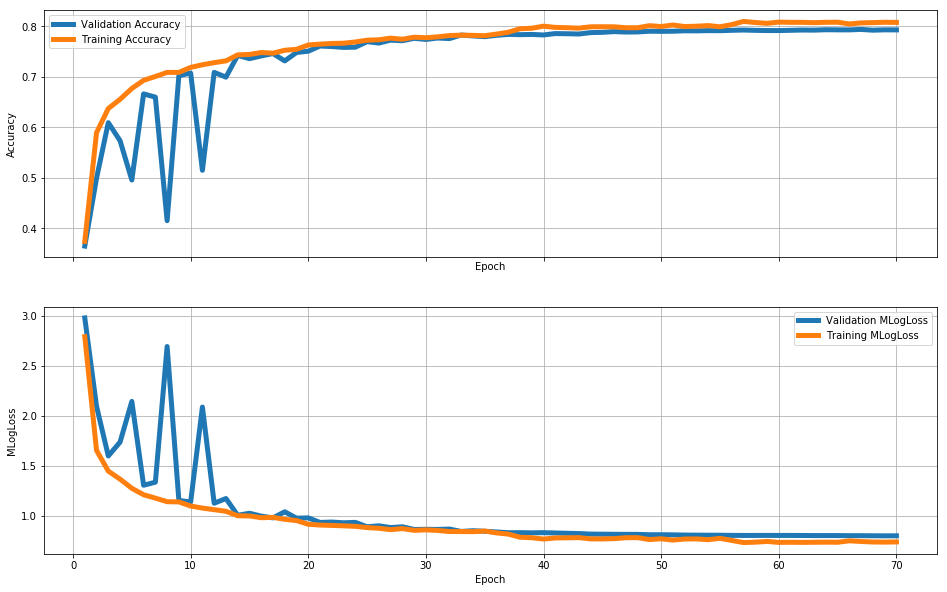

In [29]:
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_categorical_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.categorical_accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_categorical_crossentropy, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.categorical_crossentropy, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();

In [44]:
valid_predictions = model.predict(x_valid, batch_size=128, verbose=1)
map3 = mapk(valid_df[['y']].values, preds2catids(valid_predictions).values)
print('Map3: {:.3f}'.format(map3))

30000/30000 [==============================] - ETA: 59 - ETA: 45 - ETA: 43 - ETA: 38 - ETA: 34 - ETA: 26 - ETA: 22 - ETA: 19 - ETA: 17 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 

In [45]:
test_path = 'D:\Project data\quickdraw-doodle-recognition\quickdraw_data\My code\data'
test = pd.read_csv(os.path.join(test_path, 'test_simplified.csv'))
test.head()
x_test = df_to_image_array_xd(test, size)
print(test.shape, x_test.shape)
print('Test array memory {:.2f} GB'.format(x_test.nbytes / 1024.**3 ))

key_id countrycode  \
0  9000003627287624          DE   
1  9000010688666847          UA   
2  9000023642890129          BG   
3  9000038588854897          US   
4  9000052667981386          AR   

                                             drawing  
0  [[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25...  
1  [[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16...  
2  [[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ...  
3  [[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20...  
4  [[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,...

(112199, 3) (112199, 64, 64, 1)
Test array memory 1.71 GB


In [46]:
test_predictions = model.predict(x_test, batch_size=128, verbose=1)

top3 = preds2catids(test_predictions)
top3.head()
top3.shape

cats = s.list_all_categoris()
id2cat = {k: cat.replace(' ', '_') for k, cat in enumerate(cats)}
top3cats = top3.replace(id2cat)
top3cats.head()
top3cats.shape

112199/112199 [==============================] - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 57s - ETA: 53 - ETA: 51 - ETA: 49 - ETA: 47 - ETA: 45 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - 

a    b    c
0  234  281  266
1  144   36  226
2  305   62   53
3  187  303  304
4  113   56  112

(112199, 3)

a          b                 c
0                    radio     stereo           snorkel
1              hockey_puck  bottlecap              pool
2  The_Great_Wall_of_China     castle             camel
3                 mountain       tent  The_Eiffel_Tower
4                fireplace   campfire      fire_hydrant

(112199, 3)

In [48]:
test['word'] = top3cats['a'] + ' ' + top3cats['b'] + ' ' + top3cats['c']
submission = test[['key_id', 'word']]
submission.to_csv('submission_mobilenet.csv', index=False)
submission.head()
submission.shape

key_id                                  word
0  9000003627287624                  radio stereo snorkel
1  9000010688666847            hockey_puck bottlecap pool
2  9000023642890129  The_Great_Wall_of_China castle camel
3  9000038588854897        mountain tent The_Eiffel_Tower
4  9000052667981386       fireplace campfire fire_hydrant

(112199, 2)